In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib
from scipy import signal
from statsmodels.stats.weightstats import ttest_ind

In [2]:
#126.98 um = 1024 pixels
#16123.9204 um2 = 1048576 pixels2
micron_conv = 0.01537697 

In [28]:
MS_03142024 = pd.read_csv(r'C:\Users\sqjac\OneDrive\Desktop\03142024_master_sheet.csv')
MS_05062024 = pd.read_csv(r'C:\Users\sqjac\OneDrive\Desktop\05062024_master_sheet.csv')
MS_04292024 = pd.read_csv(r'C:\Users\sqjac\OneDrive\Desktop\04292024_master_sheet.csv')
MS_07182024 = pd.read_csv(r'C:\Users\sqjac\OneDrive\Desktop\07182024_master_sheet.csv')
MS_07182024 = MS_07182024.drop(MS_07182024[MS_07182024['Nuclear_Area (pixels)'] >= MS_07182024['Cell_Area (pixels)']].index)
MS_03142024 = MS_03142024.drop(MS_03142024[MS_03142024['Nuclear_Area (pixels)'] >= MS_03142024['Cell_Area (pixels)']].index)
MS_04292024 = MS_04292024.drop(MS_04292024[MS_04292024['Nuclear_Area (pixels)'] >= MS_04292024['Cell_Area (pixels)']].index)
MS_05062024 = MS_05062024.drop(MS_05062024[MS_05062024['Nuclear_Area (pixels)'] >= MS_05062024['Cell_Area (pixels)']].index)

In [29]:
MS_03142024["Bio rep"] = MS_03142024.apply(lambda x: x["Nuclei_File"][:-19], axis = 1)
MS_03142024["TechRep"] = MS_03142024.apply(lambda x: x["Nuclei_File"][:-17], axis = 1)
MS_03142024["strain"] = MS_03142024.apply(lambda x: x["Nuclei_File"][:-21], axis = 1)
MS_05062024["Bio rep"] = MS_05062024.apply(lambda x: x["Nuclei_File"][:-19], axis = 1)
MS_05062024["TechRep"] = MS_05062024.apply(lambda x: x["Nuclei_File"][:-17], axis = 1)
MS_05062024["strain"] = MS_05062024.apply(lambda x: x["Nuclei_File"][:-21], axis = 1)
MS_04292024["Bio rep"] = MS_04292024.apply(lambda x: x["Nuclei_File"][:-19], axis = 1)
MS_04292024["TechRep"] = MS_04292024.apply(lambda x: x["Nuclei_File"][:-17], axis = 1)
MS_04292024["strain"] = MS_04292024.apply(lambda x: x["Nuclei_File"][:-21], axis = 1)
MS_07182024["Bio rep"] = MS_07182024.apply(lambda x: x["Nuclei_File"][:-19], axis = 1)
MS_07182024["TechRep"] = MS_07182024.apply(lambda x: x["Nuclei_File"][:-17], axis = 1)
MS_07182024["strain"] = MS_07182024.apply(lambda x: x["Nuclei_File"][:-21], axis = 1)

#NA_03142024_dsr2_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["Nuclear_Area (pixels)"]
#NA_03142024_dsr2_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["Nuclear_Area (pixels)"]
#NA_03142024_r1_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Nuclear_Area (pixels)"]
#NA_03142024_r1_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Nuclear_Area (pixels)"]
#print('NA dsr2 0k',stats.ttest_ind(a=NA_03142024_dsr2_0k_list, b=NA_03142024_r1_0k_list, equal_var=True))
#print('NA dsr2 10k',stats.ttest_ind(a=NA_03142024_dsr2_10k_list, b=NA_03142024_r1_10k_list, equal_var=True))

#CA_03142024_dsr2_0k_list.to_csv(r'C:\Users\sqjac\OneDrive\Desktop\dsr20k.csv')


In [30]:
CA_03142024_dsr2_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr2_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr2_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr2_0k = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_03142024_dsr2_0k',CA_03142024_dsr2_0k)
print('A,B,C',CA_03142024_dsr2_0k_A,CA_03142024_dsr2_0k_B,CA_03142024_dsr2_0k_C)
CA_03142024_dsr2_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_03142024_dsr2_0k_list.to_csv(r'C:\Users\sqjac\OneDrive\Desktop\March_CA_0.csv')
CA_03142024_dsr2_0k_A_list = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_03142024_dsr2_0k_B_list = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_03142024_dsr2_0k_C_list = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_03142024_dsr2_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr2_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr2_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr2_10k = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_03142024_dsr2_10k',CA_03142024_dsr2_10k)
print('A,B,C',CA_03142024_dsr2_10k_A,CA_03142024_dsr2_10k_B,CA_03142024_dsr2_10k_C)
CA_03142024_dsr2_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_03142024_dsr2_10k_list.to_csv(r'C:\Users\sqjac\OneDrive\Desktop\March_CA_10.csv')
CA_03142024_dsr2_10k_A_list = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_03142024_dsr2_10k_B_list = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_03142024_dsr2_10k_C_list = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_03142024_dsr27_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr27_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr27_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr27_0k = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_03142024_dsr27_0k',CA_03142024_dsr27_0k)
CA_03142024_dsr27_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_03142024_dsr27_0k_A_list = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_03142024_dsr27_0k_B_list = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_03142024_dsr27_0k_C_list = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_03142024_dsr27_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr27_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr27_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr27_10k = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_03142024_dsr27_10k',CA_03142024_dsr27_10k)
print('A,B,C',CA_03142024_dsr27_10k_A,CA_03142024_dsr27_10k_B,CA_03142024_dsr27_10k_C)
CA_03142024_dsr27_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_03142024_dsr27_10k_A_list = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_03142024_dsr27_10k_B_list = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_03142024_dsr27_10k_C_list = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_03142024_r1_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_r1_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_r1_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_r1_0k = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_03142024_r1_0k',CA_03142024_r1_0k)
CA_03142024_r1_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_03142024_r1_0k_A_list = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_03142024_r1_0k_B_list = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_03142024_r1_0k_C_list = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_03142024_r1_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_r1_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_r1_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_r1_10k = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_03142024_r1_10k',CA_03142024_r1_10k)
print('A,B,C',CA_03142024_r1_10k_A,CA_03142024_r1_10k_B,CA_03142024_r1_10k_C)
CA_03142024_r1_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_03142024_r1_10k_A_list = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_03142024_r1_10k_B_list = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_03142024_r1_10k_C_list = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_05062024_dsr20_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr20_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr20_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr20_0k = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_05062024_dsr20_0k',CA_05062024_dsr20_0k)
CA_05062024_dsr20_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_05062024_dsr20_0k_A_list = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_05062024_dsr20_0k_B_list = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_05062024_dsr20_0k_C_list = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_05062024_dsr20_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr20_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr20_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr20_10k = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_05062024_dsr20_10k',CA_05062024_dsr20_10k)
CA_05062024_dsr20_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_05062024_dsr20_10k_A_list = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_05062024_dsr20_10k_B_list = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_05062024_dsr20_10k_C_list = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_05062024_dsr9_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr9_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr9_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr9_0k = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_05062024_dsr9_0k',CA_05062024_dsr9_0k)
CA_05062024_dsr9_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_05062024_dsr9_0k_A_list = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_05062024_dsr9_0k_B_list = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_05062024_dsr9_0k_C_list = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_05062024_dsr9_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr9_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr9_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr9_10k = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_05062024_dsr9_10k',CA_05062024_dsr9_10k)
CA_05062024_dsr9_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_05062024_dsr9_10k_A_list = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_05062024_dsr9_10k_B_list = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_05062024_dsr9_10k_C_list = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_05062024_r1_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_r1_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_r1_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_r1_0k = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_05062024_r1_0k',CA_05062024_r1_0k)
CA_05062024_r1_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_05062024_r1_0k_A_list = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_05062024_r1_0k_B_list = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_05062024_r1_0k_C_list = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_05062024_r1_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_r1_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_r1_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_r1_10k = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_05062024_r1_10k',CA_05062024_r1_10k)
CA_05062024_r1_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_05062024_r1_10k_A_list = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_05062024_r1_10k_B_list = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_05062024_r1_10k_C_list = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_04292024_r1_0k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_04292024_r1_0k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_04292024_r1_0k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_04292024_r1_0k = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_04292024_r1_0k',CA_04292024_r1_0k)
CA_04292024_r1_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_04292024_r1_0k_A_list = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_04292024_r1_0k_B_list = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_04292024_r1_0k_C_list = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_04292024_r1_10k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_04292024_r1_10k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_04292024_r1_10k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_04292024_r1_10k = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_04292024_r1_10k',CA_04292024_r1_10k)
CA_04292024_r1_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_04292024_r1_10k_A_list = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_04292024_r1_10k_B_list = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_04292024_r1_10k_C_list = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_04292024_dsr6_0k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_04292024_dsr6_0k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_04292024_dsr6_0k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_04292024_dsr6_0k = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_04292024_dsr6_0k',CA_04292024_dsr6_0k)
CA_04292024_dsr6_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_04292024_dsr6_0k_A_list = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_04292024_dsr6_0k_B_list = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_04292024_dsr6_0k_C_list = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_04292024_dsr6_10k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_04292024_dsr6_10k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_04292024_dsr6_10k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_04292024_dsr6_10k = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_04292024_dsr6_10k',CA_04292024_dsr6_10k)
CA_04292024_dsr6_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_04292024_dsr6_10k_A_list = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_04292024_dsr6_10k_B_list = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_04292024_dsr6_10k_C_list = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_07182024_dsr2_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr2_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr2_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr2_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_07182024_dsr2_10k',CA_07182024_dsr2_10k)
CA_07182024_dsr2_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr2_10k_A_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr2_10k_B_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr2_10k_C_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_07182024_dsr2_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr2_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr2_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr2_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_07182024_dsr2_0k',CA_07182024_dsr2_0k)
print('A,B,C',CA_07182024_dsr2_0k_A,CA_07182024_dsr2_0k_B,CA_07182024_dsr2_0k_C)
CA_07182024_dsr2_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr2_0k_A_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr2_0k_B_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr2_0k_C_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_07182024_dsr6_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr6_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr6_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr6_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_07182024_dsr6_10k',CA_07182024_dsr6_10k)
CA_07182024_dsr6_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr6_10k_A_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr6_10k_B_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr6_10k_C_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_07182024_dsr6_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr6_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr6_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr6_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_07182024_dsr6_0k',CA_07182024_dsr6_0k)
CA_07182024_dsr6_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr6_0k_A_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr6_0k_B_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr6_0k_C_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_07182024_dsr9_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr9_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr9_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr9_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_07182024_dsr9_10k',CA_07182024_dsr9_10k)
CA_07182024_dsr9_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr9_10k_A_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr9_10k_B_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr9_10k_C_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_07182024_dsr9_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr9_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr9_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr9_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_07182024_dsr9_0k',CA_07182024_dsr9_0k)
CA_07182024_dsr9_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr9_0k_A_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr9_0k_B_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr9_0k_C_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_07182024_dsr20_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr20_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr20_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr20_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_07182024_dsr20_10k',CA_07182024_dsr20_10k)
CA_07182024_dsr20_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr20_10k_A_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr20_10k_B_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr20_10k_C_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_07182024_dsr20_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr20_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr20_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr20_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('20 avgs',CA_07182024_dsr20_0k_A,CA_07182024_dsr20_0k_B,CA_07182024_dsr20_0k_C)
print('CA_07182024_dsr20_0k',CA_07182024_dsr20_0k)
CA_07182024_dsr20_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr20_0k_A_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr20_0k_B_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr20_0k_C_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_07182024_dsr27_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr27_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr27_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr27_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_07182024_dsr27_10k',CA_07182024_dsr27_10k)
CA_07182024_dsr27_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr27_10k_A_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr27_10k_B_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr27_10k_C_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_07182024_dsr27_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr27_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr27_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr27_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_07182024_dsr27_0k',CA_07182024_dsr27_0k)
print('27 avgs',CA_07182024_dsr27_0k_A,CA_07182024_dsr27_0k_B,CA_07182024_dsr27_0k_C)
CA_07182024_dsr27_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr27_0k_A_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr27_0k_B_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_dsr27_0k_C_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_07182024_r1_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_r1_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_r1_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_r1_10k = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_07182024_r1_10k',CA_07182024_r1_10k)
CA_07182024_r1_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_r1_10k_A_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_r1_10k_B_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_r1_10k_C_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_07182024_r1_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_r1_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_r1_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_r1_0k = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
print('CA_07182024_r1_0k',CA_07182024_r1_0k)
CA_07182024_r1_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_r1_0k_A_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_r1_0k_B_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv)
CA_07182024_r1_0k_C_list = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv)

CA_03142024_dsr2_0k 3.0208829073875414
A,B,C 3.0167290955600543 3.03311048610336 3.0081652257849503
CA_03142024_dsr2_10k 3.32843863488074
A,B,C 3.3338926555464887 3.3995928117642307 3.229562067098447
CA_03142024_dsr27_0k 3.4268580490869573
CA_03142024_dsr27_10k 3.4833811116081344
A,B,C 3.2943436922388067 3.6342603003973517 3.5638772162962966
CA_03142024_r1_0k 3.2405429621940125
CA_03142024_r1_10k 3.8479039422114028
A,B,C 3.8891102780069082 3.8739818770309333 3.675380278846574
CA_05062024_dsr20_0k 4.144252395735198
CA_05062024_dsr20_10k 5.322318364785277


C:\Users\sqjac\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
C:\Users\sqjac\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


CA_05062024_dsr9_0k 3.7594850944567146
CA_05062024_dsr9_10k 5.391751646824443
CA_05062024_r1_0k 3.6196835308283966
CA_05062024_r1_10k 3.7572629040460592
CA_04292024_r1_0k 3.4100361369368777
CA_04292024_r1_10k 3.5742898575597444
CA_04292024_dsr6_0k 3.2022731481376163
CA_04292024_dsr6_10k 3.7538265721343214
CA_07182024_dsr2_10k 3.103792310999499
CA_07182024_dsr2_0k 3.032435389193885
A,B,C 2.981163715987378 3.2444514419342303 2.933439049836738
CA_07182024_dsr6_10k 3.6449353982839026
CA_07182024_dsr6_0k 3.196259793201872
CA_07182024_dsr9_10k 3.8133969027279933
CA_07182024_dsr9_0k 3.2266311675736494
CA_07182024_dsr20_10k 3.7629502979448954
20 avgs 3.1275952269397083 3.158389533342487 3.2413808664860913
CA_07182024_dsr20_0k 3.1762499198197274
CA_07182024_dsr27_10k 3.1598582784751734
CA_07182024_dsr27_0k 2.8229312081242934
27 avgs 3.010619707739131 2.7990498835580873 2.7920486620312945
CA_07182024_r1_10k 3.744349020461945
CA_07182024_r1_0k 3.239086831789885


In [31]:
NA_03142024_dsr2_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr2_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr2_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr2_0k = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_03142024_dsr2_0k',NA_03142024_dsr2_0k)
NA_03142024_dsr2_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)
NA_03142024_dsr2_0k_list.to_csv(r'C:\Users\sqjac\OneDrive\Desktop\March_NA_0.csv')

NA_03142024_dsr2_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr2_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr2_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr2_10k = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_03142024_dsr2_10k',NA_03142024_dsr2_10k)
print('A,B,C',NA_03142024_dsr2_10k_A,NA_03142024_dsr2_10k_B,NA_03142024_dsr2_10k_C)
NA_03142024_dsr2_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)
NA_03142024_dsr2_10k_list.to_csv(r'C:\Users\sqjac\OneDrive\Desktop\March_NA_10.csv')

NA_03142024_dsr27_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr27_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr27_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr27_0k = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_03142024_dsr27_0k',NA_03142024_dsr27_0k)
NA_03142024_dsr27_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_03142024_dsr27_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr27_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr27_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr27_10k = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_03142024_dsr27_10k',NA_03142024_dsr27_10k)
print('A,B,C',NA_03142024_dsr27_10k_A,NA_03142024_dsr27_10k_B,NA_03142024_dsr27_10k_C)
NA_03142024_dsr27_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_03142024_r1_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_r1_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_r1_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_r1_0k = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_03142024_r1_0k',NA_03142024_r1_0k)
NA_03142024_r1_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_03142024_r1_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_r1_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_r1_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_r1_10k = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_03142024_r1_10k',NA_03142024_r1_10k)
print('A,B,C',NA_03142024_r1_10k_A,NA_03142024_r1_10k_B,NA_03142024_r1_10k_C)
NA_03142024_r1_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_05062024_dsr20_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr20_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr20_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr20_0k = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_05062024_dsr20_0k',NA_05062024_dsr20_0k)
NA_05062024_dsr20_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_05062024_dsr20_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr20_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr20_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr20_10k = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_05062024_dsr20_10k',NA_05062024_dsr20_10k)
NA_05062024_dsr20_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_05062024_dsr9_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr9_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr9_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr9_0k = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_05062024_dsr9_0k',NA_05062024_dsr9_0k)
NA_05062024_dsr9_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_05062024_dsr9_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr9_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr9_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr9_10k = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_05062024_dsr9_10k',NA_05062024_dsr9_10k)
NA_05062024_dsr9_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_05062024_r1_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_r1_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_r1_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_r1_0k = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_05062024_r1_0k',NA_05062024_r1_0k)
NA_05062024_r1_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_05062024_r1_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_r1_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_r1_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_r1_10k = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_05062024_r1_10k',NA_05062024_r1_10k)
NA_05062024_r1_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_04292024_r1_0k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_0k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_04292024_r1_0k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_0k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_04292024_r1_0k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_0k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_04292024_r1_0k = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_04292024_r1_0k',NA_04292024_r1_0k)
NA_04292024_r1_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_04292024_r1_10k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_10k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_04292024_r1_10k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_10k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_04292024_r1_10k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_10k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_04292024_r1_10k = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_04292024_r1_10k',NA_04292024_r1_10k)
NA_04292024_r1_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_04292024_dsr6_0k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_0k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_04292024_dsr6_0k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_0k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_04292024_dsr6_0k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_0k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_04292024_dsr6_0k = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_04292024_dsr6_0k',NA_04292024_dsr6_0k)
NA_04292024_dsr6_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_04292024_dsr6_10k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_10k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_04292024_dsr6_10k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_10k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_04292024_dsr6_10k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_10k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_04292024_dsr6_10k = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_04292024_dsr6_10k',NA_04292024_dsr6_10k)
NA_04292024_dsr6_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_07182024_dsr2_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_10k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr2_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_10k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr2_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_10k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr2_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_07182024_dsr2_10k',NA_07182024_dsr2_10k)
NA_07182024_dsr2_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_07182024_dsr2_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_0k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr2_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_0k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr2_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_0k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr2_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_07182024_dsr2_0k',NA_07182024_dsr2_0k)
print('A,B,C',NA_07182024_dsr2_0k_A,NA_07182024_dsr2_0k_B,NA_07182024_dsr2_0k_C)
NA_07182024_dsr2_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_07182024_dsr6_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_10k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr6_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_10k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr6_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_10k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr6_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_07182024_dsr6_10k',NA_07182024_dsr6_10k)
NA_07182024_dsr6_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_07182024_dsr6_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_0k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr6_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_0k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr6_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_0k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr6_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_07182024_dsr6_0k',NA_07182024_dsr6_0k)
NA_07182024_dsr6_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_07182024_dsr9_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_10k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr9_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_10k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr9_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_10k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr9_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_07182024_dsr9_10k',NA_07182024_dsr9_10k)
NA_07182024_dsr9_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_07182024_dsr9_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_0k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr9_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_0k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr9_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_0k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr9_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_07182024_dsr9_0k',NA_07182024_dsr9_0k)
NA_07182024_dsr9_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_07182024_dsr20_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_10k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr20_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_10k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr20_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_10k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr20_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_07182024_dsr20_10k',NA_07182024_dsr20_10k)
NA_07182024_dsr20_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_07182024_dsr20_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_0k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr20_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_0k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr20_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_0k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr20_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('20 avgs',NA_07182024_dsr20_0k_A,NA_07182024_dsr20_0k_B,NA_07182024_dsr20_0k_C)
print('NA_07182024_dsr20_0k',NA_07182024_dsr20_0k)
NA_07182024_dsr20_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_07182024_dsr27_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_10k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr27_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_10k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr27_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_10k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr27_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_07182024_dsr27_10k',NA_07182024_dsr27_10k)
NA_07182024_dsr27_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_07182024_dsr27_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_0k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr27_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_0k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr27_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_0k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr27_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_07182024_dsr27_0k',NA_07182024_dsr27_0k)
NA_07182024_dsr27_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_07182024_r1_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_10k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_r1_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_10k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_r1_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_10k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_r1_10k = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('27 avgs',NA_07182024_dsr27_0k_A,NA_07182024_dsr27_0k_B,NA_07182024_dsr27_0k_C)
print('NA_07182024_r1_10k',NA_07182024_r1_10k)
NA_07182024_r1_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)

NA_07182024_r1_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_0k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_r1_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_0k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_r1_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_0k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_r1_0k = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
print('NA_07182024_r1_0k',NA_07182024_r1_0k)
NA_07182024_r1_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv)


NA_03142024_dsr2_0k 0.8375127899134955
NA_03142024_dsr2_10k 0.75030936659395
A,B,C 0.7520291551631326 0.7854955805934241 0.7026558229222797
NA_03142024_dsr27_0k 0.7307403569565218
NA_03142024_dsr27_10k 0.6198254802033276
A,B,C 0.5560189948258706 0.7081552939072846 0.6171127907407404
NA_03142024_r1_0k 0.9991141021170192
NA_03142024_r1_10k 0.8946694629414916
A,B,C 0.8825370274405552 0.9205763920247428 0.8568435873014157
NA_05062024_dsr20_0k 1.1859830362693853
NA_05062024_dsr20_10k 1.3505004715541946
NA_05062024_dsr9_0k 1.08736133623389
NA_05062024_dsr9_10k 1.1165854554883186
NA_05062024_r1_0k

C:\Users\sqjac\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys
C:\Users\sqjac\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  app.launch_new_instance()


 1.0746810360704913
NA_05062024_r1_10k 0.8410440286529774
NA_04292024_r1_0k 0.9604583419569636
NA_04292024_r1_10k 0.8668996406813276
NA_04292024_dsr6_0k 0.9822316695412864
NA_04292024_dsr6_10k 0.8037532382985081
NA_07182024_dsr2_10k 0.7837535861535615
NA_07182024_dsr2_0k 0.9107984581584251
A,B,C 0.8369149843111372 0.915851738346228 0.9607539753606126
NA_07182024_dsr6_10k 0.9493069273459255
NA_07182024_dsr6_0k 1.071323979637668
NA_07182024_dsr9_10k 1.003469664708944
NA_07182024_dsr9_0k 1.0904754967391312
NA_07182024_dsr20_10k 0.9977476110537855
20 avgs 0.9323097146530146 0.9684324942827738 1.0416300613470588
NA_07182024_dsr20_0k 0.981344548768033
NA_07182024_dsr27_10k 0.8158074317625421
NA_07182024_dsr27_0k 0.7941218347118659
27 avgs 0.673778711565218 0.7788242655034173 0.8349526261189356
NA_07182024_r1_10k 0.9188165765964547
NA_07182024_r1_0k 1.0554476979420615


In [32]:
NFA_03142024_dsr2_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_A"]["N:C_Ratio"].mean()
NFA_03142024_dsr2_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_B"]["N:C_Ratio"].mean()
NFA_03142024_dsr2_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_C"]["N:C_Ratio"].mean()
NFA_03142024_dsr2_0k = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["N:C_Ratio"].mean()
print('NFA_03142024_dsr2_0k',NFA_03142024_dsr2_0k)
NFA_03142024_dsr2_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["N:C_Ratio"]
NFA_03142024_dsr2_0k_list.to_csv(r'C:\Users\sqjac\OneDrive\Desktop\March_NFA_0.csv')

NFA_03142024_dsr2_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_A"]["N:C_Ratio"].mean()
NFA_03142024_dsr2_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_B"]["N:C_Ratio"].mean()
NFA_03142024_dsr2_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_C"]["N:C_Ratio"].mean()
NFA_03142024_dsr2_10k = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["N:C_Ratio"].mean()
print('NFA_03142024_dsr2_10k',NFA_03142024_dsr2_10k)
NFA_03142024_dsr2_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["N:C_Ratio"]
NFA_03142024_dsr2_10k_list.to_csv(r'C:\Users\sqjac\OneDrive\Desktop\March_NFA_10.csv')

NFA_03142024_dsr27_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_A"]["N:C_Ratio"].mean()
NFA_03142024_dsr27_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_B"]["N:C_Ratio"].mean()
NFA_03142024_dsr27_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_C"]["N:C_Ratio"].mean()
NFA_03142024_dsr27_0k = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["N:C_Ratio"].mean()
print('NFA_03142024_dsr27_0k',NFA_03142024_dsr27_0k)
NFA_03142024_dsr27_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["N:C_Ratio"]

NFA_03142024_dsr27_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_A"]["N:C_Ratio"].mean()
NFA_03142024_dsr27_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_B"]["N:C_Ratio"].mean()
NFA_03142024_dsr27_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_C"]["N:C_Ratio"].mean()
NFA_03142024_dsr27_10k = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["N:C_Ratio"].mean()
print('NFA_03142024_dsr27_10k',NFA_03142024_dsr27_10k)
NFA_03142024_dsr27_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["N:C_Ratio"]

NFA_03142024_r1_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_A"]["N:C_Ratio"].mean()
NFA_03142024_r1_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_B"]["N:C_Ratio"].mean()
NFA_03142024_r1_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_C"]["N:C_Ratio"].mean()
NFA_03142024_r1_0k = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["N:C_Ratio"].mean()
print('NFA_03142024_r1_0k',NFA_03142024_r1_0k)
NFA_03142024_r1_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["N:C_Ratio"]

NFA_03142024_r1_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_A"]["N:C_Ratio"].mean()
NFA_03142024_r1_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_B"]["N:C_Ratio"].mean()
NFA_03142024_r1_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_C"]["N:C_Ratio"].mean()
NFA_03142024_r1_10k = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["N:C_Ratio"].mean()
print('NFA_03142024_r1_10k',NFA_03142024_r1_10k)
NFA_03142024_r1_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["N:C_Ratio"]

NFA_05062024_dsr20_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_A"]["N:C_Ratio"].mean()
NFA_05062024_dsr20_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_B"]["N:C_Ratio"].mean()
NFA_05062024_dsr20_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_C"]["N:C_Ratio"].mean()
NFA_05062024_dsr20_0k = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["N:C_Ratio"].mean()
print('NFA_05062024_dsr20_0k',NFA_05062024_dsr20_0k)
NFA_05062024_dsr20_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["N:C_Ratio"]

NFA_05062024_dsr20_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_A"]["N:C_Ratio"].mean()
NFA_05062024_dsr20_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_B"]["N:C_Ratio"].mean()
NFA_05062024_dsr20_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_C"]["N:C_Ratio"].mean()
NFA_05062024_dsr20_10k = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["N:C_Ratio"].mean()
print('NFA_05062024_dsr20_10k',NFA_05062024_dsr20_10k)
NFA_05062024_dsr20_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["N:C_Ratio"]

NFA_05062024_dsr9_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_A"]["N:C_Ratio"].mean()
NFA_05062024_dsr9_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_B"]["N:C_Ratio"].mean()
NFA_05062024_dsr9_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_C"]["N:C_Ratio"].mean()
NFA_05062024_dsr9_0k = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["N:C_Ratio"].mean()
print('NFA_05062024_dsr9_0k',NFA_05062024_dsr9_0k)
NFA_05062024_dsr9_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["N:C_Ratio"]

NFA_05062024_dsr9_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_A"]["N:C_Ratio"].mean()
NFA_05062024_dsr9_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_B"]["N:C_Ratio"].mean()
NFA_05062024_dsr9_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_C"]["N:C_Ratio"].mean()
NFA_05062024_dsr9_10k = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["N:C_Ratio"].mean()
print('NFA_05062024_dsr9_10k',NFA_05062024_dsr9_10k)
NFA_05062024_dsr9_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["N:C_Ratio"]

NFA_05062024_r1_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_A"]["N:C_Ratio"].mean()
NFA_05062024_r1_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_B"]["N:C_Ratio"].mean()
NFA_05062024_r1_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_C"]["N:C_Ratio"].mean()
NFA_05062024_r1_0k = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["N:C_Ratio"].mean()
print('NFA_05062024_r1_0k',NFA_05062024_r1_0k)
NFA_05062024_r1_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["N:C_Ratio"]

NFA_05062024_r1_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_A"]["N:C_Ratio"].mean()
NFA_05062024_r1_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_B"]["N:C_Ratio"].mean()
NFA_05062024_r1_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_C"]["N:C_Ratio"].mean()
NFA_05062024_r1_10k = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["N:C_Ratio"].mean()
print('NFA_05062024_r1_10k',NFA_05062024_r1_10k)
NFA_05062024_r1_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["N:C_Ratio"]

NFA_04292024_r1_0k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_0k_A"]["N:C_Ratio"].mean()
NFA_04292024_r1_0k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_0k_B"]["N:C_Ratio"].mean()
NFA_04292024_r1_0k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_0k_C"]["N:C_Ratio"].mean()
NFA_04292024_r1_0k = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["N:C_Ratio"].mean()
print('NFA_04292024_r1_0k',NFA_04292024_r1_0k)
NFA_04292024_r1_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["N:C_Ratio"]

NFA_04292024_r1_10k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_10k_A"]["N:C_Ratio"].mean()
NFA_04292024_r1_10k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_10k_B"]["N:C_Ratio"].mean()
NFA_04292024_r1_10k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_10k_C"]["N:C_Ratio"].mean()
NFA_04292024_r1_10k = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["N:C_Ratio"].mean()
print('NFA_04292024_r1_10k',NFA_04292024_r1_10k)
NFA_04292024_r1_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["N:C_Ratio"]

NFA_04292024_dsr6_0k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_0k_A"]["N:C_Ratio"].mean()
NFA_04292024_dsr6_0k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_0k_B"]["N:C_Ratio"].mean()
NFA_04292024_dsr6_0k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_0k_C"]["N:C_Ratio"].mean()
NFA_04292024_dsr6_0k = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["N:C_Ratio"].mean()
print('NFA_04292024_dsr6_0k',NFA_04292024_dsr6_0k)
NFA_04292024_dsr6_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["N:C_Ratio"]

NFA_04292024_dsr6_10k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_10k_A"]["N:C_Ratio"].mean()
NFA_04292024_dsr6_10k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_10k_B"]["N:C_Ratio"].mean()
NFA_04292024_dsr6_10k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_10k_C"]["N:C_Ratio"].mean()
NFA_04292024_dsr6_10k = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["N:C_Ratio"].mean()
print('NFA_04292024_dsr6_10k',NFA_04292024_dsr6_10k)
NFA_04292024_dsr6_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["N:C_Ratio"]

NFA_07182024_dsr2_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_10k_A"]["N:C_Ratio"].mean()
NFA_07182024_dsr2_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_10k_B"]["N:C_Ratio"].mean()
NFA_07182024_dsr2_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_10k_C"]["N:C_Ratio"].mean()
NFA_07182024_dsr2_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["N:C_Ratio"].mean()
print('NFA_07182024_dsr2_10k',NFA_07182024_dsr2_10k)
NFA_07182024_dsr2_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["N:C_Ratio"]

NFA_07182024_dsr2_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_0k_A"]["N:C_Ratio"].mean()
NFA_07182024_dsr2_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_0k_B"]["N:C_Ratio"].mean()
NFA_07182024_dsr2_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_0k_C"]["N:C_Ratio"].mean()
NFA_07182024_dsr2_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["N:C_Ratio"].mean()
print('NFA_07182024_dsr2_0k',NFA_07182024_dsr2_0k)
NFA_07182024_dsr2_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["N:C_Ratio"]

NFA_07182024_dsr6_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_10k_A"]["N:C_Ratio"].mean()
NFA_07182024_dsr6_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_10k_B"]["N:C_Ratio"].mean()
NFA_07182024_dsr6_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_10k_C"]["N:C_Ratio"].mean()
NFA_07182024_dsr6_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["N:C_Ratio"].mean()
print('NFA_07182024_dsr6_10k',NFA_07182024_dsr6_10k)
NFA_07182024_dsr6_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["N:C_Ratio"]

NFA_07182024_dsr6_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_0k_A"]["N:C_Ratio"].mean()
NFA_07182024_dsr6_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_0k_B"]["N:C_Ratio"].mean()
NFA_07182024_dsr6_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_0k_C"]["N:C_Ratio"].mean()
NFA_07182024_dsr6_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["N:C_Ratio"].mean()
print('NFA_07182024_dsr6_0k',NFA_07182024_dsr6_0k)
NFA_07182024_dsr6_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["N:C_Ratio"]

NFA_07182024_dsr9_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_10k_A"]["N:C_Ratio"].mean()
NFA_07182024_dsr9_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_10k_B"]["N:C_Ratio"].mean()
NFA_07182024_dsr9_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_10k_C"]["N:C_Ratio"].mean()
NFA_07182024_dsr9_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["N:C_Ratio"].mean()
print('NFA_07182024_dsr9_10k',NFA_07182024_dsr9_10k)
NFA_07182024_dsr9_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["N:C_Ratio"]

NFA_07182024_dsr9_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_0k_A"]["N:C_Ratio"].mean()
NFA_07182024_dsr9_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_0k_B"]["N:C_Ratio"].mean()
NFA_07182024_dsr9_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_0k_C"]["N:C_Ratio"].mean()
NFA_07182024_dsr9_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["N:C_Ratio"].mean()
print('NFA_07182024_dsr9_0k',NFA_07182024_dsr9_0k)
NFA_07182024_dsr9_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["N:C_Ratio"]

NFA_07182024_dsr20_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_10k_A"]["N:C_Ratio"].mean()
NFA_07182024_dsr20_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_10k_B"]["N:C_Ratio"].mean()
NFA_07182024_dsr20_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_10k_C"]["N:C_Ratio"].mean()
NFA_07182024_dsr20_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["N:C_Ratio"].mean()
print('NFA_07182024_dsr20_10k',NFA_07182024_dsr20_10k)
NFA_07182024_dsr20_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["N:C_Ratio"]

NFA_07182024_dsr20_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_0k_A"]["N:C_Ratio"].mean()
NFA_07182024_dsr20_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_0k_B"]["N:C_Ratio"].mean()
NFA_07182024_dsr20_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_0k_C"]["N:C_Ratio"].mean()
NFA_07182024_dsr20_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["N:C_Ratio"].mean()
print('NFA_07182024_dsr20_0k',NFA_07182024_dsr20_0k)
print('20 avgs',NFA_07182024_dsr20_0k_A,NFA_07182024_dsr20_0k_B,NFA_07182024_dsr20_0k_C)
NFA_07182024_dsr20_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["N:C_Ratio"]

NFA_07182024_dsr27_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_10k_A"]["N:C_Ratio"].mean()
NFA_07182024_dsr27_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_10k_B"]["N:C_Ratio"].mean()
NFA_07182024_dsr27_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_10k_C"]["N:C_Ratio"].mean()
NFA_07182024_dsr27_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["N:C_Ratio"].mean()
print('NFA_07182024_dsr27_10k',NFA_07182024_dsr27_10k)
NFA_07182024_dsr27_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["N:C_Ratio"]

NFA_07182024_dsr27_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_0k_A"]["N:C_Ratio"].mean()
NFA_07182024_dsr27_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_0k_B"]["N:C_Ratio"].mean()
NFA_07182024_dsr27_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_0k_C"]["N:C_Ratio"].mean()
NFA_07182024_dsr27_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["N:C_Ratio"].mean()
print('NFA_07182024_dsr27_0k',NFA_07182024_dsr27_0k)
NFA_07182024_dsr27_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["N:C_Ratio"]

print('27 avgs',NFA_07182024_dsr27_0k_A,NFA_07182024_dsr27_0k_B,NFA_07182024_dsr27_0k_C)
NFA_07182024_r1_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_10k_A"]["N:C_Ratio"].mean()
NFA_07182024_r1_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_10k_B"]["N:C_Ratio"].mean()
NFA_07182024_r1_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_10k_C"]["N:C_Ratio"].mean()
NFA_07182024_r1_10k = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["N:C_Ratio"].mean()
print('NFA_07182024_r1_10k',NFA_07182024_r1_10k)
NFA_07182024_r1_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["N:C_Ratio"]

NFA_07182024_r1_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_0k_A"]["N:C_Ratio"].mean()
NFA_07182024_r1_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_0k_B"]["N:C_Ratio"].mean()
NFA_07182024_r1_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_0k_C"]["N:C_Ratio"].mean()
NFA_07182024_r1_0k = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["N:C_Ratio"].mean()
print('NFA_07182024_r1_0k',NFA_07182024_r1_0k)
NFA_07182024_r1_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["N:C_Ratio"]


NFA_03142024_dsr2_0k 0.27987517747882185
NFA_03142024_dsr2_10k 0.22991235989223494
NFA_03142024_dsr27_0k

C:\Users\sqjac\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys
C:\Users\sqjac\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  from ipykernel import kernelapp as app


 0.22008279468369665
NFA_03142024_dsr27_10k 0.18333103918535879
NFA_03142024_r1_0k 0.3162162995982351
NFA_03142024_r1_10k 0.2371576017169905
NFA_05062024_dsr20_0k 0.2912471793068715
NFA_05062024_dsr20_10k 0.26111447887171224
NFA_05062024_dsr9_0k 0.3017422071219244
NFA_05062024_dsr9_10k 0.220183774228844
NFA_05062024_r1_0k 0.30661041135767164
NFA_05062024_r1_10k 0.23109718833800105
NFA_04292024_r1_0k 0.2882331237819142
NFA_04292024_r1_10k 0.2503705963109198
NFA_04292024_dsr6_0k 0.31126577943242506
NFA_04292024_dsr6_10k 0.2216373055194048
NFA_07182024_dsr2_10k 0.2589893669699278
NFA_07182024_dsr2_0k 0.3055916214862139
NFA_07182024_dsr6_10k 0.26696355321031345
NFA_07182024_dsr6_0k 0.34244171771554777
NFA_07182024_dsr9_10k 0.267704156892074
NFA_07182024_dsr9_0k 0.34182054208134666
NFA_07182024_dsr20_10k 0.2694817437180146
NFA_07182024_dsr20_0k 0.3138791234539663
20 avgs 0.30476269580583987 0.31052976964996587 0.3260857094752625
NFA_07182024_dsr27_10k 0.2655280339043871
NFA_07182024_dsr27_0

In [33]:
circ_03142024_dsr2_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_A"]["circ."].mean()
circ_03142024_dsr2_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_B"]["circ."].mean()
circ_03142024_dsr2_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_C"]["circ."].mean()
circ_03142024_dsr2_0k = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["circ."].mean()
print('circ_03142024_dsr2_0k',circ_03142024_dsr2_0k)
circ_03142024_dsr2_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["circ."]

circ_03142024_dsr2_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_A"]["circ."].mean()
circ_03142024_dsr2_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_B"]["circ."].mean()
circ_03142024_dsr2_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_C"]["circ."].mean()
circ_03142024_dsr2_10k = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["circ."].mean()
print('circ_03142024_dsr2_10k',circ_03142024_dsr2_10k)
circ_03142024_dsr2_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["circ."]

circ_03142024_dsr27_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_A"]["circ."].mean()
circ_03142024_dsr27_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_B"]["circ."].mean()
circ_03142024_dsr27_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_C"]["circ."].mean()
circ_03142024_dsr27_0k = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["circ."].mean()
print('circ_03142024_dsr27_0k',circ_03142024_dsr27_0k)
circ_03142024_dsr27_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["circ."]

circ_03142024_dsr27_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_A"]["circ."].mean()
circ_03142024_dsr27_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_B"]["circ."].mean()
circ_03142024_dsr27_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_C"]["circ."].mean()
circ_03142024_dsr27_10k = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["circ."].mean()
print('circ_03142024_dsr27_10k',circ_03142024_dsr27_10k)
circ_03142024_dsr27_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["circ."]

circ_03142024_r1_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_A"]["circ."].mean()
circ_03142024_r1_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_B"]["circ."].mean()
circ_03142024_r1_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_C"]["circ."].mean()
circ_03142024_r1_0k = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["circ."].mean()
print('circ_03142024_r1_0k,circ_03142024_r1_0k')
circ_03142024_r1_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["circ."]

circ_03142024_r1_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_A"]["circ."].mean()
circ_03142024_r1_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_B"]["circ."].mean()
circ_03142024_r1_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_C"]["circ."].mean()
circ_03142024_r1_10k = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["circ."].mean()
print('circ_03142024_r1_10k',circ_03142024_r1_10k)
circ_03142024_r1_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["circ."]

circ_05062024_dsr20_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_A"]["circ."].mean()
circ_05062024_dsr20_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_B"]["circ."].mean()
circ_05062024_dsr20_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_C"]["circ."].mean()
circ_05062024_dsr20_0k = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["circ."].mean()
print('circ_05062024_dsr20_0k',circ_05062024_dsr20_0k)
circ_05062024_dsr20_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["circ."]

circ_05062024_dsr20_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_A"]["circ."].mean()
circ_05062024_dsr20_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_B"]["circ."].mean()
circ_05062024_dsr20_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_C"]["circ."].mean()
circ_05062024_dsr20_10k = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["circ."].mean()
print('circ_05062024_dsr20_10k',circ_05062024_dsr20_10k)
circ_05062024_dsr20_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["circ."]

circ_05062024_dsr9_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_A"]["circ."].mean()
circ_05062024_dsr9_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_B"]["circ."].mean()
circ_05062024_dsr9_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_C"]["circ."].mean()
circ_05062024_dsr9_0k = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["circ."].mean()
print('circ_05062024_dsr9_0k',circ_05062024_dsr9_0k)
circ_05062024_dsr9_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["circ."]

circ_05062024_dsr9_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_A"]["circ."].mean()
circ_05062024_dsr9_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_B"]["circ."].mean()
circ_05062024_dsr9_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_C"]["circ."].mean()
circ_05062024_dsr9_10k = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["circ."].mean()
print('circ_05062024_dsr9_10k',circ_05062024_dsr9_10k)
circ_05062024_dsr9_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["circ."]

circ_05062024_r1_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_A"]["circ."].mean()
circ_05062024_r1_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_B"]["circ."].mean()
circ_05062024_r1_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_C"]["circ."].mean()
circ_05062024_r1_0k = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["circ."].mean()
print('circ_05062024_r1_0k',circ_05062024_r1_0k)
circ_05062024_r1_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["circ."]

circ_05062024_r1_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_A"]["circ."].mean()
circ_05062024_r1_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_B"]["circ."].mean()
circ_05062024_r1_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_C"]["circ."].mean()
circ_05062024_r1_10k = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["circ."].mean()
print('circ_05062024_r1_10k',circ_05062024_r1_10k)
circ_05062024_r1_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["circ."]

circ_04292024_r1_0k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_0k_A"]["circ."].mean()
circ_04292024_r1_0k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_0k_B"]["circ."].mean()
circ_04292024_r1_0k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_0k_C"]["circ."].mean()
circ_04292024_r1_0k = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["circ."].mean()
print('circ_04292024_r1_0k',circ_04292024_r1_0k)
circ_04292024_r1_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["circ."]

circ_04292024_r1_10k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_10k_A"]["circ."].mean()
circ_04292024_r1_10k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_10k_B"]["circ."].mean()
circ_04292024_r1_10k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_10k_C"]["circ."].mean()
circ_04292024_r1_10k = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["circ."].mean()
print('circ_04292024_r1_10k',circ_04292024_r1_10k)
circ_04292024_r1_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["circ."]

circ_04292024_dsr6_0k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_0k_A"]["circ."].mean()
circ_04292024_dsr6_0k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_0k_B"]["circ."].mean()
circ_04292024_dsr6_0k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_0k_C"]["circ."].mean()
circ_04292024_dsr6_0k = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["circ."].mean()
print('circ_04292024_dsr6_0k',circ_04292024_dsr6_0k)
circ_04292024_dsr6_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["circ."]

circ_04292024_dsr6_10k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_10k_A"]["circ."].mean()
circ_04292024_dsr6_10k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_10k_B"]["circ."].mean()
circ_04292024_dsr6_10k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_10k_C"]["circ."].mean()
circ_04292024_dsr6_10k = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["circ."].mean()
print('circ_04292024_dsr6_10k',circ_04292024_dsr6_10k)
circ_04292024_dsr6_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["circ."]

circ_07182024_dsr2_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_10k_A"]["circ."].mean()
circ_07182024_dsr2_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_10k_B"]["circ."].mean()
circ_07182024_dsr2_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_10k_C"]["circ."].mean()
circ_07182024_dsr2_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["circ."].mean()
print('circ_07182024_dsr2_10k',circ_07182024_dsr2_10k)
circ_07182024_dsr2_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["circ."]

circ_07182024_dsr2_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_0k_A"]["circ."].mean()
circ_07182024_dsr2_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_0k_B"]["circ."].mean()
circ_07182024_dsr2_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_0k_C"]["circ."].mean()
circ_07182024_dsr2_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["circ."].mean()
print('circ_07182024_dsr2_0k',circ_07182024_dsr2_0k)
circ_07182024_dsr2_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["circ."]

circ_07182024_dsr6_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_10k_A"]["circ."].mean()
circ_07182024_dsr6_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_10k_B"]["circ."].mean()
circ_07182024_dsr6_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_10k_C"]["circ."].mean()
circ_07182024_dsr6_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["circ."].mean()
print('circ_07182024_dsr6_10k',circ_07182024_dsr6_10k)
circ_07182024_dsr6_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["circ."]

circ_07182024_dsr6_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_0k_A"]["circ."].mean()
circ_07182024_dsr6_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_0k_B"]["circ."].mean()
circ_07182024_dsr6_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_0k_C"]["circ."].mean()
circ_07182024_dsr6_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["circ."].mean()
print('circ_07182024_dsr6_0k',circ_07182024_dsr6_0k)
circ_07182024_dsr6_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["circ."]

circ_07182024_dsr9_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_10k_A"]["circ."].mean()
circ_07182024_dsr9_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_10k_B"]["circ."].mean()
circ_07182024_dsr9_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_10k_C"]["circ."].mean()
circ_07182024_dsr9_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["circ."].mean()
print('circ_07182024_dsr9_10k',circ_07182024_dsr9_10k)
circ_07182024_dsr9_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["circ."]

circ_07182024_dsr9_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_0k_A"]["circ."].mean()
circ_07182024_dsr9_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_0k_B"]["circ."].mean()
circ_07182024_dsr9_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_0k_C"]["circ."].mean()
circ_07182024_dsr9_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["circ."].mean()
print('circ_07182024_dsr9_0k',circ_07182024_dsr9_0k)
circ_07182024_dsr9_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["circ."]

circ_07182024_dsr20_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_10k_A"]["circ."].mean()
circ_07182024_dsr20_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_10k_B"]["circ."].mean()
circ_07182024_dsr20_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_10k_C"]["circ."].mean()
circ_07182024_dsr20_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["circ."].mean()
print('circ_07182024_dsr20_10k',circ_07182024_dsr20_10k)
circ_07182024_dsr20_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["circ."]

circ_07182024_dsr20_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_0k_A"]["circ."].mean()
circ_07182024_dsr20_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_0k_B"]["circ."].mean()
circ_07182024_dsr20_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_0k_C"]["circ."].mean()
circ_07182024_dsr20_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["circ."].mean()
print('circ_07182024_dsr20_0k',circ_07182024_dsr20_0k)
circ_07182024_dsr20_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["circ."]

print('20 avgs',circ_07182024_dsr20_0k_A,circ_07182024_dsr20_0k_B,circ_07182024_dsr20_0k_C)
circ_07182024_dsr27_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_10k_A"]["circ."].mean()
circ_07182024_dsr27_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_10k_B"]["circ."].mean()
circ_07182024_dsr27_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_10k_C"]["circ."].mean()
circ_07182024_dsr27_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["circ."].mean()
print('circ_07182024_dsr27_10k',circ_07182024_dsr27_10k)
circ_07182024_dsr27_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["circ."]

circ_07182024_dsr27_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_0k_A"]["circ."].mean()
circ_07182024_dsr27_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_0k_B"]["circ."].mean()
circ_07182024_dsr27_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_0k_C"]["circ."].mean()
circ_07182024_dsr27_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["circ."].mean()
print('circ_07182024_dsr27_0k',circ_07182024_dsr27_0k)
circ_07182024_dsr27_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["circ."]

print('27 avgs',circ_07182024_dsr27_0k_A,circ_07182024_dsr27_0k_B,circ_07182024_dsr27_0k_C)
circ_07182024_r1_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_10k_A"]["circ."].mean()
circ_07182024_r1_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_10k_B"]["circ."].mean()
circ_07182024_r1_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_10k_C"]["circ."].mean()
circ_07182024_r1_10k = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["circ."].mean()
print('circ_07182024_r1_10k',circ_07182024_r1_10k)
circ_07182024_r1_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["circ."]

circ_07182024_r1_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_0k_A"]["circ."].mean()
circ_07182024_r1_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_0k_B"]["circ."].mean()
circ_07182024_r1_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_0k_C"]["circ."].mean()
circ_07182024_r1_0k = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["circ."].mean()
print('circ_07182024_r1_0k',circ_07182024_r1_0k)
circ_07182024_r1_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["circ."]


circ_03142024_dsr2_0k 0.8701112763511167
circ_03142024_dsr2_10k 0.9558980795773929
circ_03142024_dsr27_0k 0.9132551707248954
circ_03142024_dsr27_10k 0.9696257748587369
circ_03142024_r1_0k,circ_03142024_r1_0k
circ_03142024_r1_10k 0.9388086530042211
circ_05062024_dsr20_0k 0.8190840177238227
circ_05062024_dsr20_10k 0.9142220063641812
circ_05062024_dsr9_0k 0.8793256129253629
circ_05062024_dsr9_10k 0.9198562827216346
circ_05062024_r1_0k 0.8508913844634424
circ_05062024_r1_10k 0.9380676838123725
circ_04292024_r1_0k 0.8599024325967307
circ_04292024_r1_10k 0.9382545398747422
circ_04292024_dsr6_0k 0.8556678511021004
circ_04292024_dsr6_10k 0.9488513439646307
circ_07182024_dsr2_10k 0.9484116348411304
circ_07182024_dsr2_0k 0.8686904438719484
circ_07182024_dsr6_10k 0.9255632942176752
circ_07182024_dsr6_0k 0.8510164782632648
circ_07182024_dsr9_10k 0.9260446984141971
circ_07182024_dsr9_0k 0.8413594487134783
circ_07182024_dsr20_10k 0.9245864452164826
circ_07182024_dsr20_0k 0.8652010338644112
20 avgs 0

In [34]:
eccen_03142024_dsr2_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_A"]["Eccentricity"].mean()
eccen_03142024_dsr2_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_B"]["Eccentricity"].mean()
eccen_03142024_dsr2_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_C"]["Eccentricity"].mean()
eccen_03142024_dsr2_0k = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["Eccentricity"].mean()
print('eccen_03142024_dsr2_0k',eccen_03142024_dsr2_0k)
eccen_03142024_dsr2_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["Eccentricity"]

eccen_03142024_dsr2_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_A"]["Eccentricity"].mean()
eccen_03142024_dsr2_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_B"]["Eccentricity"].mean()
eccen_03142024_dsr2_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_C"]["Eccentricity"].mean()
eccen_03142024_dsr2_10k = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["Eccentricity"].mean()
print('eccen_03142024_dsr2_10k',eccen_03142024_dsr2_10k)
eccen_03142024_dsr2_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["Eccentricity"]

eccen_03142024_dsr27_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_A"]["Eccentricity"].mean()
eccen_03142024_dsr27_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_B"]["Eccentricity"].mean()
eccen_03142024_dsr27_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_C"]["Eccentricity"].mean()
eccen_03142024_dsr27_0k = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["Eccentricity"].mean()
print('eccen_03142024_dsr27_0k',eccen_03142024_dsr27_0k)
eccen_03142024_dsr27_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["Eccentricity"]

eccen_03142024_dsr27_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_A"]["Eccentricity"].mean()
eccen_03142024_dsr27_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_B"]["Eccentricity"].mean()
eccen_03142024_dsr27_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_C"]["Eccentricity"].mean()
eccen_03142024_dsr27_10k = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["Eccentricity"].mean()
print('eccen_03142024_dsr27_10k',eccen_03142024_dsr27_10k)
eccen_03142024_dsr27_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["Eccentricity"]

eccen_03142024_r1_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_A"]["Eccentricity"].mean()
eccen_03142024_r1_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_B"]["Eccentricity"].mean()
eccen_03142024_r1_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_C"]["Eccentricity"].mean()
eccen_03142024_r1_0k = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Eccentricity"].mean()
print('eccen_03142024_r1_0k',eccen_03142024_r1_0k)
eccen_03142024_r1_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Eccentricity"]

eccen_03142024_r1_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_A"]["Eccentricity"].mean()
eccen_03142024_r1_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_B"]["Eccentricity"].mean()
eccen_03142024_r1_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_C"]["Eccentricity"].mean()
eccen_03142024_r1_10k = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Eccentricity"].mean()
print('eccen_03142024_r1_10k',eccen_03142024_r1_10k)
eccen_03142024_r1_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Eccentricity"]

eccen_05062024_dsr20_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_A"]["Eccentricity"].mean()
eccen_05062024_dsr20_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_B"]["Eccentricity"].mean()
eccen_05062024_dsr20_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_C"]["Eccentricity"].mean()
eccen_05062024_dsr20_0k = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["Eccentricity"].mean()
print('eccen_05062024_dsr20_0k',eccen_05062024_dsr20_0k)
eccen_05062024_dsr20_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["Eccentricity"]

eccen_05062024_dsr20_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_A"]["Eccentricity"].mean()
eccen_05062024_dsr20_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_B"]["Eccentricity"].mean()
eccen_05062024_dsr20_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_C"]["Eccentricity"].mean()
eccen_05062024_dsr20_10k = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["Eccentricity"].mean()
print('eccen_05062024_dsr20_10k',eccen_05062024_dsr20_10k)
eccen_05062024_dsr20_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["Eccentricity"]

eccen_05062024_dsr9_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_A"]["Eccentricity"].mean()
eccen_05062024_dsr9_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_B"]["Eccentricity"].mean()
eccen_05062024_dsr9_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_C"]["Eccentricity"].mean()
eccen_05062024_dsr9_0k = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["Eccentricity"].mean()
print('eccen_05062024_dsr9_0k',eccen_05062024_dsr9_0k)
eccen_05062024_dsr9_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["Eccentricity"]

eccen_05062024_dsr9_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_A"]["Eccentricity"].mean()
eccen_05062024_dsr9_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_B"]["Eccentricity"].mean()
eccen_05062024_dsr9_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_C"]["Eccentricity"].mean()
eccen_05062024_dsr9_10k = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["Eccentricity"].mean()
print('eccen_05062024_dsr9_10k',eccen_05062024_dsr9_10k)
eccen_05062024_dsr9_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["Eccentricity"]

eccen_05062024_r1_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_A"]["Eccentricity"].mean()
eccen_05062024_r1_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_B"]["Eccentricity"].mean()
eccen_05062024_r1_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_C"]["Eccentricity"].mean()
eccen_05062024_r1_0k = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["Eccentricity"].mean()
print('eccen_05062024_r1_0k',eccen_05062024_r1_0k)
eccen_05062024_r1_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["Eccentricity"]

eccen_05062024_r1_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_A"]["Eccentricity"].mean()
eccen_05062024_r1_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_B"]["Eccentricity"].mean()
eccen_05062024_r1_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_C"]["Eccentricity"].mean()
eccen_05062024_r1_10k = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["Eccentricity"].mean()
print('eccen_05062024_r1_10k',eccen_05062024_r1_10k)
eccen_05062024_r1_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["Eccentricity"]

eccen_04292024_r1_0k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_0k_A"]["Eccentricity"].mean()
eccen_04292024_r1_0k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_0k_B"]["Eccentricity"].mean()
eccen_04292024_r1_0k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_0k_C"]["Eccentricity"].mean()
eccen_04292024_r1_0k = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["Eccentricity"].mean()
print('eccen_04292024_r1_0k',eccen_04292024_r1_0k)
eccen_04292024_r1_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["Eccentricity"]

eccen_04292024_r1_10k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_10k_A"]["Eccentricity"].mean()
eccen_04292024_r1_10k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_10k_B"]["Eccentricity"].mean()
eccen_04292024_r1_10k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_r1_10k_C"]["Eccentricity"].mean()
eccen_04292024_r1_10k = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["Eccentricity"].mean()
print('eccen_04292024_r1_10k',eccen_04292024_r1_10k)
eccen_04292024_r1_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["Eccentricity"]

eccen_04292024_dsr6_0k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_0k_A"]["Eccentricity"].mean()
eccen_04292024_dsr6_0k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_0k_B"]["Eccentricity"].mean()
eccen_04292024_dsr6_0k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_0k_C"]["Eccentricity"].mean()
eccen_04292024_dsr6_0k = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["Eccentricity"].mean()
print('eccen_04292024_dsr6_0k',eccen_04292024_dsr6_0k)
eccen_04292024_dsr6_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["Eccentricity"]

eccen_04292024_dsr6_10k_A = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_10k_A"]["Eccentricity"].mean()
eccen_04292024_dsr6_10k_B = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_10k_B"]["Eccentricity"].mean()
eccen_04292024_dsr6_10k_C = MS_04292024[MS_04292024["Bio rep"] == "04292024_dsr6_10k_C"]["Eccentricity"].mean()
eccen_04292024_dsr6_10k = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["Eccentricity"].mean()
print('eccen_04292024_dsr6_10k',eccen_04292024_dsr6_10k)
eccen_04292024_dsr6_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["Eccentricity"]

eccen_07182024_dsr2_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_10k_A"]["Eccentricity"].mean()
eccen_07182024_dsr2_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_10k_B"]["Eccentricity"].mean()
eccen_07182024_dsr2_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_10k_C"]["Eccentricity"].mean()
eccen_07182024_dsr2_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["Eccentricity"].mean()
print('eccen_07182024_dsr2_10k',eccen_07182024_dsr2_10k)
eccen_07182024_dsr2_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["Eccentricity"]

eccen_07182024_dsr2_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_0k_A"]["Eccentricity"].mean()
eccen_07182024_dsr2_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_0k_B"]["Eccentricity"].mean()
eccen_07182024_dsr2_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr2_0k_C"]["Eccentricity"].mean()
eccen_07182024_dsr2_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["Eccentricity"].mean()
print('eccen_07182024_dsr2_0k',eccen_07182024_dsr2_0k)
eccen_07182024_dsr2_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["Eccentricity"]

eccen_07182024_dsr6_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_10k_A"]["Eccentricity"].mean()
eccen_07182024_dsr6_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_10k_B"]["Eccentricity"].mean()
eccen_07182024_dsr6_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_10k_C"]["Eccentricity"].mean()
eccen_07182024_dsr6_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["Eccentricity"].mean()
print('eccen_07182024_dsr6_10k',eccen_07182024_dsr6_10k)
eccen_07182024_dsr6_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["Eccentricity"]

eccen_07182024_dsr6_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_0k_A"]["Eccentricity"].mean()
eccen_07182024_dsr6_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_0k_B"]["Eccentricity"].mean()
eccen_07182024_dsr6_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr6_0k_C"]["Eccentricity"].mean()
eccen_07182024_dsr6_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["Eccentricity"].mean()
print('eccen_07182024_dsr6_0k',eccen_07182024_dsr6_0k)
eccen_07182024_dsr6_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["Eccentricity"]

eccen_07182024_dsr9_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_10k_A"]["Eccentricity"].mean()
eccen_07182024_dsr9_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_10k_B"]["Eccentricity"].mean()
eccen_07182024_dsr9_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_10k_C"]["Eccentricity"].mean()
eccen_07182024_dsr9_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["Eccentricity"].mean()
print('eccen_07182024_dsr9_10k',eccen_07182024_dsr9_10k)
eccen_07182024_dsr9_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["Eccentricity"]

eccen_07182024_dsr9_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_0k_A"]["Eccentricity"].mean()
eccen_07182024_dsr9_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_0k_B"]["Eccentricity"].mean()
eccen_07182024_dsr9_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr9_0k_C"]["Eccentricity"].mean()
eccen_07182024_dsr9_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["Eccentricity"].mean()
print('eccen_07182024_dsr9_0k',eccen_07182024_dsr9_0k)
eccen_07182024_dsr9_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["Eccentricity"]

eccen_07182024_dsr20_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_10k_A"]["Eccentricity"].mean()
eccen_07182024_dsr20_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_10k_B"]["Eccentricity"].mean()
eccen_07182024_dsr20_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_10k_C"]["Eccentricity"].mean()
eccen_07182024_dsr20_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["Eccentricity"].mean()
print('eccen_07182024_dsr20_10k',eccen_07182024_dsr20_10k)
eccen_07182024_dsr20_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["Eccentricity"]

eccen_07182024_dsr20_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_0k_A"]["Eccentricity"].mean()
eccen_07182024_dsr20_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_0k_B"]["Eccentricity"].mean()
eccen_07182024_dsr20_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr20_0k_C"]["Eccentricity"].mean()
eccen_07182024_dsr20_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["Eccentricity"].mean()
print('eccen_07182024_dsr20_0k',eccen_07182024_dsr20_0k)
eccen_07182024_dsr20_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["Eccentricity"]

print('20 avgs',eccen_07182024_dsr20_0k_A,eccen_07182024_dsr20_0k_B,eccen_07182024_dsr20_0k_C)
eccen_07182024_dsr27_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_10k_A"]["Eccentricity"].mean()
eccen_07182024_dsr27_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_10k_B"]["Eccentricity"].mean()
eccen_07182024_dsr27_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_10k_C"]["Eccentricity"].mean()
eccen_07182024_dsr27_10k = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["Eccentricity"].mean()
print('eccen_07182024_dsr27_10k',eccen_07182024_dsr27_10k)
eccen_07182024_dsr27_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["Eccentricity"]

eccen_07182024_dsr27_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_0k_A"]["Eccentricity"].mean()
eccen_07182024_dsr27_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_0k_B"]["Eccentricity"].mean()
eccen_07182024_dsr27_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_dsr27_0k_C"]["Eccentricity"].mean()
eccen_07182024_dsr27_0k = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["Eccentricity"].mean()
print('eccen_07182024_dsr27_0k',eccen_07182024_dsr27_0k)
eccen_07182024_dsr27_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["Eccentricity"]

print('27 avgs',eccen_07182024_dsr27_0k_A,eccen_07182024_dsr27_0k_B,eccen_07182024_dsr27_0k_C)
eccen_07182024_r1_10k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_10k_A"]["Eccentricity"].mean()
eccen_07182024_r1_10k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_10k_B"]["Eccentricity"].mean()
eccen_07182024_r1_10k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_10k_C"]["Eccentricity"].mean()
eccen_07182024_r1_10k = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["Eccentricity"].mean()
print('eccen_07182024_r1_10k',eccen_07182024_r1_10k)
eccen_07182024_r1_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["Eccentricity"]

eccen_07182024_r1_0k_A = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_0k_A"]["Eccentricity"].mean()
eccen_07182024_r1_0k_B = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_0k_B"]["Eccentricity"].mean()
eccen_07182024_r1_0k_C = MS_07182024[MS_07182024["Bio rep"] == "07182024_r1_0k_C"]["Eccentricity"].mean()
eccen_07182024_r1_0k = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["Eccentricity"].mean()
print('eccen_07182024_r1_0k',eccen_07182024_r1_0k)
eccen_07182024_r1_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["Eccentricity"]


eccen_03142024_dsr2_0k 0.7255186152740103
eccen_03142024_dsr2_10k 0.5502127755040345
eccen_03142024_dsr27_0k 0.6954699833587296
eccen_03142024_dsr27_10k 0.5393853140813722
eccen_03142024_r1_0k 0.7452030870728532
eccen_03142024_r1_10k 0.5850936207143062
eccen_05062024_dsr20_0k 0.7517955984806561
eccen_05062024_dsr20_10k 0.6147346738380804
eccen_05062024_dsr9_0k 0.6937094252574951
eccen_05062024_dsr9_10k 0.6007919916333057
eccen_05062024_r1_0k 0.7281402688786781
eccen_05062024_r1_10k 0.5910082189525849
eccen_04292024_r1_0k 0.7231267581131025
eccen_04292024_r1_10k 0.5804289372811257
eccen_04292024_dsr6_0k 0.7298624474887564
eccen_04292024_dsr6_10k 0.5736753595107494
eccen_07182024_dsr2_10k 0.5577946505580472
eccen_07182024_dsr2_0k 0.7229442665270903
eccen_07182024_dsr6_10k 0.5944267308787087
eccen_07182024_dsr6_0k 0.7277750189872559
eccen_07182024_dsr9_10k 0.591835514097276
eccen_07182024_dsr9_0k 0.7387744999316767
eccen_07182024_dsr20_10k 0.5938010117724078
eccen_07182024_dsr20_0k 0.7175

In [35]:
CA_03142024_r1_0k = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_r1_10k = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr2_0k_list_FC = CA_03142024_dsr2_0k_list/CA_03142024_r1_0k
CA_03142024_dsr27_0k_list_FC = CA_03142024_dsr27_0k_list/CA_03142024_r1_0k
CA_03142024_dsr2_10k_list_FC = CA_03142024_dsr2_10k_list/CA_03142024_r1_10k
CA_03142024_dsr27_10k_list_FC = CA_03142024_dsr27_10k_list/CA_03142024_r1_10k
CA_03142024_dsr2_10k_0k_list_FC = CA_03142024_dsr2_10k_list/CA_03142024_dsr2_0k
CA_03142024_dsr27_10k_0k_list_FC = CA_03142024_dsr27_10k_list/CA_03142024_dsr27_0k

NA_03142024_r1_0k = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_r1_10k = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr2_0k_list_FC = NA_03142024_dsr2_0k_list/NA_03142024_r1_0k
NA_03142024_dsr27_0k_list_FC = NA_03142024_dsr27_0k_list/NA_03142024_r1_0k
NA_03142024_dsr2_10k_list_FC = NA_03142024_dsr2_10k_list/NA_03142024_r1_10k
NA_03142024_dsr27_10k_list_FC = NA_03142024_dsr27_10k_list/NA_03142024_r1_10k
NA_03142024_dsr2_10k_0k_list_FC = NA_03142024_dsr2_10k_list/NA_03142024_dsr2_0k
NA_03142024_dsr27_10k_0k_list_FC = NA_03142024_dsr27_10k_list/NA_03142024_dsr27_0k

NFA_03142024_r1_0k = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["N:C_Ratio"].mean()
NFA_03142024_r1_10k = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["N:C_Ratio"].mean()
NFA_03142024_dsr2_0k_list_FC = NFA_03142024_dsr2_0k_list/NFA_03142024_r1_0k
NFA_03142024_dsr27_0k_list_FC = NFA_03142024_dsr27_0k_list/NFA_03142024_r1_0k
NFA_03142024_dsr2_10k_list_FC = NFA_03142024_dsr2_10k_list/NFA_03142024_r1_10k
NFA_03142024_dsr27_10k_list_FC = NFA_03142024_dsr27_10k_list/NFA_03142024_r1_10k
NFA_03142024_dsr2_10k_0k_list_FC = NFA_03142024_dsr2_10k_list/NFA_03142024_dsr2_0k
NFA_03142024_dsr27_10k_0k_list_FC = NFA_03142024_dsr27_10k_list/NFA_03142024_dsr27_0k

circ_03142024_r1_0k = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["circ."].mean()
circ_03142024_r1_10k = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["circ."].mean()
circ_03142024_dsr2_0k_list_FC = circ_03142024_dsr2_0k_list/circ_03142024_r1_0k
circ_03142024_dsr27_0k_list_FC = circ_03142024_dsr27_0k_list/circ_03142024_r1_0k
circ_03142024_dsr2_10k_list_FC = circ_03142024_dsr2_10k_list/circ_03142024_r1_10k
circ_03142024_dsr27_10k_list_FC = circ_03142024_dsr27_10k_list/circ_03142024_r1_10k
circ_03142024_dsr2_10k_0k_list_FC = circ_03142024_dsr2_10k_list/circ_03142024_dsr2_0k
circ_03142024_dsr27_10k_0k_list_FC = circ_03142024_dsr27_10k_list/circ_03142024_dsr27_0k

eccen_03142024_r1_0k = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Eccentricity"].mean()
eccen_03142024_r1_10k = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Eccentricity"].mean()
eccen_03142024_dsr2_0k_list_FC = eccen_03142024_dsr2_0k_list/eccen_03142024_r1_0k
eccen_03142024_dsr27_0k_list_FC = eccen_03142024_dsr27_0k_list/eccen_03142024_r1_0k
eccen_03142024_dsr2_10k_list_FC = eccen_03142024_dsr2_10k_list/eccen_03142024_r1_10k
eccen_03142024_dsr27_10k_list_FC = eccen_03142024_dsr27_10k_list/eccen_03142024_r1_10k
eccen_03142024_dsr2_10k_0k_list_FC = eccen_03142024_dsr2_10k_list/eccen_03142024_dsr2_0k
eccen_03142024_dsr27_10k_0k_list_FC = eccen_03142024_dsr27_10k_list/eccen_03142024_dsr27_0k

CA_05062024_r1_0k = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_r1_10k = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr20_0k_list_FC = CA_05062024_dsr20_0k_list/CA_05062024_r1_0k
CA_05062024_dsr9_0k_list_FC = CA_05062024_dsr9_0k_list/CA_05062024_r1_0k
CA_05062024_dsr20_10k_list_FC = CA_05062024_dsr20_10k_list/CA_05062024_r1_10k
CA_05062024_dsr9_10k_list_FC = CA_05062024_dsr9_10k_list/CA_05062024_r1_10k
CA_05062024_dsr20_10k_0k_list_FC = CA_05062024_dsr20_10k_list/CA_05062024_dsr20_0k
CA_05062024_dsr9_10k_0k_list_FC = CA_05062024_dsr9_10k_list/CA_05062024_dsr9_0k

NA_05062024_r1_0k = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_r1_10k = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr20_0k_list_FC = NA_05062024_dsr20_0k_list/NA_05062024_r1_0k
NA_05062024_dsr9_0k_list_FC = NA_05062024_dsr9_0k_list/NA_05062024_r1_0k
NA_05062024_dsr20_10k_list_FC = NA_05062024_dsr20_10k_list/NA_05062024_r1_10k
NA_05062024_dsr9_10k_list_FC = NA_05062024_dsr9_10k_list/NA_05062024_r1_10k
NA_05062024_dsr20_10k_0k_list_FC = NA_05062024_dsr20_10k_list/NA_05062024_dsr20_0k
NA_05062024_dsr9_10k_0k_list_FC = NA_05062024_dsr9_10k_list/NA_05062024_dsr9_0k

NFA_05062024_r1_0k = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["N:C_Ratio"].mean()
NFA_05062024_r1_10k = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["N:C_Ratio"].mean()
NFA_05062024_dsr20_0k_list_FC = NFA_05062024_dsr20_0k_list/NFA_05062024_r1_0k
NFA_05062024_dsr9_0k_list_FC = NFA_05062024_dsr9_0k_list/NFA_05062024_r1_0k
NFA_05062024_dsr20_10k_list_FC = NFA_05062024_dsr20_10k_list/NFA_05062024_r1_10k
NFA_05062024_dsr9_10k_list_FC = NFA_05062024_dsr9_10k_list/NFA_05062024_r1_10k
NFA_05062024_dsr20_10k_0k_list_FC = NFA_05062024_dsr20_10k_list/NFA_05062024_dsr20_0k
NFA_05062024_dsr9_10k_0k_list_FC = NFA_05062024_dsr9_10k_list/NFA_05062024_dsr9_0k

circ_05062024_r1_0k = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["circ."].mean()
circ_05062024_r1_10k = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["circ."].mean()
circ_05062024_dsr20_0k_list_FC = circ_05062024_dsr20_0k_list/circ_05062024_r1_0k
circ_05062024_dsr9_0k_list_FC = circ_05062024_dsr9_0k_list/circ_05062024_r1_0k
circ_05062024_dsr20_10k_list_FC = circ_05062024_dsr20_10k_list/circ_05062024_r1_10k
circ_05062024_dsr9_10k_list_FC = circ_05062024_dsr9_10k_list/circ_05062024_r1_10k
circ_05062024_dsr20_10k_0k_list_FC = circ_05062024_dsr20_10k_list/circ_05062024_dsr20_0k
circ_05062024_dsr9_10k_0k_list_FC = circ_05062024_dsr9_10k_list/circ_05062024_dsr9_0k

eccen_05062024_r1_0k = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["Eccentricity"].mean()
eccen_05062024_r1_10k = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["Eccentricity"].mean()
eccen_05062024_dsr20_0k_list_FC = eccen_05062024_dsr20_0k_list/eccen_05062024_r1_0k
eccen_05062024_dsr9_0k_list_FC = eccen_05062024_dsr9_0k_list/eccen_05062024_r1_0k
eccen_05062024_dsr20_10k_list_FC = eccen_05062024_dsr20_10k_list/eccen_05062024_r1_10k
eccen_05062024_dsr9_10k_list_FC = eccen_05062024_dsr9_10k_list/eccen_05062024_r1_10k
eccen_05062024_dsr20_10k_0k_list_FC = eccen_05062024_dsr20_10k_list/eccen_05062024_dsr20_0k
eccen_05062024_dsr9_10k_0k_list_FC = eccen_05062024_dsr9_10k_list/eccen_05062024_dsr9_0k

CA_04292024_r1_0k = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_04292024_r1_10k = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_04292024_dsr6_0k_list_FC = CA_04292024_dsr6_0k_list/CA_04292024_r1_0k
CA_04292024_dsr6_10k_list_FC = CA_04292024_dsr6_10k_list/CA_04292024_r1_10k
CA_04292024_dsr6_10k_0k_list_FC = CA_04292024_dsr6_10k_list/CA_04292024_dsr6_0k

NA_04292024_r1_0k = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_04292024_r1_10k = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_04292024_dsr6_0k_list_FC = NA_04292024_dsr6_0k_list/NA_04292024_r1_0k
NA_04292024_dsr6_10k_list_FC = NA_04292024_dsr6_10k_list/NA_04292024_r1_10k
NA_04292024_dsr6_10k_0k_list_FC = NA_04292024_dsr6_10k_list/NA_04292024_dsr6_0k

NFA_04292024_r1_0k = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["N:C_Ratio"].mean()
NFA_04292024_r1_10k = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["N:C_Ratio"].mean()
NFA_04292024_dsr6_0k_list_FC = NFA_04292024_dsr6_0k_list/NFA_04292024_r1_0k
NFA_04292024_dsr6_10k_list_FC = NFA_04292024_dsr6_10k_list/NFA_04292024_r1_10k
NFA_04292024_dsr6_10k_0k_list_FC = NFA_04292024_dsr6_10k_list/NFA_04292024_dsr6_0k

circ_04292024_r1_0k = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["circ."].mean()
circ_04292024_r1_10k = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["circ."].mean()
circ_04292024_dsr6_0k_list_FC = circ_04292024_dsr6_0k_list/circ_04292024_r1_0k
circ_04292024_dsr6_10k_0k_list_FC = circ_04292024_dsr6_10k_list/circ_04292024_dsr6_0k

eccen_04292024_r1_0k = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["Eccentricity"].mean()
eccen_04292024_r1_10k = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["Eccentricity"].mean()
eccen_04292024_dsr6_0k_list_FC = eccen_04292024_dsr6_0k_list/eccen_04292024_r1_0k
eccen_04292024_dsr6_10k_list_FC = eccen_04292024_dsr6_10k_list/eccen_04292024_r1_10k
eccen_04292024_dsr6_10k_0k_list_FC = eccen_04292024_dsr6_10k_list/eccen_04292024_dsr6_0k

CA_07182024_r1_0k = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_r1_10k = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_07182024_dsr2_0k_list_FC = CA_07182024_dsr2_0k_list/CA_07182024_r1_0k
CA_07182024_dsr6_0k_list_FC = CA_07182024_dsr6_0k_list/CA_07182024_r1_0k
CA_07182024_dsr9_0k_list_FC = CA_07182024_dsr9_0k_list/CA_07182024_r1_0k
CA_07182024_dsr20_0k_list_FC = CA_07182024_dsr20_0k_list/CA_07182024_r1_0k
CA_07182024_dsr27_0k_list_FC = CA_07182024_dsr27_0k_list/CA_07182024_r1_0k
CA_07182024_dsr2_10k_list_FC = CA_07182024_dsr2_10k_list/CA_07182024_r1_10k
CA_07182024_dsr6_10k_list_FC = CA_07182024_dsr6_10k_list/CA_07182024_r1_10k
CA_07182024_dsr9_10k_list_FC = CA_07182024_dsr9_10k_list/CA_07182024_r1_10k
CA_07182024_dsr20_10k_list_FC = CA_07182024_dsr20_10k_list/CA_07182024_r1_10k
CA_07182024_dsr27_10k_list_FC = CA_07182024_dsr27_10k_list/CA_07182024_r1_10k
CA_07182024_dsr2_10k_0k_list_FC = CA_07182024_dsr2_10k_list/CA_07182024_dsr2_0k
CA_07182024_dsr6_10k_0k_list_FC = CA_07182024_dsr6_10k_list/CA_07182024_dsr6_0k
CA_07182024_dsr9_10k_0k_list_FC = CA_07182024_dsr9_10k_list/CA_07182024_dsr9_0k
CA_07182024_dsr20_10k_0k_list_FC = CA_07182024_dsr20_10k_list/CA_07182024_dsr20_0k
CA_07182024_dsr27_10k_0k_list_FC = CA_07182024_dsr27_10k_list/CA_07182024_dsr27_0k

NA_07182024_r1_0k = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_r1_10k = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_07182024_dsr2_0k_list_FC = NA_07182024_dsr2_0k_list/NA_07182024_r1_0k
NA_07182024_dsr6_0k_list_FC = NA_07182024_dsr6_0k_list/NA_07182024_r1_0k
NA_07182024_dsr9_0k_list_FC = NA_07182024_dsr9_0k_list/NA_07182024_r1_0k
NA_07182024_dsr20_0k_list_FC = NA_07182024_dsr20_0k_list/NA_07182024_r1_0k
NA_07182024_dsr27_0k_list_FC = NA_07182024_dsr27_0k_list/NA_07182024_r1_0k
NA_07182024_dsr2_10k_list_FC = NA_07182024_dsr2_10k_list/NA_07182024_r1_10k
NA_07182024_dsr6_10k_list_FC = NA_07182024_dsr6_10k_list/NA_07182024_r1_10k
NA_07182024_dsr9_10k_list_FC = NA_07182024_dsr9_10k_list/NA_07182024_r1_10k
NA_07182024_dsr20_10k_list_FC = NA_07182024_dsr20_10k_list/NA_07182024_r1_10k
NA_07182024_dsr27_10k_list_FC = NA_07182024_dsr27_10k_list/NA_07182024_r1_10k
NA_07182024_dsr2_10k_0k_list_FC = NA_07182024_dsr2_10k_list/NA_07182024_dsr2_0k
NA_07182024_dsr6_10k_0k_list_FC = NA_07182024_dsr6_10k_list/NA_07182024_dsr6_0k
NA_07182024_dsr9_10k_0k_list_FC = NA_07182024_dsr9_10k_list/NA_07182024_dsr9_0k
NA_07182024_dsr20_10k_0k_list_FC = NA_07182024_dsr20_10k_list/NA_07182024_dsr20_0k
NA_07182024_dsr27_10k_0k_list_FC = NA_07182024_dsr27_10k_list/NA_07182024_dsr27_0k

NFA_07182024_r1_0k = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["N:C_Ratio"].mean()
NFA_07182024_r1_10k = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["N:C_Ratio"].mean()
NFA_07182024_dsr2_0k_list_FC = NFA_07182024_dsr2_0k_list/NFA_07182024_r1_0k
NFA_07182024_dsr6_0k_list_FC = NFA_07182024_dsr6_0k_list/NFA_07182024_r1_0k
NFA_07182024_dsr9_0k_list_FC = NFA_07182024_dsr9_0k_list/NFA_07182024_r1_0k
NFA_07182024_dsr20_0k_list_FC = NFA_07182024_dsr20_0k_list/NFA_07182024_r1_0k
NFA_07182024_dsr27_0k_list_FC = NFA_07182024_dsr27_0k_list/NFA_07182024_r1_0k
NFA_07182024_dsr2_10k_list_FC = NFA_07182024_dsr2_10k_list/NFA_07182024_r1_0k
NFA_07182024_dsr6_10k_list_FC = NFA_07182024_dsr6_10k_list/NFA_07182024_r1_0k
NFA_07182024_dsr9_10k_list_FC = NFA_07182024_dsr9_10k_list/NFA_07182024_r1_0k
NFA_07182024_dsr20_10k_list_FC = NFA_07182024_dsr20_10k_list/NFA_07182024_r1_0k
NFA_07182024_dsr27_10k_list_FC = NFA_07182024_dsr27_10k_list/NFA_07182024_r1_0k
NFA_07182024_dsr2_10k_0k_list_FC = NFA_07182024_dsr2_10k_list/NFA_07182024_dsr2_0k
NFA_07182024_dsr6_10k_0k_list_FC = NFA_07182024_dsr6_10k_list/NFA_07182024_dsr6_0k
NFA_07182024_dsr9_10k_0k_list_FC = NFA_07182024_dsr9_10k_list/NFA_07182024_dsr9_0k
NFA_07182024_dsr20_10k_0k_list_FC = NFA_07182024_dsr20_10k_list/NFA_07182024_dsr20_0k
NFA_07182024_dsr27_10k_0k_list_FC = NFA_07182024_dsr27_10k_list/NFA_07182024_dsr27_0k


circ_07182024_r1_0k = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["circ."].mean()
circ_07182024_r1_10k = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["circ."].mean()
circ_07182024_dsr2_0k_list_FC = circ_07182024_dsr2_0k_list/circ_07182024_r1_0k
circ_07182024_dsr6_0k_list_FC = circ_07182024_dsr6_0k_list/circ_07182024_r1_0k
circ_07182024_dsr9_0k_list_FC = circ_07182024_dsr9_0k_list/circ_07182024_r1_0k
circ_07182024_dsr20_0k_list_FC = circ_07182024_dsr20_0k_list/circ_07182024_r1_0k
circ_07182024_dsr27_0k_list_FC = circ_07182024_dsr27_0k_list/circ_07182024_r1_0k
circ_07182024_dsr2_10k_list_FC = circ_07182024_dsr2_10k_list/circ_07182024_r1_10k
circ_07182024_dsr6_10k_list_FC = circ_07182024_dsr6_10k_list/circ_07182024_r1_10k
circ_07182024_dsr9_10k_list_FC = circ_07182024_dsr9_10k_list/circ_07182024_r1_10k
circ_07182024_dsr20_10k_list_FC = circ_07182024_dsr20_10k_list/circ_07182024_r1_10k
circ_07182024_dsr27_10k_list_FC = circ_07182024_dsr27_10k_list/circ_07182024_r1_10k
circ_07182024_dsr2_10k_0k_list_FC = circ_07182024_dsr2_10k_list/circ_07182024_dsr2_0k
circ_07182024_dsr6_10k_0k_list_FC = circ_07182024_dsr6_10k_list/circ_07182024_dsr6_0k
circ_07182024_dsr9_10k_0k_list_FC = circ_07182024_dsr9_10k_list/circ_07182024_dsr9_0k
circ_07182024_dsr20_10k_0k_list_FC = circ_07182024_dsr20_10k_list/circ_07182024_dsr20_0k
circ_07182024_dsr27_10k_0k_list_FC = circ_07182024_dsr27_10k_list/circ_07182024_dsr27_0k

eccen_07182024_r1_0k = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["Eccentricity"].mean()
eccen_07182024_r1_10k = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["Eccentricity"].mean()
eccen_07182024_dsr2_0k_list_FC = eccen_07182024_dsr2_0k_list/eccen_07182024_r1_0k
eccen_07182024_dsr6_0k_list_FC = eccen_07182024_dsr6_0k_list/eccen_07182024_r1_0k
eccen_07182024_dsr9_0k_list_FC = eccen_07182024_dsr9_0k_list/eccen_07182024_r1_0k
eccen_07182024_dsr20_0k_list_FC = eccen_07182024_dsr20_0k_list/eccen_07182024_r1_0k
eccen_07182024_dsr27_0k_list_FC = eccen_07182024_dsr27_0k_list/eccen_07182024_r1_0k
eccen_07182024_dsr2_10k_list_FC = eccen_07182024_dsr2_10k_list/eccen_07182024_r1_10k
eccen_07182024_dsr6_10k_list_FC = eccen_07182024_dsr6_10k_list/eccen_07182024_r1_10k
eccen_07182024_dsr9_10k_list_FC = eccen_07182024_dsr9_10k_list/eccen_07182024_r1_10k
eccen_07182024_dsr20_10k_list_FC = eccen_07182024_dsr20_10k_list/eccen_07182024_r1_10k
eccen_07182024_dsr27_10k_list_FC = eccen_07182024_dsr27_10k_list/eccen_07182024_r1_10k
eccen_07182024_dsr2_10k_0k_list_FC = eccen_07182024_dsr2_10k_list/eccen_07182024_dsr2_0k
eccen_07182024_dsr6_10k_0k_list_FC = eccen_07182024_dsr6_10k_list/eccen_07182024_dsr6_0k
eccen_07182024_dsr9_10k_0k_list_FC = eccen_07182024_dsr9_10k_list/eccen_07182024_dsr9_0k
eccen_07182024_dsr20_10k_0k_list_FC = eccen_07182024_dsr20_10k_list/eccen_07182024_dsr20_0k
eccen_07182024_dsr27_10k_0k_list_FC = eccen_07182024_dsr27_10k_list/eccen_07182024_dsr27_0k


In [36]:
#CA_03142024_r1_10k,CA_05062024_r1_10k,CA_04292024_r1_10k,CA_07182024_r1_10k

In [37]:
CA_03142024_dsr2_r1_0k_A_ratio = CA_03142024_dsr2_0k_A/CA_03142024_r1_0k 
CA_03142024_dsr2_r1_0k_B_ratio = CA_03142024_dsr2_0k_B/CA_03142024_r1_0k
CA_03142024_dsr2_r1_0k_C_ratio = CA_03142024_dsr2_0k_C/CA_03142024_r1_0k 

CA_03142024_dsr2_r1_10k_A_ratio = CA_03142024_dsr2_10k_A/CA_03142024_r1_10k 
CA_03142024_dsr2_r1_10k_B_ratio = CA_03142024_dsr2_10k_B/CA_03142024_r1_10k 
CA_03142024_dsr2_r1_10k_C_ratio = CA_03142024_dsr2_10k_C/CA_03142024_r1_10k

CA_03142024_dsr2_10k_0k_A_ratio = CA_03142024_dsr2_10k_A/CA_03142024_dsr2_0k
CA_03142024_dsr2_10k_0k_B_ratio = CA_03142024_dsr2_10k_B/CA_03142024_dsr2_0k
CA_03142024_dsr2_10k_0k_C_ratio = CA_03142024_dsr2_10k_C/CA_03142024_dsr2_0k

CA_03142024_dsr2_r1_0k_list = [CA_03142024_dsr2_r1_0k_A_ratio,
                                CA_03142024_dsr2_r1_0k_B_ratio,
                                CA_03142024_dsr2_r1_0k_C_ratio]

CA_03142024_dsr2_r1_10k_list = [CA_03142024_dsr2_r1_10k_A_ratio,
                                CA_03142024_dsr2_r1_10k_B_ratio,
                                CA_03142024_dsr2_r1_10k_C_ratio]

CA_03142024_dsr2_10k_0k_list = [CA_03142024_dsr2_10k_0k_A_ratio,
                                CA_03142024_dsr2_10k_0k_B_ratio,
                                CA_03142024_dsr2_10k_0k_C_ratio]

CA_03142024_dsr27_r1_0k_A_ratio = CA_03142024_dsr27_0k_A/CA_03142024_r1_0k 
CA_03142024_dsr27_r1_0k_B_ratio = CA_03142024_dsr27_0k_B/CA_03142024_r1_0k
CA_03142024_dsr27_r1_0k_C_ratio = CA_03142024_dsr27_0k_C/CA_03142024_r1_0k 

CA_03142024_dsr27_r1_10k_A_ratio = CA_03142024_dsr27_10k_A/CA_03142024_r1_10k 
CA_03142024_dsr27_r1_10k_B_ratio = CA_03142024_dsr27_10k_B/CA_03142024_r1_10k 
CA_03142024_dsr27_r1_10k_C_ratio = CA_03142024_dsr27_10k_C/CA_03142024_r1_10k

CA_03142024_dsr27_10k_0k_A_ratio = CA_03142024_dsr27_10k_A/CA_03142024_dsr27_0k
CA_03142024_dsr27_10k_0k_B_ratio = CA_03142024_dsr27_10k_B/CA_03142024_dsr27_0k
CA_03142024_dsr27_10k_0k_C_ratio = CA_03142024_dsr27_10k_C/CA_03142024_dsr27_0k 

CA_03142024_dsr27_r1_0k_list = [CA_03142024_dsr27_r1_0k_A_ratio,
                                CA_03142024_dsr27_r1_0k_B_ratio,
                                CA_03142024_dsr27_r1_0k_C_ratio]

CA_03142024_dsr27_r1_10k_list = [CA_03142024_dsr27_r1_10k_A_ratio,
                                CA_03142024_dsr27_r1_10k_B_ratio,
                                CA_03142024_dsr27_r1_10k_C_ratio]

CA_03142024_dsr27_10k_0k_list = [CA_03142024_dsr27_10k_0k_A_ratio,
                                CA_03142024_dsr27_10k_0k_B_ratio,
                                CA_03142024_dsr27_10k_0k_C_ratio]


CA_03142024_r1_10k_0k_A_ratio = CA_03142024_r1_10k_A/CA_03142024_r1_0k
CA_03142024_r1_10k_0k_B_ratio = CA_03142024_r1_10k_B/CA_03142024_r1_0k
CA_03142024_r1_10k_0k_C_ratio = CA_03142024_r1_10k_C/CA_03142024_r1_0k

CA_03142024_r1_10k_0k_list = [CA_03142024_r1_10k_0k_A_ratio,
                                CA_03142024_r1_10k_0k_B_ratio,
                                CA_03142024_r1_10k_0k_C_ratio]

CA_05062024_dsr20_r1_0k_A_ratio = CA_05062024_dsr20_0k_A/CA_05062024_r1_0k 
CA_05062024_dsr20_r1_0k_B_ratio = CA_05062024_dsr20_0k_B/CA_05062024_r1_0k
CA_05062024_dsr20_r1_0k_C_ratio = CA_05062024_dsr20_0k_C/CA_05062024_r1_0k 

CA_05062024_dsr20_r1_10k_A_ratio = CA_05062024_dsr20_10k_A/CA_05062024_r1_10k 
CA_05062024_dsr20_r1_10k_B_ratio = CA_05062024_dsr20_10k_B/CA_05062024_r1_10k 
CA_05062024_dsr20_r1_10k_C_ratio = CA_05062024_dsr20_10k_C/CA_05062024_r1_10k

CA_05062024_dsr20_10k_0k_A_ratio = CA_05062024_dsr20_10k_A/CA_05062024_dsr20_0k
CA_05062024_dsr20_10k_0k_B_ratio = CA_05062024_dsr20_10k_B/CA_05062024_dsr20_0k
CA_05062024_dsr20_10k_0k_C_ratio = CA_05062024_dsr20_10k_C/CA_05062024_dsr20_0k 

CA_05062024_dsr20_r1_0k_list = [CA_05062024_dsr20_r1_0k_A_ratio,
                                CA_05062024_dsr20_r1_0k_B_ratio,
                                CA_05062024_dsr20_r1_0k_C_ratio]

CA_05062024_dsr20_r1_10k_list = [CA_05062024_dsr20_r1_10k_A_ratio,
                                CA_05062024_dsr20_r1_10k_B_ratio,
                                CA_05062024_dsr20_r1_10k_C_ratio]

CA_05062024_dsr20_10k_0k_list = [CA_05062024_dsr20_10k_0k_A_ratio,
                                CA_05062024_dsr20_10k_0k_B_ratio,
                                CA_05062024_dsr20_10k_0k_C_ratio]


CA_05062024_dsr9_r1_0k_A_ratio = CA_05062024_dsr9_0k_A/CA_05062024_r1_0k 
CA_05062024_dsr9_r1_0k_B_ratio = CA_05062024_dsr9_0k_B/CA_05062024_r1_0k
CA_05062024_dsr9_r1_0k_C_ratio = CA_05062024_dsr9_0k_C/CA_05062024_r1_0k 

CA_05062024_dsr9_r1_10k_A_ratio = CA_05062024_dsr9_10k_A/CA_05062024_r1_10k 
CA_05062024_dsr9_r1_10k_B_ratio = CA_05062024_dsr9_10k_B/CA_05062024_r1_10k 
CA_05062024_dsr9_r1_10k_C_ratio = CA_05062024_dsr9_10k_C/CA_05062024_r1_10k

CA_05062024_dsr9_10k_0k_A_ratio = CA_05062024_dsr9_10k_A/CA_05062024_dsr9_0k
CA_05062024_dsr9_10k_0k_B_ratio = CA_05062024_dsr9_10k_B/CA_05062024_dsr9_0k
CA_05062024_dsr9_10k_0k_C_ratio = CA_05062024_dsr9_10k_C/CA_05062024_dsr9_0k 

CA_05062024_dsr9_r1_0k_list = [CA_05062024_dsr9_r1_0k_A_ratio,
                                CA_05062024_dsr9_r1_0k_B_ratio,
                                CA_05062024_dsr9_r1_0k_C_ratio]

CA_05062024_dsr9_r1_10k_list = [CA_05062024_dsr9_r1_10k_A_ratio,
                                CA_05062024_dsr9_r1_10k_B_ratio,
                                CA_05062024_dsr9_r1_10k_C_ratio]

CA_05062024_dsr9_10k_0k_list = [CA_05062024_dsr9_10k_0k_A_ratio,
                                CA_05062024_dsr9_10k_0k_B_ratio,
                                CA_05062024_dsr9_10k_0k_C_ratio]

CA_05062024_r1_10k_0k_A_ratio = CA_05062024_r1_10k_A/CA_05062024_r1_0k
CA_05062024_r1_10k_0k_B_ratio = CA_05062024_r1_10k_B/CA_05062024_r1_0k
CA_05062024_r1_10k_0k_C_ratio = CA_05062024_r1_10k_C/CA_05062024_r1_0k

CA_05062024_r1_10k_0k_list = [CA_05062024_r1_10k_0k_A_ratio,
                                CA_05062024_r1_10k_0k_B_ratio,
                                CA_05062024_r1_10k_0k_C_ratio]

CA_04292024_dsr6_r1_0k_A_ratio = CA_04292024_dsr6_0k_A/CA_04292024_r1_0k 
CA_04292024_dsr6_r1_0k_B_ratio = CA_04292024_dsr6_0k_B/CA_04292024_r1_0k
CA_04292024_dsr6_r1_0k_C_ratio = CA_04292024_dsr6_0k_C/CA_04292024_r1_0k 

CA_04292024_dsr6_r1_10k_A_ratio = CA_04292024_dsr6_10k_A/CA_04292024_r1_10k 
CA_04292024_dsr6_r1_10k_B_ratio = CA_04292024_dsr6_10k_B/CA_04292024_r1_10k 
CA_04292024_dsr6_r1_10k_C_ratio = CA_04292024_dsr6_10k_C/CA_04292024_r1_10k

CA_04292024_dsr6_10k_0k_A_ratio = CA_04292024_dsr6_10k_A/CA_04292024_dsr6_0k
CA_04292024_dsr6_10k_0k_B_ratio = CA_04292024_dsr6_10k_B/CA_04292024_dsr6_0k
CA_04292024_dsr6_10k_0k_C_ratio = CA_04292024_dsr6_10k_C/CA_04292024_dsr6_0k 

CA_04292024_dsr6_r1_0k_list = [CA_04292024_dsr6_r1_0k_A_ratio,
                                CA_04292024_dsr6_r1_0k_B_ratio,
                                CA_04292024_dsr6_r1_0k_C_ratio]

CA_04292024_dsr6_r1_10k_list = [CA_04292024_dsr6_r1_10k_A_ratio,
                                CA_04292024_dsr6_r1_10k_B_ratio,
                                CA_04292024_dsr6_r1_10k_C_ratio]

CA_04292024_dsr6_10k_0k_list = [CA_04292024_dsr6_10k_0k_A_ratio,
                                CA_04292024_dsr6_10k_0k_B_ratio,
                                CA_04292024_dsr6_10k_0k_C_ratio]

CA_04292024_r1_10k_0k_A_ratio = CA_04292024_r1_10k_A/CA_04292024_r1_0k
CA_04292024_r1_10k_0k_B_ratio = CA_04292024_r1_10k_B/CA_04292024_r1_0k
CA_04292024_r1_10k_0k_C_ratio = CA_04292024_r1_10k_C/CA_04292024_r1_0k 

CA_04292024_r1_10k_0k_list = [CA_04292024_r1_10k_0k_A_ratio,
                                CA_04292024_r1_10k_0k_B_ratio,
                                CA_04292024_r1_10k_0k_C_ratio]

CA_07182024_dsr2_r1_0k_A_ratio = CA_07182024_dsr2_0k_A/CA_07182024_r1_0k 
CA_07182024_dsr2_r1_0k_B_ratio = CA_07182024_dsr2_0k_B/CA_07182024_r1_0k
CA_07182024_dsr2_r1_0k_C_ratio = CA_07182024_dsr2_0k_C/CA_07182024_r1_0k 

CA_07182024_dsr2_r1_10k_A_ratio = CA_07182024_dsr2_10k_A/CA_07182024_r1_10k 
CA_07182024_dsr2_r1_10k_B_ratio = CA_07182024_dsr2_10k_B/CA_07182024_r1_10k 
CA_07182024_dsr2_r1_10k_C_ratio = CA_07182024_dsr2_10k_C/CA_07182024_r1_10k

CA_07182024_dsr2_10k_0k_A_ratio = CA_07182024_dsr2_10k_A/CA_07182024_dsr2_0k
CA_07182024_dsr2_10k_0k_B_ratio = CA_07182024_dsr2_10k_B/CA_07182024_dsr2_0k
CA_07182024_dsr2_10k_0k_C_ratio = CA_07182024_dsr2_10k_C/CA_07182024_dsr2_0k 

CA_07182024_dsr2_r1_0k_list = [CA_07182024_dsr2_r1_0k_A_ratio,
                                CA_07182024_dsr2_r1_0k_B_ratio,
                                CA_07182024_dsr2_r1_0k_C_ratio]

CA_07182024_dsr2_r1_10k_list = [CA_07182024_dsr2_r1_10k_A_ratio,
                                CA_07182024_dsr2_r1_10k_B_ratio,
                                CA_07182024_dsr2_r1_10k_C_ratio]

CA_07182024_dsr2_10k_0k_list = [CA_07182024_dsr2_10k_0k_A_ratio,
                                CA_07182024_dsr2_10k_0k_B_ratio,
                                CA_07182024_dsr2_10k_0k_C_ratio]

CA_07182024_dsr6_r1_0k_A_ratio = CA_07182024_dsr6_0k_A/CA_07182024_r1_0k 
CA_07182024_dsr6_r1_0k_B_ratio = CA_07182024_dsr6_0k_B/CA_07182024_r1_0k
CA_07182024_dsr6_r1_0k_C_ratio = CA_07182024_dsr6_0k_C/CA_07182024_r1_0k 

CA_07182024_dsr6_r1_10k_A_ratio = CA_07182024_dsr6_10k_A/CA_07182024_r1_10k 
CA_07182024_dsr6_r1_10k_B_ratio = CA_07182024_dsr6_10k_B/CA_07182024_r1_10k 
CA_07182024_dsr6_r1_10k_C_ratio = CA_07182024_dsr6_10k_C/CA_07182024_r1_10k

CA_07182024_dsr6_10k_0k_A_ratio = CA_07182024_dsr6_10k_A/CA_07182024_dsr6_0k
CA_07182024_dsr6_10k_0k_B_ratio = CA_07182024_dsr6_10k_B/CA_07182024_dsr6_0k
CA_07182024_dsr6_10k_0k_C_ratio = CA_07182024_dsr6_10k_C/CA_07182024_dsr6_0k 

CA_07182024_dsr6_r1_0k_list = [CA_07182024_dsr6_r1_0k_A_ratio,
                                CA_07182024_dsr6_r1_0k_B_ratio,
                                CA_07182024_dsr6_r1_0k_C_ratio]

CA_07182024_dsr6_r1_10k_list = [CA_07182024_dsr6_r1_10k_A_ratio,
                                CA_07182024_dsr6_r1_10k_B_ratio,
                                CA_07182024_dsr6_r1_10k_C_ratio]

CA_07182024_dsr6_10k_0k_list = [CA_07182024_dsr6_10k_0k_A_ratio,
                                CA_07182024_dsr6_10k_0k_B_ratio,
                                CA_07182024_dsr6_10k_0k_C_ratio]

CA_07182024_dsr9_r1_0k_A_ratio = CA_07182024_dsr9_0k_A/CA_07182024_r1_0k 
CA_07182024_dsr9_r1_0k_B_ratio = CA_07182024_dsr9_0k_B/CA_07182024_r1_0k
CA_07182024_dsr9_r1_0k_C_ratio = CA_07182024_dsr9_0k_C/CA_07182024_r1_0k 

CA_07182024_dsr9_r1_10k_A_ratio = CA_07182024_dsr9_10k_A/CA_07182024_r1_10k 
CA_07182024_dsr9_r1_10k_B_ratio = CA_07182024_dsr9_10k_B/CA_07182024_r1_10k 
CA_07182024_dsr9_r1_10k_C_ratio = CA_07182024_dsr9_10k_C/CA_07182024_r1_10k

CA_07182024_dsr9_10k_0k_A_ratio = CA_07182024_dsr9_10k_A/CA_07182024_dsr9_0k
CA_07182024_dsr9_10k_0k_B_ratio = CA_07182024_dsr9_10k_B/CA_07182024_dsr9_0k
CA_07182024_dsr9_10k_0k_C_ratio = CA_07182024_dsr9_10k_C/CA_07182024_dsr9_0k 

CA_07182024_dsr9_r1_0k_list = [CA_07182024_dsr9_r1_0k_A_ratio,
                                CA_07182024_dsr9_r1_0k_B_ratio,
                                CA_07182024_dsr9_r1_0k_C_ratio]

CA_07182024_dsr9_r1_10k_list = [CA_07182024_dsr9_r1_10k_A_ratio,
                                CA_07182024_dsr9_r1_10k_B_ratio,
                                CA_07182024_dsr9_r1_10k_C_ratio]

CA_07182024_dsr9_10k_0k_list = [CA_07182024_dsr9_10k_0k_A_ratio,
                                CA_07182024_dsr9_10k_0k_B_ratio,
                                CA_07182024_dsr9_10k_0k_C_ratio]

CA_07182024_dsr20_r1_0k_A_ratio = CA_07182024_dsr20_0k_A/CA_07182024_r1_0k 
CA_07182024_dsr20_r1_0k_B_ratio = CA_07182024_dsr20_0k_B/CA_07182024_r1_0k
CA_07182024_dsr20_r1_0k_C_ratio = CA_07182024_dsr20_0k_C/CA_07182024_r1_0k 

CA_07182024_dsr20_r1_10k_A_ratio = CA_07182024_dsr20_10k_A/CA_07182024_r1_10k 
CA_07182024_dsr20_r1_10k_B_ratio = CA_07182024_dsr20_10k_B/CA_07182024_r1_10k 
CA_07182024_dsr20_r1_10k_C_ratio = CA_07182024_dsr20_10k_C/CA_07182024_r1_10k

CA_07182024_dsr20_10k_0k_A_ratio = CA_07182024_dsr20_10k_A/CA_07182024_dsr20_0k
CA_07182024_dsr20_10k_0k_B_ratio = CA_07182024_dsr20_10k_B/CA_07182024_dsr20_0k
CA_07182024_dsr20_10k_0k_C_ratio = CA_07182024_dsr20_10k_C/CA_07182024_dsr20_0k 

CA_07182024_dsr20_r1_0k_list = [CA_07182024_dsr20_r1_0k_A_ratio,
                                CA_07182024_dsr20_r1_0k_B_ratio,
                                CA_07182024_dsr20_r1_0k_C_ratio]

CA_07182024_dsr20_r1_10k_list = [CA_07182024_dsr20_r1_10k_A_ratio,
                                CA_07182024_dsr20_r1_10k_B_ratio,
                                CA_07182024_dsr20_r1_10k_C_ratio]

CA_07182024_dsr20_10k_0k_list = [CA_07182024_dsr20_10k_0k_A_ratio,
                                CA_07182024_dsr20_10k_0k_B_ratio,
                                CA_07182024_dsr20_10k_0k_C_ratio]

CA_07182024_dsr27_r1_0k_A_ratio = CA_07182024_dsr27_0k_A/CA_07182024_r1_0k 
CA_07182024_dsr27_r1_0k_B_ratio = CA_07182024_dsr27_0k_B/CA_07182024_r1_0k
CA_07182024_dsr27_r1_0k_C_ratio = CA_07182024_dsr27_0k_C/CA_07182024_r1_0k 

CA_07182024_dsr27_r1_10k_A_ratio = CA_07182024_dsr27_10k_A/CA_07182024_r1_10k 
CA_07182024_dsr27_r1_10k_B_ratio = CA_07182024_dsr27_10k_B/CA_07182024_r1_10k 
CA_07182024_dsr27_r1_10k_C_ratio = CA_07182024_dsr27_10k_C/CA_07182024_r1_10k

CA_07182024_dsr27_10k_0k_A_ratio = CA_07182024_dsr27_10k_A/CA_07182024_dsr27_0k
CA_07182024_dsr27_10k_0k_B_ratio = CA_07182024_dsr27_10k_B/CA_07182024_dsr27_0k
CA_07182024_dsr27_10k_0k_C_ratio = CA_07182024_dsr27_10k_C/CA_07182024_dsr27_0k 

CA_07182024_dsr27_r1_0k_list = [CA_07182024_dsr27_r1_0k_A_ratio,
                                CA_07182024_dsr27_r1_0k_B_ratio,
                                CA_07182024_dsr27_r1_0k_C_ratio]

CA_07182024_dsr27_r1_10k_list = [CA_07182024_dsr27_r1_10k_A_ratio,
                                CA_07182024_dsr27_r1_10k_B_ratio,
                                CA_07182024_dsr27_r1_10k_C_ratio]

CA_07182024_dsr27_10k_0k_list = [CA_07182024_dsr27_10k_0k_A_ratio,
                                CA_07182024_dsr27_10k_0k_B_ratio,
                                CA_07182024_dsr27_10k_0k_C_ratio]

CA_07182024_r1_10k_0k_A_ratio = CA_07182024_r1_10k_A/CA_07182024_r1_0k
CA_07182024_r1_10k_0k_B_ratio = CA_07182024_r1_10k_B/CA_07182024_r1_0k
CA_07182024_r1_10k_0k_C_ratio = CA_07182024_r1_10k_C/CA_07182024_r1_0k 

CA_07182024_r1_10k_0k_list = [CA_07182024_r1_10k_0k_A_ratio,
                                CA_07182024_r1_10k_0k_B_ratio,
                                CA_07182024_r1_10k_0k_C_ratio]

In [38]:
NA_03142024_dsr2_r1_0k_A_ratio = NA_03142024_dsr2_0k_A/NA_03142024_r1_0k 
NA_03142024_dsr2_r1_0k_B_ratio = NA_03142024_dsr2_0k_B/NA_03142024_r1_0k
NA_03142024_dsr2_r1_0k_C_ratio = NA_03142024_dsr2_0k_C/NA_03142024_r1_0k 

NA_03142024_dsr2_r1_10k_A_ratio = NA_03142024_dsr2_10k_A/NA_03142024_r1_10k 
NA_03142024_dsr2_r1_10k_B_ratio = NA_03142024_dsr2_10k_B/NA_03142024_r1_10k 
NA_03142024_dsr2_r1_10k_C_ratio = NA_03142024_dsr2_10k_C/NA_03142024_r1_10k

NA_03142024_dsr2_10k_0k_A_ratio = NA_03142024_dsr2_10k_A/NA_03142024_dsr2_0k
NA_03142024_dsr2_10k_0k_B_ratio = NA_03142024_dsr2_10k_B/NA_03142024_dsr2_0k
NA_03142024_dsr2_10k_0k_C_ratio = NA_03142024_dsr2_10k_C/NA_03142024_dsr2_0k

NA_03142024_dsr2_r1_0k_list = [NA_03142024_dsr2_r1_0k_A_ratio,
                                NA_03142024_dsr2_r1_0k_B_ratio,
                                NA_03142024_dsr2_r1_0k_C_ratio]

NA_03142024_dsr2_r1_10k_list = [NA_03142024_dsr2_r1_10k_A_ratio,
                                NA_03142024_dsr2_r1_10k_B_ratio,
                                NA_03142024_dsr2_r1_10k_C_ratio]

NA_03142024_dsr2_10k_0k_list = [NA_03142024_dsr2_10k_0k_A_ratio,
                                NA_03142024_dsr2_10k_0k_B_ratio,
                                NA_03142024_dsr2_10k_0k_C_ratio]


NA_03142024_dsr27_r1_0k_A_ratio = NA_03142024_dsr27_0k_A/NA_03142024_r1_0k 
NA_03142024_dsr27_r1_0k_B_ratio = NA_03142024_dsr27_0k_B/NA_03142024_r1_0k
NA_03142024_dsr27_r1_0k_C_ratio = NA_03142024_dsr27_0k_C/NA_03142024_r1_0k 

NA_03142024_dsr27_r1_10k_A_ratio = NA_03142024_dsr27_10k_A/NA_03142024_r1_10k 
NA_03142024_dsr27_r1_10k_B_ratio = NA_03142024_dsr27_10k_B/NA_03142024_r1_10k 
NA_03142024_dsr27_r1_10k_C_ratio = NA_03142024_dsr27_10k_C/NA_03142024_r1_10k

NA_03142024_dsr27_10k_0k_A_ratio = NA_03142024_dsr27_10k_A/NA_03142024_dsr27_0k
NA_03142024_dsr27_10k_0k_B_ratio = NA_03142024_dsr27_10k_B/NA_03142024_dsr27_0k
NA_03142024_dsr27_10k_0k_C_ratio = NA_03142024_dsr27_10k_C/NA_03142024_dsr27_0k 

NA_03142024_dsr27_r1_0k_list = [NA_03142024_dsr27_r1_0k_A_ratio,
                                NA_03142024_dsr27_r1_0k_B_ratio,
                                NA_03142024_dsr27_r1_0k_C_ratio]

NA_03142024_dsr27_r1_10k_list = [NA_03142024_dsr27_r1_10k_A_ratio,
                                NA_03142024_dsr27_r1_10k_B_ratio,
                                NA_03142024_dsr27_r1_10k_C_ratio]

NA_03142024_dsr27_10k_0k_list = [NA_03142024_dsr27_10k_0k_A_ratio,
                                NA_03142024_dsr27_10k_0k_B_ratio,
                                NA_03142024_dsr27_10k_0k_C_ratio]


NA_03142024_r1_10k_0k_A_ratio = NA_03142024_r1_10k_A/NA_03142024_r1_0k
NA_03142024_r1_10k_0k_B_ratio = NA_03142024_r1_10k_B/NA_03142024_r1_0k
NA_03142024_r1_10k_0k_C_ratio = NA_03142024_r1_10k_C/NA_03142024_r1_0k 

NA_03142024_r1_10k_0k_list = [NA_03142024_r1_10k_0k_A_ratio,
                                NA_03142024_r1_10k_0k_B_ratio,
                                NA_03142024_r1_10k_0k_C_ratio]

NA_05062024_dsr20_r1_0k_A_ratio = NA_05062024_dsr20_0k_A/NA_05062024_r1_0k 
NA_05062024_dsr20_r1_0k_B_ratio = NA_05062024_dsr20_0k_B/NA_05062024_r1_0k
NA_05062024_dsr20_r1_0k_C_ratio = NA_05062024_dsr20_0k_C/NA_05062024_r1_0k 

NA_05062024_dsr20_r1_10k_A_ratio = NA_05062024_dsr20_10k_A/NA_05062024_r1_10k 
NA_05062024_dsr20_r1_10k_B_ratio = NA_05062024_dsr20_10k_B/NA_05062024_r1_10k 
NA_05062024_dsr20_r1_10k_C_ratio = NA_05062024_dsr20_10k_C/NA_05062024_r1_10k

NA_05062024_dsr20_10k_0k_A_ratio = NA_05062024_dsr20_10k_A/NA_05062024_dsr20_0k
NA_05062024_dsr20_10k_0k_B_ratio = NA_05062024_dsr20_10k_B/NA_05062024_dsr20_0k
NA_05062024_dsr20_10k_0k_C_ratio = NA_05062024_dsr20_10k_C/NA_05062024_dsr20_0k 

NA_05062024_dsr20_r1_0k_list = [NA_05062024_dsr20_r1_0k_A_ratio,
                                NA_05062024_dsr20_r1_0k_B_ratio,
                                NA_05062024_dsr20_r1_0k_C_ratio]

NA_05062024_dsr20_r1_10k_list = [NA_05062024_dsr20_r1_10k_A_ratio,
                                NA_05062024_dsr20_r1_10k_B_ratio,
                                NA_05062024_dsr20_r1_10k_C_ratio]

NA_05062024_dsr20_10k_0k_list = [NA_05062024_dsr20_10k_0k_A_ratio,
                                NA_05062024_dsr20_10k_0k_B_ratio,
                                NA_05062024_dsr20_10k_0k_C_ratio]




NA_05062024_dsr9_r1_0k_A_ratio = NA_05062024_dsr9_0k_A/NA_05062024_r1_0k 
NA_05062024_dsr9_r1_0k_B_ratio = NA_05062024_dsr9_0k_B/NA_05062024_r1_0k
NA_05062024_dsr9_r1_0k_C_ratio = NA_05062024_dsr9_0k_C/NA_05062024_r1_0k 

NA_05062024_dsr9_r1_10k_A_ratio = NA_05062024_dsr9_10k_A/NA_05062024_r1_10k 
NA_05062024_dsr9_r1_10k_B_ratio = NA_05062024_dsr9_10k_B/NA_05062024_r1_10k 
NA_05062024_dsr9_r1_10k_C_ratio = NA_05062024_dsr9_10k_C/NA_05062024_r1_10k

NA_05062024_dsr9_10k_0k_A_ratio = NA_05062024_dsr9_10k_A/NA_05062024_dsr9_0k
NA_05062024_dsr9_10k_0k_B_ratio = NA_05062024_dsr9_10k_B/NA_05062024_dsr9_0k
NA_05062024_dsr9_10k_0k_C_ratio = NA_05062024_dsr9_10k_C/NA_05062024_dsr9_0k 

NA_05062024_dsr9_r1_0k_list = [NA_05062024_dsr9_r1_0k_A_ratio,
                                NA_05062024_dsr9_r1_0k_B_ratio,
                                NA_05062024_dsr9_r1_0k_C_ratio]

NA_05062024_dsr9_r1_10k_list = [NA_05062024_dsr9_r1_10k_A_ratio,
                                NA_05062024_dsr9_r1_10k_B_ratio,
                                NA_05062024_dsr9_r1_10k_C_ratio]

NA_05062024_dsr9_10k_0k_list = [NA_05062024_dsr9_10k_0k_A_ratio,
                                NA_05062024_dsr9_10k_0k_B_ratio,
                                NA_05062024_dsr9_10k_0k_C_ratio]

NA_05062024_r1_10k_0k_A_ratio = NA_05062024_r1_10k_A/NA_05062024_r1_0k
NA_05062024_r1_10k_0k_B_ratio = NA_05062024_r1_10k_B/NA_05062024_r1_0k
NA_05062024_r1_10k_0k_C_ratio = NA_05062024_r1_10k_C/NA_05062024_r1_0k 

NA_05062024_r1_10k_0k_list = [NA_05062024_r1_10k_0k_A_ratio,
                                NA_05062024_r1_10k_0k_B_ratio,
                                NA_05062024_r1_10k_0k_C_ratio]

NA_04292024_dsr6_r1_0k_A_ratio = NA_04292024_dsr6_0k_A/NA_04292024_r1_0k 
NA_04292024_dsr6_r1_0k_B_ratio = NA_04292024_dsr6_0k_B/NA_04292024_r1_0k
NA_04292024_dsr6_r1_0k_C_ratio = NA_04292024_dsr6_0k_C/NA_04292024_r1_0k 

NA_04292024_dsr6_r1_10k_A_ratio = NA_04292024_dsr6_10k_A/NA_04292024_r1_10k 
NA_04292024_dsr6_r1_10k_B_ratio = NA_04292024_dsr6_10k_B/NA_04292024_r1_10k 
NA_04292024_dsr6_r1_10k_C_ratio = NA_04292024_dsr6_10k_C/NA_04292024_r1_10k

NA_04292024_dsr6_10k_0k_A_ratio = NA_04292024_dsr6_10k_A/NA_04292024_dsr6_0k
NA_04292024_dsr6_10k_0k_B_ratio = NA_04292024_dsr6_10k_B/NA_04292024_dsr6_0k
NA_04292024_dsr6_10k_0k_C_ratio = NA_04292024_dsr6_10k_C/NA_04292024_dsr6_0k 

NA_04292024_dsr6_r1_0k_list = [NA_04292024_dsr6_r1_0k_A_ratio,
                                NA_04292024_dsr6_r1_0k_B_ratio,
                                NA_04292024_dsr6_r1_0k_C_ratio]

NA_04292024_dsr6_r1_10k_list = [NA_04292024_dsr6_r1_10k_A_ratio,
                                NA_04292024_dsr6_r1_10k_B_ratio,
                                NA_04292024_dsr6_r1_10k_C_ratio]

NA_04292024_dsr6_10k_0k_list = [NA_04292024_dsr6_10k_0k_A_ratio,
                                NA_04292024_dsr6_10k_0k_B_ratio,
                                NA_04292024_dsr6_10k_0k_C_ratio]


NA_04292024_r1_10k_0k_A_ratio = NA_04292024_r1_10k_A/NA_04292024_r1_0k
NA_04292024_r1_10k_0k_B_ratio = NA_04292024_r1_10k_B/NA_04292024_r1_0k
NA_04292024_r1_10k_0k_C_ratio = NA_04292024_r1_10k_C/NA_04292024_r1_0k 

NA_04292024_r1_10k_0k_list = [NA_04292024_r1_10k_0k_A_ratio,
                                NA_04292024_r1_10k_0k_B_ratio,
                                NA_04292024_r1_10k_0k_C_ratio]

NA_07182024_dsr2_r1_0k_A_ratio = NA_07182024_dsr2_0k_A/NA_07182024_r1_0k 
NA_07182024_dsr2_r1_0k_B_ratio = NA_07182024_dsr2_0k_B/NA_07182024_r1_0k
NA_07182024_dsr2_r1_0k_C_ratio = NA_07182024_dsr2_0k_C/NA_07182024_r1_0k 

NA_07182024_dsr2_r1_10k_A_ratio = NA_07182024_dsr2_10k_A/NA_07182024_r1_10k 
NA_07182024_dsr2_r1_10k_B_ratio = NA_07182024_dsr2_10k_B/NA_07182024_r1_10k 
NA_07182024_dsr2_r1_10k_C_ratio = NA_07182024_dsr2_10k_C/NA_07182024_r1_10k

NA_07182024_dsr2_10k_0k_A_ratio = NA_07182024_dsr2_10k_A/NA_07182024_dsr2_0k
NA_07182024_dsr2_10k_0k_B_ratio = NA_07182024_dsr2_10k_B/NA_07182024_dsr2_0k
NA_07182024_dsr2_10k_0k_C_ratio = NA_07182024_dsr2_10k_C/NA_07182024_dsr2_0k 

NA_07182024_dsr2_r1_0k_list = [NA_07182024_dsr2_r1_0k_A_ratio,
                              NA_07182024_dsr2_r1_0k_B_ratio,
                              NA_07182024_dsr2_r1_0k_C_ratio]

NA_07182024_dsr2_r1_10k_list = [NA_07182024_dsr2_r1_10k_A_ratio,
                                NA_07182024_dsr2_r1_10k_B_ratio,
                                NA_07182024_dsr2_r1_10k_C_ratio]

NA_07182024_dsr2_10k_0k_list = [NA_07182024_dsr2_10k_0k_A_ratio,
                                NA_07182024_dsr2_10k_0k_B_ratio,
                                NA_07182024_dsr2_10k_0k_C_ratio]

NA_07182024_dsr6_r1_0k_A_ratio = NA_07182024_dsr6_0k_A/NA_07182024_r1_0k 
NA_07182024_dsr6_r1_0k_B_ratio = NA_07182024_dsr6_0k_B/NA_07182024_r1_0k
NA_07182024_dsr6_r1_0k_C_ratio = NA_07182024_dsr6_0k_C/NA_07182024_r1_0k 

NA_07182024_dsr6_r1_10k_A_ratio = NA_07182024_dsr6_10k_A/NA_07182024_r1_10k 
NA_07182024_dsr6_r1_10k_B_ratio = NA_07182024_dsr6_10k_B/NA_07182024_r1_10k 
NA_07182024_dsr6_r1_10k_C_ratio = NA_07182024_dsr6_10k_C/NA_07182024_r1_10k

NA_07182024_dsr6_10k_0k_A_ratio = NA_07182024_dsr6_10k_A/NA_07182024_dsr6_0k
NA_07182024_dsr6_10k_0k_B_ratio = NA_07182024_dsr6_10k_B/NA_07182024_dsr6_0k
NA_07182024_dsr6_10k_0k_C_ratio = NA_07182024_dsr6_10k_C/NA_07182024_dsr6_0k 

NA_07182024_dsr6_r1_0k_list = [NA_07182024_dsr6_r1_0k_A_ratio,
                                NA_07182024_dsr6_r1_0k_B_ratio,
                                NA_07182024_dsr6_r1_0k_C_ratio]

NA_07182024_dsr6_r1_10k_list = [NA_07182024_dsr6_r1_10k_A_ratio,
                                NA_07182024_dsr6_r1_10k_B_ratio,
                                NA_07182024_dsr6_r1_10k_C_ratio]

NA_07182024_dsr6_10k_0k_list = [NA_07182024_dsr6_10k_0k_A_ratio,
                                NA_07182024_dsr6_10k_0k_B_ratio,
                                NA_07182024_dsr6_10k_0k_C_ratio]

NA_07182024_dsr9_r1_0k_A_ratio = NA_07182024_dsr9_0k_A/NA_07182024_r1_0k 
NA_07182024_dsr9_r1_0k_B_ratio = NA_07182024_dsr9_0k_B/NA_07182024_r1_0k
NA_07182024_dsr9_r1_0k_C_ratio = NA_07182024_dsr9_0k_C/NA_07182024_r1_0k 

NA_07182024_dsr9_r1_10k_A_ratio = NA_07182024_dsr9_10k_A/NA_07182024_r1_10k 
NA_07182024_dsr9_r1_10k_B_ratio = NA_07182024_dsr9_10k_B/NA_07182024_r1_10k 
NA_07182024_dsr9_r1_10k_C_ratio = NA_07182024_dsr9_10k_C/NA_07182024_r1_10k

NA_07182024_dsr9_10k_0k_A_ratio = NA_07182024_dsr9_10k_A/NA_07182024_dsr9_0k
NA_07182024_dsr9_10k_0k_B_ratio = NA_07182024_dsr9_10k_B/NA_07182024_dsr9_0k
NA_07182024_dsr9_10k_0k_C_ratio = NA_07182024_dsr9_10k_C/NA_07182024_dsr9_0k 

NA_07182024_dsr9_r1_0k_list = [NA_07182024_dsr9_r1_0k_A_ratio,
                                NA_07182024_dsr9_r1_0k_B_ratio,
                                NA_07182024_dsr9_r1_0k_C_ratio]

NA_07182024_dsr9_r1_10k_list = [NA_07182024_dsr9_r1_10k_A_ratio,
                                NA_07182024_dsr9_r1_10k_B_ratio,
                                NA_07182024_dsr9_r1_10k_C_ratio]

NA_07182024_dsr9_10k_0k_list = [NA_07182024_dsr9_10k_0k_A_ratio,
                                NA_07182024_dsr9_10k_0k_B_ratio,
                                NA_07182024_dsr9_10k_0k_C_ratio]

NA_07182024_dsr20_r1_0k_A_ratio = NA_07182024_dsr20_0k_A/NA_07182024_r1_0k 
NA_07182024_dsr20_r1_0k_B_ratio = NA_07182024_dsr20_0k_B/NA_07182024_r1_0k
NA_07182024_dsr20_r1_0k_C_ratio = NA_07182024_dsr20_0k_C/NA_07182024_r1_0k 

NA_07182024_dsr20_r1_10k_A_ratio = NA_07182024_dsr20_10k_A/NA_07182024_r1_10k 
NA_07182024_dsr20_r1_10k_B_ratio = NA_07182024_dsr20_10k_B/NA_07182024_r1_10k 
NA_07182024_dsr20_r1_10k_C_ratio = NA_07182024_dsr20_10k_C/NA_07182024_r1_10k

NA_07182024_dsr20_10k_0k_A_ratio = NA_07182024_dsr20_10k_A/NA_07182024_dsr20_0k
NA_07182024_dsr20_10k_0k_B_ratio = NA_07182024_dsr20_10k_B/NA_07182024_dsr20_0k
NA_07182024_dsr20_10k_0k_C_ratio = NA_07182024_dsr20_10k_C/NA_07182024_dsr20_0k 

NA_07182024_dsr20_r1_0k_list = [NA_07182024_dsr20_r1_0k_A_ratio,
                                NA_07182024_dsr20_r1_0k_B_ratio,
                                NA_07182024_dsr20_r1_0k_C_ratio]

NA_07182024_dsr20_r1_10k_list = [NA_07182024_dsr20_r1_10k_A_ratio,
                                NA_07182024_dsr20_r1_10k_B_ratio,
                                NA_07182024_dsr20_r1_10k_C_ratio]

NA_07182024_dsr20_10k_0k_list = [NA_07182024_dsr20_10k_0k_A_ratio,
                                NA_07182024_dsr20_10k_0k_B_ratio,
                                NA_07182024_dsr20_10k_0k_C_ratio]

NA_07182024_dsr27_r1_0k_A_ratio = NA_07182024_dsr27_0k_A/NA_07182024_r1_0k 
NA_07182024_dsr27_r1_0k_B_ratio = NA_07182024_dsr27_0k_B/NA_07182024_r1_0k
NA_07182024_dsr27_r1_0k_C_ratio = NA_07182024_dsr27_0k_C/NA_07182024_r1_0k 

NA_07182024_dsr27_r1_10k_A_ratio = NA_07182024_dsr27_10k_A/NA_07182024_r1_10k 
NA_07182024_dsr27_r1_10k_B_ratio = NA_07182024_dsr27_10k_B/NA_07182024_r1_10k 
NA_07182024_dsr27_r1_10k_C_ratio = NA_07182024_dsr27_10k_C/NA_07182024_r1_10k

NA_07182024_dsr27_10k_0k_A_ratio = NA_07182024_dsr27_10k_A/NA_07182024_dsr27_0k
NA_07182024_dsr27_10k_0k_B_ratio = NA_07182024_dsr27_10k_B/NA_07182024_dsr27_0k
NA_07182024_dsr27_10k_0k_C_ratio = NA_07182024_dsr27_10k_C/NA_07182024_dsr27_0k 

NA_07182024_dsr27_r1_0k_list = [NA_07182024_dsr27_r1_0k_A_ratio,
                                NA_07182024_dsr27_r1_0k_B_ratio,
                                NA_07182024_dsr27_r1_0k_C_ratio]

NA_07182024_dsr27_r1_10k_list = [NA_07182024_dsr27_r1_10k_A_ratio,
                                NA_07182024_dsr27_r1_10k_B_ratio,
                                NA_07182024_dsr27_r1_10k_C_ratio]

NA_07182024_dsr27_10k_0k_list = [NA_07182024_dsr27_10k_0k_A_ratio,
                                NA_07182024_dsr27_10k_0k_B_ratio,
                                NA_07182024_dsr27_10k_0k_C_ratio]

NA_07182024_r1_10k_0k_A_ratio = NA_07182024_r1_10k_A/NA_07182024_r1_0k
NA_07182024_r1_10k_0k_B_ratio = NA_07182024_r1_10k_B/NA_07182024_r1_0k
NA_07182024_r1_10k_0k_C_ratio = NA_07182024_r1_10k_C/NA_07182024_r1_0k 

NA_07182024_r1_10k_0k_list = [NA_07182024_r1_10k_0k_A_ratio,
                                NA_07182024_r1_10k_0k_B_ratio,
                                NA_07182024_r1_10k_0k_C_ratio]

In [39]:
NFA_03142024_dsr2_r1_0k_A_ratio = NFA_03142024_dsr2_0k_A/NFA_03142024_r1_0k 
NFA_03142024_dsr2_r1_0k_B_ratio = NFA_03142024_dsr2_0k_B/NFA_03142024_r1_0k
NFA_03142024_dsr2_r1_0k_C_ratio = NFA_03142024_dsr2_0k_C/NFA_03142024_r1_0k 

NFA_03142024_dsr2_r1_10k_A_ratio = NFA_03142024_dsr2_10k_A/NFA_03142024_r1_10k 
NFA_03142024_dsr2_r1_10k_B_ratio = NFA_03142024_dsr2_10k_B/NFA_03142024_r1_10k 
NFA_03142024_dsr2_r1_10k_C_ratio = NFA_03142024_dsr2_10k_C/NFA_03142024_r1_10k

NFA_03142024_dsr2_10k_0k_A_ratio = NFA_03142024_dsr2_10k_A/NFA_03142024_dsr2_0k
NFA_03142024_dsr2_10k_0k_B_ratio = NFA_03142024_dsr2_10k_B/NFA_03142024_dsr2_0k
NFA_03142024_dsr2_10k_0k_C_ratio = NFA_03142024_dsr2_10k_C/NFA_03142024_dsr2_0k 

NFA_03142024_dsr2_r1_0k_list = [NFA_03142024_dsr2_r1_0k_A_ratio,
                                NFA_03142024_dsr2_r1_0k_B_ratio,
                                NFA_03142024_dsr2_r1_0k_C_ratio]

NFA_03142024_dsr2_r1_10k_list = [NFA_03142024_dsr2_r1_10k_A_ratio,
                                NFA_03142024_dsr2_r1_10k_B_ratio,
                                NFA_03142024_dsr2_r1_10k_C_ratio]

NFA_03142024_dsr2_10k_0k_list = [NFA_03142024_dsr2_10k_0k_A_ratio,
                                NFA_03142024_dsr2_10k_0k_B_ratio,
                                NFA_03142024_dsr2_10k_0k_C_ratio]



NFA_03142024_dsr27_r1_0k_A_ratio = NFA_03142024_dsr27_0k_A/NFA_03142024_r1_0k 
NFA_03142024_dsr27_r1_0k_B_ratio = NFA_03142024_dsr27_0k_B/NFA_03142024_r1_0k
NFA_03142024_dsr27_r1_0k_C_ratio = NFA_03142024_dsr27_0k_C/NFA_03142024_r1_0k 

NFA_03142024_dsr27_r1_10k_A_ratio = NFA_03142024_dsr27_10k_A/NFA_03142024_r1_10k 
NFA_03142024_dsr27_r1_10k_B_ratio = NFA_03142024_dsr27_10k_B/NFA_03142024_r1_10k 
NFA_03142024_dsr27_r1_10k_C_ratio = NFA_03142024_dsr27_10k_C/NFA_03142024_r1_10k

NFA_03142024_dsr27_10k_0k_A_ratio = NFA_03142024_dsr27_10k_A/NFA_03142024_dsr27_0k
NFA_03142024_dsr27_10k_0k_B_ratio = NFA_03142024_dsr27_10k_B/NFA_03142024_dsr27_0k
NFA_03142024_dsr27_10k_0k_C_ratio = NFA_03142024_dsr27_10k_C/NFA_03142024_dsr27_0k 

NFA_03142024_dsr27_r1_0k_list = [NFA_03142024_dsr27_r1_0k_A_ratio,
                                NFA_03142024_dsr27_r1_0k_B_ratio,
                                NFA_03142024_dsr27_r1_0k_C_ratio]

NFA_03142024_dsr27_r1_10k_list = [NFA_03142024_dsr27_r1_10k_A_ratio,
                                NFA_03142024_dsr27_r1_10k_B_ratio,
                                NFA_03142024_dsr27_r1_10k_C_ratio]

NFA_03142024_dsr27_10k_0k_list = [NFA_03142024_dsr27_10k_0k_A_ratio,
                                NFA_03142024_dsr27_10k_0k_B_ratio,
                                NFA_03142024_dsr27_10k_0k_C_ratio]


NFA_03142024_r1_10k_0k_A_ratio = NFA_03142024_r1_10k_A/NFA_03142024_r1_0k
NFA_03142024_r1_10k_0k_B_ratio = NFA_03142024_r1_10k_B/NFA_03142024_r1_0k
NFA_03142024_r1_10k_0k_C_ratio = NFA_03142024_r1_10k_C/NFA_03142024_r1_0k 

NFA_03142024_r1_10k_0k_list = [NFA_03142024_r1_10k_0k_A_ratio,
                                NFA_03142024_r1_10k_0k_B_ratio,
                                NFA_03142024_r1_10k_0k_C_ratio]

NFA_05062024_dsr20_r1_0k_A_ratio = NFA_05062024_dsr20_0k_A/NFA_05062024_r1_0k 
NFA_05062024_dsr20_r1_0k_B_ratio = NFA_05062024_dsr20_0k_B/NFA_05062024_r1_0k
NFA_05062024_dsr20_r1_0k_C_ratio = NFA_05062024_dsr20_0k_C/NFA_05062024_r1_0k 

NFA_05062024_dsr20_r1_10k_A_ratio = NFA_05062024_dsr20_10k_A/NFA_05062024_r1_10k 
NFA_05062024_dsr20_r1_10k_B_ratio = NFA_05062024_dsr20_10k_B/NFA_05062024_r1_10k 
NFA_05062024_dsr20_r1_10k_C_ratio = NFA_05062024_dsr20_10k_C/NFA_05062024_r1_10k

NFA_05062024_dsr20_10k_0k_A_ratio = NFA_05062024_dsr20_10k_A/NFA_05062024_dsr20_0k
NFA_05062024_dsr20_10k_0k_B_ratio = NFA_05062024_dsr20_10k_B/NFA_05062024_dsr20_0k
NFA_05062024_dsr20_10k_0k_C_ratio = NFA_05062024_dsr20_10k_C/NFA_05062024_dsr20_0k 

NFA_05062024_dsr20_r1_0k_list = [NFA_05062024_dsr20_r1_0k_A_ratio,
                                NFA_05062024_dsr20_r1_0k_B_ratio,
                                NFA_05062024_dsr20_r1_0k_C_ratio]

NFA_05062024_dsr20_r1_10k_list = [NFA_05062024_dsr20_r1_10k_A_ratio,
                                NFA_05062024_dsr20_r1_10k_B_ratio,
                                NFA_05062024_dsr20_r1_10k_C_ratio]

NFA_05062024_dsr20_10k_0k_list = [NFA_05062024_dsr20_10k_0k_A_ratio,
                                NFA_05062024_dsr20_10k_0k_B_ratio,
                                NFA_05062024_dsr20_10k_0k_C_ratio]


NFA_05062024_dsr9_r1_0k_A_ratio = NFA_05062024_dsr9_0k_A/NFA_05062024_r1_0k 
NFA_05062024_dsr9_r1_0k_B_ratio = NFA_05062024_dsr9_0k_B/NFA_05062024_r1_0k
NFA_05062024_dsr9_r1_0k_C_ratio = NFA_05062024_dsr9_0k_C/NFA_05062024_r1_0k 

NFA_05062024_dsr9_r1_10k_A_ratio = NFA_05062024_dsr9_10k_A/NFA_05062024_r1_10k 
NFA_05062024_dsr9_r1_10k_B_ratio = NFA_05062024_dsr9_10k_B/NFA_05062024_r1_10k 
NFA_05062024_dsr9_r1_10k_C_ratio = NFA_05062024_dsr9_10k_C/NFA_05062024_r1_10k

NFA_05062024_dsr9_10k_0k_A_ratio = NFA_05062024_dsr9_10k_A/NFA_05062024_dsr9_0k
NFA_05062024_dsr9_10k_0k_B_ratio = NFA_05062024_dsr9_10k_B/NFA_05062024_dsr9_0k
NFA_05062024_dsr9_10k_0k_C_ratio = NFA_05062024_dsr9_10k_C/NFA_05062024_dsr9_0k 

NFA_05062024_dsr9_r1_0k_list = [NFA_05062024_dsr9_r1_0k_A_ratio,
                                NFA_05062024_dsr9_r1_0k_B_ratio,
                                NFA_05062024_dsr9_r1_0k_C_ratio]

NFA_05062024_dsr9_r1_10k_list = [NFA_05062024_dsr9_r1_10k_A_ratio,
                                NFA_05062024_dsr9_r1_10k_B_ratio,
                                NFA_05062024_dsr9_r1_10k_C_ratio]

NFA_05062024_dsr9_10k_0k_list = [NFA_05062024_dsr9_10k_0k_A_ratio,
                                NFA_05062024_dsr9_10k_0k_B_ratio,
                                NFA_05062024_dsr9_10k_0k_C_ratio]

NFA_05062024_r1_10k_0k_A_ratio = NFA_05062024_r1_10k_A/NFA_05062024_r1_0k
NFA_05062024_r1_10k_0k_B_ratio = NFA_05062024_r1_10k_B/NFA_05062024_r1_0k
NFA_05062024_r1_10k_0k_C_ratio = NFA_05062024_r1_10k_C/NFA_05062024_r1_0k 

NFA_05062024_r1_10k_0k_list = [NFA_05062024_r1_10k_0k_A_ratio,
                                NFA_05062024_r1_10k_0k_B_ratio,
                                NFA_05062024_r1_10k_0k_C_ratio]

NFA_04292024_dsr6_r1_0k_A_ratio = NFA_04292024_dsr6_0k_A/NFA_04292024_r1_0k 
NFA_04292024_dsr6_r1_0k_B_ratio = NFA_04292024_dsr6_0k_B/NFA_04292024_r1_0k
NFA_04292024_dsr6_r1_0k_C_ratio = NFA_04292024_dsr6_0k_C/NFA_04292024_r1_0k 

NFA_04292024_dsr6_r1_10k_A_ratio = NFA_04292024_dsr6_10k_A/NFA_04292024_r1_10k 
NFA_04292024_dsr6_r1_10k_B_ratio = NFA_04292024_dsr6_10k_B/NFA_04292024_r1_10k 
NFA_04292024_dsr6_r1_10k_C_ratio = NFA_04292024_dsr6_10k_C/NFA_04292024_r1_10k

NFA_04292024_dsr6_10k_0k_A_ratio = NFA_04292024_dsr6_10k_A/NFA_04292024_dsr6_0k
NFA_04292024_dsr6_10k_0k_B_ratio = NFA_04292024_dsr6_10k_B/NFA_04292024_dsr6_0k
NFA_04292024_dsr6_10k_0k_C_ratio = NFA_04292024_dsr6_10k_C/NFA_04292024_dsr6_0k 

NFA_04292024_dsr6_r1_0k_list = [NFA_04292024_dsr6_r1_0k_A_ratio,
                                NFA_04292024_dsr6_r1_0k_B_ratio,
                                NFA_04292024_dsr6_r1_0k_C_ratio]

NFA_04292024_dsr6_r1_10k_list = [NFA_04292024_dsr6_r1_10k_A_ratio,
                                NFA_04292024_dsr6_r1_10k_B_ratio,
                                NFA_04292024_dsr6_r1_10k_C_ratio]

NFA_04292024_dsr6_10k_0k_list = [NFA_04292024_dsr6_10k_0k_A_ratio,
                                NFA_04292024_dsr6_10k_0k_B_ratio,
                                NFA_04292024_dsr6_10k_0k_C_ratio]


NFA_04292024_r1_10k_0k_A_ratio = NFA_04292024_r1_10k_A/NFA_04292024_r1_0k
NFA_04292024_r1_10k_0k_B_ratio = NFA_04292024_r1_10k_B/NFA_04292024_r1_0k
NFA_04292024_r1_10k_0k_C_ratio = NFA_04292024_r1_10k_C/NFA_04292024_r1_0k 

NFA_04292024_r1_10k_0k_list = [NFA_04292024_r1_10k_0k_A_ratio,
                                NFA_04292024_r1_10k_0k_B_ratio,
                                NFA_04292024_r1_10k_0k_C_ratio]

NFA_07182024_dsr2_r1_0k_A_ratio = NFA_07182024_dsr2_0k_A/NFA_07182024_r1_0k 
NFA_07182024_dsr2_r1_0k_B_ratio = NFA_07182024_dsr2_0k_B/NFA_07182024_r1_0k
NFA_07182024_dsr2_r1_0k_C_ratio = NFA_07182024_dsr2_0k_C/NFA_07182024_r1_0k 

NFA_07182024_dsr2_r1_10k_A_ratio = NFA_07182024_dsr2_10k_A/NFA_07182024_r1_10k 
NFA_07182024_dsr2_r1_10k_B_ratio = NFA_07182024_dsr2_10k_B/NFA_07182024_r1_10k 
NFA_07182024_dsr2_r1_10k_C_ratio = NFA_07182024_dsr2_10k_C/NFA_07182024_r1_10k

NFA_07182024_dsr2_10k_0k_A_ratio = NFA_07182024_dsr2_10k_A/NFA_07182024_dsr2_0k
NFA_07182024_dsr2_10k_0k_B_ratio = NFA_07182024_dsr2_10k_B/NFA_07182024_dsr2_0k
NFA_07182024_dsr2_10k_0k_C_ratio = NFA_07182024_dsr2_10k_C/NFA_07182024_dsr2_0k 

NFA_07182024_dsr2_r1_0k_list = [NFA_07182024_dsr2_r1_0k_A_ratio,
                               NFA_07182024_dsr2_r1_0k_B_ratio,
                               NFA_07182024_dsr2_r1_0k_C_ratio]

NFA_07182024_dsr2_r1_10k_list = [NFA_07182024_dsr2_r1_10k_A_ratio,
                                NFA_07182024_dsr2_r1_10k_B_ratio,
                                NFA_07182024_dsr2_r1_10k_C_ratio]

NFA_07182024_dsr2_10k_0k_list = [NFA_07182024_dsr2_10k_0k_A_ratio,
                                NFA_07182024_dsr2_10k_0k_B_ratio,
                                NFA_07182024_dsr2_10k_0k_C_ratio]

NFA_07182024_dsr6_r1_0k_A_ratio = NFA_07182024_dsr6_0k_A/NFA_07182024_r1_0k 
NFA_07182024_dsr6_r1_0k_B_ratio = NFA_07182024_dsr6_0k_B/NFA_07182024_r1_0k
NFA_07182024_dsr6_r1_0k_C_ratio = NFA_07182024_dsr6_0k_C/NFA_07182024_r1_0k 

NFA_07182024_dsr6_r1_10k_A_ratio = NFA_07182024_dsr6_10k_A/NFA_07182024_r1_10k 
NFA_07182024_dsr6_r1_10k_B_ratio = NFA_07182024_dsr6_10k_B/NFA_07182024_r1_10k 
NFA_07182024_dsr6_r1_10k_C_ratio = NFA_07182024_dsr6_10k_C/NFA_07182024_r1_10k

NFA_07182024_dsr6_10k_0k_A_ratio = NFA_07182024_dsr6_10k_A/NFA_07182024_dsr6_0k
NFA_07182024_dsr6_10k_0k_B_ratio = NFA_07182024_dsr6_10k_B/NFA_07182024_dsr6_0k
NFA_07182024_dsr6_10k_0k_C_ratio = NFA_07182024_dsr6_10k_C/NFA_07182024_dsr6_0k 

NFA_07182024_dsr6_r1_0k_list = [NFA_07182024_dsr6_r1_0k_A_ratio,
                                NFA_07182024_dsr6_r1_0k_B_ratio,
                                NFA_07182024_dsr6_r1_0k_C_ratio]

NFA_07182024_dsr6_r1_10k_list = [NFA_07182024_dsr6_r1_10k_A_ratio,
                                NFA_07182024_dsr6_r1_10k_B_ratio,
                                NFA_07182024_dsr6_r1_10k_C_ratio]

NFA_07182024_dsr6_10k_0k_list = [NFA_07182024_dsr6_10k_0k_A_ratio,
                                NFA_07182024_dsr6_10k_0k_B_ratio,
                                NFA_07182024_dsr6_10k_0k_C_ratio]

NFA_07182024_dsr9_r1_0k_A_ratio = NFA_07182024_dsr9_0k_A/NFA_07182024_r1_0k 
NFA_07182024_dsr9_r1_0k_B_ratio = NFA_07182024_dsr9_0k_B/NFA_07182024_r1_0k
NFA_07182024_dsr9_r1_0k_C_ratio = NFA_07182024_dsr9_0k_C/NFA_07182024_r1_0k 

NFA_07182024_dsr9_r1_10k_A_ratio = NFA_07182024_dsr9_10k_A/NFA_07182024_r1_10k 
NFA_07182024_dsr9_r1_10k_B_ratio = NFA_07182024_dsr9_10k_B/NFA_07182024_r1_10k 
NFA_07182024_dsr9_r1_10k_C_ratio = NFA_07182024_dsr9_10k_C/NFA_07182024_r1_10k

NFA_07182024_dsr9_10k_0k_A_ratio = NFA_07182024_dsr9_10k_A/NFA_07182024_dsr9_0k
NFA_07182024_dsr9_10k_0k_B_ratio = NFA_07182024_dsr9_10k_B/NFA_07182024_dsr9_0k
NFA_07182024_dsr9_10k_0k_C_ratio = NFA_07182024_dsr9_10k_C/NFA_07182024_dsr9_0k 

NFA_07182024_dsr9_r1_0k_list = [NFA_07182024_dsr9_r1_0k_A_ratio,
                                NFA_07182024_dsr9_r1_0k_B_ratio,
                                NFA_07182024_dsr9_r1_0k_C_ratio]

NFA_07182024_dsr9_r1_10k_list = [NFA_07182024_dsr9_r1_10k_A_ratio,
                                NFA_07182024_dsr9_r1_10k_B_ratio,
                                NFA_07182024_dsr9_r1_10k_C_ratio]

NFA_07182024_dsr9_10k_0k_list = [NFA_07182024_dsr9_10k_0k_A_ratio,
                                NFA_07182024_dsr9_10k_0k_B_ratio,
                                NFA_07182024_dsr9_10k_0k_C_ratio]

NFA_07182024_dsr20_r1_0k_A_ratio = NFA_07182024_dsr20_0k_A/NFA_07182024_r1_0k 
NFA_07182024_dsr20_r1_0k_B_ratio = NFA_07182024_dsr20_0k_B/NFA_07182024_r1_0k
NFA_07182024_dsr20_r1_0k_C_ratio = NFA_07182024_dsr20_0k_C/NFA_07182024_r1_0k 

NFA_07182024_dsr20_r1_10k_A_ratio = NFA_07182024_dsr20_10k_A/NFA_07182024_r1_10k 
NFA_07182024_dsr20_r1_10k_B_ratio = NFA_07182024_dsr20_10k_B/NFA_07182024_r1_10k 
NFA_07182024_dsr20_r1_10k_C_ratio = NFA_07182024_dsr20_10k_C/NFA_07182024_r1_10k

NFA_07182024_dsr20_10k_0k_A_ratio = NFA_07182024_dsr20_10k_A/NFA_07182024_dsr20_0k
NFA_07182024_dsr20_10k_0k_B_ratio = NFA_07182024_dsr20_10k_B/NFA_07182024_dsr20_0k
NFA_07182024_dsr20_10k_0k_C_ratio = NFA_07182024_dsr20_10k_C/NFA_07182024_dsr20_0k 

NFA_07182024_dsr20_r1_0k_list = [NFA_07182024_dsr20_r1_0k_A_ratio,
                                NFA_07182024_dsr20_r1_0k_B_ratio,
                                NFA_07182024_dsr20_r1_0k_C_ratio]

NFA_07182024_dsr20_r1_10k_list = [NFA_07182024_dsr20_r1_10k_A_ratio,
                                NFA_07182024_dsr20_r1_10k_B_ratio,
                                NFA_07182024_dsr20_r1_10k_C_ratio]

NFA_07182024_dsr20_10k_0k_list = [NFA_07182024_dsr20_10k_0k_A_ratio,
                                NFA_07182024_dsr20_10k_0k_B_ratio,
                                NFA_07182024_dsr20_10k_0k_C_ratio]

NFA_07182024_dsr27_r1_0k_A_ratio = NFA_07182024_dsr27_0k_A/NFA_07182024_r1_0k 
NFA_07182024_dsr27_r1_0k_B_ratio = NFA_07182024_dsr27_0k_B/NFA_07182024_r1_0k
NFA_07182024_dsr27_r1_0k_C_ratio = NFA_07182024_dsr27_0k_C/NFA_07182024_r1_0k 

NFA_07182024_dsr27_r1_10k_A_ratio = NFA_07182024_dsr27_10k_A/NFA_07182024_r1_10k 
NFA_07182024_dsr27_r1_10k_B_ratio = NFA_07182024_dsr27_10k_B/NFA_07182024_r1_10k 
NFA_07182024_dsr27_r1_10k_C_ratio = NFA_07182024_dsr27_10k_C/NFA_07182024_r1_10k

NFA_07182024_dsr27_10k_0k_A_ratio = NFA_07182024_dsr27_10k_A/NFA_07182024_dsr27_0k
NFA_07182024_dsr27_10k_0k_B_ratio = NFA_07182024_dsr27_10k_B/NFA_07182024_dsr27_0k
NFA_07182024_dsr27_10k_0k_C_ratio = NFA_07182024_dsr27_10k_C/NFA_07182024_dsr27_0k 

NFA_07182024_dsr27_r1_0k_list = [NFA_07182024_dsr27_r1_0k_A_ratio,
                                NFA_07182024_dsr27_r1_0k_B_ratio,
                                NFA_07182024_dsr27_r1_0k_C_ratio]

NFA_07182024_dsr27_r1_10k_list = [NFA_07182024_dsr27_r1_10k_A_ratio,
                                NFA_07182024_dsr27_r1_10k_B_ratio,
                                NFA_07182024_dsr27_r1_10k_C_ratio]

NFA_07182024_dsr27_10k_0k_list = [NFA_07182024_dsr27_10k_0k_A_ratio,
                                NFA_07182024_dsr27_10k_0k_B_ratio,
                                NFA_07182024_dsr27_10k_0k_C_ratio]

NFA_07182024_r1_10k_0k_A_ratio = NFA_07182024_r1_10k_A/NFA_07182024_r1_0k
NFA_07182024_r1_10k_0k_B_ratio = NFA_07182024_r1_10k_B/NFA_07182024_r1_0k
NFA_07182024_r1_10k_0k_C_ratio = NFA_07182024_r1_10k_C/NFA_07182024_r1_0k 

NFA_07182024_r1_10k_0k_list = [NFA_07182024_r1_10k_0k_A_ratio,
                                NFA_07182024_r1_10k_0k_B_ratio,
                                NFA_07182024_r1_10k_0k_C_ratio]

In [40]:
circ_03142024_dsr2_r1_0k_A_ratio = circ_03142024_dsr2_0k_A/circ_03142024_r1_0k 
circ_03142024_dsr2_r1_0k_B_ratio = circ_03142024_dsr2_0k_B/circ_03142024_r1_0k
circ_03142024_dsr2_r1_0k_C_ratio = circ_03142024_dsr2_0k_C/circ_03142024_r1_0k 

circ_03142024_dsr2_r1_10k_A_ratio = circ_03142024_dsr2_10k_A/circ_03142024_r1_10k 
circ_03142024_dsr2_r1_10k_B_ratio = circ_03142024_dsr2_10k_B/circ_03142024_r1_10k 
circ_03142024_dsr2_r1_10k_C_ratio = circ_03142024_dsr2_10k_C/circ_03142024_r1_10k

circ_03142024_dsr2_10k_0k_A_ratio = circ_03142024_dsr2_10k_A/circ_03142024_dsr2_0k
circ_03142024_dsr2_10k_0k_B_ratio = circ_03142024_dsr2_10k_B/circ_03142024_dsr2_0k
circ_03142024_dsr2_10k_0k_C_ratio = circ_03142024_dsr2_10k_C/circ_03142024_dsr2_0k 

circ_03142024_dsr2_r1_0k_list = [circ_03142024_dsr2_r1_0k_A_ratio,
                                circ_03142024_dsr2_r1_0k_B_ratio,
                                circ_03142024_dsr2_r1_0k_C_ratio]

circ_03142024_dsr2_r1_10k_list = [circ_03142024_dsr2_r1_10k_A_ratio,
                                circ_03142024_dsr2_r1_10k_B_ratio,
                                circ_03142024_dsr2_r1_10k_C_ratio]

circ_03142024_dsr2_10k_0k_list = [circ_03142024_dsr2_10k_0k_A_ratio,
                                circ_03142024_dsr2_10k_0k_B_ratio,
                                circ_03142024_dsr2_10k_0k_C_ratio]

circ_03142024_dsr27_r1_0k_A_ratio = circ_03142024_dsr27_0k_A/circ_03142024_r1_0k 
circ_03142024_dsr27_r1_0k_B_ratio = circ_03142024_dsr27_0k_B/circ_03142024_r1_0k
circ_03142024_dsr27_r1_0k_C_ratio = circ_03142024_dsr27_0k_C/circ_03142024_r1_0k 

circ_03142024_dsr27_r1_10k_A_ratio = circ_03142024_dsr27_10k_A/circ_03142024_r1_10k 
circ_03142024_dsr27_r1_10k_B_ratio = circ_03142024_dsr27_10k_B/circ_03142024_r1_10k 
circ_03142024_dsr27_r1_10k_C_ratio = circ_03142024_dsr27_10k_C/circ_03142024_r1_10k

circ_03142024_dsr27_10k_0k_A_ratio = circ_03142024_dsr27_10k_A/circ_03142024_dsr27_0k
circ_03142024_dsr27_10k_0k_B_ratio = circ_03142024_dsr27_10k_B/circ_03142024_dsr27_0k
circ_03142024_dsr27_10k_0k_C_ratio = circ_03142024_dsr27_10k_C/circ_03142024_dsr27_0k 

circ_03142024_dsr27_r1_0k_list = [circ_03142024_dsr27_r1_0k_A_ratio,
                                circ_03142024_dsr27_r1_0k_B_ratio,
                                circ_03142024_dsr27_r1_0k_C_ratio]

circ_03142024_dsr27_r1_10k_list = [circ_03142024_dsr27_r1_10k_A_ratio,
                                circ_03142024_dsr27_r1_10k_B_ratio,
                                circ_03142024_dsr27_r1_10k_C_ratio]

circ_03142024_dsr27_10k_0k_list = [circ_03142024_dsr27_10k_0k_A_ratio,
                                circ_03142024_dsr27_10k_0k_B_ratio,
                                circ_03142024_dsr27_10k_0k_C_ratio]


circ_03142024_r1_10k_0k_A_ratio = circ_03142024_r1_10k_A/circ_03142024_r1_0k
circ_03142024_r1_10k_0k_B_ratio = circ_03142024_r1_10k_B/circ_03142024_r1_0k
circ_03142024_r1_10k_0k_C_ratio = circ_03142024_r1_10k_C/circ_03142024_r1_0k 

circ_03142024_r1_10k_0k_list = [circ_03142024_r1_10k_0k_A_ratio,
                                circ_03142024_r1_10k_0k_B_ratio,
                                circ_03142024_r1_10k_0k_C_ratio]

circ_05062024_dsr20_r1_0k_A_ratio = circ_05062024_dsr20_0k_A/circ_05062024_r1_0k 
circ_05062024_dsr20_r1_0k_B_ratio = circ_05062024_dsr20_0k_B/circ_05062024_r1_0k
circ_05062024_dsr20_r1_0k_C_ratio = circ_05062024_dsr20_0k_C/circ_05062024_r1_0k 

circ_05062024_dsr20_r1_10k_A_ratio = circ_05062024_dsr20_10k_A/circ_05062024_r1_10k 
circ_05062024_dsr20_r1_10k_B_ratio = circ_05062024_dsr20_10k_B/circ_05062024_r1_10k 
circ_05062024_dsr20_r1_10k_C_ratio = circ_05062024_dsr20_10k_C/circ_05062024_r1_10k

circ_05062024_dsr20_10k_0k_A_ratio = circ_05062024_dsr20_10k_A/circ_05062024_dsr20_0k
circ_05062024_dsr20_10k_0k_B_ratio = circ_05062024_dsr20_10k_B/circ_05062024_dsr20_0k
circ_05062024_dsr20_10k_0k_C_ratio = circ_05062024_dsr20_10k_C/circ_05062024_dsr20_0k 

circ_05062024_dsr20_r1_0k_list = [circ_05062024_dsr20_r1_0k_A_ratio,
                                circ_05062024_dsr20_r1_0k_B_ratio,
                                circ_05062024_dsr20_r1_0k_C_ratio]

circ_05062024_dsr20_r1_10k_list = [circ_05062024_dsr20_r1_10k_A_ratio,
                                circ_05062024_dsr20_r1_10k_B_ratio,
                                circ_05062024_dsr20_r1_10k_C_ratio]

circ_05062024_dsr20_10k_0k_list = [circ_05062024_dsr20_10k_0k_A_ratio,
                                circ_05062024_dsr20_10k_0k_B_ratio,
                                circ_05062024_dsr20_10k_0k_C_ratio]


circ_05062024_dsr9_r1_0k_A_ratio = circ_05062024_dsr9_0k_A/circ_05062024_r1_0k 
circ_05062024_dsr9_r1_0k_B_ratio = circ_05062024_dsr9_0k_B/circ_05062024_r1_0k
circ_05062024_dsr9_r1_0k_C_ratio = circ_05062024_dsr9_0k_C/circ_05062024_r1_0k 

circ_05062024_dsr9_r1_10k_A_ratio = circ_05062024_dsr9_10k_A/circ_05062024_r1_10k 
circ_05062024_dsr9_r1_10k_B_ratio = circ_05062024_dsr9_10k_B/circ_05062024_r1_10k 
circ_05062024_dsr9_r1_10k_C_ratio = circ_05062024_dsr9_10k_C/circ_05062024_r1_10k

circ_05062024_dsr9_10k_0k_A_ratio = circ_05062024_dsr9_10k_A/circ_05062024_dsr9_0k
circ_05062024_dsr9_10k_0k_B_ratio = circ_05062024_dsr9_10k_B/circ_05062024_dsr9_0k
circ_05062024_dsr9_10k_0k_C_ratio = circ_05062024_dsr9_10k_C/circ_05062024_dsr9_0k 

circ_05062024_dsr9_r1_0k_list = [circ_05062024_dsr9_r1_0k_A_ratio,
                                circ_05062024_dsr9_r1_0k_B_ratio,
                                circ_05062024_dsr9_r1_0k_C_ratio]

circ_05062024_dsr9_r1_10k_list = [circ_05062024_dsr9_r1_10k_A_ratio,
                                circ_05062024_dsr9_r1_10k_B_ratio,
                                circ_05062024_dsr9_r1_10k_C_ratio]

circ_05062024_dsr9_10k_0k_list = [circ_05062024_dsr9_10k_0k_A_ratio,
                                circ_05062024_dsr9_10k_0k_B_ratio,
                                circ_05062024_dsr9_10k_0k_C_ratio]

circ_05062024_r1_10k_0k_A_ratio = circ_05062024_r1_10k_A/circ_05062024_r1_0k
circ_05062024_r1_10k_0k_B_ratio = circ_05062024_r1_10k_B/circ_05062024_r1_0k
circ_05062024_r1_10k_0k_C_ratio = circ_05062024_r1_10k_C/circ_05062024_r1_0k 

circ_05062024_r1_10k_0k_list = [circ_05062024_r1_10k_0k_A_ratio,
                                circ_05062024_r1_10k_0k_B_ratio,
                                circ_05062024_r1_10k_0k_C_ratio]

circ_04292024_dsr6_r1_0k_A_ratio = circ_04292024_dsr6_0k_A/circ_04292024_r1_0k 
circ_04292024_dsr6_r1_0k_B_ratio = circ_04292024_dsr6_0k_B/circ_04292024_r1_0k
circ_04292024_dsr6_r1_0k_C_ratio = circ_04292024_dsr6_0k_C/circ_04292024_r1_0k 

circ_04292024_dsr6_r1_10k_A_ratio = circ_04292024_dsr6_10k_A/circ_04292024_r1_10k 
circ_04292024_dsr6_r1_10k_B_ratio = circ_04292024_dsr6_10k_B/circ_04292024_r1_10k 
circ_04292024_dsr6_r1_10k_C_ratio = circ_04292024_dsr6_10k_C/circ_04292024_r1_10k

circ_04292024_dsr6_10k_0k_A_ratio = circ_04292024_dsr6_10k_A/circ_04292024_dsr6_0k
circ_04292024_dsr6_10k_0k_B_ratio = circ_04292024_dsr6_10k_B/circ_04292024_dsr6_0k
circ_04292024_dsr6_10k_0k_C_ratio = circ_04292024_dsr6_10k_C/circ_04292024_dsr6_0k 

circ_04292024_dsr6_r1_0k_list = [circ_04292024_dsr6_r1_0k_A_ratio,
                                circ_04292024_dsr6_r1_0k_B_ratio,
                                circ_04292024_dsr6_r1_0k_C_ratio]

circ_04292024_dsr6_r1_10k_list = [circ_04292024_dsr6_r1_10k_A_ratio,
                                circ_04292024_dsr6_r1_10k_B_ratio,
                                circ_04292024_dsr6_r1_10k_C_ratio]

circ_04292024_dsr6_10k_0k_list = [circ_04292024_dsr6_10k_0k_A_ratio,
                                circ_04292024_dsr6_10k_0k_B_ratio,
                                circ_04292024_dsr6_10k_0k_C_ratio]


circ_04292024_r1_10k_0k_A_ratio = circ_04292024_r1_10k_A/circ_04292024_r1_0k
circ_04292024_r1_10k_0k_B_ratio = circ_04292024_r1_10k_B/circ_04292024_r1_0k
circ_04292024_r1_10k_0k_C_ratio = circ_04292024_r1_10k_C/circ_04292024_r1_0k 

circ_04292024_r1_10k_0k_list = [circ_04292024_r1_10k_0k_A_ratio,
                                circ_04292024_r1_10k_0k_B_ratio,
                                circ_04292024_r1_10k_0k_C_ratio]

circ_07182024_dsr2_r1_0k_A_ratio = circ_07182024_dsr2_0k_A/circ_07182024_r1_0k 
circ_07182024_dsr2_r1_0k_B_ratio = circ_07182024_dsr2_0k_B/circ_07182024_r1_0k
circ_07182024_dsr2_r1_0k_C_ratio = circ_07182024_dsr2_0k_C/circ_07182024_r1_0k 

circ_07182024_dsr2_r1_10k_A_ratio = circ_07182024_dsr2_10k_A/circ_07182024_r1_10k 
circ_07182024_dsr2_r1_10k_B_ratio = circ_07182024_dsr2_10k_B/circ_07182024_r1_10k 
circ_07182024_dsr2_r1_10k_C_ratio = circ_07182024_dsr2_10k_C/circ_07182024_r1_10k

circ_07182024_dsr2_10k_0k_A_ratio = circ_07182024_dsr2_10k_A/circ_07182024_dsr2_0k
circ_07182024_dsr2_10k_0k_B_ratio = circ_07182024_dsr2_10k_B/circ_07182024_dsr2_0k
circ_07182024_dsr2_10k_0k_C_ratio = circ_07182024_dsr2_10k_C/circ_07182024_dsr2_0k 

circ_07182024_dsr2_r1_0k_list = [circ_07182024_dsr2_r1_0k_A_ratio,
                                 circ_07182024_dsr2_r1_0k_B_ratio,
                                circ_07182024_dsr2_r1_0k_C_ratio]

circ_07182024_dsr2_r1_10k_list = [circ_07182024_dsr2_r1_10k_A_ratio,
                                circ_07182024_dsr2_r1_10k_B_ratio,
                                circ_07182024_dsr2_r1_10k_C_ratio]

circ_07182024_dsr2_10k_0k_list = [circ_07182024_dsr2_10k_0k_A_ratio,
                                circ_07182024_dsr2_10k_0k_B_ratio,
                                circ_07182024_dsr2_10k_0k_C_ratio]

circ_07182024_dsr6_r1_0k_A_ratio = circ_07182024_dsr6_0k_A/circ_07182024_r1_0k 
circ_07182024_dsr6_r1_0k_B_ratio = circ_07182024_dsr6_0k_B/circ_07182024_r1_0k
circ_07182024_dsr6_r1_0k_C_ratio = circ_07182024_dsr6_0k_C/circ_07182024_r1_0k 

circ_07182024_dsr6_r1_10k_A_ratio = circ_07182024_dsr6_10k_A/circ_07182024_r1_10k 
circ_07182024_dsr6_r1_10k_B_ratio = circ_07182024_dsr6_10k_B/circ_07182024_r1_10k 
circ_07182024_dsr6_r1_10k_C_ratio = circ_07182024_dsr6_10k_C/circ_07182024_r1_10k

circ_07182024_dsr6_10k_0k_A_ratio = circ_07182024_dsr6_10k_A/circ_07182024_dsr6_0k
circ_07182024_dsr6_10k_0k_B_ratio = circ_07182024_dsr6_10k_B/circ_07182024_dsr6_0k
circ_07182024_dsr6_10k_0k_C_ratio = circ_07182024_dsr6_10k_C/circ_07182024_dsr6_0k 

circ_07182024_dsr6_r1_0k_list = [circ_07182024_dsr6_r1_0k_A_ratio,
                                circ_07182024_dsr6_r1_0k_B_ratio,
                                circ_07182024_dsr6_r1_0k_C_ratio]

circ_07182024_dsr6_r1_10k_list = [circ_07182024_dsr6_r1_10k_A_ratio,
                                circ_07182024_dsr6_r1_10k_B_ratio,
                                circ_07182024_dsr6_r1_10k_C_ratio]

circ_07182024_dsr6_10k_0k_list = [circ_07182024_dsr6_10k_0k_A_ratio,
                                circ_07182024_dsr6_10k_0k_B_ratio,
                                circ_07182024_dsr6_10k_0k_C_ratio]

circ_07182024_dsr9_r1_0k_A_ratio = circ_07182024_dsr9_0k_A/circ_07182024_r1_0k 
circ_07182024_dsr9_r1_0k_B_ratio = circ_07182024_dsr9_0k_B/circ_07182024_r1_0k
circ_07182024_dsr9_r1_0k_C_ratio = circ_07182024_dsr9_0k_C/circ_07182024_r1_0k 

circ_07182024_dsr9_r1_10k_A_ratio = circ_07182024_dsr9_10k_A/circ_07182024_r1_10k 
circ_07182024_dsr9_r1_10k_B_ratio = circ_07182024_dsr9_10k_B/circ_07182024_r1_10k 
circ_07182024_dsr9_r1_10k_C_ratio = circ_07182024_dsr9_10k_C/circ_07182024_r1_10k

circ_07182024_dsr9_10k_0k_A_ratio = circ_07182024_dsr9_10k_A/circ_07182024_dsr9_0k
circ_07182024_dsr9_10k_0k_B_ratio = circ_07182024_dsr9_10k_B/circ_07182024_dsr9_0k
circ_07182024_dsr9_10k_0k_C_ratio = circ_07182024_dsr9_10k_C/circ_07182024_dsr9_0k 

circ_07182024_dsr9_r1_0k_list = [circ_07182024_dsr9_r1_0k_A_ratio,
                                circ_07182024_dsr9_r1_0k_B_ratio,
                                circ_07182024_dsr9_r1_0k_C_ratio]

circ_07182024_dsr9_r1_10k_list = [circ_07182024_dsr9_r1_10k_A_ratio,
                                circ_07182024_dsr9_r1_10k_B_ratio,
                                circ_07182024_dsr9_r1_10k_C_ratio]

circ_07182024_dsr9_10k_0k_list = [circ_07182024_dsr9_10k_0k_A_ratio,
                                circ_07182024_dsr9_10k_0k_B_ratio,
                                circ_07182024_dsr9_10k_0k_C_ratio]

circ_07182024_dsr20_r1_0k_A_ratio = circ_07182024_dsr20_0k_A/circ_07182024_r1_0k 
circ_07182024_dsr20_r1_0k_B_ratio = circ_07182024_dsr20_0k_B/circ_07182024_r1_0k
circ_07182024_dsr20_r1_0k_C_ratio = circ_07182024_dsr20_0k_C/circ_07182024_r1_0k 

circ_07182024_dsr20_r1_10k_A_ratio = circ_07182024_dsr20_10k_A/circ_07182024_r1_10k 
circ_07182024_dsr20_r1_10k_B_ratio = circ_07182024_dsr20_10k_B/circ_07182024_r1_10k 
circ_07182024_dsr20_r1_10k_C_ratio = circ_07182024_dsr20_10k_C/circ_07182024_r1_10k

circ_07182024_dsr20_10k_0k_A_ratio = circ_07182024_dsr20_10k_A/circ_07182024_dsr20_0k
circ_07182024_dsr20_10k_0k_B_ratio = circ_07182024_dsr20_10k_B/circ_07182024_dsr20_0k
circ_07182024_dsr20_10k_0k_C_ratio = circ_07182024_dsr20_10k_C/circ_07182024_dsr20_0k 

circ_07182024_dsr20_r1_0k_list = [circ_07182024_dsr20_r1_0k_A_ratio,
                                circ_07182024_dsr20_r1_0k_B_ratio,
                                circ_07182024_dsr20_r1_0k_C_ratio]

circ_07182024_dsr20_r1_10k_list = [circ_07182024_dsr20_r1_10k_A_ratio,
                                circ_07182024_dsr20_r1_10k_B_ratio,
                                circ_07182024_dsr20_r1_10k_C_ratio]

circ_07182024_dsr20_10k_0k_list = [circ_07182024_dsr20_10k_0k_A_ratio,
                                circ_07182024_dsr20_10k_0k_B_ratio,
                                circ_07182024_dsr20_10k_0k_C_ratio]

circ_07182024_dsr27_r1_0k_A_ratio = circ_07182024_dsr27_0k_A/circ_07182024_r1_0k 
circ_07182024_dsr27_r1_0k_B_ratio = circ_07182024_dsr27_0k_B/circ_07182024_r1_0k
circ_07182024_dsr27_r1_0k_C_ratio = circ_07182024_dsr27_0k_C/circ_07182024_r1_0k 

circ_07182024_dsr27_r1_10k_A_ratio = circ_07182024_dsr27_10k_A/circ_07182024_r1_10k 
circ_07182024_dsr27_r1_10k_B_ratio = circ_07182024_dsr27_10k_B/circ_07182024_r1_10k 
circ_07182024_dsr27_r1_10k_C_ratio = circ_07182024_dsr27_10k_C/circ_07182024_r1_10k

circ_07182024_dsr27_10k_0k_A_ratio = circ_07182024_dsr27_10k_A/circ_07182024_dsr27_0k
circ_07182024_dsr27_10k_0k_B_ratio = circ_07182024_dsr27_10k_B/circ_07182024_dsr27_0k
circ_07182024_dsr27_10k_0k_C_ratio = circ_07182024_dsr27_10k_C/circ_07182024_dsr27_0k 

circ_07182024_dsr27_r1_0k_list = [circ_07182024_dsr27_r1_0k_A_ratio,
                                circ_07182024_dsr27_r1_0k_B_ratio,
                                circ_07182024_dsr27_r1_0k_C_ratio]

circ_07182024_dsr27_r1_10k_list = [circ_07182024_dsr27_r1_10k_A_ratio,
                                circ_07182024_dsr27_r1_10k_B_ratio,
                                circ_07182024_dsr27_r1_10k_C_ratio]

circ_07182024_dsr27_10k_0k_list = [circ_07182024_dsr27_10k_0k_A_ratio,
                                circ_07182024_dsr27_10k_0k_B_ratio,
                                circ_07182024_dsr27_10k_0k_C_ratio]

circ_07182024_r1_10k_0k_A_ratio = circ_07182024_r1_10k_A/circ_07182024_r1_0k
circ_07182024_r1_10k_0k_B_ratio = circ_07182024_r1_10k_B/circ_07182024_r1_0k
circ_07182024_r1_10k_0k_C_ratio = circ_07182024_r1_10k_C/circ_07182024_r1_0k 

circ_07182024_r1_10k_0k_list = [circ_07182024_r1_10k_0k_A_ratio,
                                circ_07182024_r1_10k_0k_B_ratio,
                                circ_07182024_r1_10k_0k_C_ratio]

In [41]:
eccen_03142024_dsr2_r1_0k_A_ratio = eccen_03142024_dsr2_0k_A/eccen_03142024_r1_0k 
eccen_03142024_dsr2_r1_0k_B_ratio = eccen_03142024_dsr2_0k_B/eccen_03142024_r1_0k
eccen_03142024_dsr2_r1_0k_C_ratio = eccen_03142024_dsr2_0k_C/eccen_03142024_r1_0k 

eccen_03142024_dsr2_r1_10k_A_ratio = eccen_03142024_dsr2_10k_A/eccen_03142024_r1_10k 
eccen_03142024_dsr2_r1_10k_B_ratio = eccen_03142024_dsr2_10k_B/eccen_03142024_r1_10k 
eccen_03142024_dsr2_r1_10k_C_ratio = eccen_03142024_dsr2_10k_C/eccen_03142024_r1_10k

eccen_03142024_dsr2_10k_0k_A_ratio = eccen_03142024_dsr2_10k_A/eccen_03142024_dsr2_0k
eccen_03142024_dsr2_10k_0k_B_ratio = eccen_03142024_dsr2_10k_B/eccen_03142024_dsr2_0k
eccen_03142024_dsr2_10k_0k_C_ratio = eccen_03142024_dsr2_10k_C/eccen_03142024_dsr2_0k 

eccen_03142024_dsr2_r1_0k_list = [eccen_03142024_dsr2_r1_0k_A_ratio,
                                eccen_03142024_dsr2_r1_0k_B_ratio,
                                eccen_03142024_dsr2_r1_0k_C_ratio]

eccen_03142024_dsr2_r1_10k_list = [eccen_03142024_dsr2_r1_10k_A_ratio,
                                eccen_03142024_dsr2_r1_10k_B_ratio,
                                eccen_03142024_dsr2_r1_10k_C_ratio]

eccen_03142024_dsr2_10k_0k_list = [eccen_03142024_dsr2_10k_0k_A_ratio,
                                eccen_03142024_dsr2_10k_0k_B_ratio,
                                eccen_03142024_dsr2_10k_0k_C_ratio]



eccen_03142024_dsr27_r1_0k_A_ratio = eccen_03142024_dsr27_0k_A/eccen_03142024_r1_0k 
eccen_03142024_dsr27_r1_0k_B_ratio = eccen_03142024_dsr27_0k_B/eccen_03142024_r1_0k
eccen_03142024_dsr27_r1_0k_C_ratio = eccen_03142024_dsr27_0k_C/eccen_03142024_r1_0k 

eccen_03142024_dsr27_r1_10k_A_ratio = eccen_03142024_dsr27_10k_A/eccen_03142024_r1_10k 
eccen_03142024_dsr27_r1_10k_B_ratio = eccen_03142024_dsr27_10k_B/eccen_03142024_r1_10k 
eccen_03142024_dsr27_r1_10k_C_ratio = eccen_03142024_dsr27_10k_C/eccen_03142024_r1_10k

eccen_03142024_dsr27_10k_0k_A_ratio = eccen_03142024_dsr27_10k_A/eccen_03142024_dsr27_0k
eccen_03142024_dsr27_10k_0k_B_ratio = eccen_03142024_dsr27_10k_B/eccen_03142024_dsr27_0k
eccen_03142024_dsr27_10k_0k_C_ratio = eccen_03142024_dsr27_10k_C/eccen_03142024_dsr27_0k 

eccen_03142024_dsr27_r1_0k_list = [eccen_03142024_dsr27_r1_0k_A_ratio,
                                eccen_03142024_dsr27_r1_0k_B_ratio,
                                eccen_03142024_dsr27_r1_0k_C_ratio]

eccen_03142024_dsr27_r1_10k_list = [eccen_03142024_dsr27_r1_10k_A_ratio,
                                eccen_03142024_dsr27_r1_10k_B_ratio,
                                eccen_03142024_dsr27_r1_10k_C_ratio]

eccen_03142024_dsr27_10k_0k_list = [eccen_03142024_dsr27_10k_0k_A_ratio,
                                eccen_03142024_dsr27_10k_0k_B_ratio,
                                eccen_03142024_dsr27_10k_0k_C_ratio]


eccen_03142024_r1_10k_0k_A_ratio = eccen_03142024_r1_10k_A/eccen_03142024_r1_0k
eccen_03142024_r1_10k_0k_B_ratio = eccen_03142024_r1_10k_B/eccen_03142024_r1_0k
eccen_03142024_r1_10k_0k_C_ratio = eccen_03142024_r1_10k_C/eccen_03142024_r1_0k 

eccen_03142024_r1_10k_0k_list = [eccen_03142024_r1_10k_0k_A_ratio,
                                eccen_03142024_r1_10k_0k_B_ratio,
                                eccen_03142024_r1_10k_0k_C_ratio]

eccen_05062024_dsr20_r1_0k_A_ratio = eccen_05062024_dsr20_0k_A/eccen_05062024_r1_0k 
eccen_05062024_dsr20_r1_0k_B_ratio = eccen_05062024_dsr20_0k_B/eccen_05062024_r1_0k
eccen_05062024_dsr20_r1_0k_C_ratio = eccen_05062024_dsr20_0k_C/eccen_05062024_r1_0k 

eccen_05062024_dsr20_r1_10k_A_ratio = eccen_05062024_dsr20_10k_A/eccen_05062024_r1_10k 
eccen_05062024_dsr20_r1_10k_B_ratio = eccen_05062024_dsr20_10k_B/eccen_05062024_r1_10k 
eccen_05062024_dsr20_r1_10k_C_ratio = eccen_05062024_dsr20_10k_C/eccen_05062024_r1_10k

eccen_05062024_dsr20_10k_0k_A_ratio = eccen_05062024_dsr20_10k_A/eccen_05062024_dsr20_0k
eccen_05062024_dsr20_10k_0k_B_ratio = eccen_05062024_dsr20_10k_B/eccen_05062024_dsr20_0k
eccen_05062024_dsr20_10k_0k_C_ratio = eccen_05062024_dsr20_10k_C/eccen_05062024_dsr20_0k 

eccen_05062024_dsr20_r1_0k_list = [eccen_05062024_dsr20_r1_0k_A_ratio,
                                eccen_05062024_dsr20_r1_0k_B_ratio,
                                eccen_05062024_dsr20_r1_0k_C_ratio]

eccen_05062024_dsr20_r1_10k_list = [eccen_05062024_dsr20_r1_10k_A_ratio,
                                eccen_05062024_dsr20_r1_10k_B_ratio,
                                eccen_05062024_dsr20_r1_10k_C_ratio]

eccen_05062024_dsr20_10k_0k_list = [eccen_05062024_dsr20_10k_0k_A_ratio,
                                eccen_05062024_dsr20_10k_0k_B_ratio,
                                eccen_05062024_dsr20_10k_0k_C_ratio]


eccen_05062024_dsr9_r1_0k_A_ratio = eccen_05062024_dsr9_0k_A/eccen_05062024_r1_0k 
eccen_05062024_dsr9_r1_0k_B_ratio = eccen_05062024_dsr9_0k_B/eccen_05062024_r1_0k
eccen_05062024_dsr9_r1_0k_C_ratio = eccen_05062024_dsr9_0k_C/eccen_05062024_r1_0k 

eccen_05062024_dsr9_r1_10k_A_ratio = eccen_05062024_dsr9_10k_A/eccen_05062024_r1_10k 
eccen_05062024_dsr9_r1_10k_B_ratio = eccen_05062024_dsr9_10k_B/eccen_05062024_r1_10k 
eccen_05062024_dsr9_r1_10k_C_ratio = eccen_05062024_dsr9_10k_C/eccen_05062024_r1_10k

eccen_05062024_dsr9_10k_0k_A_ratio = eccen_05062024_dsr9_10k_A/eccen_05062024_dsr9_0k
eccen_05062024_dsr9_10k_0k_B_ratio = eccen_05062024_dsr9_10k_B/eccen_05062024_dsr9_0k
eccen_05062024_dsr9_10k_0k_C_ratio = eccen_05062024_dsr9_10k_C/eccen_05062024_dsr9_0k 

eccen_05062024_dsr9_r1_0k_list = [eccen_05062024_dsr9_r1_0k_A_ratio,
                                eccen_05062024_dsr9_r1_0k_B_ratio,
                                eccen_05062024_dsr9_r1_0k_C_ratio]

eccen_05062024_dsr9_r1_10k_list = [eccen_05062024_dsr9_r1_10k_A_ratio,
                                eccen_05062024_dsr9_r1_10k_B_ratio,
                                eccen_05062024_dsr9_r1_10k_C_ratio]

eccen_05062024_dsr9_10k_0k_list = [eccen_05062024_dsr9_10k_0k_A_ratio,
                                eccen_05062024_dsr9_10k_0k_B_ratio,
                                eccen_05062024_dsr9_10k_0k_C_ratio]

eccen_05062024_r1_10k_0k_A_ratio = eccen_05062024_r1_10k_A/eccen_05062024_r1_0k
eccen_05062024_r1_10k_0k_B_ratio = eccen_05062024_r1_10k_B/eccen_05062024_r1_0k
eccen_05062024_r1_10k_0k_C_ratio = eccen_05062024_r1_10k_C/eccen_05062024_r1_0k 

eccen_05062024_r1_10k_0k_list = [eccen_05062024_r1_10k_0k_A_ratio,
                                eccen_05062024_r1_10k_0k_B_ratio,
                                eccen_05062024_r1_10k_0k_C_ratio]

eccen_04292024_dsr6_r1_0k_A_ratio = eccen_04292024_dsr6_0k_A/eccen_04292024_r1_0k 
eccen_04292024_dsr6_r1_0k_B_ratio = eccen_04292024_dsr6_0k_B/eccen_04292024_r1_0k
eccen_04292024_dsr6_r1_0k_C_ratio = eccen_04292024_dsr6_0k_C/eccen_04292024_r1_0k 

eccen_04292024_dsr6_r1_10k_A_ratio = eccen_04292024_dsr6_10k_A/eccen_04292024_r1_10k 
eccen_04292024_dsr6_r1_10k_B_ratio = eccen_04292024_dsr6_10k_B/eccen_04292024_r1_10k 
eccen_04292024_dsr6_r1_10k_C_ratio = eccen_04292024_dsr6_10k_C/eccen_04292024_r1_10k

eccen_04292024_dsr6_10k_0k_A_ratio = eccen_04292024_dsr6_10k_A/eccen_04292024_dsr6_0k
eccen_04292024_dsr6_10k_0k_B_ratio = eccen_04292024_dsr6_10k_B/eccen_04292024_dsr6_0k
eccen_04292024_dsr6_10k_0k_C_ratio = eccen_04292024_dsr6_10k_C/eccen_04292024_dsr6_0k 

eccen_04292024_dsr6_r1_0k_list = [eccen_04292024_dsr6_r1_0k_A_ratio,
                                eccen_04292024_dsr6_r1_0k_B_ratio,
                                eccen_04292024_dsr6_r1_0k_C_ratio]

eccen_04292024_dsr6_r1_10k_list = [eccen_04292024_dsr6_r1_10k_A_ratio,
                                eccen_04292024_dsr6_r1_10k_B_ratio,
                                eccen_04292024_dsr6_r1_10k_C_ratio]

eccen_04292024_dsr6_10k_0k_list = [eccen_04292024_dsr6_10k_0k_A_ratio,
                                eccen_04292024_dsr6_10k_0k_B_ratio,
                                eccen_04292024_dsr6_10k_0k_C_ratio]

eccen_04292024_r1_10k_0k_A_ratio = eccen_04292024_r1_10k_A/eccen_04292024_r1_0k
eccen_04292024_r1_10k_0k_B_ratio = eccen_04292024_r1_10k_B/eccen_04292024_r1_0k
eccen_04292024_r1_10k_0k_C_ratio = eccen_04292024_r1_10k_C/eccen_04292024_r1_0k 

eccen_04292024_r1_10k_0k_list = [eccen_04292024_r1_10k_0k_A_ratio,
                                eccen_04292024_r1_10k_0k_B_ratio,
                                eccen_04292024_r1_10k_0k_C_ratio]

eccen_07182024_dsr2_r1_0k_A_ratio = eccen_07182024_dsr2_0k_A/eccen_07182024_r1_0k 
eccen_07182024_dsr2_r1_0k_B_ratio = eccen_07182024_dsr2_0k_B/eccen_07182024_r1_0k
eccen_07182024_dsr2_r1_0k_C_ratio = eccen_07182024_dsr2_0k_C/eccen_07182024_r1_0k 

eccen_07182024_dsr2_r1_10k_A_ratio = eccen_07182024_dsr2_10k_A/eccen_07182024_r1_10k 
eccen_07182024_dsr2_r1_10k_B_ratio = eccen_07182024_dsr2_10k_B/eccen_07182024_r1_10k 
eccen_07182024_dsr2_r1_10k_C_ratio = eccen_07182024_dsr2_10k_C/eccen_07182024_r1_10k

eccen_07182024_dsr2_10k_0k_A_ratio = eccen_07182024_dsr2_10k_A/eccen_07182024_dsr2_0k
eccen_07182024_dsr2_10k_0k_B_ratio = eccen_07182024_dsr2_10k_B/eccen_07182024_dsr2_0k
eccen_07182024_dsr2_10k_0k_C_ratio = eccen_07182024_dsr2_10k_C/eccen_07182024_dsr2_0k 

eccen_07182024_dsr2_r1_0k_list = [eccen_07182024_dsr2_r1_0k_A_ratio,
                                 eccen_07182024_dsr2_r1_0k_B_ratio,
                                 eccen_07182024_dsr2_r1_0k_C_ratio]

eccen_07182024_dsr2_r1_10k_list = [eccen_07182024_dsr2_r1_10k_A_ratio,
                                eccen_07182024_dsr2_r1_10k_B_ratio,
                                eccen_07182024_dsr2_r1_10k_C_ratio]

eccen_07182024_dsr2_10k_0k_list = [eccen_07182024_dsr2_10k_0k_A_ratio,
                                eccen_07182024_dsr2_10k_0k_B_ratio,
                                eccen_07182024_dsr2_10k_0k_C_ratio]

eccen_07182024_dsr6_r1_0k_A_ratio = eccen_07182024_dsr6_0k_A/eccen_07182024_r1_0k 
eccen_07182024_dsr6_r1_0k_B_ratio = eccen_07182024_dsr6_0k_B/eccen_07182024_r1_0k
eccen_07182024_dsr6_r1_0k_C_ratio = eccen_07182024_dsr6_0k_C/eccen_07182024_r1_0k 

eccen_07182024_dsr6_r1_10k_A_ratio = eccen_07182024_dsr6_10k_A/eccen_07182024_r1_10k 
eccen_07182024_dsr6_r1_10k_B_ratio = eccen_07182024_dsr6_10k_B/eccen_07182024_r1_10k 
eccen_07182024_dsr6_r1_10k_C_ratio = eccen_07182024_dsr6_10k_C/eccen_07182024_r1_10k

eccen_07182024_dsr6_10k_0k_A_ratio = eccen_07182024_dsr6_10k_A/eccen_07182024_dsr6_0k
eccen_07182024_dsr6_10k_0k_B_ratio = eccen_07182024_dsr6_10k_B/eccen_07182024_dsr6_0k
eccen_07182024_dsr6_10k_0k_C_ratio = eccen_07182024_dsr6_10k_C/eccen_07182024_dsr6_0k 

eccen_07182024_dsr6_r1_0k_list = [eccen_07182024_dsr6_r1_0k_A_ratio,
                                eccen_07182024_dsr6_r1_0k_B_ratio,
                                eccen_07182024_dsr6_r1_0k_C_ratio]

eccen_07182024_dsr6_r1_10k_list = [eccen_07182024_dsr6_r1_10k_A_ratio,
                                eccen_07182024_dsr6_r1_10k_B_ratio,
                                eccen_07182024_dsr6_r1_10k_C_ratio]

eccen_07182024_dsr6_10k_0k_list = [eccen_07182024_dsr6_10k_0k_A_ratio,
                                eccen_07182024_dsr6_10k_0k_B_ratio,
                                eccen_07182024_dsr6_10k_0k_C_ratio]

eccen_07182024_dsr9_r1_0k_A_ratio = eccen_07182024_dsr9_0k_A/eccen_07182024_r1_0k 
eccen_07182024_dsr9_r1_0k_B_ratio = eccen_07182024_dsr9_0k_B/eccen_07182024_r1_0k
eccen_07182024_dsr9_r1_0k_C_ratio = eccen_07182024_dsr9_0k_C/eccen_07182024_r1_0k 

eccen_07182024_dsr9_r1_10k_A_ratio = eccen_07182024_dsr9_10k_A/eccen_07182024_r1_10k 
eccen_07182024_dsr9_r1_10k_B_ratio = eccen_07182024_dsr9_10k_B/eccen_07182024_r1_10k 
eccen_07182024_dsr9_r1_10k_C_ratio = eccen_07182024_dsr9_10k_C/eccen_07182024_r1_10k

eccen_07182024_dsr9_10k_0k_A_ratio = eccen_07182024_dsr9_10k_A/eccen_07182024_dsr9_0k
eccen_07182024_dsr9_10k_0k_B_ratio = eccen_07182024_dsr9_10k_B/eccen_07182024_dsr9_0k
eccen_07182024_dsr9_10k_0k_C_ratio = eccen_07182024_dsr9_10k_C/eccen_07182024_dsr9_0k 

eccen_07182024_dsr9_r1_0k_list = [eccen_07182024_dsr9_r1_0k_A_ratio,
                                eccen_07182024_dsr9_r1_0k_B_ratio,
                                eccen_07182024_dsr9_r1_0k_C_ratio]

eccen_07182024_dsr9_r1_10k_list = [eccen_07182024_dsr9_r1_10k_A_ratio,
                                eccen_07182024_dsr9_r1_10k_B_ratio,
                                eccen_07182024_dsr9_r1_10k_C_ratio]

eccen_07182024_dsr9_10k_0k_list = [eccen_07182024_dsr9_10k_0k_A_ratio,
                                eccen_07182024_dsr9_10k_0k_B_ratio,
                                eccen_07182024_dsr9_10k_0k_C_ratio]

eccen_07182024_dsr20_r1_0k_A_ratio = eccen_07182024_dsr20_0k_A/eccen_07182024_r1_0k 
eccen_07182024_dsr20_r1_0k_B_ratio = eccen_07182024_dsr20_0k_B/eccen_07182024_r1_0k
eccen_07182024_dsr20_r1_0k_C_ratio = eccen_07182024_dsr20_0k_C/eccen_07182024_r1_0k 

eccen_07182024_dsr20_r1_10k_A_ratio = eccen_07182024_dsr20_10k_A/eccen_07182024_r1_10k 
eccen_07182024_dsr20_r1_10k_B_ratio = eccen_07182024_dsr20_10k_B/eccen_07182024_r1_10k 
eccen_07182024_dsr20_r1_10k_C_ratio = eccen_07182024_dsr20_10k_C/eccen_07182024_r1_10k

eccen_07182024_dsr20_10k_0k_A_ratio = eccen_07182024_dsr20_10k_A/eccen_07182024_dsr20_0k
eccen_07182024_dsr20_10k_0k_B_ratio = eccen_07182024_dsr20_10k_B/eccen_07182024_dsr20_0k
eccen_07182024_dsr20_10k_0k_C_ratio = eccen_07182024_dsr20_10k_C/eccen_07182024_dsr20_0k 

eccen_07182024_dsr20_r1_0k_list = [eccen_07182024_dsr20_r1_0k_A_ratio,
                                eccen_07182024_dsr20_r1_0k_B_ratio,
                                eccen_07182024_dsr20_r1_0k_C_ratio]

eccen_07182024_dsr20_r1_10k_list = [eccen_07182024_dsr20_r1_10k_A_ratio,
                                eccen_07182024_dsr20_r1_10k_B_ratio,
                                eccen_07182024_dsr20_r1_10k_C_ratio]

eccen_07182024_dsr20_10k_0k_list = [eccen_07182024_dsr20_10k_0k_A_ratio,
                                eccen_07182024_dsr20_10k_0k_B_ratio,
                                eccen_07182024_dsr20_10k_0k_C_ratio]

eccen_07182024_dsr27_r1_0k_A_ratio = eccen_07182024_dsr27_0k_A/eccen_07182024_r1_0k 
eccen_07182024_dsr27_r1_0k_B_ratio = eccen_07182024_dsr27_0k_B/eccen_07182024_r1_0k
eccen_07182024_dsr27_r1_0k_C_ratio = eccen_07182024_dsr27_0k_C/eccen_07182024_r1_0k 

eccen_07182024_dsr27_r1_10k_A_ratio = eccen_07182024_dsr27_10k_A/eccen_07182024_r1_10k 
eccen_07182024_dsr27_r1_10k_B_ratio = eccen_07182024_dsr27_10k_B/eccen_07182024_r1_10k 
eccen_07182024_dsr27_r1_10k_C_ratio = eccen_07182024_dsr27_10k_C/eccen_07182024_r1_10k

eccen_07182024_dsr27_10k_0k_A_ratio = eccen_07182024_dsr27_10k_A/eccen_07182024_dsr27_0k
eccen_07182024_dsr27_10k_0k_B_ratio = eccen_07182024_dsr27_10k_B/eccen_07182024_dsr27_0k
eccen_07182024_dsr27_10k_0k_C_ratio = eccen_07182024_dsr27_10k_C/eccen_07182024_dsr27_0k 

eccen_07182024_dsr27_r1_0k_list = [eccen_07182024_dsr27_r1_0k_A_ratio,
                                eccen_07182024_dsr27_r1_0k_B_ratio,
                                eccen_07182024_dsr27_r1_0k_C_ratio]

eccen_07182024_dsr27_r1_10k_list = [eccen_07182024_dsr27_r1_10k_A_ratio,
                                eccen_07182024_dsr27_r1_10k_B_ratio,
                                eccen_07182024_dsr27_r1_10k_C_ratio]

eccen_07182024_dsr27_10k_0k_list = [eccen_07182024_dsr27_10k_0k_A_ratio,
                                eccen_07182024_dsr27_10k_0k_B_ratio,
                                eccen_07182024_dsr27_10k_0k_C_ratio]

eccen_07182024_r1_10k_0k_A_ratio = eccen_07182024_r1_10k_A/eccen_07182024_r1_0k
eccen_07182024_r1_10k_0k_B_ratio = eccen_07182024_r1_10k_B/eccen_07182024_r1_0k
eccen_07182024_r1_10k_0k_C_ratio = eccen_07182024_r1_10k_C/eccen_07182024_r1_0k 

eccen_07182024_r1_10k_0k_list = [eccen_07182024_r1_10k_0k_A_ratio,
                                eccen_07182024_r1_10k_0k_B_ratio,
                                eccen_07182024_r1_10k_0k_C_ratio]

mar-apr Ttest_indResult(statistic=-9.458928600578776, pvalue=3.532120315976636e-21)
mar-may Ttest_indResult(statistic=-19.372069823130342, pvalue=1.3201405068596053e-82)
mar-jul Ttest_indResult(statistic=0.09195039237537549, pvalue=0.9267384339091937)
apr-jul Ttest_indResult(statistic=9.83853568679235, pvalue=8.861988210020148e-23)
may-jul Ttest_indResult(statistic=20.055723939727734, pvalue=2.269293787241947e-88)


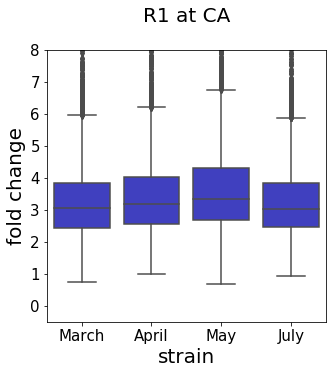

In [42]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_r1_0k_list,CA_04292024_r1_0k_list,CA_05062024_r1_0k_list,
                       CA_07182024_r1_0k_list],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
#ax = sns.swarmplot(data=[CA_03142024_dsr2_r1_0k_list,CA_07182024_dsr2_r1_0k_list,
 #                      NA_03142024_dsr2_r1_0k_list,NA_07182024_dsr2_r1_0k_list,
  #                     NFA_03142024_dsr2_r1_0k_list,NFA_07182024_dsr2_r1_0k_list,
   #                    circ_03142024_dsr2_r1_0k_list,circ_07182024_dsr2_r1_0k_list,
    #                   eccen_03142024_dsr2_r1_0k_list,eccen_07182024_dsr2_r1_0k_list], color="black")

plt.title("R1 at CA\n")
plt.xlabel("strain")
ax.set_xticklabels(["March", "April", "May", "July"],size=15)
plt.ylabel("fold change")
#plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,8])
ax.tick_params(axis='y', labelsize=15)

print('mar-apr',stats.ttest_ind(a=CA_03142024_r1_0k_list, b=CA_04292024_r1_0k_list, equal_var=True))
print('mar-may',stats.ttest_ind(a=CA_03142024_r1_0k_list, b=CA_05062024_r1_0k_list, equal_var=True))
print('mar-jul',stats.ttest_ind(a=CA_03142024_r1_0k_list, b=CA_07182024_r1_0k_list, equal_var=True))
print('apr-jul',stats.ttest_ind(a=CA_04292024_r1_0k_list, b=CA_07182024_r1_0k_list, equal_var=True))
print('may-jul',stats.ttest_ind(a=CA_05062024_r1_0k_list, b=CA_07182024_r1_0k_list, equal_var=True))


mar-apr Ttest_indResult(statistic=13.068098521715779, pvalue=8.784504031859205e-39)
mar-may Ttest_indResult(statistic=3.6325486631904558, pvalue=0.00028209159363495537)
mar-jul Ttest_indResult(statistic=4.584367894077134, pvalue=4.603512608984305e-06)
apr-jul Ttest_indResult(statistic=-7.966436071031253, pvalue=1.7709523173213365e-15)
may-jul Ttest_indResult(statistic=0.5080360105106757, pvalue=0.6114400051991924)


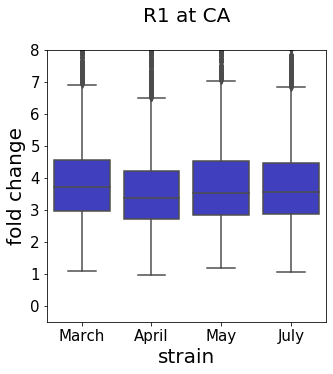

In [43]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_r1_10k_list,CA_04292024_r1_10k_list,CA_05062024_r1_10k_list,
                       CA_07182024_r1_10k_list],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
#ax = sns.swarmplot(data=[CA_03142024_dsr2_r1_0k_list,CA_07182024_dsr2_r1_0k_list,
 #                      NA_03142024_dsr2_r1_0k_list,NA_07182024_dsr2_r1_0k_list,
  #                     NFA_03142024_dsr2_r1_0k_list,NFA_07182024_dsr2_r1_0k_list,
   #                    circ_03142024_dsr2_r1_0k_list,circ_07182024_dsr2_r1_0k_list,
    #                   eccen_03142024_dsr2_r1_0k_list,eccen_07182024_dsr2_r1_0k_list], color="black")

plt.title("R1 at CA\n")
plt.xlabel("strain")
ax.set_xticklabels(["March", "April", "May", "July"],size=15)
plt.ylabel("fold change")
#plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,8])
ax.tick_params(axis='y', labelsize=15)

print('mar-apr',stats.ttest_ind(a=CA_03142024_r1_10k_list, b=CA_04292024_r1_10k_list, equal_var=True))
print('mar-may',stats.ttest_ind(a=CA_03142024_r1_10k_list, b=CA_05062024_r1_10k_list, equal_var=True))
print('mar-jul',stats.ttest_ind(a=CA_03142024_r1_10k_list, b=CA_07182024_r1_10k_list, equal_var=True))
print('apr-jul',stats.ttest_ind(a=CA_04292024_r1_10k_list, b=CA_07182024_r1_10k_list, equal_var=True))
print('may-jul',stats.ttest_ind(a=CA_05062024_r1_10k_list, b=CA_07182024_r1_10k_list, equal_var=True))


CA tt Ttest_indResult(statistic=-0.36131266714837595, pvalue=0.7521179495172343)
NA tt Ttest_indResult(statistic=-0.6101945289513309, pvalue=0.586874952964849)
NFA tt Ttest_indResult(statistic=-0.49868624734503186, pvalue=0.6599198620100826)
circ tt Ttest_indResult(statistic=3.1153374936214244, pvalue=0.08368510856773821)
eccen tt Ttest_indResult(statistic=-1.4904387071701666, pvalue=0.23873472230154605)
CA dsr2 B-me 0 Ttest_indResult(statistic=-0.6159689974581198, pvalue=0.5379247766969313)
NA dsr2 B-me 0 Ttest_indResult(statistic=-8.407534599884029, pvalue=4.5789266947691194e-17)
NFA dsr2 B-me 0 Ttest_indResult(statistic=-9.847549817960399, pvalue=8.299073121631015e-23)
circ dsr2 B-me 0 Ttest_indResult(statistic=0.3691374409988663, pvalue=0.7120307430791875)
eccen dsr2 B-me 0 Ttest_indResult(statistic=0.6534097297814008, pvalue=0.5135026639185654)


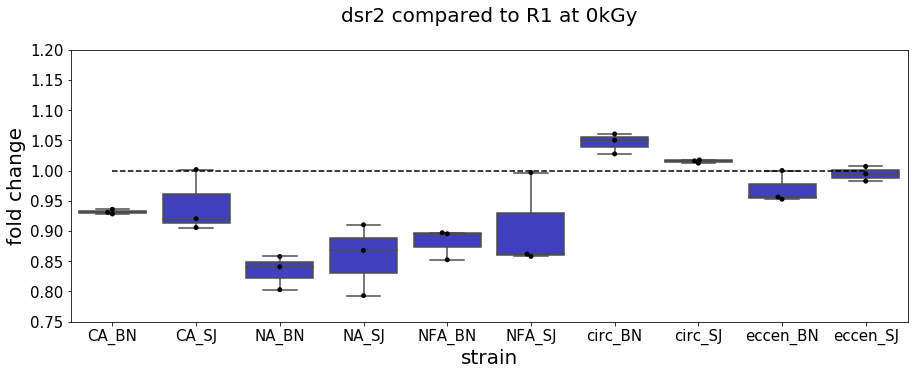

In [44]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_dsr2_r1_0k_list,CA_07182024_dsr2_r1_0k_list,
                       NA_03142024_dsr2_r1_0k_list,NA_07182024_dsr2_r1_0k_list,
                       NFA_03142024_dsr2_r1_0k_list,NFA_07182024_dsr2_r1_0k_list,
                       circ_03142024_dsr2_r1_0k_list,circ_07182024_dsr2_r1_0k_list,
                       eccen_03142024_dsr2_r1_0k_list,eccen_07182024_dsr2_r1_0k_list],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_03142024_dsr2_r1_0k_list,CA_07182024_dsr2_r1_0k_list,
                       NA_03142024_dsr2_r1_0k_list,NA_07182024_dsr2_r1_0k_list,
                       NFA_03142024_dsr2_r1_0k_list,NFA_07182024_dsr2_r1_0k_list,
                       circ_03142024_dsr2_r1_0k_list,circ_07182024_dsr2_r1_0k_list,
                       eccen_03142024_dsr2_r1_0k_list,eccen_07182024_dsr2_r1_0k_list], color="black")

plt.title("dsr2 compared to R1 at 0kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ", "circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.75,1.2])
ax.tick_params(axis='y', labelsize=15)

print('CA tt',stats.ttest_ind(a=CA_03142024_dsr2_r1_0k_list, b=CA_07182024_dsr2_r1_0k_list,equal_var=False))
print('NA tt',stats.ttest_ind(a=NA_03142024_dsr2_r1_0k_list, b=NA_07182024_dsr2_r1_0k_list, equal_var=False))
print('NFA tt',stats.ttest_ind(a=NFA_03142024_dsr2_r1_0k_list, b=NFA_07182024_dsr2_r1_0k_list, equal_var=False))
print('circ tt',stats.ttest_ind(a=circ_03142024_dsr2_r1_0k_list, b=circ_07182024_dsr2_r1_0k_list, equal_var=False))
print('eccen tt',stats.ttest_ind(a=eccen_03142024_dsr2_r1_0k_list, b=eccen_07182024_dsr2_r1_0k_list, equal_var=False))
print('CA dsr2 B-me 0',stats.ttest_ind(a=CA_03142024_dsr2_0k_list, b=CA_07182024_dsr2_0k_list, equal_var=True))
print('NA dsr2 B-me 0',stats.ttest_ind(a=NA_03142024_dsr2_0k_list, b=NA_07182024_dsr2_0k_list, equal_var=True))
print('NFA dsr2 B-me 0',stats.ttest_ind(a=NFA_03142024_dsr2_0k_list, b=NFA_07182024_dsr2_0k_list, equal_var=True))
print('circ dsr2 B-me 0',stats.ttest_ind(a=circ_03142024_dsr2_0k_list, b=circ_07182024_dsr2_0k_list, equal_var=True))
print('eccen dsr2 B-me 0',stats.ttest_ind(a=eccen_03142024_dsr2_0k_list, b=eccen_07182024_dsr2_0k_list, equal_var=True))

CA tt Ttest_indResult(statistic=2.1200922824411212, pvalue=0.10133153580822078)
NA tt Ttest_indResult(statistic=-0.15487375675223383, pvalue=0.8844214860879662)
NFA tt Ttest_indResult(statistic=-1.3865505738835464, pvalue=0.23785234527905766)
circ tt Ttest_indResult(statistic=0.5055974527580223, pvalue=0.6397282243629301)
eccen tt Ttest_indResult(statistic=-0.4488097119902804, pvalue=0.6768096532880177)
CA dsr2 B-me 0 Ttest_indResult(statistic=11.512554628173698, pvalue=1.6727814393686393e-30)
NA dsr2 B-me 0 Ttest_indResult(statistic=-5.577098339157353, pvalue=2.5006133050646745e-08)
NFA dsr2 B-me 0 Ttest_indResult(statistic=-16.610822210500814, pvalue=2.981464213341292e-61)
circ dsr2 B-me 0 Ttest_indResult(statistic=2.59897376400347, pvalue=0.009362177530164155)
eccen dsr2 B-me 0 Ttest_indResult(statistic=-1.8569017509997816, pvalue=0.06335057387952961)


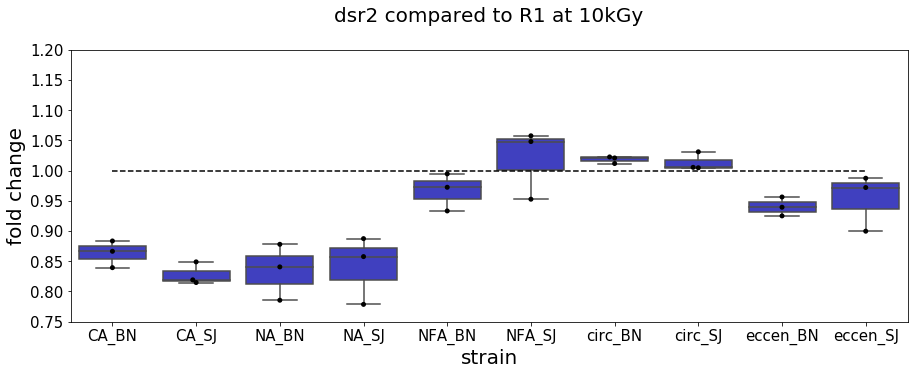

In [45]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_dsr2_r1_10k_list,CA_07182024_dsr2_r1_10k_list,
                       NA_03142024_dsr2_r1_10k_list,NA_07182024_dsr2_r1_10k_list,
                       NFA_03142024_dsr2_r1_10k_list,NFA_07182024_dsr2_r1_10k_list,
                       circ_03142024_dsr2_r1_10k_list,circ_07182024_dsr2_r1_10k_list,
                       eccen_03142024_dsr2_r1_10k_list,eccen_07182024_dsr2_r1_10k_list],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_03142024_dsr2_r1_10k_list,CA_07182024_dsr2_r1_10k_list,
                       NA_03142024_dsr2_r1_10k_list,NA_07182024_dsr2_r1_10k_list,
                       NFA_03142024_dsr2_r1_10k_list,NFA_07182024_dsr2_r1_10k_list,
                       circ_03142024_dsr2_r1_10k_list,circ_07182024_dsr2_r1_10k_list,
                       eccen_03142024_dsr2_r1_10k_list,eccen_07182024_dsr2_r1_10k_list], color="black")

plt.title("dsr2 compared to R1 at 10kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ", "circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.75,1.2])
ax.tick_params(axis='y', labelsize=15)

print('CA tt',stats.ttest_ind(a=CA_03142024_dsr2_r1_10k_list, b=CA_07182024_dsr2_r1_10k_list,equal_var=True))
print('NA tt',stats.ttest_ind(a=NA_03142024_dsr2_r1_10k_list, b=NA_07182024_dsr2_r1_10k_list, equal_var=True))
print('NFA tt',stats.ttest_ind(a=NFA_03142024_dsr2_r1_10k_list, b=NFA_07182024_dsr2_r1_10k_list, equal_var=True))
print('circ tt',stats.ttest_ind(a=circ_03142024_dsr2_r1_10k_list, b=circ_07182024_dsr2_r1_10k_list, equal_var=True))
print('eccen tt',stats.ttest_ind(a=eccen_03142024_dsr2_r1_10k_list, b=eccen_07182024_dsr2_r1_10k_list, equal_var=True))
print('CA dsr2 B-me 0',stats.ttest_ind(a=CA_03142024_dsr2_10k_list, b=CA_07182024_dsr2_10k_list, equal_var=True))
print('NA dsr2 B-me 0',stats.ttest_ind(a=NA_03142024_dsr2_10k_list, b=NA_07182024_dsr2_10k_list, equal_var=True))
print('NFA dsr2 B-me 0',stats.ttest_ind(a=NFA_03142024_dsr2_10k_list, b=NFA_07182024_dsr2_10k_list, equal_var=True))
print('circ dsr2 B-me 0',stats.ttest_ind(a=circ_03142024_dsr2_10k_list, b=circ_07182024_dsr2_10k_list, equal_var=True))
print('eccen dsr2 B-me 0',stats.ttest_ind(a=eccen_03142024_dsr2_10k_list, b=eccen_07182024_dsr2_10k_list, equal_var=True))

CA tt Ttest_indResult(statistic=3.678032575611355, pvalue=0.021240634098766545)
NA tt Ttest_indResult(statistic=0.9872253702288665, pvalue=0.3794205247754772)
NFA tt Ttest_indResult(statistic=-0.5638261384269321, pvalue=0.6029830122809079)
circ tt Ttest_indResult(statistic=0.3429126088138256, pvalue=0.748927438695997)
eccen tt Ttest_indResult(statistic=-0.22010613013045252, pvalue=0.8365656438613484)
CA dsr2 B-me 0 Ttest_indResult(statistic=-0.6159689974581198, pvalue=0.5379247766969313)
NA dsr2 B-me 0 Ttest_indResult(statistic=-8.407534599884029, pvalue=4.5789266947691194e-17)
NFA dsr2 B-me 0 Ttest_indResult(statistic=-9.847549817960399, pvalue=8.299073121631015e-23)
circ dsr2 B-me 0 Ttest_indResult(statistic=0.3691374409988663, pvalue=0.7120307430791875)
eccen dsr2 B-me 0 Ttest_indResult(statistic=0.6534097297814008, pvalue=0.5135026639185654)


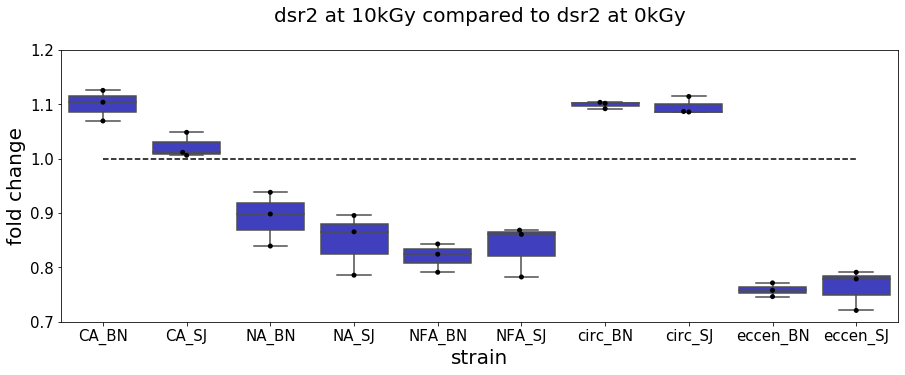

In [46]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_dsr2_10k_0k_list,CA_07182024_dsr2_10k_0k_list,
                       NA_03142024_dsr2_10k_0k_list,NA_07182024_dsr2_10k_0k_list,
                       NFA_03142024_dsr2_10k_0k_list,NFA_07182024_dsr2_10k_0k_list,
                       circ_03142024_dsr2_10k_0k_list,circ_07182024_dsr2_10k_0k_list,
                       eccen_03142024_dsr2_10k_0k_list,eccen_07182024_dsr2_10k_0k_list],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_03142024_dsr2_10k_0k_list,CA_07182024_dsr2_10k_0k_list,
                       NA_03142024_dsr2_10k_0k_list,NA_07182024_dsr2_10k_0k_list,
                       NFA_03142024_dsr2_10k_0k_list,NFA_07182024_dsr2_10k_0k_list,
                       circ_03142024_dsr2_10k_0k_list,circ_07182024_dsr2_10k_0k_list,
                       eccen_03142024_dsr2_10k_0k_list,eccen_07182024_dsr2_10k_0k_list], color="black")

plt.title("dsr2 at 10kGy compared to dsr2 at 0kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ", "circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.7,1.2])
ax.tick_params(axis='y', labelsize=15)

print('CA tt',stats.ttest_ind(a=CA_03142024_dsr2_10k_0k_list, b=CA_07182024_dsr2_10k_0k_list,equal_var=True))
print('NA tt',stats.ttest_ind(a=NA_03142024_dsr2_10k_0k_list, b=NA_07182024_dsr2_10k_0k_list, equal_var=True))
print('NFA tt',stats.ttest_ind(a=NFA_03142024_dsr2_10k_0k_list, b=NFA_07182024_dsr2_10k_0k_list, equal_var=True))
print('circ tt',stats.ttest_ind(a=circ_03142024_dsr2_10k_0k_list, b=circ_07182024_dsr2_10k_0k_list, equal_var=True))
print('eccen tt',stats.ttest_ind(a=eccen_03142024_dsr2_10k_0k_list, b=eccen_07182024_dsr2_10k_0k_list, equal_var=True))
print('CA dsr2 B-me 0',stats.ttest_ind(a=CA_03142024_dsr2_0k_list, b=CA_07182024_dsr2_0k_list, equal_var=True))
print('NA dsr2 B-me 0',stats.ttest_ind(a=NA_03142024_dsr2_0k_list, b=NA_07182024_dsr2_0k_list, equal_var=True))
print('NFA dsr2 B-me 0',stats.ttest_ind(a=NFA_03142024_dsr2_0k_list, b=NFA_07182024_dsr2_0k_list, equal_var=True))
print('circ dsr2 B-me 0',stats.ttest_ind(a=circ_03142024_dsr2_0k_list, b=circ_07182024_dsr2_0k_list, equal_var=True))
print('eccen dsr2 B-me 0',stats.ttest_ind(a=eccen_03142024_dsr2_0k_list, b=eccen_07182024_dsr2_0k_list, equal_var=True))

CA tt Ttest_indResult(statistic=-0.6885579973124415, pvalue=0.49111261541313156)
NA tt Ttest_indResult(statistic=-2.8194603111893817, pvalue=0.004817052721330649)
NFA tt Ttest_indResult(statistic=-5.920863280324356, pvalue=3.275856597800891e-09)
circ tt Ttest_indResult(statistic=6.203042664709246, pvalue=5.690480245954032e-10)
eccen tt Ttest_indResult(statistic=-3.577839780941122, pvalue=0.0003475892170843369)


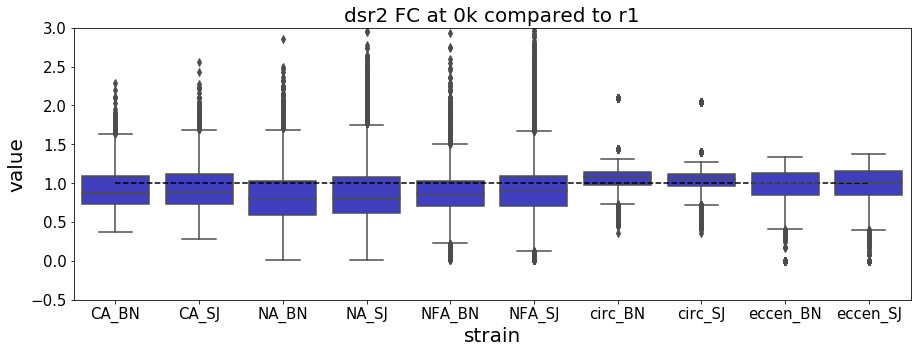

In [24]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_dsr2_0k_list_FC,CA_07182024_dsr2_0k_list_FC,
                       NA_03142024_dsr2_0k_list_FC,NA_07182024_dsr2_0k_list_FC,
                       NFA_03142024_dsr2_0k_list_FC,NFA_07182024_dsr2_0k_list_FC,
                       circ_03142024_dsr2_0k_list_FC,circ_07182024_dsr2_0k_list_FC,
                       eccen_03142024_dsr2_0k_list_FC,eccen_07182024_dsr2_0k_list_FC],color="blue",saturation=0.5)


plt.title("dsr2 FC at 0k compared to r1")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ","circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("value")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
ax.tick_params(axis='y', labelsize=15)

print('CA tt',stats.ttest_ind(a=CA_03142024_dsr2_0k_list_FC, b=CA_07182024_dsr2_0k_list_FC,equal_var=True))
print('NA tt',stats.ttest_ind(a=NA_03142024_dsr2_0k_list_FC, b=NA_07182024_dsr2_0k_list_FC, equal_var=True))
print('NFA tt',stats.ttest_ind(a=NFA_03142024_dsr2_0k_list_FC, b=NFA_07182024_dsr2_0k_list_FC, equal_var=True))
print('circ tt',stats.ttest_ind(a=circ_03142024_dsr2_0k_list_FC, b=circ_07182024_dsr2_0k_list_FC, equal_var=True))
print('eccen tt',stats.ttest_ind(a=eccen_03142024_dsr2_0k_list_FC, b=eccen_07182024_dsr2_0k_list_FC, equal_var=True))


CA tt Ttest_indResult(statistic=6.968379353492332, pvalue=3.3805463817479602e-12)
NA tt Ttest_indResult(statistic=-2.1984722758757202, pvalue=0.02793523045356491)
NFA tt Ttest_indResult(statistic=34.697629518509174, pvalue=5.0162503683400985e-251)
circ tt Ttest_indResult(statistic=2.5530091729060347, pvalue=0.010692409657245208)
eccen tt Ttest_indResult(statistic=-3.2663582660850476, pvalue=0.0010925802078611115)


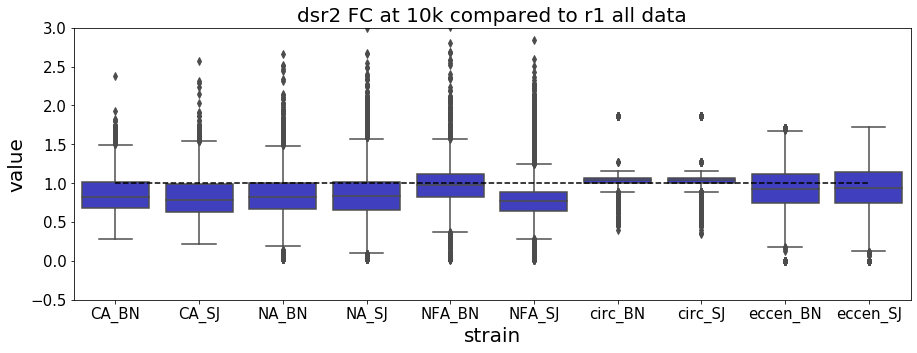

In [25]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_dsr2_10k_list_FC,CA_07182024_dsr2_10k_list_FC,
                       NA_03142024_dsr2_10k_list_FC,NA_07182024_dsr2_10k_list_FC,
                       NFA_03142024_dsr2_10k_list_FC,NFA_07182024_dsr2_10k_list_FC,
                       circ_03142024_dsr2_10k_list_FC,circ_07182024_dsr2_10k_list_FC,
                       eccen_03142024_dsr2_10k_list_FC,eccen_07182024_dsr2_10k_list_FC],color="blue",saturation=0.5)


plt.title("dsr2 FC at 10k compared to r1 all data")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ","circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("value")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
ax.tick_params(axis='y', labelsize=15)

print('CA tt',stats.ttest_ind(a=CA_03142024_dsr2_10k_list_FC, b=CA_07182024_dsr2_10k_list_FC,equal_var=True))
print('NA tt',stats.ttest_ind(a=NA_03142024_dsr2_10k_list_FC, b=NA_07182024_dsr2_10k_list_FC, equal_var=True))
print('NFA tt',stats.ttest_ind(a=NFA_03142024_dsr2_10k_list_FC, b=NFA_07182024_dsr2_10k_list_FC, equal_var=True))
print('circ tt',stats.ttest_ind(a=circ_03142024_dsr2_10k_list_FC, b=circ_07182024_dsr2_10k_list_FC, equal_var=True))
print('eccen tt',stats.ttest_ind(a=eccen_03142024_dsr2_10k_list_FC, b=eccen_07182024_dsr2_10k_list_FC, equal_var=True))


CA tt Ttest_indResult(statistic=12.11035754535026, pvalue=1.4863524953104615e-33)
NA tt Ttest_indResult(statistic=5.347392288094997, pvalue=9.093191900324776e-08)
NFA tt Ttest_indResult(statistic=-4.223204726470218, pvalue=2.4269879515824097e-05)
circ tt Ttest_indResult(statistic=1.9650195194894609, pvalue=0.04943590941873425)
eccen tt Ttest_indResult(statistic=-2.3056109983019812, pvalue=0.02115000810323808)


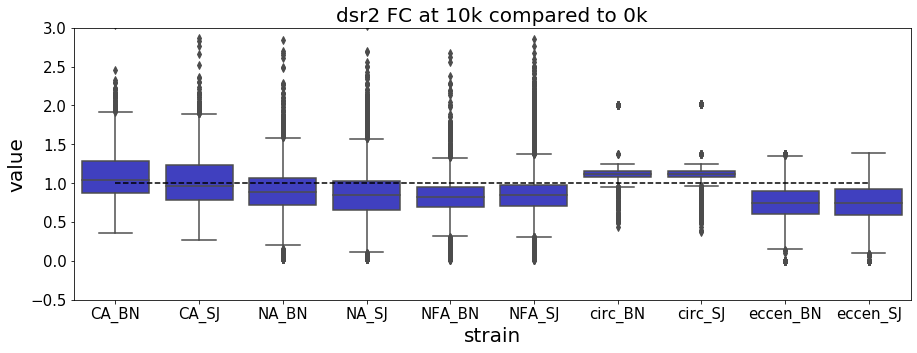

In [26]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_dsr2_10k_0k_list_FC,CA_07182024_dsr2_10k_0k_list_FC,
                       NA_03142024_dsr2_10k_0k_list_FC,NA_07182024_dsr2_10k_0k_list_FC,
                       NFA_03142024_dsr2_10k_0k_list_FC,NFA_07182024_dsr2_10k_0k_list_FC,
                       circ_03142024_dsr2_10k_0k_list_FC,circ_07182024_dsr2_10k_0k_list_FC,
                       eccen_03142024_dsr2_10k_0k_list_FC,eccen_07182024_dsr2_10k_0k_list_FC],color="blue",saturation=0.5)


plt.title("dsr2 FC at 10k compared to 0k")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ","circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("value")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
ax.tick_params(axis='y', labelsize=15)

print('CA tt',stats.ttest_ind(a=CA_03142024_dsr2_10k_0k_list_FC, b=CA_07182024_dsr2_10k_0k_list_FC,equal_var=True))
print('NA tt',stats.ttest_ind(a=NA_03142024_dsr2_10k_0k_list_FC, b=NA_07182024_dsr2_10k_0k_list_FC, equal_var=True))
print('NFA tt',stats.ttest_ind(a=NFA_03142024_dsr2_10k_0k_list_FC, b=NFA_07182024_dsr2_10k_0k_list_FC, equal_var=True))
print('circ tt',stats.ttest_ind(a=circ_03142024_dsr2_10k_0k_list_FC, b=circ_07182024_dsr2_10k_0k_list_FC, equal_var=True))
print('eccen tt',stats.ttest_ind(a=eccen_03142024_dsr2_10k_0k_list_FC, b=eccen_07182024_dsr2_10k_0k_list_FC, equal_var=True))


CA tt Ttest_indResult(statistic=-2.160489985663814, pvalue=0.09683591447229717)
NA tt Ttest_indResult(statistic=0.16502934797148347, pvalue=0.8769252739145846)
NFA tt Ttest_indResult(statistic=1.1992554815678138, pvalue=0.2966103742232639)
circ tt Ttest_indResult(statistic=-0.2501049090239551, pvalue=0.8148263223066053)
eccen tt Ttest_indResult(statistic=0.902800482566854, pvalue=0.41768266423821293)
CA dsr2 B-me 0 Ttest_indResult(statistic=0.4444328315090868, pvalue=0.6567351255045135)
NA dsr2 B-me 0 Ttest_indResult(statistic=-11.142641349535364, pvalue=9.69785266430205e-29)
NFA dsr2 B-me 0 Ttest_indResult(statistic=-13.320618325399677, pvalue=2.748086765007121e-40)
circ dsr2 B-me 0 Ttest_indResult(statistic=1.747792132368561, pvalue=0.0805174016667412)
eccen dsr2 B-me 0 Ttest_indResult(statistic=0.5255342855349945, pvalue=0.5992184219842014)


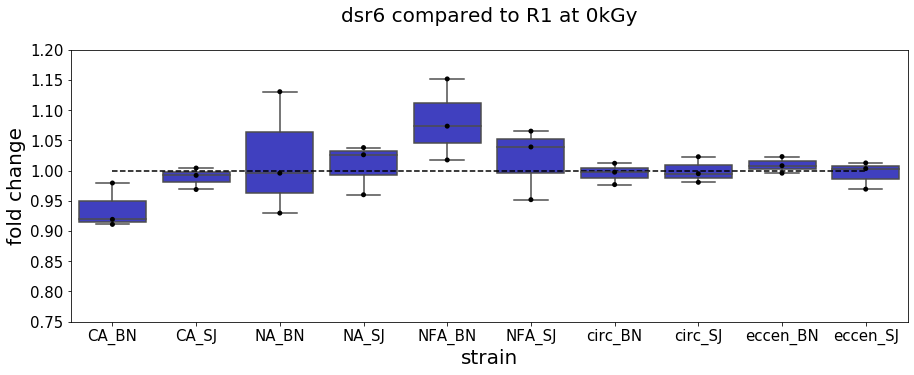

In [44]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_04292024_dsr6_r1_0k_list,CA_07182024_dsr6_r1_0k_list,
                       NA_04292024_dsr6_r1_0k_list,NA_07182024_dsr6_r1_0k_list,
                       NFA_04292024_dsr6_r1_0k_list,NFA_07182024_dsr6_r1_0k_list,
                       circ_04292024_dsr6_r1_0k_list,circ_07182024_dsr6_r1_0k_list,
                       eccen_04292024_dsr6_r1_0k_list,eccen_07182024_dsr6_r1_0k_list],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_04292024_dsr6_r1_0k_list,CA_07182024_dsr6_r1_0k_list,
                       NA_04292024_dsr6_r1_0k_list,NA_07182024_dsr6_r1_0k_list,
                       NFA_04292024_dsr6_r1_0k_list,NFA_07182024_dsr6_r1_0k_list,
                       circ_04292024_dsr6_r1_0k_list,circ_07182024_dsr6_r1_0k_list,
                       eccen_04292024_dsr6_r1_0k_list,eccen_07182024_dsr6_r1_0k_list], color="black")

plt.title("dsr6 compared to R1 at 0kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ", "circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.75,1.2])
ax.tick_params(axis='y', labelsize=15)

print('CA tt',stats.ttest_ind(a=CA_04292024_dsr6_r1_0k_list, b=CA_07182024_dsr6_r1_0k_list,equal_var=True))
print('NA tt',stats.ttest_ind(a=NA_04292024_dsr6_r1_0k_list, b=NA_07182024_dsr6_r1_0k_list, equal_var=True))
print('NFA tt',stats.ttest_ind(a=NFA_04292024_dsr6_r1_0k_list, b=NFA_07182024_dsr6_r1_0k_list, equal_var=True))
print('circ tt',stats.ttest_ind(a=circ_04292024_dsr6_r1_0k_list, b=circ_07182024_dsr6_r1_0k_list, equal_var=True))
print('eccen tt',stats.ttest_ind(a=eccen_04292024_dsr6_r1_0k_list, b=eccen_07182024_dsr6_r1_0k_list, equal_var=True))
print('CA dsr2 B-me 0',stats.ttest_ind(a=CA_04292024_dsr6_0k_list, b=CA_07182024_dsr6_0k_list, equal_var=True))
print('NA dsr2 B-me 0',stats.ttest_ind(a=NA_04292024_dsr6_0k_list, b=NA_07182024_dsr6_0k_list, equal_var=True))
print('NFA dsr2 B-me 0',stats.ttest_ind(a=NFA_04292024_dsr6_0k_list, b=NFA_07182024_dsr6_0k_list, equal_var=True))
print('circ dsr2 B-me 0',stats.ttest_ind(a=circ_04292024_dsr6_0k_list, b=circ_07182024_dsr6_0k_list, equal_var=True))
print('eccen dsr2 B-me 0',stats.ttest_ind(a=eccen_04292024_dsr6_0k_list, b=eccen_07182024_dsr6_0k_list, equal_var=True))

CA tt Ttest_indResult(statistic=2.0143339469146015, pvalue=0.11423301681218748)
NA tt Ttest_indResult(statistic=-3.4337560052858445, pvalue=0.026444474334651108)
NFA tt Ttest_indResult(statistic=-5.412686598461138, pvalue=0.005644367861854982)
circ tt Ttest_indResult(statistic=6.346409928170896, pvalue=0.0031576774791209)
eccen tt Ttest_indResult(statistic=-3.1471699940208278, pvalue=0.034608079552320516)
CA dsr2 B-me 0 Ttest_indResult(statistic=0.4444328315090868, pvalue=0.6567351255045135)
NA dsr2 B-me 0 Ttest_indResult(statistic=-11.142641349535364, pvalue=9.69785266430205e-29)
NFA dsr2 B-me 0 Ttest_indResult(statistic=-13.320618325399677, pvalue=2.748086765007121e-40)
circ dsr2 B-me 0 Ttest_indResult(statistic=1.747792132368561, pvalue=0.0805174016667412)
eccen dsr2 B-me 0 Ttest_indResult(statistic=0.5255342855349945, pvalue=0.5992184219842014)


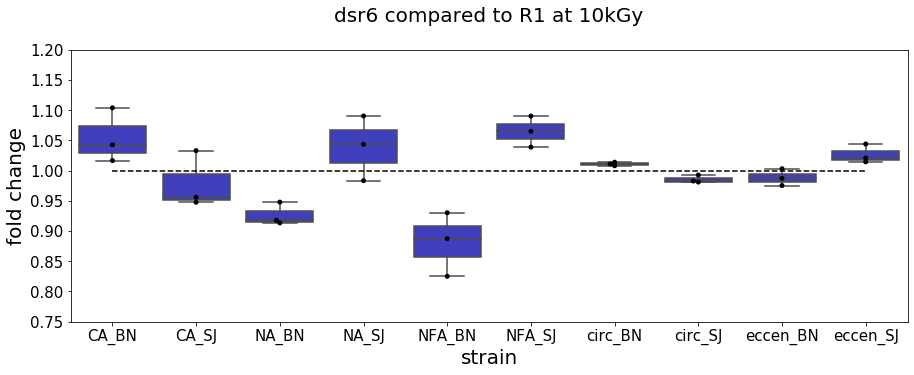

In [46]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_04292024_dsr6_r1_10k_list,CA_07182024_dsr6_r1_10k_list,
                       NA_04292024_dsr6_r1_10k_list,NA_07182024_dsr6_r1_10k_list,
                       NFA_04292024_dsr6_r1_10k_list,NFA_07182024_dsr6_r1_10k_list,
                       circ_04292024_dsr6_r1_10k_list,circ_07182024_dsr6_r1_10k_list,
                       eccen_04292024_dsr6_r1_10k_list,eccen_07182024_dsr6_r1_10k_list],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_04292024_dsr6_r1_10k_list,CA_07182024_dsr6_r1_10k_list,
                       NA_04292024_dsr6_r1_10k_list,NA_07182024_dsr6_r1_10k_list,
                       NFA_04292024_dsr6_r1_10k_list,NFA_07182024_dsr6_r1_10k_list,
                       circ_04292024_dsr6_r1_10k_list,circ_07182024_dsr6_r1_10k_list,
                       eccen_04292024_dsr6_r1_10k_list,eccen_07182024_dsr6_r1_10k_list], color="black")

plt.title("dsr6 compared to R1 at 10kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ", "circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.75,1.2])
ax.tick_params(axis='y', labelsize=15)

print('CA tt',stats.ttest_ind(a=CA_04292024_dsr6_r1_10k_list, b=CA_07182024_dsr6_r1_10k_list,equal_var=True))
print('NA tt',stats.ttest_ind(a=NA_04292024_dsr6_r1_10k_list, b=NA_07182024_dsr6_r1_10k_list, equal_var=True))
print('NFA tt',stats.ttest_ind(a=NFA_04292024_dsr6_r1_10k_list, b=NFA_07182024_dsr6_r1_10k_list, equal_var=True))
print('circ tt',stats.ttest_ind(a=circ_04292024_dsr6_r1_10k_list, b=circ_07182024_dsr6_r1_10k_list, equal_var=True))
print('eccen tt',stats.ttest_ind(a=eccen_04292024_dsr6_r1_10k_list, b=eccen_07182024_dsr6_r1_10k_list, equal_var=True))
print('CA dsr2 B-me 0',stats.ttest_ind(a=CA_04292024_dsr6_0k_list, b=CA_07182024_dsr6_0k_list, equal_var=True))
print('NA dsr2 B-me 0',stats.ttest_ind(a=NA_04292024_dsr6_0k_list, b=NA_07182024_dsr6_0k_list, equal_var=True))
print('NFA dsr2 B-me 0',stats.ttest_ind(a=NFA_04292024_dsr6_0k_list, b=NFA_07182024_dsr6_0k_list, equal_var=True))
print('circ dsr2 B-me 0',stats.ttest_ind(a=circ_04292024_dsr6_0k_list, b=circ_07182024_dsr6_0k_list, equal_var=True))
print('eccen dsr2 B-me 0',stats.ttest_ind(a=eccen_04292024_dsr6_0k_list, b=eccen_07182024_dsr6_0k_list, equal_var=True))

CA tt Ttest_indResult(statistic=0.6961519950472145, pvalue=0.524665283668082)
NA tt Ttest_indResult(statistic=-2.5468322114045736, pvalue=0.06351851166928232)
NFA tt Ttest_indResult(statistic=-2.609631833454364, pvalue=0.059442977972673054)
circ tt Ttest_indResult(statistic=4.662707625244223, pvalue=0.009570207612030642)
eccen tt Ttest_indResult(statistic=-3.1300501571551598, pvalue=0.03518355340591426)


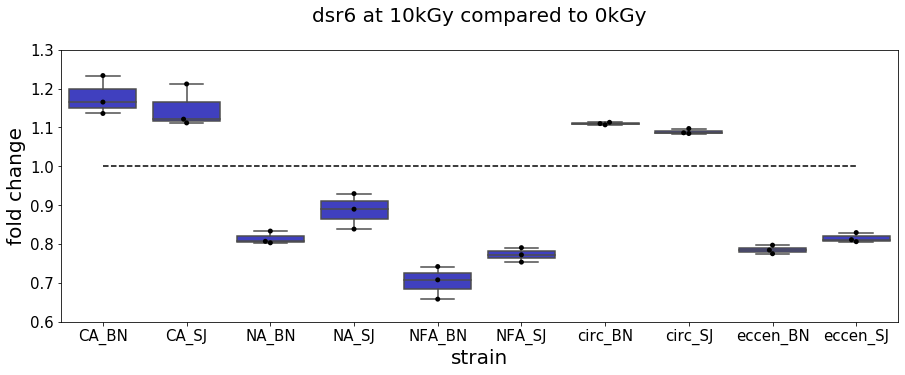

In [48]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_04292024_dsr6_10k_0k_list,CA_07182024_dsr6_10k_0k_list,
                       NA_04292024_dsr6_10k_0k_list,NA_07182024_dsr6_10k_0k_list,
                       NFA_04292024_dsr6_10k_0k_list,NFA_07182024_dsr6_10k_0k_list,
                       circ_04292024_dsr6_10k_0k_list,circ_07182024_dsr6_10k_0k_list,
                       eccen_04292024_dsr6_10k_0k_list,eccen_07182024_dsr6_10k_0k_list],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_04292024_dsr6_10k_0k_list,CA_07182024_dsr6_10k_0k_list,
                       NA_04292024_dsr6_10k_0k_list,NA_07182024_dsr6_10k_0k_list,
                       NFA_04292024_dsr6_10k_0k_list,NFA_07182024_dsr6_10k_0k_list,
                       circ_04292024_dsr6_10k_0k_list,circ_07182024_dsr6_10k_0k_list,
                       eccen_04292024_dsr6_10k_0k_list,eccen_07182024_dsr6_10k_0k_list], color="black")

plt.title("dsr6 at 10kGy compared to 0kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ", "circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.6,1.3])
ax.tick_params(axis='y', labelsize=15)

print('CA tt',stats.ttest_ind(a=CA_04292024_dsr6_10k_0k_list, b=CA_07182024_dsr6_10k_0k_list,equal_var=True))
print('NA tt',stats.ttest_ind(a=NA_04292024_dsr6_10k_0k_list, b=NA_07182024_dsr6_10k_0k_list, equal_var=True))
print('NFA tt',stats.ttest_ind(a=NFA_04292024_dsr6_10k_0k_list, b=NFA_07182024_dsr6_10k_0k_list, equal_var=True))
print('circ tt',stats.ttest_ind(a=circ_04292024_dsr6_10k_0k_list, b=circ_07182024_dsr6_10k_0k_list, equal_var=True))
print('eccen tt',stats.ttest_ind(a=eccen_04292024_dsr6_10k_0k_list, b=eccen_07182024_dsr6_10k_0k_list, equal_var=True))

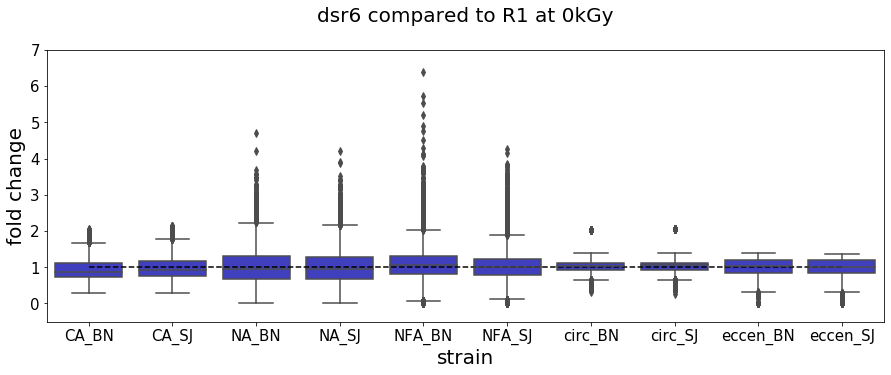

In [210]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_04292024_dsr6_0k_list_FC,CA_07182024_dsr6_0k_list_FC,
                       NA_04292024_dsr6_0k_list_FC,NA_07182024_dsr6_0k_list_FC,
                       NFA_04292024_dsr6_0k_list_FC,NFA_07182024_dsr6_0k_list_FC,
                       circ_04292024_dsr6_0k_list_FC,circ_07182024_dsr6_0k_list_FC,
                       eccen_04292024_dsr6_0k_list_FC,eccen_07182024_dsr6_0k_list_FC],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
#ax = sns.swarmplot(data=[CA_03142024_dsr2_0k_list,CA_07182024_dsr2_0k_list,
 #                      NA_03142024_dsr2_0k_list,NA_07182024_dsr2_0k_list,
  #                     NFA_03142024_dsr2_0k_list,NFA_07182024_dsr2_0k_list,
   #                    circ_03142024_dsr2_0k_list,circ_07182024_dsr2_0k_list,
    #                   eccen_03142024_dsr2_0k_list,eccen_07182024_dsr2_0k_list], color="black")

plt.title("dsr6 compared to R1 at 0kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ","circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,7])
ax.tick_params(axis='y', labelsize=15)



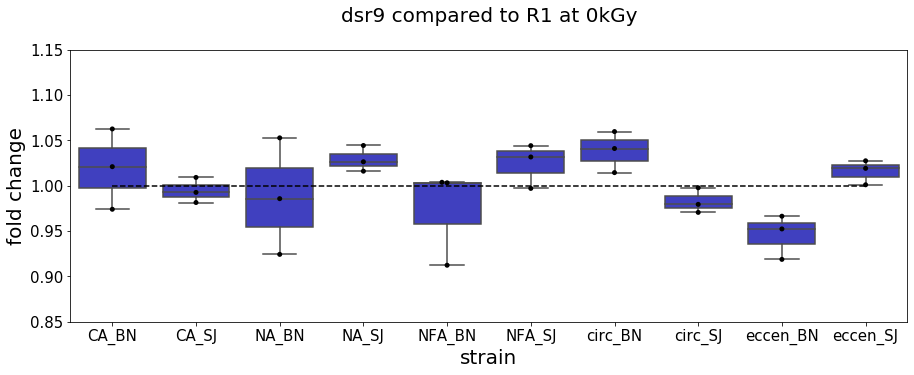

In [189]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_05062024_dsr9_r1_0k_list,CA_07182024_dsr9_r1_0k_list,
                       NA_05062024_dsr9_r1_0k_list,NA_07182024_dsr9_r1_0k_list,
                       NFA_05062024_dsr9_r1_0k_list,NFA_07182024_dsr9_r1_0k_list,
                       circ_05062024_dsr9_r1_0k_list,circ_07182024_dsr9_r1_0k_list,
                       eccen_05062024_dsr9_r1_0k_list,eccen_07182024_dsr9_r1_0k_list],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_05062024_dsr9_r1_0k_list,CA_07182024_dsr9_r1_0k_list,
                       NA_05062024_dsr9_r1_0k_list,NA_07182024_dsr9_r1_0k_list,
                       NFA_05062024_dsr9_r1_0k_list,NFA_07182024_dsr9_r1_0k_list,
                       circ_05062024_dsr9_r1_0k_list,circ_07182024_dsr9_r1_0k_list,
                       eccen_05062024_dsr9_r1_0k_list,eccen_07182024_dsr9_r1_0k_list], color="black")

plt.title("dsr9 compared to R1 at 0kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ", "circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.85,1.15])
ax.tick_params(axis='y', labelsize=15)

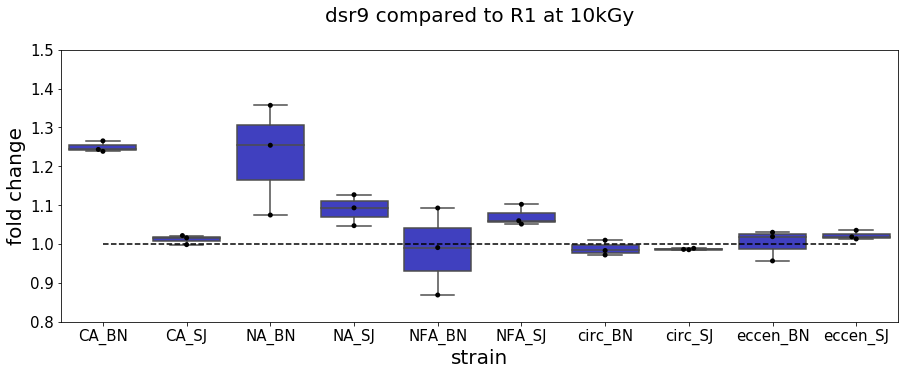

In [190]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_05062024_dsr9_r1_10k_list,CA_07182024_dsr9_r1_10k_list,
                       NA_05062024_dsr9_r1_10k_list,NA_07182024_dsr9_r1_10k_list,
                       NFA_05062024_dsr9_r1_10k_list,NFA_07182024_dsr9_r1_10k_list,
                       circ_05062024_dsr9_r1_10k_list,circ_07182024_dsr9_r1_10k_list,
                       eccen_05062024_dsr9_r1_10k_list,eccen_07182024_dsr9_r1_10k_list],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_05062024_dsr9_r1_10k_list,CA_07182024_dsr9_r1_10k_list,
                       NA_05062024_dsr9_r1_10k_list,NA_07182024_dsr9_r1_10k_list,
                       NFA_05062024_dsr9_r1_10k_list,NFA_07182024_dsr9_r1_10k_list,
                       circ_05062024_dsr9_r1_10k_list,circ_07182024_dsr9_r1_10k_list,
                       eccen_05062024_dsr9_r1_10k_list,eccen_07182024_dsr9_r1_10k_list], color="black")

plt.title("dsr9 compared to R1 at 10kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ", "circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.8,1.5])
ax.tick_params(axis='y', labelsize=15)

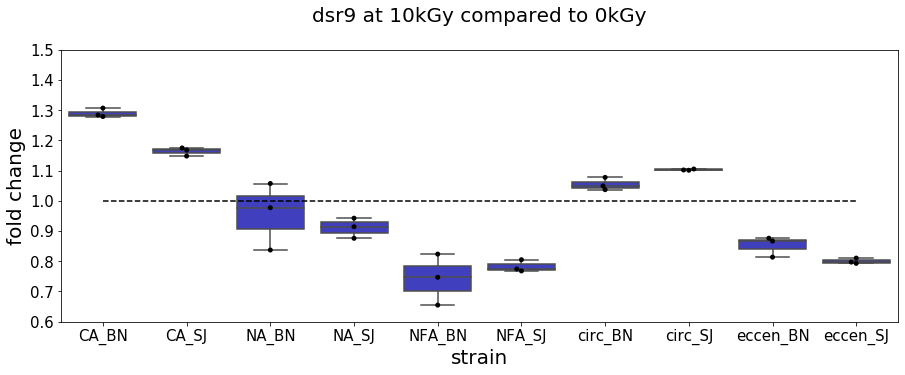

In [191]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_05062024_dsr9_10k_0k_list,CA_07182024_dsr9_10k_0k_list,
                       NA_05062024_dsr9_10k_0k_list,NA_07182024_dsr9_10k_0k_list,
                       NFA_05062024_dsr9_10k_0k_list,NFA_07182024_dsr9_10k_0k_list,
                       circ_05062024_dsr9_10k_0k_list,circ_07182024_dsr9_10k_0k_list,
                       eccen_05062024_dsr9_10k_0k_list,eccen_07182024_dsr9_10k_0k_list],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_05062024_dsr9_10k_0k_list,CA_07182024_dsr9_10k_0k_list,
                       NA_05062024_dsr9_10k_0k_list,NA_07182024_dsr9_10k_0k_list,
                       NFA_05062024_dsr9_10k_0k_list,NFA_07182024_dsr9_10k_0k_list,
                       circ_05062024_dsr9_10k_0k_list,circ_07182024_dsr9_10k_0k_list,
                       eccen_05062024_dsr9_10k_0k_list,eccen_07182024_dsr9_10k_0k_list], color="black")

plt.title("dsr9 at 10kGy compared to 0kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ", "circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.6,1.5])
ax.tick_params(axis='y', labelsize=15)

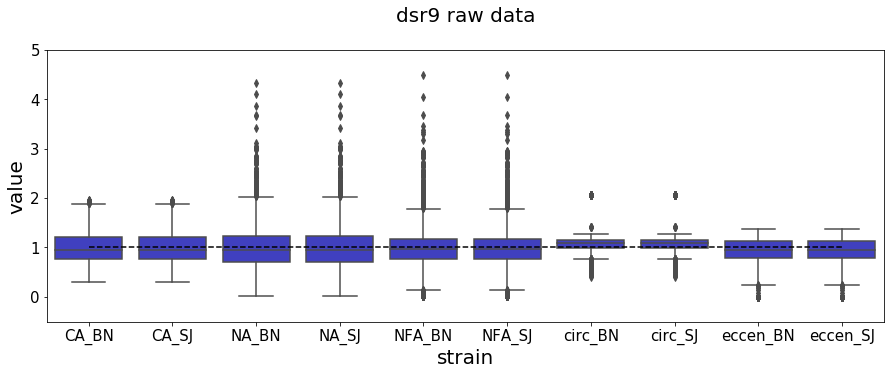

In [208]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_05062024_dsr9_0k_list_FC,CA_05062024_dsr9_0k_list_FC,
                       NA_05062024_dsr9_0k_list_FC,NA_05062024_dsr9_0k_list_FC,
                       NFA_05062024_dsr9_0k_list_FC,NFA_05062024_dsr9_0k_list_FC,
                       circ_05062024_dsr9_0k_list_FC,circ_05062024_dsr9_0k_list_FC,
                       eccen_05062024_dsr9_0k_list_FC,eccen_05062024_dsr9_0k_list_FC],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
#ax = sns.swarmplot(data=[CA_03142024_dsr2_0k_list,CA_07182024_dsr2_0k_list,
 #                      NA_03142024_dsr2_0k_list,NA_07182024_dsr2_0k_list,
  #                     NFA_03142024_dsr2_0k_list,NFA_07182024_dsr2_0k_list,
   #                    circ_03142024_dsr2_0k_list,circ_07182024_dsr2_0k_list,
    #                   eccen_03142024_dsr2_0k_list,eccen_07182024_dsr2_0k_list], color="black")

plt.title("dsr9 raw data\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ","circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("value")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,5])
ax.tick_params(axis='y', labelsize=15)


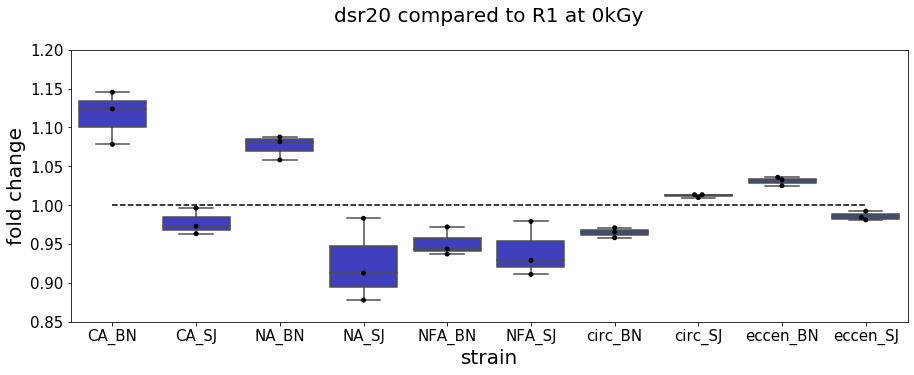

In [193]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_05062024_dsr20_r1_0k_list,CA_07182024_dsr20_r1_0k_list,
                       NA_05062024_dsr20_r1_0k_list,NA_07182024_dsr20_r1_0k_list,
                       NFA_05062024_dsr20_r1_0k_list,NFA_07182024_dsr20_r1_0k_list,
                       circ_05062024_dsr20_r1_0k_list,circ_07182024_dsr20_r1_0k_list,
                       eccen_05062024_dsr20_r1_0k_list,eccen_07182024_dsr20_r1_0k_list],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_05062024_dsr20_r1_0k_list,CA_07182024_dsr20_r1_0k_list,
                       NA_05062024_dsr20_r1_0k_list,NA_07182024_dsr20_r1_0k_list,
                       NFA_05062024_dsr20_r1_0k_list,NFA_07182024_dsr20_r1_0k_list,
                       circ_05062024_dsr20_r1_0k_list,circ_07182024_dsr20_r1_0k_list,
                       eccen_05062024_dsr20_r1_0k_list,eccen_07182024_dsr20_r1_0k_list], color="black")

plt.title("dsr20 compared to R1 at 0kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ", "circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.85,1.2])
ax.tick_params(axis='y', labelsize=15)

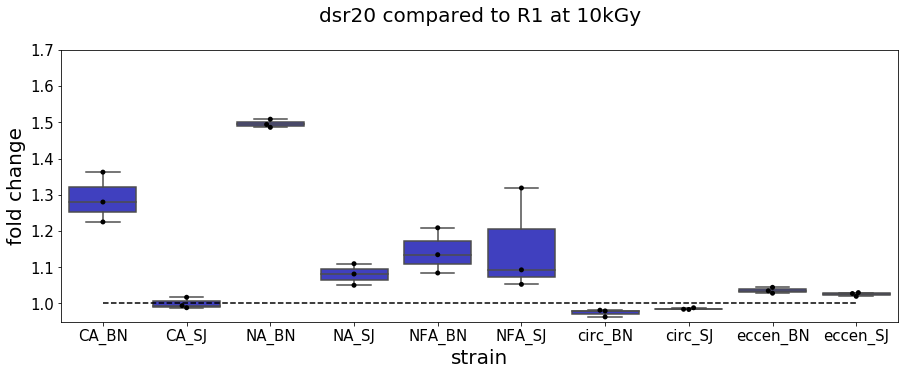

In [194]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_05062024_dsr20_r1_10k_list,CA_07182024_dsr20_r1_10k_list,
                       NA_05062024_dsr20_r1_10k_list,NA_07182024_dsr20_r1_10k_list,
                       NFA_05062024_dsr20_r1_10k_list,NFA_07182024_dsr20_r1_10k_list,
                       circ_05062024_dsr20_r1_10k_list,circ_07182024_dsr20_r1_10k_list,
                       eccen_05062024_dsr20_r1_10k_list,eccen_07182024_dsr20_r1_10k_list],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_05062024_dsr20_r1_10k_list,CA_07182024_dsr20_r1_10k_list,
                       NA_05062024_dsr20_r1_10k_list,NA_07182024_dsr20_r1_10k_list,
                       NFA_05062024_dsr20_r1_10k_list,NFA_07182024_dsr20_r1_10k_list,
                       circ_05062024_dsr20_r1_10k_list,circ_07182024_dsr20_r1_10k_list,
                       eccen_05062024_dsr20_r1_10k_list,eccen_07182024_dsr20_r1_10k_list], color="black")

plt.title("dsr20 compared to R1 at 10kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ", "circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.95,1.7])
ax.tick_params(axis='y', labelsize=15)

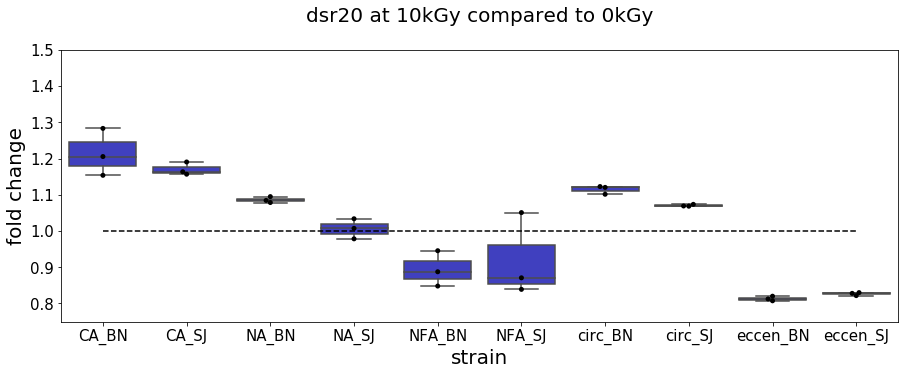

In [195]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_05062024_dsr20_10k_0k_list,CA_07182024_dsr20_10k_0k_list,
                       NA_05062024_dsr20_10k_0k_list,NA_07182024_dsr20_10k_0k_list,
                       NFA_05062024_dsr20_10k_0k_list,NFA_07182024_dsr20_10k_0k_list,
                       circ_05062024_dsr20_10k_0k_list,circ_07182024_dsr20_10k_0k_list,
                       eccen_05062024_dsr20_10k_0k_list,eccen_07182024_dsr20_10k_0k_list],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_05062024_dsr20_10k_0k_list,CA_07182024_dsr20_10k_0k_list,
                       NA_05062024_dsr20_10k_0k_list,NA_07182024_dsr20_10k_0k_list,
                       NFA_05062024_dsr20_10k_0k_list,NFA_07182024_dsr20_10k_0k_list,
                       circ_05062024_dsr20_10k_0k_list,circ_07182024_dsr20_10k_0k_list,
                       eccen_05062024_dsr20_10k_0k_list,eccen_07182024_dsr20_10k_0k_list], color="black")

plt.title("dsr20 at 10kGy compared to 0kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ", "circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.75,1.5])
ax.tick_params(axis='y', labelsize=15)

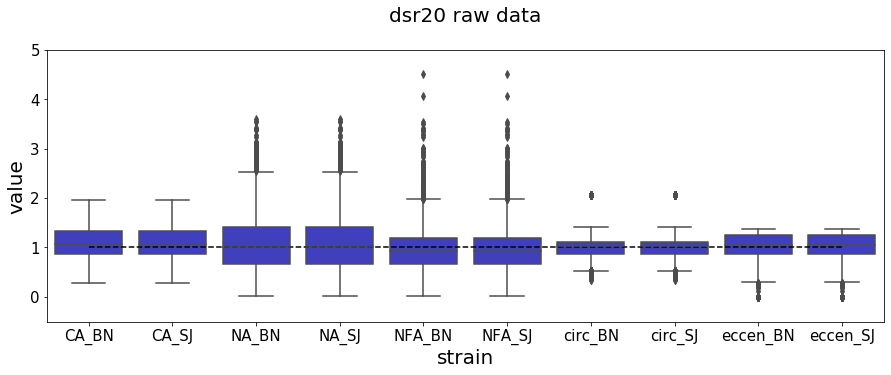

In [205]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_05062024_dsr20_0k_list_FC,CA_05062024_dsr20_0k_list_FC,
                       NA_05062024_dsr20_0k_list_FC,NA_05062024_dsr20_0k_list_FC,
                       NFA_05062024_dsr20_0k_list_FC,NFA_05062024_dsr20_0k_list_FC,
                       circ_05062024_dsr20_0k_list_FC,circ_05062024_dsr20_0k_list_FC,
                       eccen_05062024_dsr20_0k_list_FC,eccen_05062024_dsr20_0k_list_FC],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
#ax = sns.swarmplot(data=[CA_03142024_dsr2_0k_list,CA_07182024_dsr2_0k_list,
 #                      NA_03142024_dsr2_0k_list,NA_07182024_dsr2_0k_list,
  #                     NFA_03142024_dsr2_0k_list,NFA_07182024_dsr2_0k_list,
   #                    circ_03142024_dsr2_0k_list,circ_07182024_dsr2_0k_list,
    #                   eccen_03142024_dsr2_0k_list,eccen_07182024_dsr2_0k_list], color="black")

plt.title("dsr20 raw data\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ","circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("value")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,5])
ax.tick_params(axis='y', labelsize=15)


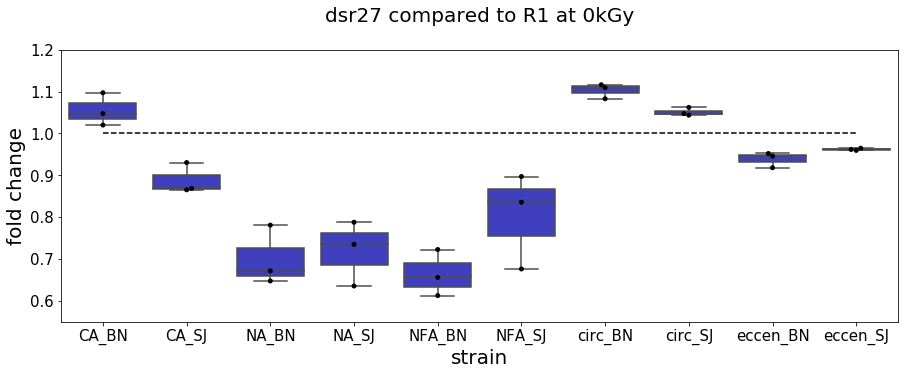

In [197]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_dsr27_r1_0k_list,CA_07182024_dsr27_r1_0k_list,
                       NA_03142024_dsr27_r1_0k_list,NA_07182024_dsr27_r1_0k_list,
                       NFA_03142024_dsr27_r1_0k_list,NFA_07182024_dsr27_r1_0k_list,
                       circ_03142024_dsr27_r1_0k_list,circ_07182024_dsr27_r1_0k_list,
                       eccen_03142024_dsr27_r1_0k_list,eccen_07182024_dsr27_r1_0k_list],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_03142024_dsr27_r1_0k_list,CA_07182024_dsr27_r1_0k_list,
                       NA_03142024_dsr27_r1_0k_list,NA_07182024_dsr27_r1_0k_list,
                       NFA_03142024_dsr27_r1_0k_list,NFA_07182024_dsr27_r1_0k_list,
                       circ_03142024_dsr27_r1_0k_list,circ_07182024_dsr27_r1_0k_list,
                       eccen_03142024_dsr27_r1_0k_list,eccen_07182024_dsr27_r1_0k_list], color="black")

plt.title("dsr27 compared to R1 at 0kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ", "circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.55,1.2])
ax.tick_params(axis='y', labelsize=15)

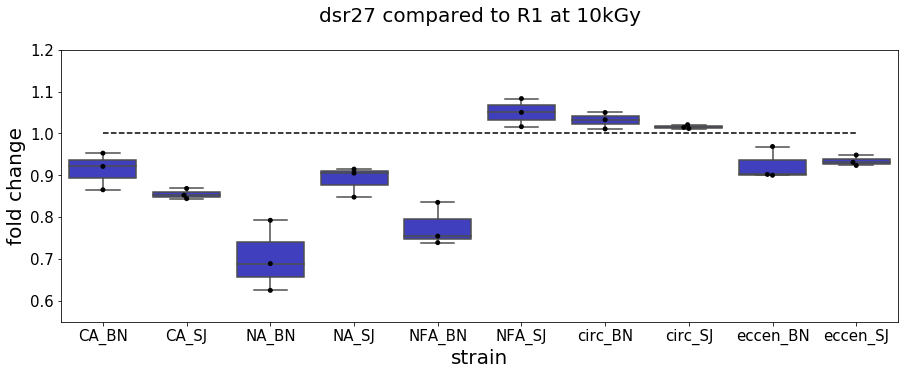

In [198]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_dsr27_r1_10k_list,CA_07182024_dsr27_r1_10k_list,
                       NA_03142024_dsr27_r1_10k_list,NA_07182024_dsr27_r1_10k_list,
                       NFA_03142024_dsr27_r1_10k_list,NFA_07182024_dsr27_r1_10k_list,
                       circ_03142024_dsr27_r1_10k_list,circ_07182024_dsr27_r1_10k_list,
                       eccen_03142024_dsr27_r1_10k_list,eccen_07182024_dsr27_r1_10k_list],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_03142024_dsr27_r1_10k_list,CA_07182024_dsr27_r1_10k_list,
                       NA_03142024_dsr27_r1_10k_list,NA_07182024_dsr27_r1_10k_list,
                       NFA_03142024_dsr27_r1_10k_list,NFA_07182024_dsr27_r1_10k_list,
                       circ_03142024_dsr27_r1_10k_list,circ_07182024_dsr27_r1_10k_list,
                       eccen_03142024_dsr27_r1_10k_list,eccen_07182024_dsr27_r1_10k_list], color="black")

plt.title("dsr27 compared to R1 at 10kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ", "circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.55,1.2])
ax.tick_params(axis='y', labelsize=15)

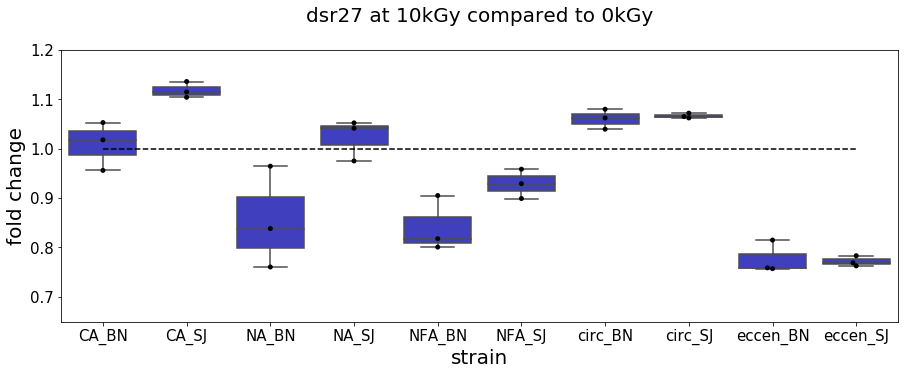

In [199]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_dsr27_10k_0k_list,CA_07182024_dsr27_10k_0k_list,
                       NA_03142024_dsr27_10k_0k_list,NA_07182024_dsr27_10k_0k_list,
                       NFA_03142024_dsr27_10k_0k_list,NFA_07182024_dsr27_10k_0k_list,
                       circ_03142024_dsr27_10k_0k_list,circ_07182024_dsr27_10k_0k_list,
                       eccen_03142024_dsr27_10k_0k_list,eccen_07182024_dsr27_10k_0k_list],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_03142024_dsr27_10k_0k_list,CA_07182024_dsr27_10k_0k_list,
                       NA_03142024_dsr27_10k_0k_list,NA_07182024_dsr27_10k_0k_list,
                       NFA_03142024_dsr27_10k_0k_list,NFA_07182024_dsr27_10k_0k_list,
                       circ_03142024_dsr27_10k_0k_list,circ_07182024_dsr27_10k_0k_list,
                       eccen_03142024_dsr27_10k_0k_list,eccen_07182024_dsr27_10k_0k_list], color="black")

plt.title("dsr27 at 10kGy compared to 0kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ", "circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.65,1.2])
ax.tick_params(axis='y', labelsize=15)

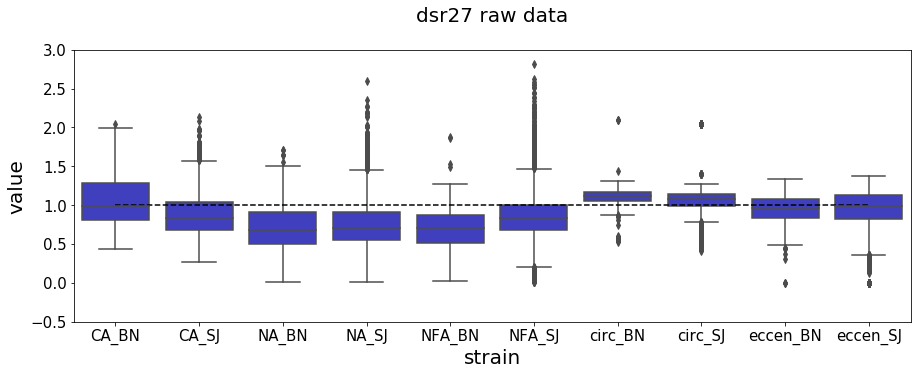

In [203]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_dsr27_0k_list_FC,CA_07182024_dsr27_0k_list_FC,
                       NA_03142024_dsr27_0k_list_FC,NA_07182024_dsr27_0k_list_FC,
                       NFA_03142024_dsr27_0k_list_FC,NFA_07182024_dsr27_0k_list_FC,
                       circ_03142024_dsr27_0k_list_FC,circ_07182024_dsr27_0k_list_FC,
                       eccen_03142024_dsr27_0k_list_FC,eccen_07182024_dsr27_0k_list_FC],color="blue",saturation=0.5)
# Add jitter with the swarmplot function
#ax = sns.swarmplot(data=[CA_03142024_dsr2_0k_list,CA_07182024_dsr2_0k_list,
 #                      NA_03142024_dsr2_0k_list,NA_07182024_dsr2_0k_list,
  #                     NFA_03142024_dsr2_0k_list,NFA_07182024_dsr2_0k_list,
   #                    circ_03142024_dsr2_0k_list,circ_07182024_dsr2_0k_list,
    #                   eccen_03142024_dsr2_0k_list,eccen_07182024_dsr2_0k_list], color="black")

plt.title("dsr27 raw data\n")
plt.xlabel("strain")
ax.set_xticklabels(["CA_BN", "CA_SJ", "NA_BN", "NA_SJ","NFA_BN", 
                    "NFA_SJ","circ_BN","circ_SJ","eccen_BN",
                    "eccen_SJ"],size=15)
plt.ylabel("value")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
ax.tick_params(axis='y', labelsize=15)


anova F_onewayResult(statistic=12.440335325860199, pvalue=2.0840607463708664e-06)
CA dsr2 0k Ttest_indResult(statistic=-287.7107507800143, pvalue=0.0)
CA dsr2 sj 0k Ttest_indResult(statistic=-15.81662301236474, pvalue=5.435115434972673e-56)
CA dsr6 0k Ttest_indResult(statistic=-10.939504406197614, pvalue=9.619155767497565e-28)
CA dsr6 sj 0k Ttest_indResult(statistic=-3.2076995499469554, pvalue=0.00134015763543202)
CA dsr9 0k Ttest_indResult(statistic=1.7923506876312423, pvalue=0.07312552748205765)
CA dsr9 sj 0k Ttest_indResult(statistic=-1.1519088168450469, pvalue=0.24937259308659002)
CA dsr20 0k Ttest_indResult(statistic=15.613657807498994, pvalue=5.082054574689565e-54)
CA dsr20 sj 0k Ttest_indResult(statistic=-4.748513771564256, pvalue=2.0651257664360255e-06)
CA dsr27 0k Ttest_indResult(statistic=2.9760040303383257, pvalue=0.0032180831125304082)
CA dsr27 sj 0k Ttest_indResult(statistic=-27.651365243714995, pvalue=2.605907717042757e-164)
CA dsr2 tt Ttest_indResult(statistic=-0.1038939

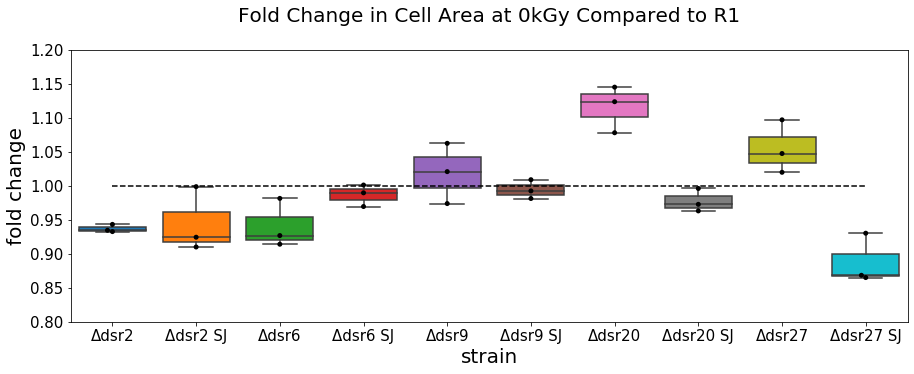

In [201]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_dsr2_r1_0k_list,CA_07182024_dsr2_r1_0k_list,
                       CA_04292024_dsr6_r1_0k_list,CA_07182024_dsr6_r1_0k_list,
                       CA_05062024_dsr9_r1_0k_list,CA_07182024_dsr9_r1_0k_list,
                       CA_05062024_dsr20_r1_0k_list,CA_07182024_dsr20_r1_0k_list,
                       CA_03142024_dsr27_r1_0k_list,CA_07182024_dsr27_r1_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_03142024_dsr2_r1_0k_list,CA_07182024_dsr2_r1_0k_list,
                       CA_04292024_dsr6_r1_0k_list,CA_07182024_dsr6_r1_0k_list,
                       CA_05062024_dsr9_r1_0k_list,CA_07182024_dsr9_r1_0k_list,
                       CA_05062024_dsr20_r1_0k_list,CA_07182024_dsr20_r1_0k_list,
                       CA_03142024_dsr27_r1_0k_list,CA_07182024_dsr27_r1_0k_list], color="black")

plt.title("Fold Change in Cell Area at 0kGy Compared to R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr2 SJ", "\u0394dsr6", "\u0394dsr6 SJ","\u0394dsr9", 
                    "\u0394dsr9 SJ", "\u0394dsr20","\u0394dsr20 SJ","\u0394dsr27",
                    "\u0394dsr27 SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.8,1.2])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(CA_03142024_dsr2_r1_0k_list,CA_07182024_dsr2_r1_0k_list,
                       CA_04292024_dsr6_r1_0k_list,CA_07182024_dsr6_r1_0k_list,
                       CA_05062024_dsr9_r1_0k_list,CA_07182024_dsr9_r1_0k_list,
                       CA_05062024_dsr20_r1_0k_list,CA_07182024_dsr20_r1_0k_list,
                       CA_03142024_dsr27_r1_0k_list,CA_07182024_dsr27_r1_0k_list))

CA_03142024_r1_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Cell_Area (pixels)"]
CA_05062024_r1_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["Cell_Area (pixels)"]
CA_04292024_r1_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["Cell_Area (pixels)"]
CA_07182024_r1_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["Cell_Area (pixels)"]
CA_03142024_dsr2_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["Cell_Area (pixels)"]
CA_07182024_dsr2_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["Cell_Area (pixels)"]
CA_04292024_dsr6_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["Cell_Area (pixels)"]
CA_07182024_dsr6_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["Cell_Area (pixels)"]
CA_05062024_dsr9_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["Cell_Area (pixels)"]
CA_07182024_dsr9_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["Cell_Area (pixels)"]
CA_05062024_dsr20_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["Cell_Area (pixels)"]
CA_07182024_dsr20_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["Cell_Area (pixels)"]
CA_03142024_dsr27_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["Cell_Area (pixels)"]
CA_07182024_dsr27_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["Cell_Area (pixels)"]

print('CA dsr2 0k',stats.ttest_ind(a=CA_03142024_dsr2_r1_0k_list, b=CA_03142024_r1_0k_list, equal_var=False))
print('CA dsr2 sj 0k',stats.ttest_ind(a=CA_07182024_dsr2_0k_list, b=CA_07182024_r1_0k_list, equal_var=False))
print('CA dsr6 0k',stats.ttest_ind(a=CA_04292024_dsr6_0k_list, b=CA_04292024_r1_0k_list, equal_var=False))
print('CA dsr6 sj 0k',stats.ttest_ind(a=CA_07182024_dsr6_0k_list, b=CA_07182024_r1_0k_list, equal_var=False))
print('CA dsr9 0k',stats.ttest_ind(a=CA_05062024_dsr9_0k_list, b=CA_05062024_r1_0k_list, equal_var=False))
print('CA dsr9 sj 0k',stats.ttest_ind(a=CA_07182024_dsr9_0k_list, b=CA_07182024_r1_0k_list, equal_var=False))
print('CA dsr20 0k',stats.ttest_ind(a=CA_05062024_dsr20_0k_list, b=CA_05062024_r1_0k_list, equal_var=False))
print('CA dsr20 sj 0k',stats.ttest_ind(a=CA_07182024_dsr20_0k_list, b=CA_07182024_r1_0k_list, equal_var=False))
print('CA dsr27 0k',stats.ttest_ind(a=CA_03142024_dsr27_0k_list, b=CA_03142024_r1_0k_list, equal_var=False))
print('CA dsr27 sj 0k',stats.ttest_ind(a=CA_07182024_dsr27_0k_list, b=CA_07182024_r1_0k_list, equal_var=False))

print('CA dsr2 tt',stats.ttest_ind(a=CA_04292024_dsr6_r1_0k_list, b=CA_07182024_dsr2_r1_0k_list, equal_var=False))

print('CA dsr6 tt',stats.ttest_ind(a=CA_04292024_dsr6_r1_0k_list, b=CA_07182024_dsr6_r1_0k_list, equal_var=False))

print('CA dsr9 tt',stats.ttest_ind(a=CA_05062024_dsr9_r1_0k_list, b=CA_07182024_dsr9_r1_0k_list, equal_var=False))

print('CA dsr20 tt',stats.ttest_ind(a=CA_05062024_dsr20_r1_0k_list, b=CA_07182024_dsr20_r1_0k_list, equal_var=False))

print('CA dsr27 tt',stats.ttest_ind(a=CA_03142024_dsr27_r1_0k_list, b=CA_07182024_dsr27_r1_0k_list, equal_var=False))


anova F_onewayResult(statistic=50.35093298389866, pvalue=8.684778547100044e-12)
CA dsr2 10k Ttest_indResult(statistic=-23.158560755185903, pvalue=4.302907563792606e-115)
CA dsr2 sj 10k Ttest_indResult(statistic=-32.82395619310535, pvalue=2.1644838639199747e-224)
CA dsr6 10k Ttest_indResult(statistic=7.709030241319591, pvalue=1.3958840296768739e-14)
CA dsr6 sj 10k Ttest_indResult(statistic=-4.8846824778347155, pvalue=1.0503096004478553e-06)
CA dsr9 10k Ttest_indResult(statistic=30.200664301546716, pvalue=6.519914981230247e-168)
CA dsr9 sj 10k Ttest_indResult(statistic=3.2186141196246214, pvalue=0.0012915935786272056)
CA dsr20 10k Ttest_indResult(statistic=39.068417244199274, pvalue=7.918138215324646e-290)
CA dsr20 sj 10k Ttest_indResult(statistic=0.8036186755505903, pvalue=0.42163354877950887)
CA dsr27 10k Ttest_indResult(statistic=-7.37318239888652, pvalue=4.955336794728212e-13)
CA dsr27 sj 10k Ttest_indResult(statistic=-30.160194693647217, pvalue=4.631488338627141e-191)
CA dsr2 tt Tte

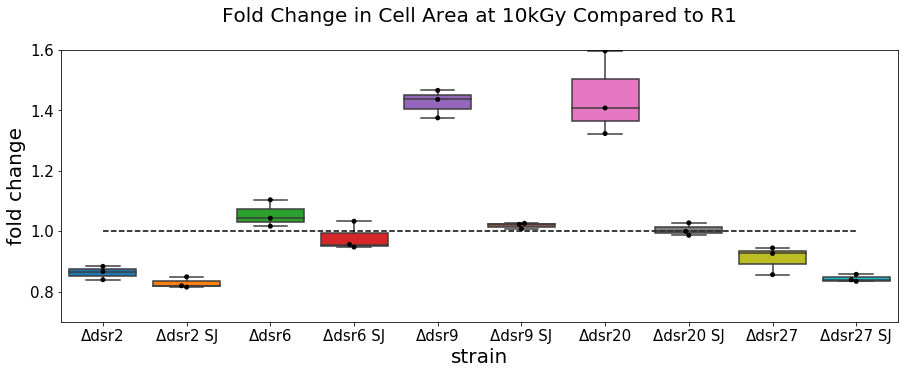

In [18]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_dsr2_r1_10k_list,CA_07182024_dsr2_r1_10k_list,
                       CA_04292024_dsr6_r1_10k_list,CA_07182024_dsr6_r1_10k_list,
                       CA_05062024_dsr9_r1_10k_list,CA_07182024_dsr9_r1_10k_list,
                       CA_05062024_dsr20_r1_10k_list,CA_07182024_dsr20_r1_10k_list,
                       CA_03142024_dsr27_r1_10k_list,CA_07182024_dsr27_r1_10k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_03142024_dsr2_r1_10k_list,CA_07182024_dsr2_r1_10k_list,
                       CA_04292024_dsr6_r1_10k_list,CA_07182024_dsr6_r1_10k_list,
                       CA_05062024_dsr9_r1_10k_list,CA_07182024_dsr9_r1_10k_list,
                       CA_05062024_dsr20_r1_10k_list,CA_07182024_dsr20_r1_10k_list,
                       CA_03142024_dsr27_r1_10k_list,CA_07182024_dsr27_r1_10k_list], color="black")

plt.title("Fold Change in Cell Area at 10kGy Compared to R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr2 SJ", "\u0394dsr6", "\u0394dsr6 SJ","\u0394dsr9", 
                    "\u0394dsr9 SJ", "\u0394dsr20","\u0394dsr20 SJ","\u0394dsr27",
                    "\u0394dsr27 SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.7,1.6])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(CA_03142024_dsr2_r1_10k_list,CA_07182024_dsr2_r1_10k_list,
                       CA_04292024_dsr6_r1_10k_list,CA_07182024_dsr6_r1_10k_list,
                       CA_05062024_dsr9_r1_10k_list,CA_07182024_dsr9_r1_10k_list,
                       CA_05062024_dsr20_r1_10k_list,CA_07182024_dsr20_r1_10k_list,
                       CA_03142024_dsr27_r1_10k_list,CA_07182024_dsr27_r1_10k_list))

CA_03142024_r1_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Cell_Area (pixels)"]
CA_05062024_r1_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["Cell_Area (pixels)"]
CA_04292024_r1_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["Cell_Area (pixels)"]
CA_07182024_r1_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["Cell_Area (pixels)"]
CA_03142024_dsr2_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["Cell_Area (pixels)"]
CA_07182024_dsr2_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["Cell_Area (pixels)"]
CA_04292024_dsr6_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["Cell_Area (pixels)"]
CA_07182024_dsr6_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["Cell_Area (pixels)"]
CA_05062024_dsr9_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["Cell_Area (pixels)"]
CA_07182024_dsr9_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["Cell_Area (pixels)"]
CA_05062024_dsr20_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["Cell_Area (pixels)"]
CA_07182024_dsr20_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["Cell_Area (pixels)"]
CA_03142024_dsr27_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["Cell_Area (pixels)"]
CA_07182024_dsr27_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["Cell_Area (pixels)"]

print('CA dsr2 10k',stats.ttest_ind(a=CA_03142024_dsr2_10k_list, b=CA_03142024_r1_10k_list, equal_var=False))
print('CA dsr2 sj 10k',stats.ttest_ind(a=CA_07182024_dsr2_10k_list, b=CA_07182024_r1_10k_list, equal_var=False))
print('CA dsr6 10k',stats.ttest_ind(a=CA_04292024_dsr6_10k_list, b=CA_04292024_r1_10k_list, equal_var=False))
print('CA dsr6 sj 10k',stats.ttest_ind(a=CA_07182024_dsr6_10k_list, b=CA_07182024_r1_10k_list, equal_var=False))
print('CA dsr9 10k',stats.ttest_ind(a=CA_05062024_dsr9_10k_list, b=CA_05062024_r1_10k_list, equal_var=False))
print('CA dsr9 sj 10k',stats.ttest_ind(a=CA_07182024_dsr9_10k_list, b=CA_07182024_r1_10k_list, equal_var=False))
print('CA dsr20 10k',stats.ttest_ind(a=CA_05062024_dsr20_10k_list, b=CA_05062024_r1_10k_list, equal_var=False))
print('CA dsr20 sj 10k',stats.ttest_ind(a=CA_07182024_dsr20_10k_list, b=CA_07182024_r1_10k_list, equal_var=False))
print('CA dsr27 10k',stats.ttest_ind(a=CA_03142024_dsr27_10k_list, b=CA_03142024_r1_10k_list, equal_var=False))
print('CA dsr27 sj 10k',stats.ttest_ind(a=CA_07182024_dsr27_10k_list, b=CA_07182024_r1_10k_list, equal_var=False))

print('CA dsr2 tt',stats.ttest_ind(a=CA_03142024_dsr2_r1_10k_list, b=CA_07182024_dsr2_r1_10k_list, equal_var=False))
print('CA dsr6 tt',stats.ttest_ind(a=CA_04292024_dsr6_r1_10k_list, b=CA_07182024_dsr6_r1_10k_list, equal_var=False))
print('CA dsr9 tt',stats.ttest_ind(a=CA_05062024_dsr9_r1_10k_list, b=CA_07182024_dsr9_r1_10k_list, equal_var=False))
print('CA dsr20 tt',stats.ttest_ind(a=CA_05062024_dsr20_r1_10k_list, b=CA_07182024_dsr20_r1_10k_list, equal_var=False))
print('CA dsr27 tt',stats.ttest_ind(a=CA_03142024_dsr27_r1_10k_list, b=CA_07182024_dsr27_r1_10k_list, equal_var=False))


anova F_onewayResult(statistic=15.591854011773176, pvalue=3.27794839863187e-07)
CA dsr2 Ttest_indResult(statistic=13.114522648817879, pvalue=8.922617504569512e-39)
CA dsr2 sj Ttest_indResult(statistic=6.987450726915565, pvalue=2.9053924185968334e-12)
CA dsr6 Ttest_indResult(statistic=24.7701545270665, pvalue=6.203058428529643e-131)
CA dsr6 sj Ttest_indResult(statistic=28.128155839602833, pvalue=1.2721835006101425e-170)
CA dsr9 Ttest_indResult(statistic=28.84492790728418, pvalue=8.071439785774534e-159)
CA dsr9 sj Ttest_indResult(statistic=34.08452949528942, pvalue=1.3331868165938566e-245)
CA dsr20 Ttest_indResult(statistic=27.53272301748769, pvalue=1.7057743994691986e-156)
CA dsr20 sj Ttest_indResult(statistic=33.31604358670968, pvalue=2.0548032756022185e-235)
CA dsr27 Ttest_indResult(statistic=0.6694942515478063, pvalue=0.5035305952264184)
CA dsr27 sj Ttest_indResult(statistic=22.940413192351013, pvalue=2.562281908138134e-114)
CA dsr2 Ttest_indResult(statistic=3.264783206002379, pvalue

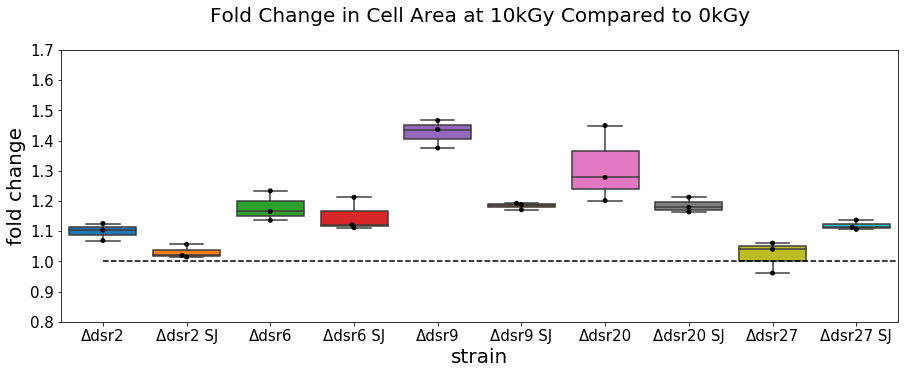

In [20]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_dsr2_10k_0k_list,CA_07182024_dsr2_10k_0k_list,
                       CA_04292024_dsr6_10k_0k_list,CA_07182024_dsr6_10k_0k_list,
                       CA_05062024_dsr9_10k_0k_list,CA_07182024_dsr9_10k_0k_list,
                       CA_05062024_dsr20_10k_0k_list,CA_07182024_dsr20_10k_0k_list,
                       CA_03142024_dsr27_10k_0k_list,CA_07182024_dsr27_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_03142024_dsr2_10k_0k_list,CA_07182024_dsr2_10k_0k_list,
                       CA_04292024_dsr6_10k_0k_list,CA_07182024_dsr6_10k_0k_list,
                       CA_05062024_dsr9_10k_0k_list,CA_07182024_dsr9_10k_0k_list,
                       CA_05062024_dsr20_10k_0k_list,CA_07182024_dsr20_10k_0k_list,
                       CA_03142024_dsr27_10k_0k_list,CA_07182024_dsr27_10k_0k_list], color="black")

plt.title("Fold Change in Cell Area at 10kGy Compared to 0kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr2 SJ", "\u0394dsr6", "\u0394dsr6 SJ","\u0394dsr9", 
                    "\u0394dsr9 SJ", "\u0394dsr20","\u0394dsr20 SJ","\u0394dsr27",
                    "\u0394dsr27 SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.8,1.7])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(CA_03142024_dsr2_10k_0k_list,CA_07182024_dsr2_10k_0k_list,
                       CA_04292024_dsr6_10k_0k_list,CA_07182024_dsr6_10k_0k_list,
                       CA_05062024_dsr9_10k_0k_list,CA_07182024_dsr9_10k_0k_list,
                       CA_05062024_dsr20_10k_0k_list,CA_07182024_dsr20_10k_0k_list,
                       CA_03142024_dsr27_10k_0k_list,CA_07182024_dsr27_10k_0k_list))

CA_03142024_dsr2_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["Cell_Area (pixels)"]
CA_07182024_dsr2_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["Cell_Area (pixels)"]
CA_04292024_dsr6_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["Cell_Area (pixels)"]
CA_07182024_dsr6_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["Cell_Area (pixels)"]
CA_05062024_dsr9_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["Cell_Area (pixels)"]
CA_07182024_dsr9_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["Cell_Area (pixels)"]
CA_05062024_dsr20_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["Cell_Area (pixels)"]
CA_07182024_dsr20_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["Cell_Area (pixels)"]
CA_03142024_dsr27_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["Cell_Area (pixels)"]
CA_07182024_dsr27_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["Cell_Area (pixels)"]
CA_03142024_dsr2_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["Cell_Area (pixels)"]
CA_07182024_dsr2_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["Cell_Area (pixels)"]
CA_04292024_dsr6_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["Cell_Area (pixels)"]
CA_07182024_dsr6_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["Cell_Area (pixels)"]
CA_05062024_dsr9_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["Cell_Area (pixels)"]
CA_07182024_dsr9_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["Cell_Area (pixels)"]
CA_05062024_dsr20_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["Cell_Area (pixels)"]
CA_07182024_dsr20_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["Cell_Area (pixels)"]
CA_03142024_dsr27_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["Cell_Area (pixels)"]
CA_07182024_dsr27_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["Cell_Area (pixels)"]

print('CA dsr2',stats.ttest_ind(a=CA_03142024_dsr2_10k_list, b=CA_03142024_dsr2_0k_list, equal_var=False))
print('CA dsr2 sj',stats.ttest_ind(a=CA_07182024_dsr2_10k_list, b=CA_07182024_dsr2_0k_list, equal_var=False))
print('CA dsr6',stats.ttest_ind(a=CA_04292024_dsr6_10k_list, b=CA_04292024_dsr6_0k_list, equal_var=False))
print('CA dsr6 sj',stats.ttest_ind(a=CA_07182024_dsr6_10k_list, b=CA_07182024_dsr6_0k_list, equal_var=False))
print('CA dsr9',stats.ttest_ind(a=CA_05062024_dsr9_10k_list, b=CA_05062024_dsr9_0k_list, equal_var=False))
print('CA dsr9 sj',stats.ttest_ind(a=CA_07182024_dsr9_10k_list, b=CA_07182024_dsr9_0k_list, equal_var=False))
print('CA dsr20',stats.ttest_ind(a=CA_05062024_dsr20_10k_list, b=CA_05062024_dsr20_0k_list, equal_var=False))
print('CA dsr20 sj',stats.ttest_ind(a=CA_07182024_dsr20_10k_list, b=CA_07182024_dsr20_0k_list, equal_var=False))
print('CA dsr27',stats.ttest_ind(a=CA_03142024_dsr27_10k_list, b=CA_03142024_dsr27_0k_list, equal_var=False))
print('CA dsr27 sj',stats.ttest_ind(a=CA_07182024_dsr27_10k_list, b=CA_07182024_dsr27_0k_list, equal_var=False))

print('CA dsr2',stats.ttest_ind(a=CA_03142024_dsr2_10k_0k_list, b=CA_07182024_dsr2_10k_0k_list, equal_var=False))
print('CA dsr2 B-me 0',stats.ttest_ind(a=CA_03142024_dsr2_0k_list, b=CA_07182024_dsr2_0k_list, equal_var=False))
print('CA dsr2 B-me 10',stats.ttest_ind(a=CA_03142024_dsr2_10k_list, b=CA_07182024_dsr2_10k_list, equal_var=False))
print('CA dsr6',stats.ttest_ind(a=CA_04292024_dsr6_10k_0k_list, b=CA_07182024_dsr6_10k_0k_list, equal_var=False))
print('CA dsr6 B-me 0',stats.ttest_ind(a=CA_04292024_dsr6_0k_list, b=CA_07182024_dsr6_0k_list, equal_var=False))
print('CA dsr6 B-me 10',stats.ttest_ind(a=CA_04292024_dsr6_10k_list, b=CA_07182024_dsr6_10k_list, equal_var=False))
print('CA dsr9',stats.ttest_ind(a=CA_05062024_dsr9_10k_0k_list, b=CA_07182024_dsr9_10k_0k_list, equal_var=False))
print('CA dsr9 B-me 0',stats.ttest_ind(a=CA_05062024_dsr9_0k_list, b=CA_07182024_dsr9_0k_list, equal_var=False))
print('CA dsr9 B-me 10',stats.ttest_ind(a=CA_05062024_dsr9_10k_list, b=CA_07182024_dsr9_10k_list, equal_var=False))
print('CA dsr20',stats.ttest_ind(a=CA_05062024_dsr20_10k_0k_list, b=CA_07182024_dsr20_10k_0k_list, equal_var=False))
print('CA dsr20 B-me 0',stats.ttest_ind(a=CA_05062024_dsr20_0k_list, b=CA_07182024_dsr20_0k_list, equal_var=False))
print('CA dsr20 B-me 10',stats.ttest_ind(a=CA_05062024_dsr20_10k_list, b=CA_07182024_dsr20_10k_list, equal_var=False))
print('CA dsr27',stats.ttest_ind(a=CA_03142024_dsr27_10k_0k_list, b=CA_07182024_dsr27_10k_0k_list, equal_var=False))
print('CA dsr27 B-me 0',stats.ttest_ind(a=CA_03142024_dsr27_0k_list, b=CA_07182024_dsr27_0k_list, equal_var=False))
print('CA dsr27 B-me 10',stats.ttest_ind(a=CA_03142024_dsr27_10k_list, b=CA_07182024_dsr27_10k_list, equal_var=False))


anova F_onewayResult(statistic=3.9413073931712628, pvalue=0.05364806710488637)
CA r1 3/14 Ttest_indResult(statistic=31.384970339350744, pvalue=1.9089386045821937e-207)
CA r1 4/29 Ttest_indResult(statistic=8.454871719418133, pvalue=3.0610608033023744e-17)
CA r1 5/06 Ttest_indResult(statistic=5.500266382936765, pvalue=3.899040575890986e-08)
CA r1 7/18 Ttest_indResult(statistic=26.05060270714946, pvalue=7.007629643011793e-145)
mar-apr Ttest_indResult(statistic=5.788423242595735, pvalue=0.019307349692650782)
mar-may Ttest_indResult(statistic=2.2873861690921444, pvalue=0.11796090703576104)
mar-jul Ttest_indResult(statistic=0.5234607352905989, pvalue=0.6358056466327042)
apr-may Ttest_indResult(statistic=0.008138376904575364, pvalue=0.9942263796651325)
apr-jul Ttest_indResult(statistic=-2.6711346675495435, pvalue=0.1100412047299827)
may-jul Ttest_indResult(statistic=-1.6239806426603238, pvalue=0.18547627331576)


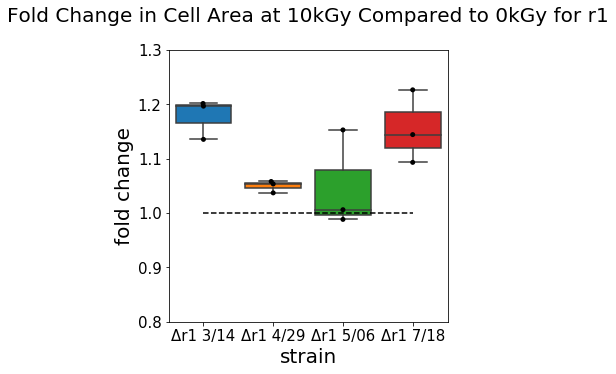

In [21]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_r1_10k_0k_list, CA_04292024_r1_10k_0k_list, CA_05062024_r1_10k_0k_list,
                      CA_07182024_r1_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_03142024_r1_10k_0k_list, CA_04292024_r1_10k_0k_list, CA_05062024_r1_10k_0k_list,
                        CA_07182024_r1_10k_0k_list], color="black")

plt.title("Fold Change in Cell Area at 10kGy Compared to 0kGy for r1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394r1 3/14", "\u0394r1 4/29", "\u0394r1 5/06","\u0394r1 7/18"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1], "--", color = "black")
plt.ylim([0.8,1.3])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(CA_03142024_r1_10k_0k_list, CA_04292024_r1_10k_0k_list, CA_05062024_r1_10k_0k_list,
                            CA_07182024_r1_10k_0k_list))

CA_03142024_r1_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Cell_Area (pixels)"]
CA_05062024_r1_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["Cell_Area (pixels)"]
CA_04292024_r1_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["Cell_Area (pixels)"]
CA_07182024_r1_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["Cell_Area (pixels)"]
CA_03142024_r1_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Cell_Area (pixels)"]
CA_05062024_r1_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["Cell_Area (pixels)"]
CA_04292024_r1_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["Cell_Area (pixels)"]
CA_07182024_r1_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["Cell_Area (pixels)"]

print('CA r1 3/14',stats.ttest_ind(a=CA_03142024_r1_10k_list, b=CA_03142024_r1_0k_list, equal_var=False))
print('CA r1 4/29',stats.ttest_ind(a=CA_04292024_r1_10k_list, b=CA_04292024_r1_0k_list, equal_var=False))
print('CA r1 5/06',stats.ttest_ind(a=CA_05062024_r1_10k_list, b=CA_05062024_r1_0k_list, equal_var=False))
print('CA r1 7/18',stats.ttest_ind(a=CA_07182024_r1_10k_list, b=CA_07182024_r1_0k_list, equal_var=False))

print('mar-apr',stats.ttest_ind(a=CA_03142024_r1_10k_0k_list, b=CA_04292024_r1_10k_0k_list, equal_var=False))
print('mar-may',stats.ttest_ind(a=CA_03142024_r1_10k_0k_list, b=CA_05062024_r1_10k_0k_list, equal_var=False))
print('mar-jul',stats.ttest_ind(a=CA_03142024_r1_10k_0k_list, b=CA_07182024_r1_10k_0k_list, equal_var=False))
print('apr-may',stats.ttest_ind(a=CA_04292024_r1_10k_0k_list, b=CA_05062024_r1_10k_0k_list, equal_var=False))
print('apr-jul',stats.ttest_ind(a=CA_04292024_r1_10k_0k_list, b=CA_07182024_r1_10k_0k_list, equal_var=False))
print('may-jul',stats.ttest_ind(a=CA_05062024_r1_10k_0k_list, b=CA_07182024_r1_10k_0k_list, equal_var=False))

anova F_onewayResult(statistic=16.360539363936127, pvalue=2.188417861422232e-07)
NA dsr2 0k Ttest_indResult(statistic=-18.115683758501465, pvalue=1.3852790686033852e-71)
NA dsr2 sj 0k Ttest_indResult(statistic=-21.632905211344713, pvalue=1.6923182796380544e-102)
NA dsr6 0k Ttest_indResult(statistic=2.935719353443186, pvalue=0.003332933123288676)
NA dsr6 sj 0k Ttest_indResult(statistic=2.187802289779231, pvalue=0.028695689059297882)
NA dsr9 0k Ttest_indResult(statistic=1.068728262253086, pvalue=0.2852309921982751)
NA dsr9 sj 0k Ttest_indResult(statistic=4.3888118760844455, pvalue=1.1456282229102495e-05)
NA dsr20 0k Ttest_indResult(statistic=8.205341905258042, pvalue=2.784201530442214e-16)
NA dsr20 sj 0k Ttest_indResult(statistic=-9.564995604680968, pvalue=1.2635912406574456e-21)
NA dsr27 0k Ttest_indResult(statistic=-11.980341061483205, pvalue=1.3497311027776044e-26)
NA dsr27 sj 0k Ttest_indResult(statistic=-37.67806076722991, pvalue=1.1065231883284803e-297)
NA dsr2 0k Ttest_indResult(s

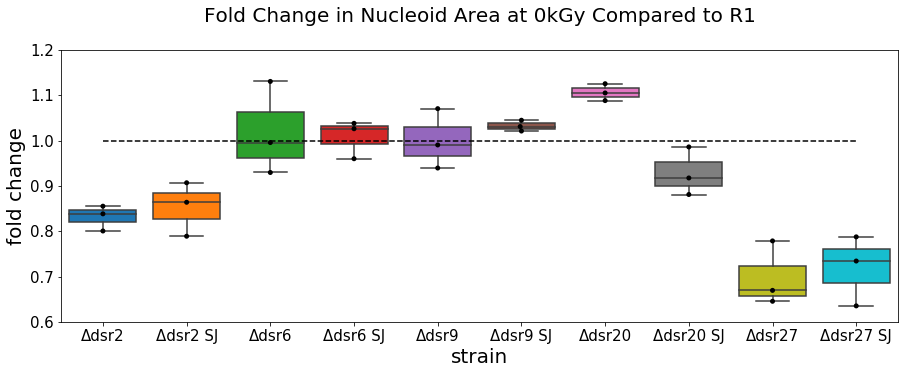

In [22]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[NA_03142024_dsr2_r1_0k_list,NA_07182024_dsr2_r1_0k_list,
                       NA_04292024_dsr6_r1_0k_list,NA_07182024_dsr6_r1_0k_list,
                       NA_05062024_dsr9_r1_0k_list,NA_07182024_dsr9_r1_0k_list,
                       NA_05062024_dsr20_r1_0k_list,NA_07182024_dsr20_r1_0k_list,
                       NA_03142024_dsr27_r1_0k_list,NA_07182024_dsr27_r1_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NA_03142024_dsr2_r1_0k_list,NA_07182024_dsr2_r1_0k_list,
                       NA_04292024_dsr6_r1_0k_list,NA_07182024_dsr6_r1_0k_list,
                       NA_05062024_dsr9_r1_0k_list,NA_07182024_dsr9_r1_0k_list,
                       NA_05062024_dsr20_r1_0k_list,NA_07182024_dsr20_r1_0k_list,
                       NA_03142024_dsr27_r1_0k_list,NA_07182024_dsr27_r1_0k_list], color="black")

plt.title("Fold Change in Nucleoid Area at 0kGy Compared to R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr2 SJ", "\u0394dsr6", "\u0394dsr6 SJ","\u0394dsr9", 
                    "\u0394dsr9 SJ", "\u0394dsr20","\u0394dsr20 SJ","\u0394dsr27",
                    "\u0394dsr27 SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.6,1.2])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(NA_03142024_dsr2_r1_0k_list,NA_07182024_dsr2_r1_0k_list,
                       NA_04292024_dsr6_r1_0k_list,NA_07182024_dsr6_r1_0k_list,
                       NA_05062024_dsr9_r1_0k_list,NA_07182024_dsr9_r1_0k_list,
                       NA_05062024_dsr20_r1_0k_list,NA_07182024_dsr20_r1_0k_list,
                       NA_03142024_dsr27_r1_0k_list,NA_07182024_dsr27_r1_0k_list))

NA_03142024_r1_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Nuclear_Area (pixels)"]
NA_05062024_r1_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["Nuclear_Area (pixels)"]
NA_04292024_r1_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["Nuclear_Area (pixels)"]
NA_07182024_r1_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["Nuclear_Area (pixels)"]
NA_03142024_dsr2_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["Nuclear_Area (pixels)"]
NA_07182024_dsr2_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["Nuclear_Area (pixels)"]
NA_04292024_dsr6_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["Nuclear_Area (pixels)"]
NA_07182024_dsr6_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["Nuclear_Area (pixels)"]
NA_05062024_dsr9_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["Nuclear_Area (pixels)"]
NA_07182024_dsr9_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["Nuclear_Area (pixels)"]
NA_05062024_dsr20_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["Nuclear_Area (pixels)"]
NA_07182024_dsr20_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["Nuclear_Area (pixels)"]
NA_03142024_dsr27_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["Nuclear_Area (pixels)"]
NA_07182024_dsr27_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["Nuclear_Area (pixels)"]

print('NA dsr2 0k',stats.ttest_ind(a=NA_03142024_dsr2_0k_list, b=NA_03142024_r1_0k_list, equal_var=False))
print('NA dsr2 sj 0k',stats.ttest_ind(a=NA_07182024_dsr2_0k_list, b=NA_07182024_r1_0k_list, equal_var=False))
print('NA dsr6 0k',stats.ttest_ind(a=NA_04292024_dsr6_0k_list, b=NA_04292024_r1_0k_list, equal_var=False))
print('NA dsr6 sj 0k',stats.ttest_ind(a=NA_07182024_dsr6_0k_list, b=NA_07182024_r1_0k_list, equal_var=False))
print('NA dsr9 0k',stats.ttest_ind(a=NA_05062024_dsr9_0k_list, b=NA_05062024_r1_0k_list, equal_var=False))
print('NA dsr9 sj 0k',stats.ttest_ind(a=NA_07182024_dsr9_0k_list, b=NA_07182024_r1_0k_list, equal_var=False))
print('NA dsr20 0k',stats.ttest_ind(a=NA_05062024_dsr20_0k_list, b=NA_05062024_r1_0k_list, equal_var=False))
print('NA dsr20 sj 0k',stats.ttest_ind(a=NA_07182024_dsr20_0k_list, b=NA_07182024_r1_0k_list, equal_var=False))
print('NA dsr27 0k',stats.ttest_ind(a=NA_03142024_dsr27_0k_list, b=NA_03142024_r1_0k_list, equal_var=False))
print('NA dsr27 sj 0k',stats.ttest_ind(a=NA_07182024_dsr27_0k_list, b=NA_07182024_r1_0k_list, equal_var=False))

print('NA dsr2 0k',stats.ttest_ind(a=NA_03142024_dsr2_r1_0k_list, b=NA_07182024_dsr2_r1_0k_list, equal_var=False))
print('NA dsr6 0k',stats.ttest_ind(a=NA_04292024_dsr6_r1_0k_list, b=NA_07182024_dsr6_r1_0k_list, equal_var=False))
print('NA dsr9 0k',stats.ttest_ind(a=NA_05062024_dsr9_r1_0k_list, b=NA_07182024_dsr9_r1_0k_list, equal_var=False))
print('NA dsr20 0k',stats.ttest_ind(a=NA_05062024_dsr20_r1_0k_list, b=NA_07182024_dsr20_r1_0k_list, equal_var=False))
print('NA dsr27 0k',stats.ttest_ind(a=NA_03142024_dsr27_r1_0k_list, b=NA_07182024_dsr27_r1_0k_list, equal_var=False))


anova F_onewayResult(statistic=47.05888916932335, pvalue=1.6426109618437366e-11)
NA dsr2 10k Ttest_indResult(statistic=-21.4645493078785, pvalue=1.2066450280721696e-99)
NA dsr2 sj 10k Ttest_indResult(statistic=-21.740888629116178, pvalue=2.2433461505099313e-102)
NA dsr6 10k Ttest_indResult(statistic=-9.416183022812293, pvalue=5.609087961701237e-21)
NA dsr6 sj 10k Ttest_indResult(statistic=4.5074244284543274, pvalue=6.622967720563228e-06)
NA dsr9 10k Ttest_indResult(statistic=20.16266409478827, pvalue=1.2118315988974388e-83)
NA dsr9 sj 10k Ttest_indResult(statistic=11.290719736998653, pvalue=1.9947581890110233e-29)
NA dsr20 10k Ttest_indResult(statistic=39.47450752958772, pvalue=2.1262710192503508e-291)
NA dsr20 sj 10k Ttest_indResult(statistic=10.655640142687522, pvalue=2.094172838743109e-26)
NA dsr27 10k Ttest_indResult(statistic=-24.770439256018754, pvalue=1.0387126021385243e-101)
NA dsr27 sj 10k Ttest_indResult(statistic=-16.558379400377515, pvalue=9.636767438230458e-61)
NA dsr2 10k

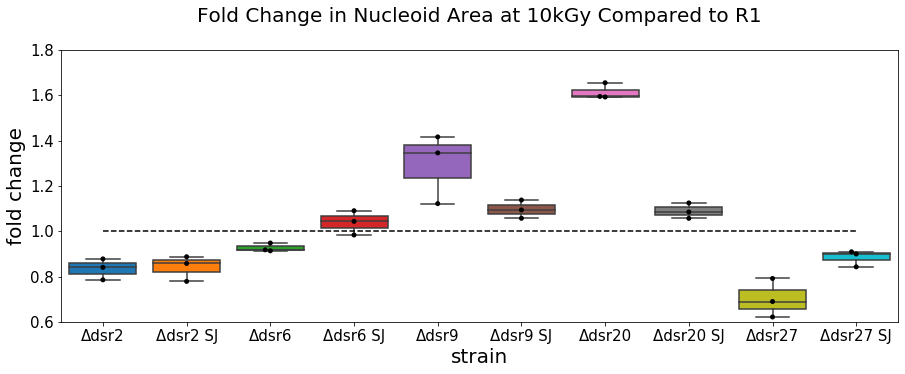

In [23]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[NA_03142024_dsr2_r1_10k_list,NA_07182024_dsr2_r1_10k_list,
                       NA_04292024_dsr6_r1_10k_list,NA_07182024_dsr6_r1_10k_list,
                       NA_05062024_dsr9_r1_10k_list,NA_07182024_dsr9_r1_10k_list,
                       NA_05062024_dsr20_r1_10k_list,NA_07182024_dsr20_r1_10k_list,
                       NA_03142024_dsr27_r1_10k_list,NA_07182024_dsr27_r1_10k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NA_03142024_dsr2_r1_10k_list,NA_07182024_dsr2_r1_10k_list,
                       NA_04292024_dsr6_r1_10k_list,NA_07182024_dsr6_r1_10k_list,
                       NA_05062024_dsr9_r1_10k_list,NA_07182024_dsr9_r1_10k_list,
                       NA_05062024_dsr20_r1_10k_list,NA_07182024_dsr20_r1_10k_list,
                       NA_03142024_dsr27_r1_10k_list,NA_07182024_dsr27_r1_10k_list], color="black")

plt.title("Fold Change in Nucleoid Area at 10kGy Compared to R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr2 SJ", "\u0394dsr6", "\u0394dsr6 SJ","\u0394dsr9", 
                    "\u0394dsr9 SJ", "\u0394dsr20","\u0394dsr20 SJ","\u0394dsr27",
                    "\u0394dsr27 SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.6,1.8])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(NA_03142024_dsr2_r1_10k_list,NA_07182024_dsr2_r1_10k_list,
                       NA_04292024_dsr6_r1_10k_list,NA_07182024_dsr6_r1_10k_list,
                       NA_05062024_dsr9_r1_10k_list,NA_07182024_dsr9_r1_10k_list,
                       NA_05062024_dsr20_r1_10k_list,NA_07182024_dsr20_r1_10k_list,
                       NA_03142024_dsr27_r1_10k_list,NA_07182024_dsr27_r1_10k_list))

NA_03142024_r1_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Nuclear_Area (pixels)"]
NA_05062024_r1_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["Nuclear_Area (pixels)"]
NA_04292024_r1_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["Nuclear_Area (pixels)"]
NA_07182024_r1_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["Nuclear_Area (pixels)"]
NA_03142024_dsr2_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["Nuclear_Area (pixels)"]
NA_07182024_dsr2_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["Nuclear_Area (pixels)"]
NA_04292024_dsr6_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["Nuclear_Area (pixels)"]
NA_07182024_dsr6_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["Nuclear_Area (pixels)"]
NA_05062024_dsr9_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["Nuclear_Area (pixels)"]
NA_07182024_dsr9_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["Nuclear_Area (pixels)"]
NA_05062024_dsr20_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["Nuclear_Area (pixels)"]
NA_07182024_dsr20_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["Nuclear_Area (pixels)"]
NA_03142024_dsr27_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["Nuclear_Area (pixels)"]
NA_07182024_dsr27_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["Nuclear_Area (pixels)"]

print('NA dsr2 10k',stats.ttest_ind(a=NA_03142024_dsr2_10k_list, b=NA_03142024_r1_10k_list, equal_var=False))
print('NA dsr2 sj 10k',stats.ttest_ind(a=NA_07182024_dsr2_10k_list, b=NA_07182024_r1_10k_list, equal_var=False))
print('NA dsr6 10k',stats.ttest_ind(a=NA_04292024_dsr6_10k_list, b=NA_04292024_r1_10k_list, equal_var=False))
print('NA dsr6 sj 10k',stats.ttest_ind(a=NA_07182024_dsr6_10k_list, b=NA_07182024_r1_10k_list, equal_var=False))
print('NA dsr9 10k',stats.ttest_ind(a=NA_05062024_dsr9_10k_list, b=NA_05062024_r1_10k_list, equal_var=False))
print('NA dsr9 sj 10k',stats.ttest_ind(a=NA_07182024_dsr9_10k_list, b=NA_07182024_r1_10k_list, equal_var=False))
print('NA dsr20 10k',stats.ttest_ind(a=NA_05062024_dsr20_10k_list, b=NA_05062024_r1_10k_list, equal_var=False))
print('NA dsr20 sj 10k',stats.ttest_ind(a=NA_07182024_dsr20_10k_list, b=NA_07182024_r1_10k_list, equal_var=False))
print('NA dsr27 10k',stats.ttest_ind(a=NA_03142024_dsr27_10k_list, b=NA_03142024_r1_10k_list, equal_var=False))
print('NA dsr27 sj 10k',stats.ttest_ind(a=NA_07182024_dsr27_10k_list, b=NA_07182024_r1_10k_list, equal_var=False))

print('NA dsr2 10k',stats.ttest_ind(a=NA_03142024_dsr2_r1_10k_list, b=NA_07182024_dsr2_r1_10k_list, equal_var=False))
print('NA dsr6 10k',stats.ttest_ind(a=NA_04292024_dsr6_r1_10k_list, b=NA_07182024_dsr6_r1_10k_list, equal_var=False))
print('NA dsr9 10k',stats.ttest_ind(a=NA_05062024_dsr9_r1_10k_list, b=NA_07182024_dsr9_r1_10k_list, equal_var=False))
print('NA dsr20 10k',stats.ttest_ind(a=NA_05062024_dsr20_r1_10k_list, b=NA_07182024_dsr20_r1_10k_list, equal_var=False))
print('NA dsr27 10k',stats.ttest_ind(a=NA_03142024_dsr27_r1_10k_list, b=NA_07182024_dsr27_r1_10k_list, equal_var=False))


anova F_onewayResult(statistic=8.185769840509524, pvalue=5.072016294918164e-05)
NA dsr2 Ttest_indResult(statistic=-10.129030347560494, pvalue=6.949145923420906e-24)
NA dsr2 sj Ttest_indResult(statistic=-23.875907451285084, pvalue=4.120558490686569e-124)
NA dsr6 Ttest_indResult(statistic=-23.503965715215447, pvalue=1.5543682797035066e-119)
NA dsr6 sj Ttest_indResult(statistic=-18.246326843042773, pvalue=9.610552453487434e-74)
NA dsr9 Ttest_indResult(statistic=1.6551032814980906, pvalue=0.09798938640642503)
NA dsr9 sj Ttest_indResult(statistic=-11.311762447175314, pvalue=1.4475476048180522e-29)
NA dsr20 Ttest_indResult(statistic=9.74927461178848, pvalue=2.6555381642625766e-22)
NA dsr20 sj Ttest_indResult(statistic=1.9475710569895228, pvalue=0.05148319594739629)
NA dsr27 Ttest_indResult(statistic=-4.59524170488414, pvalue=6.17986148987819e-06)
NA dsr27 sj Ttest_indResult(statistic=3.969315554770082, pvalue=7.249386436894376e-05)
NA dsr2 Ttest_indResult(statistic=0.99387559104379, pvalue=0

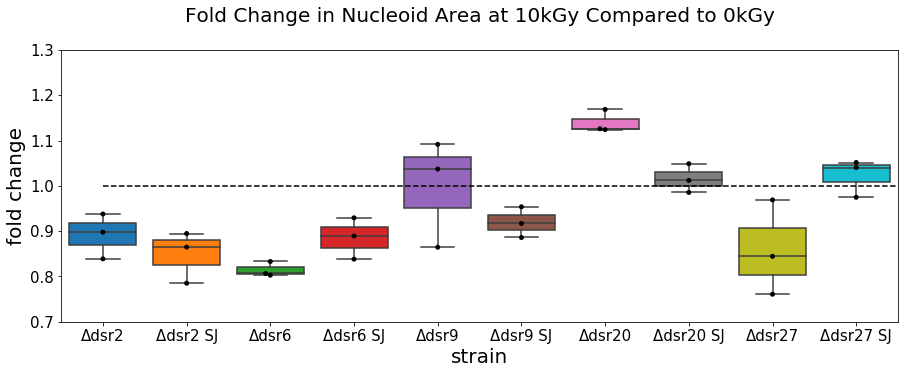

In [24]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[NA_03142024_dsr2_10k_0k_list,NA_07182024_dsr2_10k_0k_list,
                       NA_04292024_dsr6_10k_0k_list,NA_07182024_dsr6_10k_0k_list,
                       NA_05062024_dsr9_10k_0k_list,NA_07182024_dsr9_10k_0k_list,
                       NA_05062024_dsr20_10k_0k_list,NA_07182024_dsr20_10k_0k_list,
                       NA_03142024_dsr27_10k_0k_list,NA_07182024_dsr27_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NA_03142024_dsr2_10k_0k_list,NA_07182024_dsr2_10k_0k_list,
                       NA_04292024_dsr6_10k_0k_list,NA_07182024_dsr6_10k_0k_list,
                       NA_05062024_dsr9_10k_0k_list,NA_07182024_dsr9_10k_0k_list,
                       NA_05062024_dsr20_10k_0k_list,NA_07182024_dsr20_10k_0k_list,
                       NA_03142024_dsr27_10k_0k_list,NA_07182024_dsr27_10k_0k_list], color="black")

plt.title("Fold Change in Nucleoid Area at 10kGy Compared to 0kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr2 SJ", "\u0394dsr6", "\u0394dsr6 SJ","\u0394dsr9", 
                    "\u0394dsr9 SJ", "\u0394dsr20","\u0394dsr20 SJ","\u0394dsr27",
                    "\u0394dsr27 SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.7,1.3])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(NA_03142024_dsr2_10k_0k_list,NA_07182024_dsr2_10k_0k_list,
                       NA_04292024_dsr6_10k_0k_list,NA_07182024_dsr6_10k_0k_list,
                       NA_05062024_dsr9_10k_0k_list,NA_07182024_dsr9_10k_0k_list,
                       NA_05062024_dsr20_10k_0k_list,NA_07182024_dsr20_10k_0k_list,
                       NA_03142024_dsr27_10k_0k_list,NA_07182024_dsr27_10k_0k_list))

NA_03142024_dsr2_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["Nuclear_Area (pixels)"]
NA_07182024_dsr2_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["Nuclear_Area (pixels)"]
NA_04292024_dsr6_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["Nuclear_Area (pixels)"]
NA_07182024_dsr6_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["Nuclear_Area (pixels)"]
NA_05062024_dsr9_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["Nuclear_Area (pixels)"]
NA_07182024_dsr9_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["Nuclear_Area (pixels)"]
NA_05062024_dsr20_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["Nuclear_Area (pixels)"]
NA_07182024_dsr20_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["Nuclear_Area (pixels)"]
NA_03142024_dsr27_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["Nuclear_Area (pixels)"]
NA_07182024_dsr27_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["Nuclear_Area (pixels)"]
NA_03142024_dsr2_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["Nuclear_Area (pixels)"]
NA_07182024_dsr2_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["Nuclear_Area (pixels)"]
NA_04292024_dsr6_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["Nuclear_Area (pixels)"]
NA_07182024_dsr6_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["Nuclear_Area (pixels)"]
NA_05062024_dsr9_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["Nuclear_Area (pixels)"]
NA_07182024_dsr9_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["Nuclear_Area (pixels)"]
NA_05062024_dsr20_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["Nuclear_Area (pixels)"]
NA_07182024_dsr20_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["Nuclear_Area (pixels)"]
NA_03142024_dsr27_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["Nuclear_Area (pixels)"]
NA_07182024_dsr27_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["Nuclear_Area (pixels)"]

print('NA dsr2',stats.ttest_ind(a=NA_03142024_dsr2_10k_list, b=NA_03142024_dsr2_0k_list, equal_var=False))
print('NA dsr2 sj',stats.ttest_ind(a=NA_07182024_dsr2_10k_list, b=NA_07182024_dsr2_0k_list, equal_var=False))
print('NA dsr6',stats.ttest_ind(a=NA_04292024_dsr6_10k_list, b=NA_04292024_dsr6_0k_list, equal_var=False))
print('NA dsr6 sj',stats.ttest_ind(a=NA_07182024_dsr6_10k_list, b=NA_07182024_dsr6_0k_list, equal_var=False))
print('NA dsr9',stats.ttest_ind(a=NA_05062024_dsr9_10k_list, b=NA_05062024_dsr9_0k_list, equal_var=False))
print('NA dsr9 sj',stats.ttest_ind(a=NA_07182024_dsr9_10k_list, b=NA_07182024_dsr9_0k_list, equal_var=False))
print('NA dsr20',stats.ttest_ind(a=NA_05062024_dsr20_10k_list, b=NA_05062024_dsr20_0k_list, equal_var=False))
print('NA dsr20 sj',stats.ttest_ind(a=NA_07182024_dsr20_10k_list, b=NA_07182024_dsr20_0k_list, equal_var=False))
print('NA dsr27',stats.ttest_ind(a=NA_03142024_dsr27_10k_list, b=NA_03142024_dsr27_0k_list, equal_var=False))
print('NA dsr27 sj',stats.ttest_ind(a=NA_07182024_dsr27_10k_list, b=NA_07182024_dsr27_0k_list, equal_var=False))

print('NA dsr2',stats.ttest_ind(a=NA_03142024_dsr2_10k_0k_list, b=NA_07182024_dsr2_10k_0k_list, equal_var=False))
print('NA dsr6',stats.ttest_ind(a=NA_04292024_dsr6_10k_0k_list, b=NA_07182024_dsr6_10k_0k_list, equal_var=False))
print('NA dsr9',stats.ttest_ind(a=NA_05062024_dsr9_10k_0k_list, b=NA_07182024_dsr9_10k_0k_list, equal_var=False))
print('NA dsr20',stats.ttest_ind(a=NA_05062024_dsr20_10k_0k_list, b=NA_07182024_dsr20_10k_0k_list, equal_var=False))
print('NA dsr27',stats.ttest_ind(a=NA_03142024_dsr27_10k_0k_list, b=NA_07182024_dsr27_10k_0k_list, equal_var=False))


anova F_onewayResult(statistic=5.436191172817299, pvalue=0.02476246609190758)
NA r1 3/14 Ttest_indResult(statistic=-14.613792567657507, pvalue=5.019790767558921e-48)
NA r1 4/29 Ttest_indResult(statistic=-12.778138176961226, pvalue=3.588383454929392e-37)
NA r1 5/06 Ttest_indResult(statistic=-25.96920430419648, pvalue=5.595281839209408e-144)
NA r1 7/18 Ttest_indResult(statistic=-18.606969402027772, pvalue=2.2269143072246598e-76)
mar-apr Ttest_indResult(statistic=-0.5832415090280514, pvalue=0.5935310044148174)
mar-may Ttest_indResult(statistic=2.676120487421339, pvalue=0.09097439914065024)
mar-jul Ttest_indResult(statistic=0.7087249791338905, pvalue=0.5184130713574663)
apr-may Ttest_indResult(statistic=2.8756176405946046, pvalue=0.06634789345152542)
apr-jul Ttest_indResult(statistic=1.1602941429172682, pvalue=0.31181567000759375)
may-jul Ttest_indResult(statistic=-2.262374476934445, pvalue=0.11914041995087128)


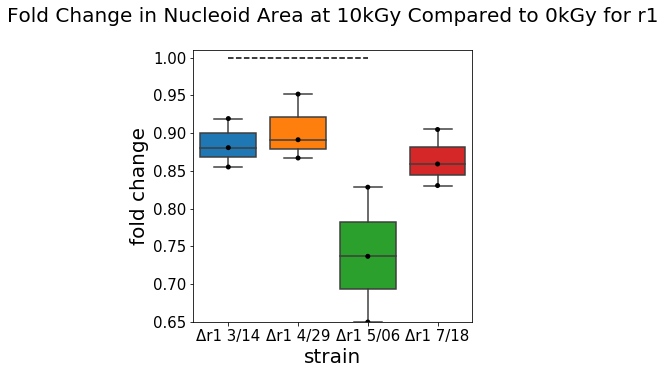

In [25]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
ax = sns.boxplot(data=[NA_03142024_r1_10k_0k_list, NA_04292024_r1_10k_0k_list, NA_05062024_r1_10k_0k_list,
                      NA_07182024_r1_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NA_03142024_r1_10k_0k_list, NA_04292024_r1_10k_0k_list, NA_05062024_r1_10k_0k_list,
                        NA_07182024_r1_10k_0k_list], color="black")

plt.title("Fold Change in Nucleoid Area at 10kGy Compared to 0kGy for r1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394r1 3/14", "\u0394r1 4/29", "\u0394r1 5/06","\u0394r1 7/18"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1], "--", color = "black")
plt.ylim([0.65,1.01])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(NA_03142024_r1_10k_0k_list, NA_04292024_r1_10k_0k_list, NA_05062024_r1_10k_0k_list,
                            NA_07182024_r1_10k_0k_list))

NA_03142024_r1_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Nuclear_Area (pixels)"]
NA_05062024_r1_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["Nuclear_Area (pixels)"]
NA_04292024_r1_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["Nuclear_Area (pixels)"]
NA_07182024_r1_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["Nuclear_Area (pixels)"]
NA_03142024_r1_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Nuclear_Area (pixels)"]
NA_05062024_r1_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["Nuclear_Area (pixels)"]
NA_04292024_r1_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["Nuclear_Area (pixels)"]
NA_07182024_r1_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["Nuclear_Area (pixels)"]

print('NA r1 3/14',stats.ttest_ind(a=NA_03142024_r1_10k_list, b=NA_03142024_r1_0k_list, equal_var=False))
print('NA r1 4/29',stats.ttest_ind(a=NA_04292024_r1_10k_list, b=NA_04292024_r1_0k_list, equal_var=False))
print('NA r1 5/06',stats.ttest_ind(a=NA_05062024_r1_10k_list, b=NA_05062024_r1_0k_list, equal_var=False))
print('NA r1 7/18',stats.ttest_ind(a=NA_07182024_r1_10k_list, b=NA_07182024_r1_0k_list, equal_var=False))

print('mar-apr',stats.ttest_ind(a=NA_03142024_r1_10k_0k_list, b=NA_04292024_r1_10k_0k_list, equal_var=False))
print('mar-may',stats.ttest_ind(a=NA_03142024_r1_10k_0k_list, b=NA_05062024_r1_10k_0k_list, equal_var=False))
print('mar-jul',stats.ttest_ind(a=NA_03142024_r1_10k_0k_list, b=NA_07182024_r1_10k_0k_list, equal_var=False))
print('apr-may',stats.ttest_ind(a=NA_04292024_r1_10k_0k_list, b=NA_05062024_r1_10k_0k_list, equal_var=False))
print('apr-jul',stats.ttest_ind(a=NA_04292024_r1_10k_0k_list, b=NA_07182024_r1_10k_0k_list, equal_var=False))
print('may-jul',stats.ttest_ind(a=NA_05062024_r1_10k_0k_list, b=NA_07182024_r1_10k_0k_list, equal_var=False))

anova F_onewayResult(statistic=12.777159092308166, pvalue=1.6815037202747727e-06)
NFA dsr2 0k Ttest_indResult(statistic=-6.989307203388383, pvalue=2.9235498040505777e-12)
NFA dsr2 sj 0k Ttest_indResult(statistic=-13.605745992074214, pvalue=5.86809289051264e-42)
NFA dsr6 0k Ttest_indResult(statistic=10.444341527963227, pvalue=1.9113609493968167e-25)
NFA dsr6 sj 0k Ttest_indResult(statistic=4.280976998134168, pvalue=1.8695207082423613e-05)
NFA dsr9 0k Ttest_indResult(statistic=-1.6656335083167082, pvalue=0.09583187304061701)
NFA dsr9 sj 0k Ttest_indResult(statistic=3.80589369761971, pvalue=0.00014171928109590922)
NFA dsr20 0k Ttest_indResult(statistic=-4.55277009222065, pvalue=5.383951325917737e-06)
NFA dsr20 sj 0k Ttest_indResult(statistic=-8.739132110403805, pvalue=2.5520992418060275e-18)
NFA dsr27 0k Ttest_indResult(statistic=-12.319283203546233, pvalue=2.3576027376526328e-32)
NFA dsr27 sj 0k Ttest_indResult(statistic=-24.002154441865642, pvalue=4.396710237915494e-125)
NFA dsr2 0k Tte

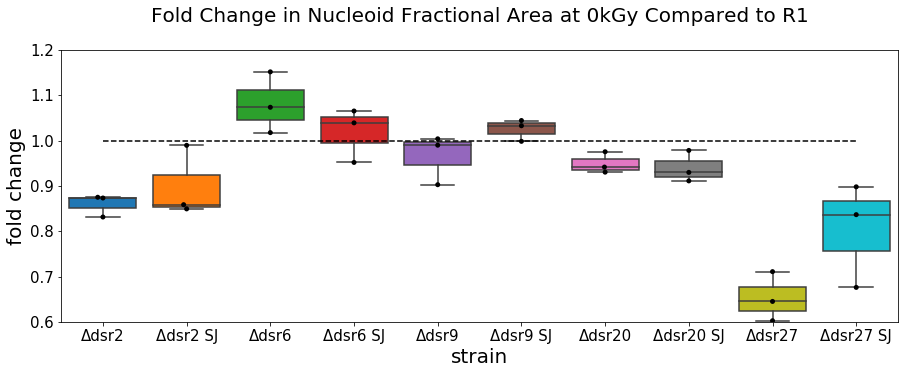

In [26]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[NFA_03142024_dsr2_r1_0k_list,NFA_07182024_dsr2_r1_0k_list,
                       NFA_04292024_dsr6_r1_0k_list,NFA_07182024_dsr6_r1_0k_list,
                       NFA_05062024_dsr9_r1_0k_list,NFA_07182024_dsr9_r1_0k_list,
                       NFA_05062024_dsr20_r1_0k_list,NFA_07182024_dsr20_r1_0k_list,
                       NFA_03142024_dsr27_r1_0k_list,NFA_07182024_dsr27_r1_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NFA_03142024_dsr2_r1_0k_list,NFA_07182024_dsr2_r1_0k_list,
                       NFA_04292024_dsr6_r1_0k_list,NFA_07182024_dsr6_r1_0k_list,
                       NFA_05062024_dsr9_r1_0k_list,NFA_07182024_dsr9_r1_0k_list,
                       NFA_05062024_dsr20_r1_0k_list,NFA_07182024_dsr20_r1_0k_list,
                       NFA_03142024_dsr27_r1_0k_list,NFA_07182024_dsr27_r1_0k_list], color="black")

plt.title("Fold Change in Nucleoid Fractional Area at 0kGy Compared to R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr2 SJ", "\u0394dsr6", "\u0394dsr6 SJ","\u0394dsr9", 
                    "\u0394dsr9 SJ", "\u0394dsr20","\u0394dsr20 SJ","\u0394dsr27",
                    "\u0394dsr27 SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.6,1.2])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(NFA_03142024_dsr2_r1_0k_list,NFA_07182024_dsr2_r1_0k_list,
                       NFA_04292024_dsr6_r1_0k_list,NFA_07182024_dsr6_r1_0k_list,
                       NFA_05062024_dsr9_r1_0k_list,NFA_07182024_dsr9_r1_0k_list,
                       NFA_05062024_dsr20_r1_0k_list,NFA_07182024_dsr20_r1_0k_list,
                       NFA_03142024_dsr27_r1_0k_list,NFA_07182024_dsr27_r1_0k_list))

NFA_03142024_r1_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["N:C_Ratio"]
NFA_05062024_r1_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["N:C_Ratio"]
NFA_04292024_r1_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["N:C_Ratio"]
NFA_07182024_r1_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["N:C_Ratio"]
NFA_03142024_dsr2_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["N:C_Ratio"]
NFA_07182024_dsr2_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["N:C_Ratio"]
NFA_04292024_dsr6_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["N:C_Ratio"]
NFA_07182024_dsr6_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["N:C_Ratio"]
NFA_05062024_dsr9_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["N:C_Ratio"]
NFA_07182024_dsr9_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["N:C_Ratio"]
NFA_05062024_dsr20_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["N:C_Ratio"]
NFA_07182024_dsr20_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["N:C_Ratio"]
NFA_03142024_dsr27_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["N:C_Ratio"]
NFA_07182024_dsr27_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["N:C_Ratio"]

print('NFA dsr2 0k',stats.ttest_ind(a=NFA_03142024_dsr2_0k_list, b=NFA_03142024_r1_0k_list, equal_var=False))
print('NFA dsr2 sj 0k',stats.ttest_ind(a=NFA_07182024_dsr2_0k_list, b=NFA_07182024_r1_0k_list, equal_var=False))
print('NFA dsr6 0k',stats.ttest_ind(a=NFA_04292024_dsr6_0k_list, b=NFA_04292024_r1_0k_list, equal_var=False))
print('NFA dsr6 sj 0k',stats.ttest_ind(a=NFA_07182024_dsr6_0k_list, b=NFA_07182024_r1_0k_list, equal_var=False))
print('NFA dsr9 0k',stats.ttest_ind(a=NFA_05062024_dsr9_0k_list, b=NFA_05062024_r1_0k_list, equal_var=False))
print('NFA dsr9 sj 0k',stats.ttest_ind(a=NFA_07182024_dsr9_0k_list, b=NFA_07182024_r1_0k_list, equal_var=False))
print('NFA dsr20 0k',stats.ttest_ind(a=NFA_05062024_dsr20_0k_list, b=NFA_05062024_r1_0k_list, equal_var=False))
print('NFA dsr20 sj 0k',stats.ttest_ind(a=NFA_07182024_dsr20_0k_list, b=NFA_07182024_r1_0k_list, equal_var=False))
print('NFA dsr27 0k',stats.ttest_ind(a=NFA_03142024_dsr27_0k_list, b=NFA_03142024_r1_0k_list, equal_var=False))
print('NFA dsr27 sj 0k',stats.ttest_ind(a=NFA_07182024_dsr27_0k_list, b=NFA_07182024_r1_0k_list, equal_var=False))

print('NFA dsr2 0k',stats.ttest_ind(a=NFA_03142024_dsr2_r1_0k_list, b=NFA_07182024_dsr2_r1_0k_list, equal_var=False))
print('NFA dsr6 0k',stats.ttest_ind(a=NFA_04292024_dsr6_r1_0k_list, b=NFA_07182024_dsr6_r1_0k_list, equal_var=False))
print('NFA dsr9 0k',stats.ttest_ind(a=NFA_05062024_dsr9_r1_0k_list, b=NFA_07182024_dsr9_r1_0k_list, equal_var=False))
print('NFA dsr20 0k',stats.ttest_ind(a=NFA_05062024_dsr20_r1_0k_list, b=NFA_07182024_dsr20_r1_0k_list, equal_var=False))
print('NFA dsr27 0k',stats.ttest_ind(a=NFA_03142024_dsr27_r1_0k_list, b=NFA_07182024_dsr27_r1_0k_list, equal_var=False))


anova F_onewayResult(statistic=8.440988869843508, pvalue=4.061184356427852e-05)
NFA dsr2 10k Ttest_indResult(statistic=-4.382057756712543, pvalue=1.190272912230098e-05)
NFA dsr2 sj 10k Ttest_indResult(statistic=4.87651061292415, pvalue=1.0943534495532786e-06)
NFA dsr6 10k Ttest_indResult(statistic=-16.54474399405346, pvalue=8.935736973266001e-61)
NFA dsr6 sj 10k Ttest_indResult(statistic=9.551954809853807, pvalue=1.5045609345938591e-21)
NFA dsr9 10k Ttest_indResult(statistic=-3.7436230090606974, pvalue=0.00018501120612874266)
NFA dsr9 sj 10k Ttest_indResult(statistic=9.466732470159865, pvalue=3.37817436650507e-21)
NFA dsr20 10k Ttest_indResult(statistic=12.589173073057509, pvalue=7.543477471058035e-36)
NFA dsr20 sj 10k Ttest_indResult(statistic=2.0191712485284334, pvalue=0.04350158509452467)
NFA dsr27 10k Ttest_indResult(statistic=-19.640592356419443, pvalue=3.203736099740065e-70)
NFA dsr27 sj 10k Ttest_indResult(statistic=9.041444060672816, pvalue=1.7968227153800411e-19)
NFA dsr2 10k 

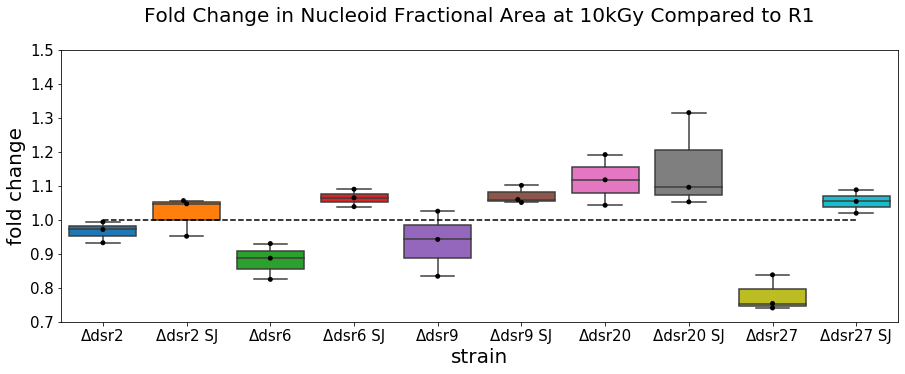

In [27]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[NFA_03142024_dsr2_r1_10k_list,NFA_07182024_dsr2_r1_10k_list,
                       NFA_04292024_dsr6_r1_10k_list,NFA_07182024_dsr6_r1_10k_list,
                       NFA_05062024_dsr9_r1_10k_list,NFA_07182024_dsr9_r1_10k_list,
                       NFA_05062024_dsr20_r1_10k_list,NFA_07182024_dsr20_r1_10k_list,
                       NFA_03142024_dsr27_r1_10k_list,NFA_07182024_dsr27_r1_10k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NFA_03142024_dsr2_r1_10k_list,NFA_07182024_dsr2_r1_10k_list,
                       NFA_04292024_dsr6_r1_10k_list,NFA_07182024_dsr6_r1_10k_list,
                       NFA_05062024_dsr9_r1_10k_list,NFA_07182024_dsr9_r1_10k_list,
                       NFA_05062024_dsr20_r1_10k_list,NFA_07182024_dsr20_r1_10k_list,
                       NFA_03142024_dsr27_r1_10k_list,NFA_07182024_dsr27_r1_10k_list], color="black")

plt.title("Fold Change in Nucleoid Fractional Area at 10kGy Compared to R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr2 SJ", "\u0394dsr6", "\u0394dsr6 SJ","\u0394dsr9", 
                    "\u0394dsr9 SJ", "\u0394dsr20","\u0394dsr20 SJ","\u0394dsr27",
                    "\u0394dsr27 SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.7,1.5])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(NFA_03142024_dsr2_r1_10k_list,NFA_07182024_dsr2_r1_10k_list,
                       NFA_04292024_dsr6_r1_10k_list,NFA_07182024_dsr6_r1_10k_list,
                       NFA_05062024_dsr9_r1_10k_list,NFA_07182024_dsr9_r1_10k_list,
                       NFA_05062024_dsr20_r1_10k_list,NFA_07182024_dsr20_r1_10k_list,
                       NFA_03142024_dsr27_r1_10k_list,NFA_07182024_dsr27_r1_10k_list))

NFA_03142024_r1_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["N:C_Ratio"]
NFA_05062024_r1_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["N:C_Ratio"]
NFA_04292024_r1_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["N:C_Ratio"]
NFA_07182024_r1_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["N:C_Ratio"]
NFA_03142024_dsr2_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["N:C_Ratio"]
NFA_07182024_dsr2_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["N:C_Ratio"]
NFA_04292024_dsr6_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["N:C_Ratio"]
NFA_07182024_dsr6_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["N:C_Ratio"]
NFA_05062024_dsr9_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["N:C_Ratio"]
NFA_07182024_dsr9_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["N:C_Ratio"]
NFA_05062024_dsr20_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["N:C_Ratio"]
NFA_07182024_dsr20_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["N:C_Ratio"]
NFA_03142024_dsr27_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["N:C_Ratio"]
NFA_07182024_dsr27_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["N:C_Ratio"]

print('NFA dsr2 10k',stats.ttest_ind(a=NFA_03142024_dsr2_10k_list, b=NFA_03142024_r1_10k_list, equal_var=False))
print('NFA dsr2 sj 10k',stats.ttest_ind(a=NFA_07182024_dsr2_10k_list, b=NFA_07182024_r1_10k_list, equal_var=False))
print('NFA dsr6 10k',stats.ttest_ind(a=NFA_04292024_dsr6_10k_list, b=NFA_04292024_r1_10k_list, equal_var=False))
print('NFA dsr6 sj 10k',stats.ttest_ind(a=NFA_07182024_dsr6_10k_list, b=NFA_07182024_r1_10k_list, equal_var=False))
print('NFA dsr9 10k',stats.ttest_ind(a=NFA_05062024_dsr9_10k_list, b=NFA_05062024_r1_10k_list, equal_var=False))
print('NFA dsr9 sj 10k',stats.ttest_ind(a=NFA_07182024_dsr9_10k_list, b=NFA_07182024_r1_10k_list, equal_var=False))
print('NFA dsr20 10k',stats.ttest_ind(a=NFA_05062024_dsr20_10k_list, b=NFA_05062024_r1_10k_list, equal_var=False))
print('NFA dsr20 sj 10k',stats.ttest_ind(a=NFA_07182024_dsr20_10k_list, b=NFA_07182024_r1_10k_list, equal_var=False))
print('NFA dsr27 10k',stats.ttest_ind(a=NFA_03142024_dsr27_10k_list, b=NFA_03142024_r1_10k_list, equal_var=False))
print('NFA dsr27 sj 10k',stats.ttest_ind(a=NFA_07182024_dsr27_10k_list, b=NFA_07182024_r1_10k_list, equal_var=False))

print('NFA dsr2 10k',stats.ttest_ind(a=NFA_03142024_dsr2_r1_10k_list, b=NFA_07182024_dsr2_r1_10k_list, equal_var=False))
print('NFA dsr6 10k',stats.ttest_ind(a=NFA_04292024_dsr6_r1_10k_list, b=NFA_07182024_dsr6_r1_10k_list, equal_var=False))
print('NFA dsr9 10k',stats.ttest_ind(a=NFA_05062024_dsr9_r1_10k_list, b=NFA_07182024_dsr9_r1_10k_list, equal_var=False))
print('NFA dsr20 10k',stats.ttest_ind(a=NFA_05062024_dsr20_r1_10k_list, b=NFA_07182024_dsr20_r1_10k_list, equal_var=False))
print('NFA dsr27 10k',stats.ttest_ind(a=NFA_03142024_dsr27_r1_10k_list, b=NFA_07182024_dsr27_r1_10k_list, equal_var=False))


anova F_onewayResult(statistic=5.899756656149132, pvalue=0.0004746456868101971)
NFA dsr2 Ttest_indResult(statistic=-20.75124319217432, pvalue=1.1044091897211051e-91)
NFA dsr2 sj Ttest_indResult(statistic=-30.290331905261716, pvalue=1.0141749983289057e-196)
NFA dsr6 Ttest_indResult(statistic=-43.22340449741691, pvalue=0.0)
NFA dsr6 sj Ttest_indResult(statistic=-40.02126420428093, pvalue=0.0)
NFA dsr9 Ttest_indResult(statistic=-23.865247086299437, pvalue=1.2069714961966591e-118)
NFA dsr9 sj Ttest_indResult(statistic=-36.547230456502255, pvalue=4.987505360785699e-282)
NFA dsr20 Ttest_indResult(statistic=-9.788988228545925, pvalue=1.8221727735375503e-22)
NFA dsr20 sj Ttest_indResult(statistic=-1.3539927593284928, pvalue=0.17577543792010245)
NFA dsr27 Ttest_indResult(statistic=-5.691052476222403, pvalue=2.9070207274453228e-08)
NFA dsr27 sj Ttest_indResult(statistic=-11.223751144000893, pvalue=4.35522747193583e-29)
NFA dsr2 Ttest_indResult(statistic=-0.3432610452034304, pvalue=0.753150625821

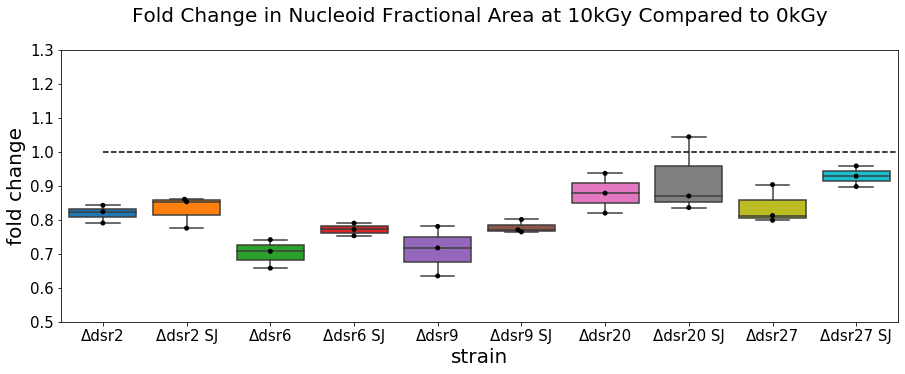

In [28]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[NFA_03142024_dsr2_10k_0k_list,NFA_07182024_dsr2_10k_0k_list,
                       NFA_04292024_dsr6_10k_0k_list,NFA_07182024_dsr6_10k_0k_list,
                       NFA_05062024_dsr9_10k_0k_list,NFA_07182024_dsr9_10k_0k_list,
                       NFA_05062024_dsr20_10k_0k_list,NFA_07182024_dsr20_10k_0k_list,
                       NFA_03142024_dsr27_10k_0k_list,NFA_07182024_dsr27_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NFA_03142024_dsr2_10k_0k_list,NFA_07182024_dsr2_10k_0k_list,
                       NFA_04292024_dsr6_10k_0k_list,NFA_07182024_dsr6_10k_0k_list,
                       NFA_05062024_dsr9_10k_0k_list,NFA_07182024_dsr9_10k_0k_list,
                       NFA_05062024_dsr20_10k_0k_list,NFA_07182024_dsr20_10k_0k_list,
                       NFA_03142024_dsr27_10k_0k_list,NFA_07182024_dsr27_10k_0k_list], color="black")

plt.title("Fold Change in Nucleoid Fractional Area at 10kGy Compared to 0kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr2 SJ", "\u0394dsr6", "\u0394dsr6 SJ","\u0394dsr9", 
                    "\u0394dsr9 SJ", "\u0394dsr20","\u0394dsr20 SJ","\u0394dsr27",
                    "\u0394dsr27 SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.5,1.3])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(NFA_03142024_dsr2_10k_0k_list,NFA_07182024_dsr2_10k_0k_list,
                       NFA_04292024_dsr6_10k_0k_list,NFA_07182024_dsr6_10k_0k_list,
                       NFA_05062024_dsr9_10k_0k_list,NFA_07182024_dsr9_10k_0k_list,
                       NFA_05062024_dsr20_10k_0k_list,NFA_07182024_dsr20_10k_0k_list,
                       NFA_03142024_dsr27_10k_0k_list,NFA_07182024_dsr27_10k_0k_list))

NFA_03142024_dsr2_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["N:C_Ratio"]
NFA_07182024_dsr2_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["N:C_Ratio"]
NFA_04292024_dsr6_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["N:C_Ratio"]
NFA_07182024_dsr6_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["N:C_Ratio"]
NFA_05062024_dsr9_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["N:C_Ratio"]
NFA_07182024_dsr9_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["N:C_Ratio"]
NFA_05062024_dsr20_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["N:C_Ratio"]
NFA_07182024_dsr20_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["N:C_Ratio"]
NFA_03142024_dsr27_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["N:C_Ratio"]
NFA_07182024_dsr27_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["N:C_Ratio"]
NFA_03142024_dsr2_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["N:C_Ratio"]
NFA_07182024_dsr2_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["N:C_Ratio"]
NFA_04292024_dsr6_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["N:C_Ratio"]
NFA_07182024_dsr6_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["N:C_Ratio"]
NFA_05062024_dsr9_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["N:C_Ratio"]
NFA_07182024_dsr9_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["N:C_Ratio"]
NFA_05062024_dsr20_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["N:C_Ratio"]
NFA_07182024_dsr20_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["N:C_Ratio"]
NFA_03142024_dsr27_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["N:C_Ratio"]
NFA_07182024_dsr27_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["N:C_Ratio"]

print('NFA dsr2',stats.ttest_ind(a=NFA_03142024_dsr2_10k_list, b=NFA_03142024_dsr2_0k_list, equal_var=False))
print('NFA dsr2 sj',stats.ttest_ind(a=NFA_07182024_dsr2_10k_list, b=NFA_07182024_dsr2_0k_list, equal_var=False))
print('NFA dsr6',stats.ttest_ind(a=NFA_04292024_dsr6_10k_list, b=NFA_04292024_dsr6_0k_list, equal_var=False))
print('NFA dsr6 sj',stats.ttest_ind(a=NFA_07182024_dsr6_10k_list, b=NFA_07182024_dsr6_0k_list, equal_var=False))
print('NFA dsr9',stats.ttest_ind(a=NFA_05062024_dsr9_10k_list, b=NFA_05062024_dsr9_0k_list, equal_var=False))
print('NFA dsr9 sj',stats.ttest_ind(a=NFA_07182024_dsr9_10k_list, b=NFA_07182024_dsr9_0k_list, equal_var=False))
print('NFA dsr20',stats.ttest_ind(a=NFA_05062024_dsr20_10k_list, b=NFA_05062024_dsr20_0k_list, equal_var=False))
print('NFA dsr20 sj',stats.ttest_ind(a=NFA_07182024_dsr20_10k_list, b=NFA_07182024_dsr20_0k_list, equal_var=False))
print('NFA dsr27',stats.ttest_ind(a=NFA_03142024_dsr27_10k_list, b=NFA_03142024_dsr27_0k_list, equal_var=False))
print('NFA dsr27 sj',stats.ttest_ind(a=NFA_07182024_dsr27_10k_list, b=NFA_07182024_dsr27_0k_list, equal_var=False))

print('NFA dsr2',stats.ttest_ind(a=NFA_03142024_dsr2_10k_0k_list, b=NFA_07182024_dsr2_10k_0k_list, equal_var=False))
print('NFA dsr6',stats.ttest_ind(a=NFA_04292024_dsr6_10k_0k_list, b=NFA_07182024_dsr6_10k_0k_list, equal_var=False))
print('NFA dsr9',stats.ttest_ind(a=NFA_05062024_dsr9_10k_0k_list, b=NFA_07182024_dsr9_10k_0k_list, equal_var=False))
print('NFA dsr20',stats.ttest_ind(a=NFA_05062024_dsr20_10k_0k_list, b=NFA_07182024_dsr20_10k_0k_list, equal_var=False))
print('NFA dsr27',stats.ttest_ind(a=NFA_03142024_dsr27_10k_0k_list, b=NFA_07182024_dsr27_10k_0k_list, equal_var=False))


anova F_onewayResult(statistic=5.624989785470692, pvalue=0.022675561312909685)
NFA r1 3/14 Ttest_indResult(statistic=-14.229745759399792, pvalue=1.702527274420085e-45)
NFA r1 4/29 Ttest_indResult(statistic=-19.068365465432088, pvalue=5.612037094875629e-80)
NFA r1 5/06 Ttest_indResult(statistic=-33.076076406402294, pvalue=9.565221708539142e-228)
NFA r1 7/18 Ttest_indResult(statistic=-41.15754859607106, pvalue=0.0)
mar-apr Ttest_indResult(statistic=-6.268091927739477, pvalue=0.009674985688650361)
mar-may Ttest_indResult(statistic=0.5226834013679493, pvalue=0.6510781952329893)
mar-jul Ttest_indResult(statistic=-1.250668591709613, pvalue=0.2887150306673473)
apr-may Ttest_indResult(statistic=2.7421424225756836, pvalue=0.08863250159106259)
apr-jul Ttest_indResult(statistic=5.939687669861223, pvalue=0.017763064847908485)
may-jul Ttest_indResult(statistic=-0.765234249724497, pvalue=0.5225707460956301)


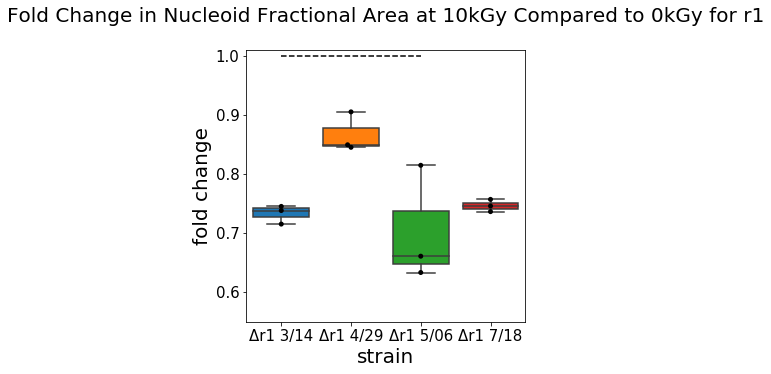

In [29]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
ax = sns.boxplot(data=[NFA_03142024_r1_10k_0k_list, NFA_04292024_r1_10k_0k_list, NFA_05062024_r1_10k_0k_list,
                      NFA_07182024_r1_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NFA_03142024_r1_10k_0k_list, NFA_04292024_r1_10k_0k_list, NFA_05062024_r1_10k_0k_list,
                        NFA_07182024_r1_10k_0k_list], color="black")

plt.title("Fold Change in Nucleoid Fractional Area at 10kGy Compared to 0kGy for r1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394r1 3/14", "\u0394r1 4/29", "\u0394r1 5/06","\u0394r1 7/18"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1], "--", color = "black")
plt.ylim([0.55,1.01])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(NFA_03142024_r1_10k_0k_list, NFA_04292024_r1_10k_0k_list, NFA_05062024_r1_10k_0k_list,
                            NFA_07182024_r1_10k_0k_list))

NFA_03142024_r1_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["N:C_Ratio"]
NFA_05062024_r1_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["N:C_Ratio"]
NFA_04292024_r1_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["N:C_Ratio"]
NFA_07182024_r1_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["N:C_Ratio"]
NFA_03142024_r1_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["N:C_Ratio"]
NFA_05062024_r1_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["N:C_Ratio"]
NFA_04292024_r1_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["N:C_Ratio"]
NFA_07182024_r1_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["N:C_Ratio"]

print('NFA r1 3/14',stats.ttest_ind(a=NFA_03142024_r1_10k_list, b=NFA_03142024_r1_0k_list, equal_var=False))
print('NFA r1 4/29',stats.ttest_ind(a=NFA_04292024_r1_10k_list, b=NFA_04292024_r1_0k_list, equal_var=False))
print('NFA r1 5/06',stats.ttest_ind(a=NFA_05062024_r1_10k_list, b=NFA_05062024_r1_0k_list, equal_var=False))
print('NFA r1 7/18',stats.ttest_ind(a=NFA_07182024_r1_10k_list, b=NFA_07182024_r1_0k_list, equal_var=False))

print('mar-apr',stats.ttest_ind(a=NFA_03142024_r1_10k_0k_list, b=NFA_04292024_r1_10k_0k_list, equal_var=False))
print('mar-may',stats.ttest_ind(a=NFA_03142024_r1_10k_0k_list, b=NFA_05062024_r1_10k_0k_list, equal_var=False))
print('mar-jul',stats.ttest_ind(a=NFA_03142024_r1_10k_0k_list, b=NFA_07182024_r1_10k_0k_list, equal_var=False))
print('apr-may',stats.ttest_ind(a=NFA_04292024_r1_10k_0k_list, b=NFA_05062024_r1_10k_0k_list, equal_var=False))
print('apr-jul',stats.ttest_ind(a=NFA_04292024_r1_10k_0k_list, b=NFA_07182024_r1_10k_0k_list, equal_var=False))
print('may-jul',stats.ttest_ind(a=NFA_05062024_r1_10k_0k_list, b=NFA_07182024_r1_10k_0k_list, equal_var=False))

anova F_onewayResult(statistic=21.565215060556493, pvalue=2.0309088718489578e-08)
circ dsr2 0k Ttest_indResult(statistic=9.411605054029904, pvalue=7.026972182704942e-21)
circ dsr2 sj 0k Ttest_indResult(statistic=5.427250333864819, pvalue=5.7905759301396844e-08)
circ dsr6 0k Ttest_indResult(statistic=-1.5525641015076577, pvalue=0.12054899591613413)
circ dsr6 sj 0k Ttest_indResult(statistic=-1.6025651752845276, pvalue=0.10904669579807927)
circ dsr9 0k Ttest_indResult(statistic=6.7414332319420875, pvalue=1.691059221713497e-11)
circ dsr9 sj 0k Ttest_indResult(statistic=-4.839849957356579, pvalue=1.309185408825384e-06)
circ dsr20 0k Ttest_indResult(statistic=-7.165800947726695, pvalue=8.509709020024437e-13)
circ dsr20 sj 0k Ttest_indResult(statistic=3.428420998980534, pvalue=0.0006084795079195193)
circ dsr27 0k Ttest_indResult(statistic=7.986967335021416, pvalue=4.973999326971816e-14)
circ dsr27 sj 0k Ttest_indResult(statistic=13.655031476609865, pvalue=3.369447402244392e-42)
circ dsr2 0k T

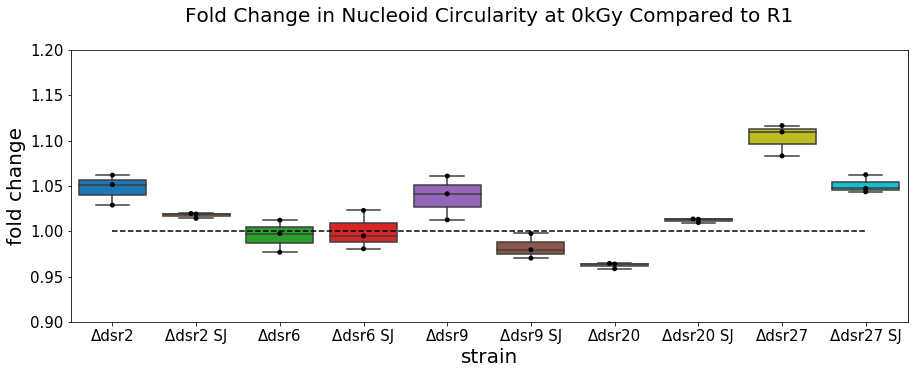

In [30]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[circ_03142024_dsr2_r1_0k_list,circ_07182024_dsr2_r1_0k_list,
                       circ_04292024_dsr6_r1_0k_list,circ_07182024_dsr6_r1_0k_list,
                       circ_05062024_dsr9_r1_0k_list,circ_07182024_dsr9_r1_0k_list,
                       circ_05062024_dsr20_r1_0k_list,circ_07182024_dsr20_r1_0k_list,
                       circ_03142024_dsr27_r1_0k_list,circ_07182024_dsr27_r1_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[circ_03142024_dsr2_r1_0k_list,circ_07182024_dsr2_r1_0k_list,
                       circ_04292024_dsr6_r1_0k_list,circ_07182024_dsr6_r1_0k_list,
                       circ_05062024_dsr9_r1_0k_list,circ_07182024_dsr9_r1_0k_list,
                       circ_05062024_dsr20_r1_0k_list,circ_07182024_dsr20_r1_0k_list,
                       circ_03142024_dsr27_r1_0k_list,circ_07182024_dsr27_r1_0k_list], color="black")

plt.title("Fold Change in Nucleoid Circularity at 0kGy Compared to R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr2 SJ", "\u0394dsr6", "\u0394dsr6 SJ","\u0394dsr9", 
                    "\u0394dsr9 SJ", "\u0394dsr20","\u0394dsr20 SJ","\u0394dsr27",
                    "\u0394dsr27 SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.9,1.2])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(circ_03142024_dsr2_r1_0k_list,circ_07182024_dsr2_r1_0k_list,
                       circ_04292024_dsr6_r1_0k_list,circ_07182024_dsr6_r1_0k_list,
                       circ_05062024_dsr9_r1_0k_list,circ_07182024_dsr9_r1_0k_list,
                       circ_05062024_dsr20_r1_0k_list,circ_07182024_dsr20_r1_0k_list,
                       circ_03142024_dsr27_r1_0k_list,circ_07182024_dsr27_r1_0k_list))

circ_03142024_r1_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["circ."]
circ_05062024_r1_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["circ."]
circ_04292024_r1_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["circ."]
circ_07182024_r1_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["circ."]
circ_03142024_dsr2_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["circ."]
circ_07182024_dsr2_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["circ."]
circ_04292024_dsr6_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["circ."]
circ_07182024_dsr6_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["circ."]
circ_05062024_dsr9_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["circ."]
circ_07182024_dsr9_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["circ."]
circ_05062024_dsr20_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["circ."]
circ_07182024_dsr20_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["circ."]
circ_03142024_dsr27_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["circ."]
circ_07182024_dsr27_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["circ."]

print('circ dsr2 0k',stats.ttest_ind(a=circ_03142024_dsr2_0k_list, b=circ_03142024_r1_0k_list, equal_var=False))
print('circ dsr2 sj 0k',stats.ttest_ind(a=circ_07182024_dsr2_0k_list, b=circ_07182024_r1_0k_list, equal_var=False))
print('circ dsr6 0k',stats.ttest_ind(a=circ_04292024_dsr6_0k_list, b=circ_04292024_r1_0k_list, equal_var=False))
print('circ dsr6 sj 0k',stats.ttest_ind(a=circ_07182024_dsr6_0k_list, b=circ_07182024_r1_0k_list, equal_var=False))
print('circ dsr9 0k',stats.ttest_ind(a=circ_05062024_dsr9_0k_list, b=circ_05062024_r1_0k_list, equal_var=False))
print('circ dsr9 sj 0k',stats.ttest_ind(a=circ_07182024_dsr9_0k_list, b=circ_07182024_r1_0k_list, equal_var=False))
print('circ dsr20 0k',stats.ttest_ind(a=circ_05062024_dsr20_0k_list, b=circ_05062024_r1_0k_list, equal_var=False))
print('circ dsr20 sj 0k',stats.ttest_ind(a=circ_07182024_dsr20_0k_list, b=circ_07182024_r1_0k_list, equal_var=False))
print('circ dsr27 0k',stats.ttest_ind(a=circ_03142024_dsr27_0k_list, b=circ_03142024_r1_0k_list, equal_var=False))
print('circ dsr27 sj 0k',stats.ttest_ind(a=circ_07182024_dsr27_0k_list, b=circ_07182024_r1_0k_list, equal_var=False))

print('circ dsr2 0k',stats.ttest_ind(a=circ_03142024_dsr2_r1_0k_list, b=circ_07182024_dsr2_r1_0k_list, equal_var=False))
print('circ dsr6 0k',stats.ttest_ind(a=circ_04292024_dsr6_r1_0k_list, b=circ_07182024_dsr6_r1_0k_list, equal_var=False))
print('circ dsr9 0k',stats.ttest_ind(a=circ_05062024_dsr9_r1_0k_list, b=circ_07182024_dsr9_r1_0k_list, equal_var=False))
print('circ dsr20 0k',stats.ttest_ind(a=circ_05062024_dsr20_r1_0k_list, b=circ_07182024_dsr20_r1_0k_list, equal_var=False))
print('circ dsr27 0k',stats.ttest_ind(a=circ_03142024_dsr27_r1_0k_list, b=circ_07182024_dsr27_r1_0k_list, equal_var=False))


anova F_onewayResult(statistic=9.089047442107058, pvalue=2.3578749296318602e-05)
circ dsr2 10k Ttest_indResult(statistic=6.040177697125883, pvalue=1.6102284516177428e-09)
circ dsr2 sj 10k Ttest_indResult(statistic=3.7624438960786106, pvalue=0.00016909727641358294)
circ dsr6 10k Ttest_indResult(statistic=3.9879257032686772, pvalue=6.709370141806976e-05)
circ dsr6 sj 10k Ttest_indResult(statistic=-4.981966059385459, pvalue=6.380711789190764e-07)
circ dsr9 10k Ttest_indResult(statistic=-4.42767414914279, pvalue=9.880142288415012e-06)
circ dsr9 sj 10k Ttest_indResult(statistic=-4.627183772355086, pvalue=3.744168967563653e-06)
circ dsr20 10k Ttest_indResult(statistic=-6.786900202065881, pvalue=1.2606924873566658e-11)
circ dsr20 sj 10k Ttest_indResult(statistic=-5.308935182379547, pvalue=1.1216185777427683e-07)
circ dsr27 10k Ttest_indResult(statistic=5.724971346750239, pvalue=1.54205313038109e-08)
circ dsr27 sj 10k Ttest_indResult(statistic=5.586750788598044, pvalue=2.3674783863393113e-08)


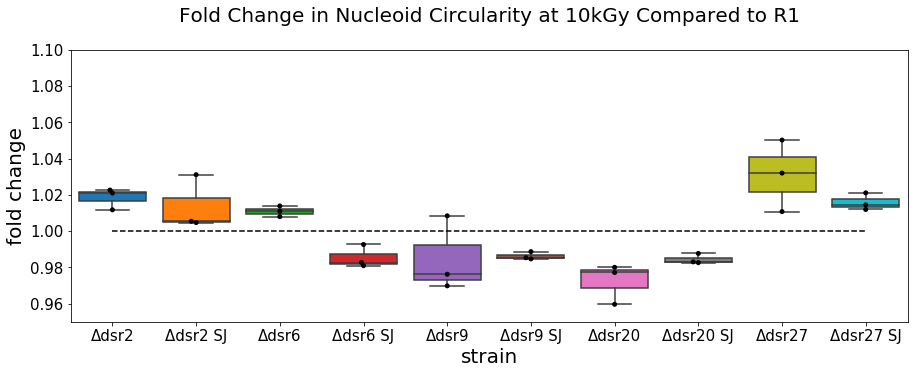

In [31]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[circ_03142024_dsr2_r1_10k_list,circ_07182024_dsr2_r1_10k_list,
                       circ_04292024_dsr6_r1_10k_list,circ_07182024_dsr6_r1_10k_list,
                       circ_05062024_dsr9_r1_10k_list,circ_07182024_dsr9_r1_10k_list,
                       circ_05062024_dsr20_r1_10k_list,circ_07182024_dsr20_r1_10k_list,
                       circ_03142024_dsr27_r1_10k_list,circ_07182024_dsr27_r1_10k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[circ_03142024_dsr2_r1_10k_list,circ_07182024_dsr2_r1_10k_list,
                       circ_04292024_dsr6_r1_10k_list,circ_07182024_dsr6_r1_10k_list,
                       circ_05062024_dsr9_r1_10k_list,circ_07182024_dsr9_r1_10k_list,
                       circ_05062024_dsr20_r1_10k_list,circ_07182024_dsr20_r1_10k_list,
                       circ_03142024_dsr27_r1_10k_list,circ_07182024_dsr27_r1_10k_list], color="black")

plt.title("Fold Change in Nucleoid Circularity at 10kGy Compared to R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr2 SJ", "\u0394dsr6", "\u0394dsr6 SJ","\u0394dsr9", 
                    "\u0394dsr9 SJ", "\u0394dsr20","\u0394dsr20 SJ","\u0394dsr27",
                    "\u0394dsr27 SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.95,1.1])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(circ_03142024_dsr2_r1_10k_list,circ_07182024_dsr2_r1_10k_list,
                       circ_04292024_dsr6_r1_10k_list,circ_07182024_dsr6_r1_10k_list,
                       circ_05062024_dsr9_r1_10k_list,circ_07182024_dsr9_r1_10k_list,
                       circ_05062024_dsr20_r1_10k_list,circ_07182024_dsr20_r1_10k_list,
                       circ_03142024_dsr27_r1_10k_list,circ_07182024_dsr27_r1_10k_list))

circ_03142024_r1_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["circ."]
circ_05062024_r1_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["circ."]
circ_04292024_r1_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["circ."]
circ_07182024_r1_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["circ."]
circ_03142024_dsr2_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["circ."]
circ_07182024_dsr2_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["circ."]
circ_04292024_dsr6_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["circ."]
circ_07182024_dsr6_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["circ."]
circ_05062024_dsr9_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["circ."]
circ_07182024_dsr9_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["circ."]
circ_05062024_dsr20_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["circ."]
circ_07182024_dsr20_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["circ."]
circ_03142024_dsr27_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["circ."]
circ_07182024_dsr27_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["circ."]

print('circ dsr2 10k',stats.ttest_ind(a=circ_03142024_dsr2_10k_list, b=circ_03142024_r1_10k_list, equal_var=False))
print('circ dsr2 sj 10k',stats.ttest_ind(a=circ_07182024_dsr2_10k_list, b=circ_07182024_r1_10k_list, equal_var=False))
print('circ dsr6 10k',stats.ttest_ind(a=circ_04292024_dsr6_10k_list, b=circ_04292024_r1_10k_list, equal_var=False))
print('circ dsr6 sj 10k',stats.ttest_ind(a=circ_07182024_dsr6_10k_list, b=circ_07182024_r1_10k_list, equal_var=False))
print('circ dsr9 10k',stats.ttest_ind(a=circ_05062024_dsr9_10k_list, b=circ_05062024_r1_10k_list, equal_var=False))
print('circ dsr9 sj 10k',stats.ttest_ind(a=circ_07182024_dsr9_10k_list, b=circ_07182024_r1_10k_list, equal_var=False))
print('circ dsr20 10k',stats.ttest_ind(a=circ_05062024_dsr20_10k_list, b=circ_05062024_r1_10k_list, equal_var=False))
print('circ dsr20 sj 10k',stats.ttest_ind(a=circ_07182024_dsr20_10k_list, b=circ_07182024_r1_10k_list, equal_var=False))
print('circ dsr27 10k',stats.ttest_ind(a=circ_03142024_dsr27_10k_list, b=circ_03142024_r1_10k_list, equal_var=False))
print('circ dsr27 sj 10k',stats.ttest_ind(a=circ_07182024_dsr27_10k_list, b=circ_07182024_r1_10k_list, equal_var=False))

print('circ dsr2 10k',stats.ttest_ind(a=circ_03142024_dsr2_r1_10k_list, b=circ_07182024_dsr2_r1_10k_list, equal_var=False))
print('circ dsr6 10k',stats.ttest_ind(a=circ_04292024_dsr6_r1_10k_list, b=circ_07182024_dsr6_r1_10k_list, equal_var=False))
print('circ dsr9 10k',stats.ttest_ind(a=circ_05062024_dsr9_r1_10k_list, b=circ_07182024_dsr9_r1_10k_list, equal_var=False))
print('circ dsr20 10k',stats.ttest_ind(a=circ_05062024_dsr20_r1_10k_list, b=circ_07182024_dsr20_r1_10k_list, equal_var=False))
print('circ dsr27 10k',stats.ttest_ind(a=circ_03142024_dsr27_r1_10k_list, b=circ_07182024_dsr27_r1_10k_list, equal_var=False))


anova F_onewayResult(statistic=10.164902175444038, pvalue=1.0144177888460191e-05)
circ dsr2 Ttest_indResult(statistic=21.42108813304269, pvalue=1.70747523086357e-97)
circ dsr2 sj Ttest_indResult(statistic=32.615626101829115, pvalue=6.020811878038468e-227)
circ dsr6 Ttest_indResult(statistic=31.032637083835137, pvalue=1.3342817803525077e-203)
circ dsr6 sj Ttest_indResult(statistic=28.98108620564183, pvalue=9.123083540183621e-181)
circ dsr9 Ttest_indResult(statistic=8.383446840354178, pvalue=6.936456791676956e-17)
circ dsr9 sj Ttest_indResult(statistic=30.971440733614955, pvalue=3.3268702053166923e-205)
circ dsr20 Ttest_indResult(statistic=20.955315052627263, pvalue=2.5494818659896636e-94)
circ dsr20 sj Ttest_indResult(statistic=20.97339143832436, pvalue=2.200765216100266e-96)
circ dsr27 Ttest_indResult(statistic=5.072330290357742, pvalue=6.347405407890072e-07)
circ dsr27 sj Ttest_indResult(statistic=22.16640471167477, pvalue=9.295821075388475e-107)
circ dsr2 Ttest_indResult(statistic=0.

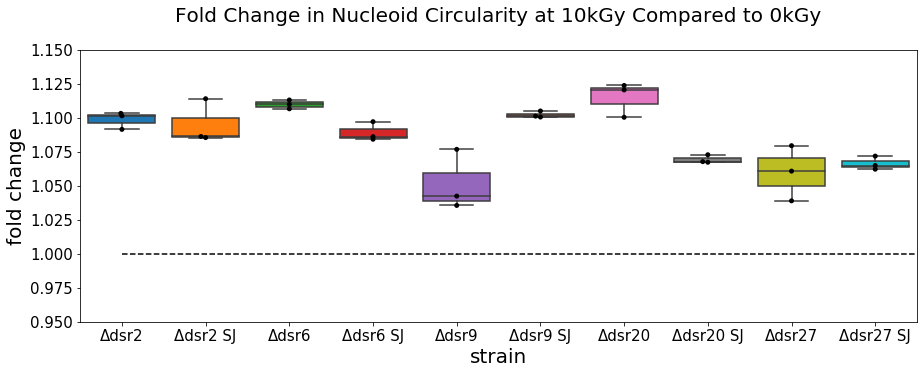

In [32]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[circ_03142024_dsr2_10k_0k_list,circ_07182024_dsr2_10k_0k_list,
                       circ_04292024_dsr6_10k_0k_list,circ_07182024_dsr6_10k_0k_list,
                       circ_05062024_dsr9_10k_0k_list,circ_07182024_dsr9_10k_0k_list,
                       circ_05062024_dsr20_10k_0k_list,circ_07182024_dsr20_10k_0k_list,
                       circ_03142024_dsr27_10k_0k_list,circ_07182024_dsr27_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[circ_03142024_dsr2_10k_0k_list,circ_07182024_dsr2_10k_0k_list,
                       circ_04292024_dsr6_10k_0k_list,circ_07182024_dsr6_10k_0k_list,
                       circ_05062024_dsr9_10k_0k_list,circ_07182024_dsr9_10k_0k_list,
                       circ_05062024_dsr20_10k_0k_list,circ_07182024_dsr20_10k_0k_list,
                       circ_03142024_dsr27_10k_0k_list,circ_07182024_dsr27_10k_0k_list], color="black")

plt.title("Fold Change in Nucleoid Circularity at 10kGy Compared to 0kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr2 SJ", "\u0394dsr6", "\u0394dsr6 SJ","\u0394dsr9", 
                    "\u0394dsr9 SJ", "\u0394dsr20","\u0394dsr20 SJ","\u0394dsr27",
                    "\u0394dsr27 SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.95,1.15])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(circ_03142024_dsr2_10k_0k_list,circ_07182024_dsr2_10k_0k_list,
                       circ_04292024_dsr6_10k_0k_list,circ_07182024_dsr6_10k_0k_list,
                       circ_05062024_dsr9_10k_0k_list,circ_07182024_dsr9_10k_0k_list,
                       circ_05062024_dsr20_10k_0k_list,circ_07182024_dsr20_10k_0k_list,
                       circ_03142024_dsr27_10k_0k_list,circ_07182024_dsr27_10k_0k_list))

circ_03142024_dsr2_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["circ."]
circ_07182024_dsr2_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["circ."]
circ_04292024_dsr6_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["circ."]
circ_07182024_dsr6_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["circ."]
circ_05062024_dsr9_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["circ."]
circ_07182024_dsr9_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["circ."]
circ_05062024_dsr20_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["circ."]
circ_07182024_dsr20_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["circ."]
circ_03142024_dsr27_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["circ."]
circ_07182024_dsr27_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["circ."]
circ_03142024_dsr2_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["circ."]
circ_07182024_dsr2_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["circ."]
circ_04292024_dsr6_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["circ."]
circ_07182024_dsr6_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["circ."]
circ_05062024_dsr9_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["circ."]
circ_07182024_dsr9_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["circ."]
circ_05062024_dsr20_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["circ."]
circ_07182024_dsr20_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["circ."]
circ_03142024_dsr27_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["circ."]
circ_07182024_dsr27_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["circ."]

print('circ dsr2',stats.ttest_ind(a=circ_03142024_dsr2_10k_list, b=circ_03142024_dsr2_0k_list, equal_var=False))
print('circ dsr2 sj',stats.ttest_ind(a=circ_07182024_dsr2_10k_list, b=circ_07182024_dsr2_0k_list, equal_var=False))
print('circ dsr6',stats.ttest_ind(a=circ_04292024_dsr6_10k_list, b=circ_04292024_dsr6_0k_list, equal_var=False))
print('circ dsr6 sj',stats.ttest_ind(a=circ_07182024_dsr6_10k_list, b=circ_07182024_dsr6_0k_list, equal_var=False))
print('circ dsr9',stats.ttest_ind(a=circ_05062024_dsr9_10k_list, b=circ_05062024_dsr9_0k_list, equal_var=False))
print('circ dsr9 sj',stats.ttest_ind(a=circ_07182024_dsr9_10k_list, b=circ_07182024_dsr9_0k_list, equal_var=False))
print('circ dsr20',stats.ttest_ind(a=circ_05062024_dsr20_10k_list, b=circ_05062024_dsr20_0k_list, equal_var=False))
print('circ dsr20 sj',stats.ttest_ind(a=circ_07182024_dsr20_10k_list, b=circ_07182024_dsr20_0k_list, equal_var=False))
print('circ dsr27',stats.ttest_ind(a=circ_03142024_dsr27_10k_list, b=circ_03142024_dsr27_0k_list, equal_var=False))
print('circ dsr27 sj',stats.ttest_ind(a=circ_07182024_dsr27_10k_list, b=circ_07182024_dsr27_0k_list, equal_var=False))

print('circ dsr2',stats.ttest_ind(a=circ_03142024_dsr2_10k_0k_list, b=circ_07182024_dsr2_10k_0k_list, equal_var=False))
print('circ dsr6',stats.ttest_ind(a=circ_04292024_dsr6_10k_0k_list, b=circ_07182024_dsr6_10k_0k_list, equal_var=False))
print('circ dsr9',stats.ttest_ind(a=circ_05062024_dsr9_10k_0k_list, b=circ_07182024_dsr9_10k_0k_list, equal_var=False))
print('circ dsr20',stats.ttest_ind(a=circ_05062024_dsr20_10k_0k_list, b=circ_07182024_dsr20_10k_0k_list, equal_var=False))
print('circ dsr27',stats.ttest_ind(a=circ_03142024_dsr27_10k_0k_list, b=circ_07182024_dsr27_10k_0k_list, equal_var=False))


anova F_onewayResult(statistic=14.304697603878898, pvalue=0.001402465437687331)
circ r1 3/14 Ttest_indResult(statistic=37.374677248143776, pvalue=3.986669610023493e-292)
circ r1 4/29 Ttest_indResult(statistic=27.001720519274055, pvalue=2.3789994026731266e-156)
circ r1 5/06 Ttest_indResult(statistic=26.121576136850926, pvalue=1.350060141346353e-145)
circ r1 7/18 Ttest_indResult(statistic=29.27382883957968, pvalue=6.537555639524891e-183)
mar-apr Ttest_indResult(statistic=6.854889704422591, pvalue=0.004783538794236041)
mar-may Ttest_indResult(statistic=2.687154292036731, pvalue=0.0592723460707899)
mar-jul Ttest_indResult(statistic=5.757903483682485, pvalue=0.014551348387362967)
apr-may Ttest_indResult(statistic=-2.419593530139188, pvalue=0.10092171317866577)
apr-jul Ttest_indResult(statistic=-2.447272294434252, pvalue=0.079222811744005)
may-jul Ttest_indResult(statistic=1.2608001264185735, pvalue=0.31710063775148534)


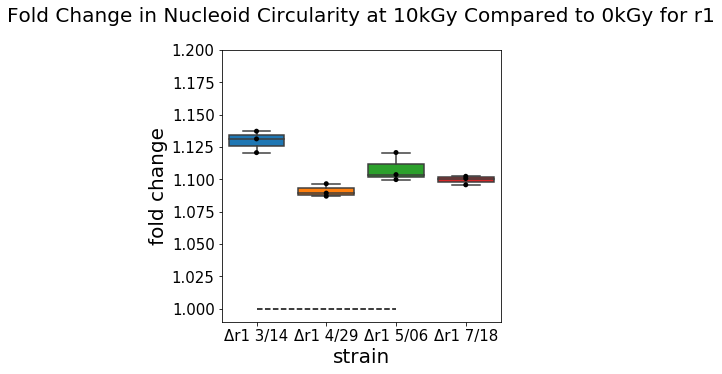

In [33]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
ax = sns.boxplot(data=[circ_03142024_r1_10k_0k_list, circ_04292024_r1_10k_0k_list, circ_05062024_r1_10k_0k_list,
                      circ_07182024_r1_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[circ_03142024_r1_10k_0k_list, circ_04292024_r1_10k_0k_list, circ_05062024_r1_10k_0k_list,
                      circ_07182024_r1_10k_0k_list], color="black")

plt.title("Fold Change in Nucleoid Circularity at 10kGy Compared to 0kGy for r1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394r1 3/14", "\u0394r1 4/29", "\u0394r1 5/06","\u0394r1 7/18"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1], "--", color = "black")
plt.ylim([0.99,1.2])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(circ_03142024_r1_10k_0k_list, circ_04292024_r1_10k_0k_list, circ_05062024_r1_10k_0k_list,
                      circ_07182024_r1_10k_0k_list))

circ_03142024_r1_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["circ."]
circ_05062024_r1_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["circ."]
circ_04292024_r1_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["circ."]
circ_07182024_r1_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["circ."]
circ_03142024_r1_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["circ."]
circ_05062024_r1_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["circ."]
circ_04292024_r1_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["circ."]
circ_07182024_r1_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["circ."]

print('circ r1 3/14',stats.ttest_ind(a=circ_03142024_r1_10k_list, b=circ_03142024_r1_0k_list, equal_var=False))
print('circ r1 4/29',stats.ttest_ind(a=circ_04292024_r1_10k_list, b=circ_04292024_r1_0k_list, equal_var=False))
print('circ r1 5/06',stats.ttest_ind(a=circ_05062024_r1_10k_list, b=circ_05062024_r1_0k_list, equal_var=False))
print('circ r1 7/18',stats.ttest_ind(a=circ_07182024_r1_10k_list, b=circ_07182024_r1_0k_list, equal_var=False))

print('mar-apr',stats.ttest_ind(a=circ_03142024_r1_10k_0k_list, b=circ_04292024_r1_10k_0k_list, equal_var=False))
print('mar-may',stats.ttest_ind(a=circ_03142024_r1_10k_0k_list, b=circ_05062024_r1_10k_0k_list, equal_var=False))
print('mar-jul',stats.ttest_ind(a=circ_03142024_r1_10k_0k_list, b=circ_07182024_r1_10k_0k_list, equal_var=False))
print('apr-may',stats.ttest_ind(a=circ_04292024_r1_10k_0k_list, b=circ_05062024_r1_10k_0k_list, equal_var=False))
print('apr-jul',stats.ttest_ind(a=circ_04292024_r1_10k_0k_list, b=circ_07182024_r1_10k_0k_list, equal_var=False))
print('may-jul',stats.ttest_ind(a=circ_05062024_r1_10k_0k_list, b=circ_07182024_r1_10k_0k_list, equal_var=False))

anova F_onewayResult(statistic=9.833344274172338, pvalue=1.3059255369564938e-05)
eccen dsr2 0k Ttest_indResult(statistic=-5.016279009443369, pvalue=5.443947077830005e-07)
eccen dsr2 sj 0k Ttest_indResult(statistic=-2.478546452191009, pvalue=0.013200128764454939)
eccen dsr6 0k Ttest_indResult(statistic=2.1955893792203223, pvalue=0.02813708694847644)
eccen dsr6 sj 0k Ttest_indResult(statistic=0.04873708855104402, pvalue=0.961129311631527)
eccen dsr9 0k Ttest_indResult(statistic=-7.784680513000197, pvalue=8.058103511040556e-15)
eccen dsr9 sj 0k Ttest_indResult(statistic=3.8514677030335926, pvalue=0.00011778301541138691)
eccen dsr20 0k Ttest_indResult(statistic=5.517462298090421, pvalue=3.5574489396386556e-08)
eccen dsr20 sj 0k Ttest_indResult(statistic=-3.506288408555282, pvalue=0.0004555326972251977)
eccen dsr27 0k Ttest_indResult(statistic=-4.330356863063712, pvalue=2.1727080107613902e-05)
eccen dsr27 sj 0k Ttest_indResult(statistic=-8.835265802353863, pvalue=1.1180963101977449e-18)
ecc

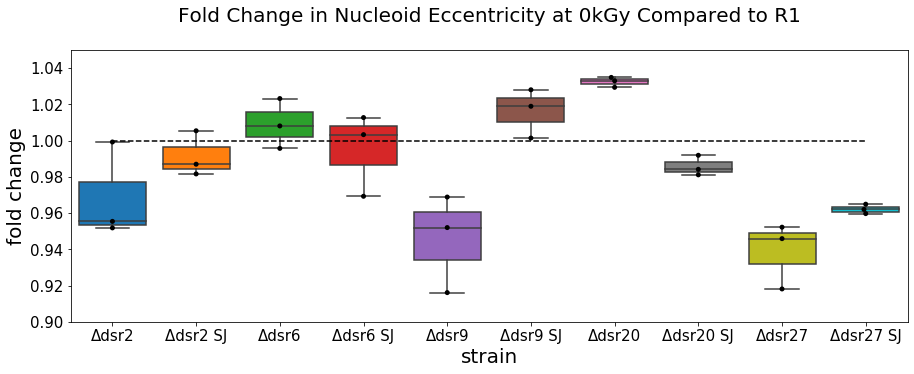

In [34]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[eccen_03142024_dsr2_r1_0k_list,eccen_07182024_dsr2_r1_0k_list,
                       eccen_04292024_dsr6_r1_0k_list,eccen_07182024_dsr6_r1_0k_list,
                       eccen_05062024_dsr9_r1_0k_list,eccen_07182024_dsr9_r1_0k_list,
                       eccen_05062024_dsr20_r1_0k_list,eccen_07182024_dsr20_r1_0k_list,
                       eccen_03142024_dsr27_r1_0k_list,eccen_07182024_dsr27_r1_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[eccen_03142024_dsr2_r1_0k_list,eccen_07182024_dsr2_r1_0k_list,
                       eccen_04292024_dsr6_r1_0k_list,eccen_07182024_dsr6_r1_0k_list,
                       eccen_05062024_dsr9_r1_0k_list,eccen_07182024_dsr9_r1_0k_list,
                       eccen_05062024_dsr20_r1_0k_list,eccen_07182024_dsr20_r1_0k_list,
                       eccen_03142024_dsr27_r1_0k_list,eccen_07182024_dsr27_r1_0k_list], color="black")

plt.title("Fold Change in Nucleoid Eccentricity at 0kGy Compared to R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr2 SJ", "\u0394dsr6", "\u0394dsr6 SJ","\u0394dsr9", 
                    "\u0394dsr9 SJ", "\u0394dsr20","\u0394dsr20 SJ","\u0394dsr27",
                    "\u0394dsr27 SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.9,1.05])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(eccen_03142024_dsr2_r1_0k_list,eccen_07182024_dsr2_r1_0k_list,
                       eccen_04292024_dsr6_r1_0k_list,eccen_07182024_dsr6_r1_0k_list,
                       eccen_05062024_dsr9_r1_0k_list,eccen_07182024_dsr9_r1_0k_list,
                       eccen_05062024_dsr20_r1_0k_list,eccen_07182024_dsr20_r1_0k_list,
                       eccen_03142024_dsr27_r1_0k_list,eccen_07182024_dsr27_r1_0k_list))

eccen_03142024_r1_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Eccentricity"]
eccen_05062024_r1_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["Eccentricity"]
eccen_04292024_r1_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["Eccentricity"]
eccen_07182024_r1_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["Eccentricity"]
eccen_03142024_dsr2_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["Eccentricity"]
eccen_07182024_dsr2_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["Eccentricity"]
eccen_04292024_dsr6_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["Eccentricity"]
eccen_07182024_dsr6_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["Eccentricity"]
eccen_05062024_dsr9_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["Eccentricity"]
eccen_07182024_dsr9_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["Eccentricity"]
eccen_05062024_dsr20_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["Eccentricity"]
eccen_07182024_dsr20_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["Eccentricity"]
eccen_03142024_dsr27_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["Eccentricity"]
eccen_07182024_dsr27_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["Eccentricity"]

print('eccen dsr2 0k',stats.ttest_ind(a=eccen_03142024_dsr2_0k_list, b=eccen_03142024_r1_0k_list, equal_var=False))
print('eccen dsr2 sj 0k',stats.ttest_ind(a=eccen_07182024_dsr2_0k_list, b=eccen_07182024_r1_0k_list, equal_var=False))
print('eccen dsr6 0k',stats.ttest_ind(a=eccen_04292024_dsr6_0k_list, b=eccen_04292024_r1_0k_list, equal_var=False))
print('eccen dsr6 sj 0k',stats.ttest_ind(a=eccen_07182024_dsr6_0k_list, b=eccen_07182024_r1_0k_list, equal_var=False))
print('eccen dsr9 0k',stats.ttest_ind(a=eccen_05062024_dsr9_0k_list, b=eccen_05062024_r1_0k_list, equal_var=False))
print('eccen dsr9 sj 0k',stats.ttest_ind(a=eccen_07182024_dsr9_0k_list, b=eccen_07182024_r1_0k_list, equal_var=False))
print('eccen dsr20 0k',stats.ttest_ind(a=eccen_05062024_dsr20_0k_list, b=eccen_05062024_r1_0k_list, equal_var=False))
print('eccen dsr20 sj 0k',stats.ttest_ind(a=eccen_07182024_dsr20_0k_list, b=eccen_07182024_r1_0k_list, equal_var=False))
print('eccen dsr27 0k',stats.ttest_ind(a=eccen_03142024_dsr27_0k_list, b=eccen_03142024_r1_0k_list, equal_var=False))
print('eccen dsr27 sj 0k',stats.ttest_ind(a=eccen_07182024_dsr27_0k_list, b=eccen_07182024_r1_0k_list, equal_var=False))

print('eccen dsr2 0k',stats.ttest_ind(a=eccen_03142024_dsr2_r1_0k_list, b=eccen_07182024_dsr2_r1_0k_list, equal_var=False))
print('eccen dsr6 0k',stats.ttest_ind(a=eccen_04292024_dsr6_r1_0k_list, b=eccen_07182024_dsr6_r1_0k_list, equal_var=False))
print('eccen dsr9 0k',stats.ttest_ind(a=eccen_05062024_dsr9_r1_0k_list, b=eccen_07182024_dsr9_r1_0k_list, equal_var=False))
print('eccen dsr20 0k',stats.ttest_ind(a=eccen_05062024_dsr20_r1_0k_list, b=eccen_07182024_dsr20_r1_0k_list, equal_var=False))
print('eccen dsr27 0k',stats.ttest_ind(a=eccen_03142024_dsr27_r1_0k_list, b=eccen_07182024_dsr27_r1_0k_list, equal_var=False))


anova F_onewayResult(statistic=8.613895461406548, pvalue=3.5028369612583484e-05)
eccen dsr2 10k Ttest_indResult(statistic=-8.487391631148142, pvalue=2.5266709578035895e-17)
eccen dsr2 sj 10k Ttest_indResult(statistic=-6.055112883740818, pvalue=1.4453491467818171e-09)
eccen dsr6 10k Ttest_indResult(statistic=-1.8731875815314645, pvalue=0.06107077537811312)
eccen dsr6 sj 10k Ttest_indResult(statistic=4.49746139541003, pvalue=6.942209765830414e-06)
eccen dsr9 10k Ttest_indResult(statistic=1.78395399462971, pvalue=0.07453187218132434)
eccen dsr9 sj 10k Ttest_indResult(statistic=3.6380216365829896, pvalue=0.00027588001141551913)
eccen dsr20 10k Ttest_indResult(statistic=5.115282477582091, pvalue=3.2279768214232966e-07)
eccen dsr20 sj 10k Ttest_indResult(statistic=4.311699285409973, pvalue=1.6328815981079008e-05)
eccen dsr27 10k Ttest_indResult(statistic=-5.360784871203732, pvalue=1.1508451189539574e-07)
eccen dsr27 sj 10k Ttest_indResult(statistic=-10.862748542102578, pvalue=2.3380424718086

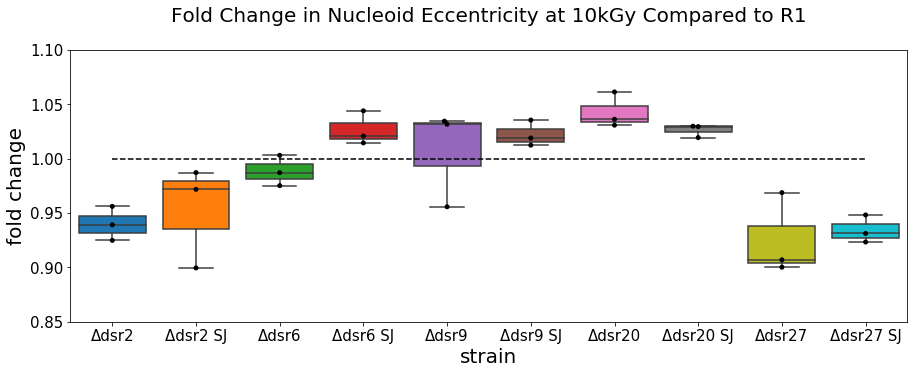

In [35]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[eccen_03142024_dsr2_r1_10k_list,eccen_07182024_dsr2_r1_10k_list,
                       eccen_04292024_dsr6_r1_10k_list,eccen_07182024_dsr6_r1_10k_list,
                       eccen_05062024_dsr9_r1_10k_list,eccen_07182024_dsr9_r1_10k_list,
                       eccen_05062024_dsr20_r1_10k_list,eccen_07182024_dsr20_r1_10k_list,
                       eccen_03142024_dsr27_r1_10k_list,eccen_07182024_dsr27_r1_10k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[eccen_03142024_dsr2_r1_10k_list,eccen_07182024_dsr2_r1_10k_list,
                       eccen_04292024_dsr6_r1_10k_list,eccen_07182024_dsr6_r1_10k_list,
                       eccen_05062024_dsr9_r1_10k_list,eccen_07182024_dsr9_r1_10k_list,
                       eccen_05062024_dsr20_r1_10k_list,eccen_07182024_dsr20_r1_10k_list,
                       eccen_03142024_dsr27_r1_10k_list,eccen_07182024_dsr27_r1_10k_list], color="black")

plt.title("Fold Change in Nucleoid Eccentricity at 10kGy Compared to R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr2 SJ", "\u0394dsr6", "\u0394dsr6 SJ","\u0394dsr9", 
                    "\u0394dsr9 SJ", "\u0394dsr20","\u0394dsr20 SJ","\u0394dsr27",
                    "\u0394dsr27 SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.85,1.1])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(eccen_03142024_dsr2_r1_10k_list,eccen_07182024_dsr2_r1_10k_list,
                       eccen_04292024_dsr6_r1_10k_list,eccen_07182024_dsr6_r1_10k_list,
                       eccen_05062024_dsr9_r1_10k_list,eccen_07182024_dsr9_r1_10k_list,
                       eccen_05062024_dsr20_r1_10k_list,eccen_07182024_dsr20_r1_10k_list,
                       eccen_03142024_dsr27_r1_10k_list,eccen_07182024_dsr27_r1_10k_list))

eccen_03142024_r1_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Eccentricity"]
eccen_05062024_r1_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["Eccentricity"]
eccen_04292024_r1_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["Eccentricity"]
eccen_07182024_r1_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["Eccentricity"]
eccen_03142024_dsr2_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["Eccentricity"]
eccen_07182024_dsr2_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["Eccentricity"]
eccen_04292024_dsr6_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["Eccentricity"]
eccen_07182024_dsr6_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["Eccentricity"]
eccen_05062024_dsr9_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["Eccentricity"]
eccen_07182024_dsr9_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["Eccentricity"]
eccen_05062024_dsr20_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["Eccentricity"]
eccen_07182024_dsr20_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["Eccentricity"]
eccen_03142024_dsr27_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["Eccentricity"]
eccen_07182024_dsr27_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["Eccentricity"]

print('eccen dsr2 10k',stats.ttest_ind(a=eccen_03142024_dsr2_10k_list, b=eccen_03142024_r1_10k_list, equal_var=False))
print('eccen dsr2 sj 10k',stats.ttest_ind(a=eccen_07182024_dsr2_10k_list, b=eccen_07182024_r1_10k_list, equal_var=False))
print('eccen dsr6 10k',stats.ttest_ind(a=eccen_04292024_dsr6_10k_list, b=eccen_04292024_r1_10k_list, equal_var=False))
print('eccen dsr6 sj 10k',stats.ttest_ind(a=eccen_07182024_dsr6_10k_list, b=eccen_07182024_r1_10k_list, equal_var=False))
print('eccen dsr9 10k',stats.ttest_ind(a=eccen_05062024_dsr9_10k_list, b=eccen_05062024_r1_10k_list, equal_var=False))
print('eccen dsr9 sj 10k',stats.ttest_ind(a=eccen_07182024_dsr9_10k_list, b=eccen_07182024_r1_10k_list, equal_var=False))
print('eccen dsr20 10k',stats.ttest_ind(a=eccen_05062024_dsr20_10k_list, b=eccen_05062024_r1_10k_list, equal_var=False))
print('eccen dsr20 sj 10k',stats.ttest_ind(a=eccen_07182024_dsr20_10k_list, b=eccen_07182024_r1_10k_list, equal_var=False))
print('eccen dsr27 10k',stats.ttest_ind(a=eccen_03142024_dsr27_10k_list, b=eccen_03142024_r1_10k_list, equal_var=False))
print('eccen dsr27 sj 10k',stats.ttest_ind(a=eccen_07182024_dsr27_10k_list, b=eccen_07182024_r1_10k_list, equal_var=False))

print('eccen dsr2 10k',stats.ttest_ind(a=eccen_03142024_dsr2_r1_10k_list, b=eccen_07182024_dsr2_r1_10k_list, equal_var=False))
print('eccen dsr6 10k',stats.ttest_ind(a=eccen_04292024_dsr6_r1_10k_list, b=eccen_07182024_dsr6_r1_10k_list, equal_var=False))
print('eccen dsr9 10k',stats.ttest_ind(a=eccen_05062024_dsr9_r1_10k_list, b=eccen_07182024_dsr9_r1_10k_list, equal_var=False))
print('eccen dsr20 10k',stats.ttest_ind(a=eccen_05062024_dsr20_r1_10k_list, b=eccen_07182024_dsr20_r1_10k_list, equal_var=False))
print('eccen dsr27 10k',stats.ttest_ind(a=eccen_03142024_dsr27_r1_10k_list, b=eccen_07182024_dsr27_r1_10k_list, equal_var=False))


anova F_onewayResult(statistic=6.466430482930081, pvalue=0.0002604030224745218)
eccen dsr2 Ttest_indResult(statistic=-37.09761353067749, pvalue=4.3210294179782353e-272)
eccen dsr2 sj Ttest_indResult(statistic=-55.84847231596069, pvalue=0.0)
eccen dsr6 Ttest_indResult(statistic=-43.6143152856245, pvalue=0.0)
eccen dsr6 sj Ttest_indResult(statistic=-45.64566036241881, pvalue=0.0)
eccen dsr9 Ttest_indResult(statistic=-15.623789492000595, pvalue=2.9886165603966677e-53)
eccen dsr9 sj Ttest_indResult(statistic=-47.821108840788256, pvalue=0.0)
eccen dsr20 Ttest_indResult(statistic=-27.51450095918496, pvalue=1.795910787458134e-157)
eccen dsr20 sj Ttest_indResult(statistic=-38.71030544253624, pvalue=0.0)
eccen dsr27 Ttest_indResult(statistic=-11.114387912714491, pvalue=1.2430019580172687e-25)
eccen dsr27 sj Ttest_indResult(statistic=-48.27855646273742, pvalue=0.0)
eccen dsr2 tt Ttest_indResult(statistic=-0.2581164554781643, pvalue=0.8164521148104327)
eccen dsr6 tt Ttest_indResult(statistic=-3.1

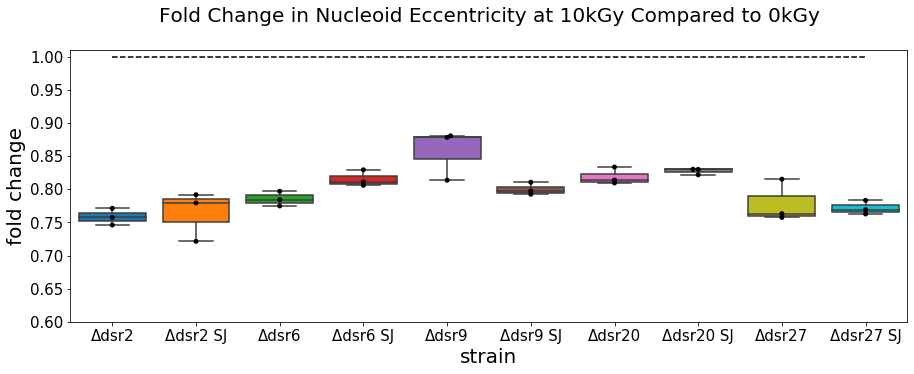

In [36]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[eccen_03142024_dsr2_10k_0k_list,eccen_07182024_dsr2_10k_0k_list,
                       eccen_04292024_dsr6_10k_0k_list,eccen_07182024_dsr6_10k_0k_list,
                       eccen_05062024_dsr9_10k_0k_list,eccen_07182024_dsr9_10k_0k_list,
                       eccen_05062024_dsr20_10k_0k_list,eccen_07182024_dsr20_10k_0k_list,
                       eccen_03142024_dsr27_10k_0k_list,eccen_07182024_dsr27_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[eccen_03142024_dsr2_10k_0k_list,eccen_07182024_dsr2_10k_0k_list,
                       eccen_04292024_dsr6_10k_0k_list,eccen_07182024_dsr6_10k_0k_list,
                       eccen_05062024_dsr9_10k_0k_list,eccen_07182024_dsr9_10k_0k_list,
                       eccen_05062024_dsr20_10k_0k_list,eccen_07182024_dsr20_10k_0k_list,
                       eccen_03142024_dsr27_10k_0k_list,eccen_07182024_dsr27_10k_0k_list],color="black")

plt.title("Fold Change in Nucleoid Eccentricity at 10kGy Compared to 0kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr2 SJ", "\u0394dsr6", "\u0394dsr6 SJ","\u0394dsr9", 
                    "\u0394dsr9 SJ", "\u0394dsr20","\u0394dsr20 SJ","\u0394dsr27",
                    "\u0394dsr27 SJ"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.6,1.01])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(eccen_03142024_dsr2_10k_0k_list,eccen_07182024_dsr2_10k_0k_list,
                       eccen_04292024_dsr6_10k_0k_list,eccen_07182024_dsr6_10k_0k_list,
                       eccen_05062024_dsr9_10k_0k_list,eccen_07182024_dsr9_10k_0k_list,
                       eccen_05062024_dsr20_10k_0k_list,eccen_07182024_dsr20_10k_0k_list,
                       eccen_03142024_dsr27_10k_0k_list,eccen_07182024_dsr27_10k_0k_list))

eccen_03142024_dsr2_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_10k_2h"]["Eccentricity"]
eccen_07182024_dsr2_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_10k"]["Eccentricity"]
eccen_04292024_dsr6_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_10k"]["Eccentricity"]
eccen_07182024_dsr6_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_10k"]["Eccentricity"]
eccen_05062024_dsr9_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_10k"]["Eccentricity"]
eccen_07182024_dsr9_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_10k"]["Eccentricity"]
eccen_05062024_dsr20_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_10k"]["Eccentricity"]
eccen_07182024_dsr20_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_10k"]["Eccentricity"]
eccen_03142024_dsr27_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_10k_2h"]["Eccentricity"]
eccen_07182024_dsr27_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_10k"]["Eccentricity"]
eccen_03142024_dsr2_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr2_0k_2h"]["Eccentricity"]
eccen_07182024_dsr2_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr2_0k"]["Eccentricity"]
eccen_04292024_dsr6_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_dsr6_0k"]["Eccentricity"]
eccen_07182024_dsr6_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr6_0k"]["Eccentricity"]
eccen_05062024_dsr9_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr9_0k"]["Eccentricity"]
eccen_07182024_dsr9_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr9_0k"]["Eccentricity"]
eccen_05062024_dsr20_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_dsr20_0k"]["Eccentricity"]
eccen_07182024_dsr20_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr20_0k"]["Eccentricity"]
eccen_03142024_dsr27_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_dsr27_0k_2h"]["Eccentricity"]
eccen_07182024_dsr27_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_dsr27_0k"]["Eccentricity"]

print('eccen dsr2',stats.ttest_ind(a=eccen_03142024_dsr2_10k_list, b=eccen_03142024_dsr2_0k_list, equal_var=False))
print('eccen dsr2 sj',stats.ttest_ind(a=eccen_07182024_dsr2_10k_list, b=eccen_07182024_dsr2_0k_list, equal_var=False))
print('eccen dsr6',stats.ttest_ind(a=eccen_04292024_dsr6_10k_list, b=eccen_04292024_dsr6_0k_list, equal_var=False))
print('eccen dsr6 sj',stats.ttest_ind(a=eccen_07182024_dsr6_10k_list, b=eccen_07182024_dsr6_0k_list, equal_var=False))
print('eccen dsr9',stats.ttest_ind(a=eccen_05062024_dsr9_10k_list, b=eccen_05062024_dsr9_0k_list, equal_var=False))
print('eccen dsr9 sj',stats.ttest_ind(a=eccen_07182024_dsr9_10k_list, b=eccen_07182024_dsr9_0k_list, equal_var=False))
print('eccen dsr20',stats.ttest_ind(a=eccen_05062024_dsr20_10k_list, b=eccen_05062024_dsr20_0k_list, equal_var=False))
print('eccen dsr20 sj',stats.ttest_ind(a=eccen_07182024_dsr20_10k_list, b=eccen_07182024_dsr20_0k_list, equal_var=False))
print('eccen dsr27',stats.ttest_ind(a=eccen_03142024_dsr27_10k_list, b=eccen_03142024_dsr27_0k_list, equal_var=False))
print('eccen dsr27 sj',stats.ttest_ind(a=eccen_07182024_dsr27_10k_list, b=eccen_07182024_dsr27_0k_list, equal_var=False))

print('eccen dsr2 tt',stats.ttest_ind(a=eccen_03142024_dsr2_10k_0k_list, b=eccen_07182024_dsr2_10k_0k_list, equal_var=False))
print('eccen dsr6 tt',stats.ttest_ind(a=eccen_04292024_dsr6_10k_0k_list, b=eccen_07182024_dsr6_10k_0k_list, equal_var=False))
print('eccen dsr9 tt',stats.ttest_ind(a=eccen_05062024_dsr9_10k_0k_list, b=eccen_07182024_dsr9_10k_0k_list, equal_var=False))
print('eccen dsr20 tt',stats.ttest_ind(a=eccen_05062024_dsr20_10k_0k_list, b=eccen_07182024_dsr20_10k_0k_list, equal_var=False))
print('eccen dsr27 tt',stats.ttest_ind(a=eccen_03142024_dsr27_10k_0k_list, b=eccen_07182024_dsr27_10k_0k_list, equal_var=False))


anova F_onewayResult(statistic=2.7060245319937692, pvalue=0.11572088607270056)
eccen r1 3/14 Ttest_indResult(statistic=-48.32951630371832, pvalue=0.0)
eccen r1 4/29 Ttest_indResult(statistic=-43.158011399435885, pvalue=0.0)
eccen r1 5/06 Ttest_indResult(statistic=-34.99035463678804, pvalue=1.2005577373431272e-251)
eccen r1 7/18 Ttest_indResult(statistic=-44.59483038416622, pvalue=0.0)
mar-apr Ttest_indResult(statistic=-2.9760474545598297, pvalue=0.04175941919071403)
mar-may Ttest_indResult(statistic=-2.6405929826158023, pvalue=0.06924403802385395)
mar-jul Ttest_indResult(statistic=-1.2346258261839373, pvalue=0.29711939239428947)
apr-may Ttest_indResult(statistic=-0.5672673399252749, pvalue=0.6090709915529846)
apr-jul Ttest_indResult(statistic=0.8663129662803281, pvalue=0.44865922208620695)
may-jul Ttest_indResult(statistic=1.1545365631573161, pvalue=0.31256875179233873)


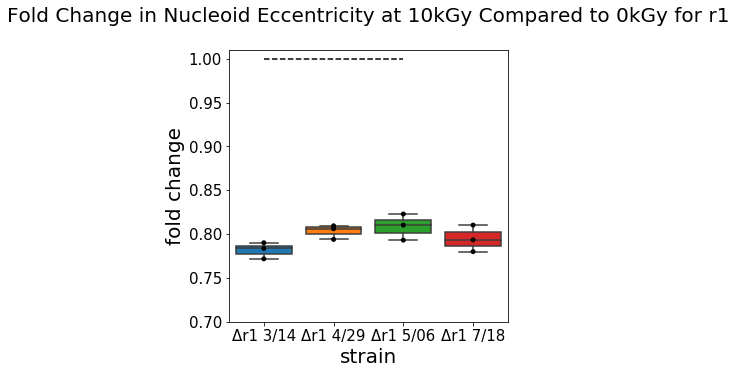

In [37]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
ax = sns.boxplot(data=[eccen_03142024_r1_10k_0k_list, eccen_04292024_r1_10k_0k_list, eccen_05062024_r1_10k_0k_list,
                      eccen_07182024_r1_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[eccen_03142024_r1_10k_0k_list, eccen_04292024_r1_10k_0k_list, eccen_05062024_r1_10k_0k_list,
                      eccen_07182024_r1_10k_0k_list], color="black")

plt.title("Fold Change in Nucleoid Eccentricity at 10kGy Compared to 0kGy for r1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394r1 3/14", "\u0394r1 4/29", "\u0394r1 5/06","\u0394r1 7/18"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1], "--", color = "black")
plt.ylim([0.7,1.01])
ax.tick_params(axis='y', labelsize=15)
print('anova',stats.f_oneway(eccen_03142024_r1_10k_0k_list, eccen_04292024_r1_10k_0k_list, eccen_05062024_r1_10k_0k_list,
                      eccen_07182024_r1_10k_0k_list))

eccen_03142024_r1_10k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Eccentricity"]
eccen_05062024_r1_10k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["Eccentricity"]
eccen_04292024_r1_10k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_10k"]["Eccentricity"]
eccen_07182024_r1_10k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_10k"]["Eccentricity"]
eccen_03142024_r1_0k_list = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Eccentricity"]
eccen_05062024_r1_0k_list = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["Eccentricity"]
eccen_04292024_r1_0k_list = MS_04292024[MS_04292024["strain"] == "04292024_r1_0k"]["Eccentricity"]
eccen_07182024_r1_0k_list = MS_07182024[MS_07182024["strain"] == "07182024_r1_0k"]["Eccentricity"]

print('eccen r1 3/14',stats.ttest_ind(a=eccen_03142024_r1_10k_list, b=eccen_03142024_r1_0k_list, equal_var=False))
print('eccen r1 4/29',stats.ttest_ind(a=eccen_04292024_r1_10k_list, b=eccen_04292024_r1_0k_list, equal_var=False))
print('eccen r1 5/06',stats.ttest_ind(a=eccen_05062024_r1_10k_list, b=eccen_05062024_r1_0k_list, equal_var=False))
print('eccen r1 7/18',stats.ttest_ind(a=eccen_07182024_r1_10k_list, b=eccen_07182024_r1_0k_list, equal_var=False))

print('mar-apr',stats.ttest_ind(a=eccen_03142024_r1_10k_0k_list, b=eccen_04292024_r1_10k_0k_list, equal_var=False))
print('mar-may',stats.ttest_ind(a=eccen_03142024_r1_10k_0k_list, b=eccen_05062024_r1_10k_0k_list, equal_var=False))
print('mar-jul',stats.ttest_ind(a=eccen_03142024_r1_10k_0k_list, b=eccen_07182024_r1_10k_0k_list, equal_var=False))
print('apr-may',stats.ttest_ind(a=eccen_04292024_r1_10k_0k_list, b=eccen_05062024_r1_10k_0k_list, equal_var=False))
print('apr-jul',stats.ttest_ind(a=eccen_04292024_r1_10k_0k_list, b=eccen_07182024_r1_10k_0k_list, equal_var=False))
print('may-jul',stats.ttest_ind(a=eccen_05062024_r1_10k_0k_list, b=eccen_07182024_r1_10k_0k_list, equal_var=False))